In [52]:
def parameter(width=False,cr=False,num=False,pad=False,dpml=False,tdev=False,tsio2=False,tau=False):
    
    period = 0.375
    width_ini = 0.12 #width of etches
    rthickness = period-width_ini #thickness of the grating in r direction
    cr_ini = 0.412 #radius of centre disk
    num_ini = 11  #number of etches
    pad_ini = 3  #thickness of padding
    dpml_ini = 3 #thickness of the PML set to be wvlmax


    tdev_ini = 0.18 #thickness of GaAs Layer (z-dir)
    tsio2_ini = 0.225  #thickness of SiO2  Layer (z-dir)
    tau_ini = 0.074  #thickness of Au Layer (z-dir)
    
    if dpml is True:
          
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-10,11,1):
            
            dpml=dpml_ini+0.2*i
            
            rthickness = period-width_ini
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(dpml)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between thickness of PML and the wavelength of fundamental mode ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between thickness of PML and LDOS of fundamental modes ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between thickness of PML and the wavelength of fundamental mode ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between thickness of PML and Q-values of fundamental modes ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between thickness of PML and ratio of upward flux to total flux ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between thickness of PML and far-field upward collection rate ')
        plt.xlabel('thickness of PML (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8')
    
    if pad is True:
         
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-10,11,1):
            
            pad=pad_ini+0.2*i
            
            rthickness = period-width_ini
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(pad)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between thickness of air pad and the wavelength of fundamental mode ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between thickness of air pad and LDOS of fundamental modes ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between thickness of air pad and the wavelength of fundamental mode ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between thickness of air pad and Q-values of fundamental modes ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between thickness of air pad and ratio of upward flux to total flux ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between thickness of air pad and far-field upward collection rate ')
        plt.xlabel('thickness of air pad (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8')
    
    if width is True:
        
        
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-1,1,1):
            
            width=width_ini+0.005*i
            
            rthickness = period-width
            bullseye = Be.Bullseye(width,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(width)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between width of etches and the wavelength of fundamental mode ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between width of etches and LDOS of fundamental modes ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between width of etches and the wavelength of fundamental mode ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between width of etches and Q-values of fundamental modes ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between width of etches and ratio of upward flux to total flux ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between width of etches and far-field upward collection rate ')
        plt.xlabel('Width of etches (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8') 
        
        
    if tdev is True:
            
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-10,11,1):
            
            tdev=tdev_ini+0.005*i
            
            rthickness = period-width_ini
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev,tsio2_ini,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(tdev)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between thickness of device layer and the wavelength of fundamental mode ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between thickness of device layer and LDOS of fundamental modes ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between thickness of device layer and the wavelength of fundamental mode ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between thickness of device layer and Q-values of fundamental modes ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between thickness of device layer and ratio of upward flux to total flux ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between thickness of device layer and far-field upward collection rate ')
        plt.xlabel('thickness of device layer (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8')
        
    if tsio2 is True:
        
        
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-10,11,1):
            
            tsio2=tsio2_ini+0.0025*i
            
            rthickness = period-width_ini
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2,tau_ini)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(tsio2)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between thickness of SiO2 layer and the wavelength of fundamental mode ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between thickness of SiO2 layer and LDOS of fundamental modes ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between thickness of SiO2 layer and the wavelength of fundamental mode ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between thickness of SiO2 layer and Q-values of fundamental modes ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between thickness of SiO2 layer and ratio of upward flux to total flux ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between thickness of SiO2 layer and far-field upward collection rate ')
        plt.xlabel('thickness of SiO2 layer (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8')
    
    if tau is True:
        
        
        ldos_peak_wvl=[]
        ldos_val=[]
        q_val=[]
        q_wvl=[]
        flux_sum_upratio=[]
        collect_ratio=[]
        x=[]
        for i in range(-10,11,1):
            
            tau=tau_ini+0.005*i
            
            rthickness = period-width_ini
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            bullseye.define_box_monitors(wvl_flux_min=0.6, wvl_flux_max=1)
            collection=bullseye.run_all(time_after_sources=50,figure=False)
            
            
            fund_mode_wvl=collection[2][0][0][0]/1000
            
            # for finding the collection rate for uphalf sphere
            bullseye.end_simulation()
            bullseye = Be.Bullseye(width_ini,rthickness,cr_ini,num_ini,tdev_ini,tsio2_ini,tau)

            bullseye.define_cellsize(pad_ini,dpml_ini)
            bullseye.define_geometry()
            bullseye.define_sources(wvl_min=0.6,wvl_max=1)
            bullseye.define_simulation(resolution=64, normalrun=False)
            
            bullseye.define_near_field_box(wvl_fcen_near=fund_mode_wvl)
            bullseye.get_far_field(time_after_sources=50,npts=200,ff_angle=math.pi*(5.3/18))
            
            col_rate=bullseye.plot_far_field(figure=False)
            
            
            ldos_peak_wvl.append(collection[2][0][0][0])
            ldos_val.append(collection[2][1])
            q_wvl.append(collection[0][0][0][0])
            q_val.append(collection[0][1])
            flux_sum_upratio.append(collection[1][0])
            collect_ratio.append(col_rate)
            
            x.append(tau)
        

        plt.figure(dpi=150)
        plt.plot(x,ldos_peak_wvl, 'b-')
        plt.title('Relation between thickness of Au reflector and the wavelength of fundamental mode ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,ldos_val, 'b-')
        plt.title('Relation between thickness of Au reflector and LDOS of fundamental modes ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('LDOS of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_wvl, 'r-')
        plt.title('Relation between thickness of Au reflector and the wavelength of fundamental mode ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('Wavelength of fundamental mode (nm)')  
        
        plt.figure(dpi=150)
        plt.plot(x,q_val, 'r-')
        plt.title('Relation between thickness of Au reflector and Q-values of fundamental modes ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('Q-values of fundamental modes')  
        
        plt.figure(dpi=150)
        plt.plot(x,flux_sum_upratio, 'g-')
        plt.title('Relation between thickness of Au reflector and ratio of upward flux to total flux ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('Ratio of upward flux to total flux') 
        
        plt.figure(dpi=150)
        plt.plot(x,collect_ratio, 'y-')
        plt.title('Relation between thickness of Au reflector and far-field upward collection rate ')
        plt.xlabel('thickness of Au reflector (µm)')
        plt.ylabel('Far-field upward collection rate of NA=0.8')
    
        

In [53]:
import importlib
import meep as mp
import BE_collection as Be
import math as math
import matplotlib.pyplot as plt


importlib.reload(Be)

<module 'BE_collection' from '/Users/jswjzhm/Desktop/Jupyter_notebooks/BE_collection.py'>

-----------
Initializing structure...
time for choose_chunkdivision = 0.000622034 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6545,0,0.1495)
          size (0.265,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0295,0,0.1495)
          size (0.265,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric c

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 42 (time=0.328125), 0.0953482 s/step
on time step 90 (time=0.703125), 0.0846803 s/step
on time step 139 (time=1.08594), 0.0821682 s/step
on time step 191 (time=1.49219), 0.0778419 s/step
on time step 247 (time=1.92969), 0.0726915 s/step
on time step 302 (time=2.35938), 0.0733099 s/step
on time step 361 (time=2.82031), 0.068362 s/step
on time step 423 (time=3.30469), 0.0647113 s/step
on time step 484 (time=3.78125), 0.0657505 s/step
on time step 539 (time=4.21094), 0.0735541 s/step
on time step 594 (time=4.64062), 0.0731728 s/step
on time step 649 (time=5.07031), 0.0733779 s/step
Meep progress: 5.2421875/65.0 = 8.1% done in 50.0s, 570.5s to go
on time step 704 (time=5.5), 0.0739421 s/step
on time step 759 (time=5.92969), 0.0733653 s/step
on time step 815 (time=6.36719), 0.072673 s/step
on time step 870 (time=6.79688), 0.0739639 s/step
on time step 925 (time=7.22656), 0.073057 s/step
on time step 979 (time=7.64844), 0.0741246 s/step
on time step 1034 (time=8.07812), 0.073251

Meep progress: 63.5859375/65.0 = 97.8% done in 600.5s, 13.4s to go
on time step 8152 (time=63.6875), 0.0737918 s/step
on time step 8207 (time=64.1172), 0.0730347 s/step
on time step 8261 (time=64.5391), 0.0742797 s/step
on time step 8316 (time=64.9688), 0.0736087 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.157628404938854, -0.002577500623743959, 224.564136721204, 0.000638408875356385, 0.00036238147097781686+0.0005255906787850769i, 9.37711169477166e-06+0.0i
harminv0:, 1.1801093228187178, 0.003991650561358053, -147.82222349859416, 0.0004383857011783726, -0.00021267119171879-0.000383344475909805i, 1.535224545768306e-05+0.0i
harminv0:, 1.2626649394703324, -0.0024052969745995737, 262.47589233353125, 0.08960888008487444, 0.08958716081678929+0.0019728169839449534i, 1.063636617878723e-07+0.0i
harminv0:, 1.5885641504582586, -0.005981360254553763, 132.79288346232312, 0.0005641622537533413, -0.0005516456555250633-0.00011817833684890241i, 9.275989616690849e-06

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6545,0,0.1495)
          size (0.265,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0295,0,0.1495)
          size (0.265,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4045,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0798362 s/step
on time step 107 (time=0.835938), 0.0725472 s/step
on time step 163 (time=1.27344), 0.0726703 s/step
on time step 218 (time=1.70312), 0.0728912 s/step
on time step 274 (time=2.14062), 0.0722351 s/step
on time step 329 (time=2.57031), 0.0733306 s/step
on time step 385 (time=3.00781), 0.07228 s/step
on time step 441 (time=3.44531), 0.0725832 s/step
on time step 496 (time=3.875), 0.0738436 s/step
on time step 551 (time=4.30469), 0.0730072 s/step
on time step 606 (time=4.73438), 0.073448 s/step
on time step 661 (time=5.16406), 0.073506 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.4s to go
on time step 716 (time=5.59375), 0.0733179 s/step
on time step 771 (time=6.02344), 0.0734639 s/step
on time step 826 (time=6.45312), 0.0735491 s/step
on time step 881 (time=6.88281), 0.0730627 s/step
on time step 937 (time=7.32031), 0.0725922 s/step
on time step 992 (time=7.75), 0.073899 s/step
on time step 1048 (time=8.1875), 0.0723634 s

Meep progress: 64.0078125/65.0 = 98.5% done in 600.5s, 9.3s to go
on time step 8216 (time=64.1875), 0.0747838 s/step
on time step 8270 (time=64.6094), 0.0742143 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447989 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0809657 s/step
on time step 106 (time=0.828125), 0.0723071 s/step
on time step 161 (time=1.25781), 0.0733482 s/step
on time step 216 (time=1.6875), 0.0733472 s/step
on time step 272 (time=2.125), 0.0719049 s/step
on time step 328 (time=2.5625), 0.072504 s/step
on time step 383 (time=2.99219), 0.0731913 s/step
on time step 438 (time=3.42188), 0.0728963 s/step
on time step 493 (time=3.85156), 0.0731482 s/step
on time step 548 (time=4.28125), 0.0734062 s/step
on time step 606 (time=4.73438), 0.0698838 s/step
on time step 660 (time=5.15625), 0.0744336 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.0s, 560.4s to go
on time step 715 (time=5.58594), 0.0738584 s/step
on time step 769 (time=6.00781), 0.0740754 s/step
on time step 823 (time=6.42969), 0.0740849 s/step
on time step 878 (time=6.85938), 0.0738435 s/step
on time step 933 (time=7.28906), 0.0738918 s/step
on time step 988 (time=7.71875), 0.0727423 s/step
on time step 1042 (time=8.14062), 0.0743

Meep progress: 63.921875/65.0 = 98.3% done in 600.4s, 10.1s to go
on time step 8194 (time=64.0156), 0.0730136 s/step
on time step 8255 (time=64.4922), 0.066157 s/step
on time step 8311 (time=64.9297), 0.0717475 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1100138141143212, 0.0038443284073500644, -144.37031602087623, 4.34677072961646e-05, -3.053901730035551e-05-3.093234552880897e-05i, 0.0002811045618311445+0.0i
harminv0:, 1.2681352193128046, 0.008716296940707574, -72.74506754068084, 0.0010485685017726709, -0.0007571781009216707-0.0007253807458117675i, 1.645532044902968e-05+0.0i
harminv0:, 1.2715097109990623, -0.0031782139712207736, 200.0352591916061, 0.07179569054639971, 0.06990130090892409-0.01638381250730236i, 1.8165776579067372e-06+0.0i
harminv0:, 1.5400506451689795, 0.006788774415162256, -113.42626452054316, 6.323777092842471e-05, 4.460980228821458e-05-4.482166007414633e-05i, 1.67293807472685e-05+0.0i
harminv0:, 1.629432748309159, -0.005462624068

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804288 s/step
on time step 106 (time=0.828125), 0.0717897 s/step
on time step 161 (time=1.25781), 0.0729965 s/step
on time step 217 (time=1.69531), 0.0722561 s/step
on time step 273 (time=2.13281), 0.0726597 s/step
on time step 334 (time=2.60938), 0.0663383 s/step
on time step 389 (time=3.03906), 0.0733148 s/step
on time step 444 (time=3.46875), 0.0729459 s/step
on time step 499 (time=3.89844), 0.073041 s/step
on time step 554 (time=4.32812), 0.0732253 s/step
on time step 609 (time=4.75781), 0.0728672 s/step
on time step 664 (time=5.1875), 0.0731026 s/step
Meep progress: 5.3671875/65.0 = 8.3% done in 50.0s, 555.9s to go
on time step 719 (time=5.61719), 0.0735131 s/step
on time step 773 (time=6.03906), 0.0741128 s/step
on time step 829 (time=6.47656), 0.0726402 s/step
on time step 884 (time=6.90625), 0.0740526 s/step
on time step 939 (time=7.33594), 0.0728557 s/step
on time step 995 (time=7.77344), 0.072538 s/step
on time step 1050 (time=8.20312), 0.0

Meep progress: 60.8359375/65.0 = 93.6% done in 600.6s, 41.1s to go
on time step 7802 (time=60.9531), 0.0828278 s/step
on time step 7848 (time=61.3125), 0.0884894 s/step
on time step 7894 (time=61.6719), 0.0885075 s/step
on time step 7944 (time=62.0625), 0.0804272 s/step
on time step 7998 (time=62.4844), 0.0745848 s/step
on time step 8051 (time=62.8984), 0.075667 s/step
on time step 8104 (time=63.3125), 0.0762584 s/step
on time step 8157 (time=63.7266), 0.0762575 s/step
on time step 8210 (time=64.1406), 0.0763363 s/step
on time step 8265 (time=64.5703), 0.07322 s/step
on time step 8318 (time=64.9844), 0.0759014 s/step
run 0 finished at t = 65.0 (8320 timesteps)


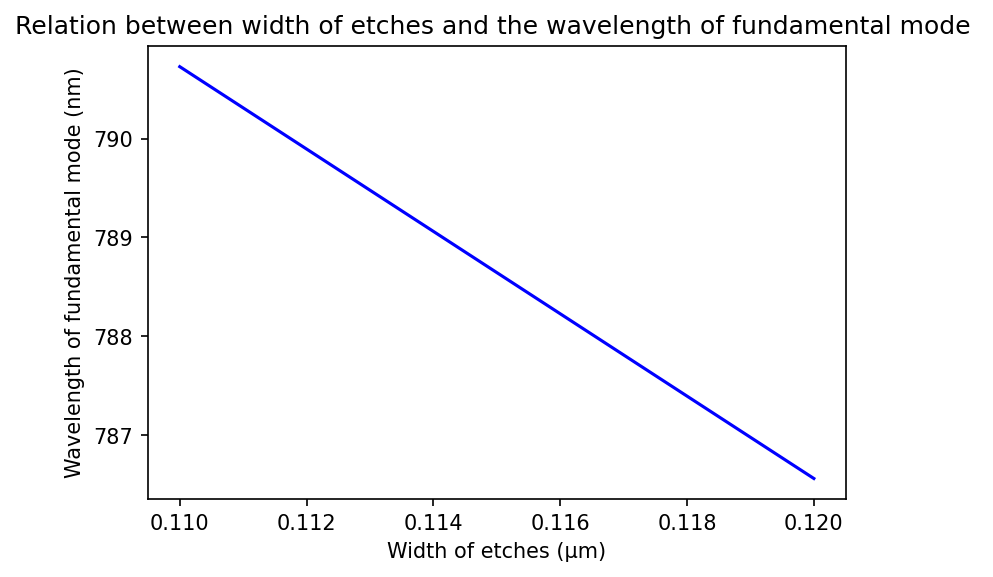

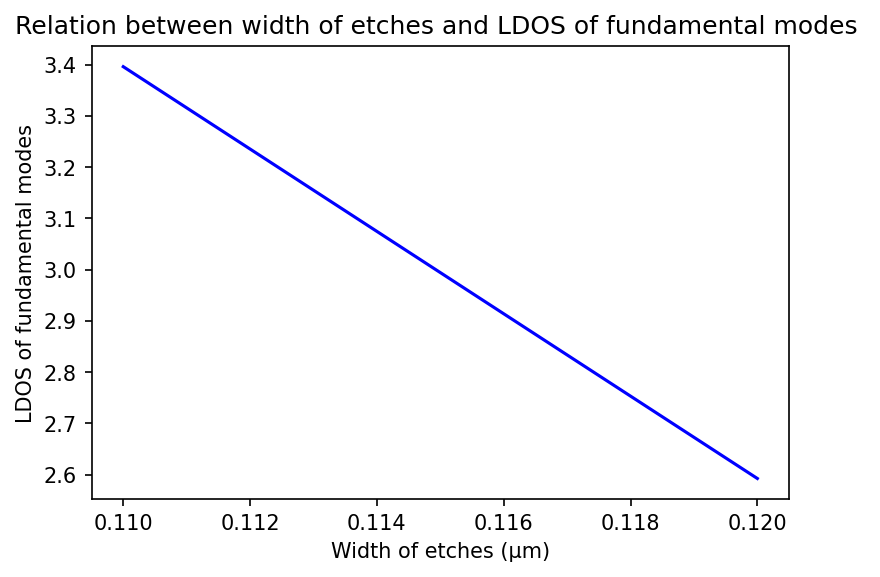

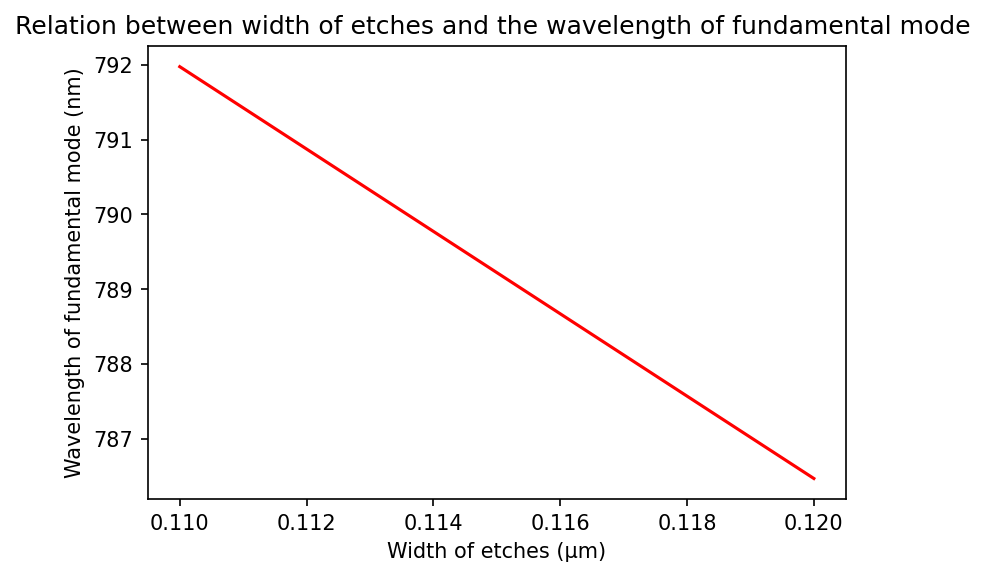

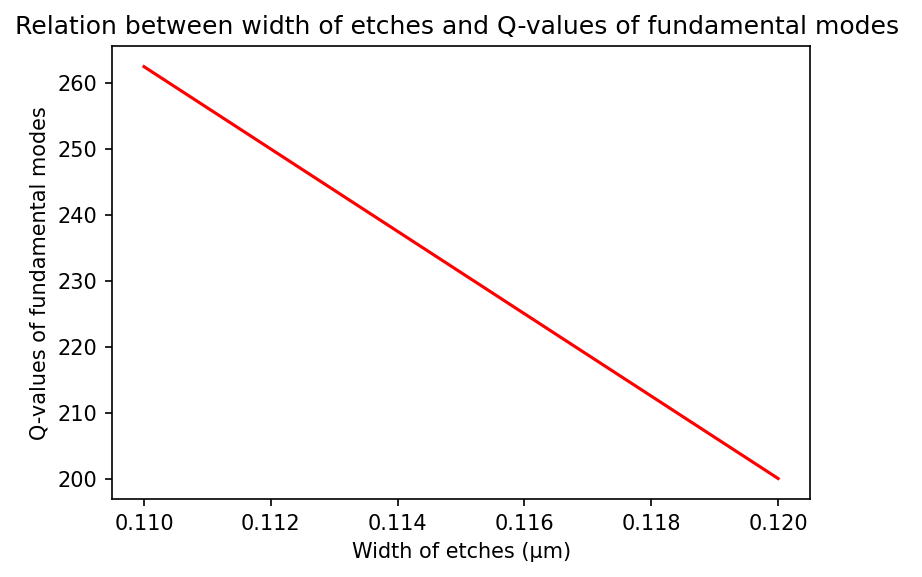

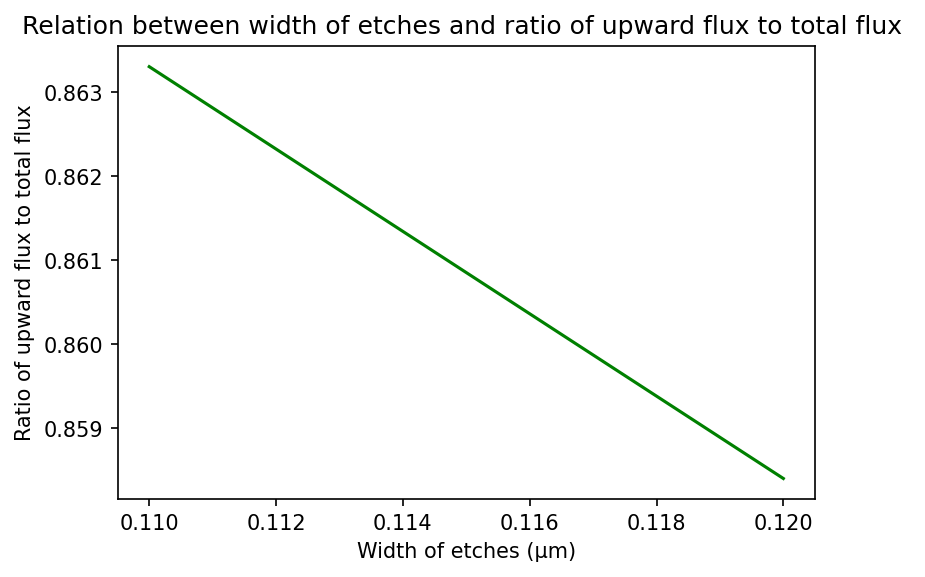

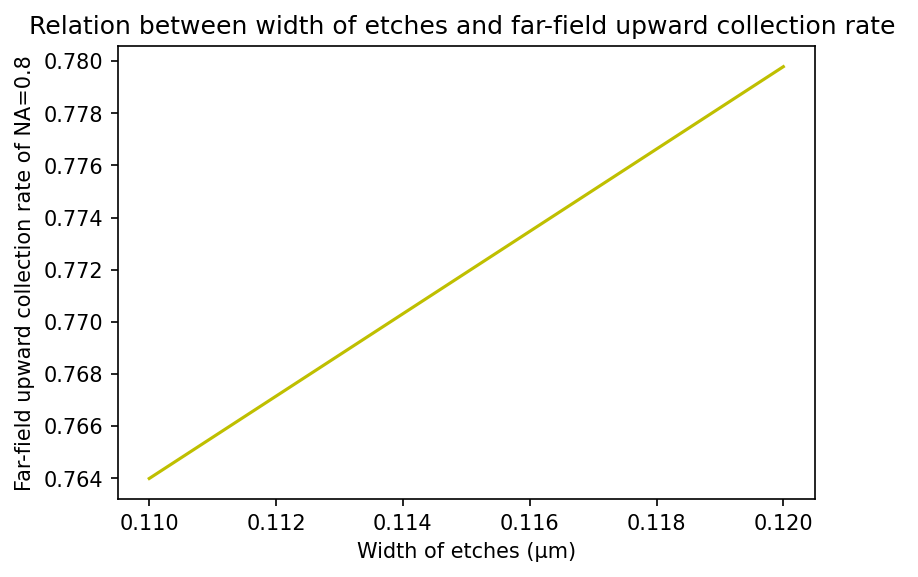

In [35]:
parameter(width=True)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000688076 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4219 with resolution 64
     block, center = (0,0,-0.1775)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.028)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric c

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0827013 s/step
on time step 103 (time=0.804688), 0.0751672 s/step
on time step 157 (time=1.22656), 0.0743224 s/step
on time step 211 (time=1.64844), 0.0748853 s/step
on time step 265 (time=2.07031), 0.0744731 s/step
on time step 319 (time=2.49219), 0.0750405 s/step
on time step 373 (time=2.91406), 0.0753065 s/step
on time step 427 (time=3.33594), 0.0749712 s/step
on time step 482 (time=3.76562), 0.0739693 s/step
on time step 536 (time=4.1875), 0.0753604 s/step
on time step 589 (time=4.60156), 0.0759603 s/step
on time step 643 (time=5.02344), 0.0746946 s/step
Meep progress: 5.1796875/65.0 = 8.0% done in 50.1s, 578.2s to go
on time step 697 (time=5.44531), 0.075449 s/step
on time step 751 (time=5.86719), 0.0743789 s/step
on time step 804 (time=6.28125), 0.0761109 s/step
on time step 858 (time=6.70312), 0.0747877 s/step
on time step 912 (time=7.125), 0.0746764 s/step
on time step 965 (time=7.53906), 0.0761905 s/step
on time step 1019 (time=7.96094), 0.07

Meep progress: 62.8828125/65.0 = 96.7% done in 600.5s, 20.2s to go
on time step 8067 (time=63.0234), 0.0755517 s/step
on time step 8121 (time=63.4453), 0.0748861 s/step
on time step 8175 (time=63.8672), 0.0744596 s/step
on time step 8229 (time=64.2891), 0.0746612 s/step
on time step 8283 (time=64.7109), 0.0750269 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.009919538624345, -0.0044529214128336955, 113.39965889737819, 5.723102610388362e-05, 4.189783336834977e-05+3.898668885583137e-05i, 2.8375060746776348e-05+0.0i
harminv0:, 1.206865166500067, -0.011243114243128257, 53.671302292320725, 0.0014134813580996526, 0.0013947599307303452+0.00022929083131325014i, 1.719173229887871e-05+0.0i
harminv0:, 1.3392789616834766, -0.001829996503479429, 365.9239127334572, 0.007212441753370115, -0.003551047898859121-0.006277688656326053i, 3.005573023321314e-06+0.0i
harminv0:, 1.3664164467321094, -0.004282752578774781, 159.52549459710053, 0.123407075531997, -0.007792919379

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4219 with resolution 64
     block, center = (0,0,-0.1775)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.028)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.13)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0809004 s/step
on time step 105 (time=0.820312), 0.0734423 s/step
on time step 161 (time=1.25781), 0.0726964 s/step
on time step 216 (time=1.6875), 0.0728593 s/step
on time step 271 (time=2.11719), 0.0737953 s/step
on time step 326 (time=2.54688), 0.0738502 s/step
on time step 381 (time=2.97656), 0.0727919 s/step
on time step 436 (time=3.40625), 0.0736372 s/step
on time step 491 (time=3.83594), 0.0737176 s/step
on time step 545 (time=4.25781), 0.0741356 s/step
on time step 600 (time=4.6875), 0.0727344 s/step
on time step 654 (time=5.10938), 0.0743777 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.1s, 566.1s to go
on time step 708 (time=5.53125), 0.0746153 s/step
on time step 762 (time=5.95312), 0.0741941 s/step
on time step 816 (time=6.375), 0.0743262 s/step
on time step 871 (time=6.80469), 0.0737174 s/step
on time step 925 (time=7.22656), 0.0743014 s/step
on time step 980 (time=7.65625), 0.0732638 s/step
on time step 1035 (time=8.08594), 0.0734

Meep progress: 64.3203125/65.0 = 99.0% done in 600.5s, 6.3s to go
on time step 8245 (time=64.4141), 0.0743026 s/step
on time step 8300 (time=64.8438), 0.0733604 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000450134 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.18)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0305)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.135)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.135)
          axes (1,0,0), (0,1,0),

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0806688 s/step
on time step 106 (time=0.828125), 0.0721519 s/step
on time step 161 (time=1.25781), 0.0732906 s/step
on time step 216 (time=1.6875), 0.0728116 s/step
on time step 272 (time=2.125), 0.0722468 s/step
on time step 328 (time=2.5625), 0.0718206 s/step
on time step 383 (time=2.99219), 0.0734777 s/step
on time step 438 (time=3.42188), 0.0731831 s/step
on time step 493 (time=3.85156), 0.0732087 s/step
on time step 548 (time=4.28125), 0.0736665 s/step
on time step 604 (time=4.71875), 0.0724976 s/step
on time step 659 (time=5.14844), 0.0736474 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.1s, 561.5s to go
on time step 714 (time=5.57812), 0.0733539 s/step
on time step 770 (time=6.01562), 0.0723912 s/step
on time step 825 (time=6.44531), 0.0735426 s/step
on time step 879 (time=6.86719), 0.0742813 s/step
on time step 934 (time=7.29688), 0.0733816 s/step
on time step 988 (time=7.71875), 0.0744055 s/step
on time step 1042 (time=8.14062), 0.07

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0452459192220276, -0.005099142940933731, 102.49231403489809, 4.8766388116203266e-05, 4.114394994631556e-05-2.6178922680569785e-05i, 0.00020647036376577238+0.0i
harminv0:, 1.3417876685606773, -0.0009058511503090536, 740.6226001384958, 0.0076357206265472155, -0.0019063036792738059-0.0073939323616777665i, 4.569758452169945e-06+0.0i
harminv0:, 1.3663413813600567, -0.00456352304145984, 149.70247426678637, 0.13038409867589504, -0.011045821161888012+0.12991536869202627i, 5.995689333548394e-07+0.0i
ldos0:, 1.0, 0.8493693031103393
ldos0:, 1.003350083752094, -0.7184016689589068
ldos0:, 1.0067001675041876, -1.0275389521289484
ldos0:, 1.0100502512562815, 0.029626757715416226
ldos0:, 1.0134003350083751, 0.9219294483725494
ldos0:, 1.016750418760469, 0.5847761142473482
ldos0:, 1.020100502512563, -0.38973944825187684
ldos0:, 1.0234505862646566, -0.7324367874702019
ldos0:, 1.0268006700167505, -0.1235447066483563
ldos0:, 1.030150

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.18)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0305)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.135)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.135)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.135)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 57 (time=0.445312), 0.0702837 s/step
on time step 119 (time=0.929688), 0.0647554 s/step
on time step 176 (time=1.375), 0.0713342 s/step
on time step 231 (time=1.80469), 0.0734587 s/step
on time step 287 (time=2.24219), 0.0725756 s/step
on time step 343 (time=2.67969), 0.0724719 s/step
on time step 399 (time=3.11719), 0.072455 s/step
on time step 454 (time=3.54688), 0.0739096 s/step
on time step 510 (time=3.98438), 0.0724895 s/step
on time step 565 (time=4.41406), 0.073112 s/step
on time step 620 (time=4.84375), 0.073393 s/step
on time step 677 (time=5.28906), 0.0705977 s/step
Meep progress: 5.4453125/65.0 = 8.4% done in 50.0s, 547.3s to go
on time step 731 (time=5.71094), 0.0751223 s/step
on time step 786 (time=6.14062), 0.0729916 s/step
on time step 837 (time=6.53906), 0.0788871 s/step
on time step 884 (time=6.90625), 0.0853089 s/step
on time step 940 (time=7.34375), 0.072673 s/step
on time step 994 (time=7.76562), 0.0743735 s/step
on time step 1049 (time=8.19531), 0.0731

Meep progress: 64.3046875/65.0 = 98.9% done in 600.4s, 6.5s to go
on time step 8253 (time=64.4766), 0.0742553 s/step
on time step 8309 (time=64.9141), 0.0727116 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000450134 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.1825)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.033)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.14)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.14)
          axes (1,0,0), (0,1,0), 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804947 s/step
on time step 105 (time=0.820312), 0.0732688 s/step
on time step 161 (time=1.25781), 0.0723712 s/step
on time step 216 (time=1.6875), 0.0738887 s/step
on time step 272 (time=2.125), 0.0720809 s/step
on time step 326 (time=2.54688), 0.0743367 s/step
on time step 381 (time=2.97656), 0.0740389 s/step
on time step 436 (time=3.40625), 0.0732663 s/step
on time step 491 (time=3.83594), 0.0730802 s/step
on time step 546 (time=4.26562), 0.0732508 s/step
on time step 602 (time=4.70312), 0.0721787 s/step
on time step 657 (time=5.13281), 0.0732396 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.0s, 563.8s to go
on time step 711 (time=5.55469), 0.0747583 s/step
on time step 767 (time=5.99219), 0.0726433 s/step
on time step 822 (time=6.42188), 0.0733827 s/step
on time step 878 (time=6.85938), 0.072447 s/step
on time step 933 (time=7.28906), 0.0737711 s/step
on time step 987 (time=7.71094), 0.0748122 s/step
on time step 1041 (time=8.13281), 0.074

Meep progress: 63.59375/65.0 = 97.8% done in 600.4s, 13.3s to go
on time step 8162 (time=63.7656), 0.0739613 s/step
on time step 8218 (time=64.2031), 0.072598 s/step
on time step 8273 (time=64.6328), 0.0739829 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2959705734912292, 0.005064397890219759, -127.94912658758268, 0.001308680788151782, -0.0012496787396024131-0.00038852085280367317i, 1.7231922595267285e-05+0.0i
harminv0:, 1.3353218047257058, -0.006493394878733294, 102.82154633002969, 0.1996751139027068, -0.10905374173760404+0.16726455848471578i, 7.249257236188763e-05+0.0i
harminv0:, 1.3387448791289498, -0.00840363541649379, 79.65272246945645, 0.1644350537617873, -0.0012109176288933928-0.16443059503674465i, 0.00011919742144969257+0.0i
ldos0:, 1.0, 1.1713629997868107
ldos0:, 1.003350083752094, 1.8484878337787556
ldos0:, 1.0067001675041876, 0.24329196772137246
ldos0:, 1.0100502512562815, -1.3440225793050797
ldos0:, 1.0134003350083751, -1.019309858763239

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.1825)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.033)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.14)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.14)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.14)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0784423 s/step
on time step 107 (time=0.835938), 0.0725648 s/step
on time step 163 (time=1.27344), 0.0723712 s/step
on time step 219 (time=1.71094), 0.072546 s/step
on time step 275 (time=2.14844), 0.0724007 s/step
on time step 330 (time=2.57812), 0.0727887 s/step
on time step 386 (time=3.01562), 0.0721596 s/step
on time step 441 (time=3.44531), 0.0732408 s/step
on time step 496 (time=3.875), 0.0730946 s/step
on time step 552 (time=4.3125), 0.0723892 s/step
on time step 608 (time=4.75), 0.0721361 s/step
on time step 663 (time=5.17969), 0.073215 s/step
Meep progress: 5.34375/65.0 = 8.2% done in 50.0s, 558.5s to go
on time step 717 (time=5.60156), 0.0741349 s/step
on time step 773 (time=6.03906), 0.0724908 s/step
on time step 828 (time=6.46875), 0.0728553 s/step
on time step 884 (time=6.90625), 0.0724238 s/step
on time step 939 (time=7.33594), 0.0732581 s/step
on time step 994 (time=7.76562), 0.0738959 s/step
on time step 1050 (time=8.20312), 0.0718727 

Meep progress: 64.2578125/65.0 = 98.9% done in 600.4s, 6.9s to go
on time step 8235 (time=64.3359), 0.0720735 s/step
on time step 8291 (time=64.7734), 0.0720447 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000450134 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.185)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0355)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.145)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.145)
          axes (1,0,0), (0,1,0)

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0800388 s/step
on time step 105 (time=0.820312), 0.0732556 s/step
on time step 160 (time=1.25), 0.0727801 s/step
on time step 215 (time=1.67969), 0.0727823 s/step
on time step 270 (time=2.10938), 0.0736132 s/step
on time step 325 (time=2.53906), 0.0737811 s/step
on time step 380 (time=2.96875), 0.0728346 s/step
on time step 435 (time=3.39844), 0.0732299 s/step
on time step 490 (time=3.82812), 0.0728926 s/step
on time step 546 (time=4.26562), 0.0725001 s/step
on time step 601 (time=4.69531), 0.0739759 s/step
on time step 656 (time=5.125), 0.0728924 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.0s, 562.8s to go
on time step 710 (time=5.54688), 0.07413 s/step
on time step 766 (time=5.98438), 0.0721943 s/step
on time step 820 (time=6.40625), 0.0741842 s/step
on time step 875 (time=6.83594), 0.073102 s/step
on time step 930 (time=7.26562), 0.0731939 s/step
on time step 985 (time=7.69531), 0.0729471 s/step
on time step 1040 (time=8.125), 0.0728759 

Meep progress: 64.4765625/65.0 = 99.2% done in 600.3s, 4.9s to go
on time step 8267 (time=64.5859), 0.0747257 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.3126657552803722, -0.003413653226127505, 192.26700375326027, 0.10093210679021065, -0.047258109866454144-0.08918498322565653i, 2.365278156276195e-07+0.0i
ldos0:, 1.0, -0.11705285416552245
ldos0:, 1.003350083752094, -2.218905671845549
ldos0:, 1.0067001675041876, -1.290716340866334
ldos0:, 1.0100502512562815, 1.062970963736443
ldos0:, 1.0134003350083751, 1.8123344857877843
ldos0:, 1.016750418760469, 0.3319719663365422
ldos0:, 1.020100502512563, -1.2459286979916755
ldos0:, 1.0234505862646566, -1.0104446789849368
ldos0:, 1.0268006700167505, 0.48532161169083626
ldos0:, 1.0301507537688441, 1.2657838246297535
ldos0:, 1.033500837520938, 0.5084605373876798
ldos0:, 1.036850921273032, -0.6477981994517096
ldos0:, 1.0402010050251256, -0.7563256408480845
ldos0:, 1.0435510887772195, 0.16253681446908796
ldos0:, 1.

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.185)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0355)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.145)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.145)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.145)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803383 s/step
on time step 105 (time=0.820312), 0.0731453 s/step
on time step 160 (time=1.25), 0.0729947 s/step
on time step 215 (time=1.67969), 0.0737538 s/step
on time step 271 (time=2.11719), 0.0725444 s/step
on time step 325 (time=2.53906), 0.0745689 s/step
on time step 381 (time=2.97656), 0.0725434 s/step
on time step 436 (time=3.40625), 0.0728493 s/step
on time step 491 (time=3.83594), 0.0739909 s/step
on time step 547 (time=4.27344), 0.07239 s/step
on time step 602 (time=4.70312), 0.0735065 s/step
on time step 657 (time=5.13281), 0.0739105 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.5s to go
on time step 711 (time=5.55469), 0.0750719 s/step
on time step 766 (time=5.98438), 0.0736955 s/step
on time step 820 (time=6.40625), 0.074153 s/step
on time step 875 (time=6.83594), 0.0737846 s/step
on time step 929 (time=7.25781), 0.0744784 s/step
on time step 984 (time=7.6875), 0.0739963 s/step
on time step 1039 (time=8.11719), 0.07347

Meep progress: 64.1171875/65.0 = 98.6% done in 600.5s, 8.3s to go
on time step 8225 (time=64.2578), 0.0745125 s/step
on time step 8280 (time=64.6875), 0.0732475 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000446081 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.038)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.15)
          axes (1,0,0), (0,1,0), 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0801437 s/step
on time step 105 (time=0.820312), 0.0729848 s/step
on time step 160 (time=1.25), 0.0736511 s/step
on time step 214 (time=1.67188), 0.0752932 s/step
on time step 269 (time=2.10156), 0.0728021 s/step
on time step 324 (time=2.53125), 0.0728088 s/step
on time step 379 (time=2.96094), 0.0736038 s/step
on time step 432 (time=3.375), 0.0756401 s/step
on time step 486 (time=3.79688), 0.0744058 s/step
on time step 541 (time=4.22656), 0.0736552 s/step
on time step 596 (time=4.65625), 0.0735927 s/step
on time step 651 (time=5.08594), 0.0735995 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.2s to go
on time step 706 (time=5.51562), 0.0735772 s/step
on time step 761 (time=5.94531), 0.073787 s/step
on time step 815 (time=6.36719), 0.0740981 s/step
on time step 870 (time=6.79688), 0.0734219 s/step
on time step 924 (time=7.21875), 0.0753082 s/step
on time step 978 (time=7.64062), 0.074166 s/step
on time step 1032 (time=8.0625), 0.074179

Meep progress: 64.0078125/65.0 = 98.5% done in 600.4s, 9.3s to go
on time step 8207 (time=64.1172), 0.0743103 s/step
on time step 8261 (time=64.5391), 0.0744354 s/step
on time step 8316 (time=64.9688), 0.0737071 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2732155867718131, 0.0005452965086866657, -1167.452538654909, 0.0033915993098638715, 0.001888905654325396-0.002816909886334073i, 1.0147212225640806e-05+0.0i
harminv0:, 1.3022237951375908, 0.00668043657290544, -97.46547107558501, 0.0017387994999278973, 0.0012446548121155703-0.001214190306182297i, 1.4960211121996446e-05+0.0i
harminv0:, 1.311711297159732, -0.002797177380339437, 234.47052489044438, 0.09983017503720151, -0.05281488551989807-0.08471512093763636i, 8.964521497752301e-07+0.0i
ldos0:, 1.0, -0.45815439030525357
ldos0:, 1.003350083752094, -2.350762510979509
ldos0:, 1.0067001675041876, -1.092085564933174
ldos0:, 1.0100502512562815, 1.3010724753499372
ldos0:, 1.0134003350083751, 1.80008200296826

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.038)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0807625 s/step
on time step 104 (time=0.8125), 0.0750183 s/step
on time step 159 (time=1.24219), 0.0735432 s/step
on time step 214 (time=1.67188), 0.0733809 s/step
on time step 268 (time=2.09375), 0.074573 s/step
on time step 323 (time=2.52344), 0.0731637 s/step
on time step 377 (time=2.94531), 0.0744172 s/step
on time step 432 (time=3.375), 0.0736895 s/step
on time step 487 (time=3.80469), 0.0739027 s/step
on time step 542 (time=4.23438), 0.0727865 s/step
on time step 597 (time=4.66406), 0.0740172 s/step
on time step 652 (time=5.09375), 0.07276 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.2s to go
on time step 706 (time=5.51562), 0.0744051 s/step
on time step 761 (time=5.94531), 0.073979 s/step
on time step 815 (time=6.36719), 0.0745093 s/step
on time step 869 (time=6.78906), 0.0740989 s/step
on time step 924 (time=7.21875), 0.0734104 s/step
on time step 978 (time=7.64062), 0.0742315 s/step
on time step 1032 (time=8.0625), 0.0750171

Meep progress: 63.3671875/65.0 = 97.5% done in 600.4s, 15.5s to go
on time step 8128 (time=63.5), 0.0742798 s/step
on time step 8183 (time=63.9297), 0.0738369 s/step
on time step 8237 (time=64.3516), 0.0741367 s/step
on time step 8292 (time=64.7812), 0.0734074 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000452042 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0405)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.155)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
  

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0816595 s/step
on time step 105 (time=0.820312), 0.0721791 s/step
on time step 159 (time=1.24219), 0.0741338 s/step
on time step 213 (time=1.66406), 0.0742248 s/step
on time step 270 (time=2.10938), 0.0710348 s/step
on time step 325 (time=2.53906), 0.0740433 s/step
on time step 379 (time=2.96094), 0.0742274 s/step
on time step 434 (time=3.39062), 0.0739823 s/step
on time step 489 (time=3.82031), 0.0733587 s/step
on time step 544 (time=4.25), 0.0728214 s/step
on time step 599 (time=4.67969), 0.0733144 s/step
on time step 654 (time=5.10938), 0.0737119 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.0s, 565.6s to go
on time step 708 (time=5.53125), 0.0744153 s/step
on time step 763 (time=5.96094), 0.0737623 s/step
on time step 818 (time=6.39062), 0.0737525 s/step
on time step 873 (time=6.82031), 0.0732945 s/step
on time step 927 (time=7.24219), 0.0748053 s/step
on time step 982 (time=7.67188), 0.0731572 s/step
on time step 1035 (time=8.08594), 0.075

Meep progress: 63.3046875/65.0 = 97.4% done in 600.5s, 16.1s to go
on time step 8120 (time=63.4375), 0.0745536 s/step
on time step 8175 (time=63.8672), 0.0737852 s/step
on time step 8229 (time=64.2891), 0.0753131 s/step
on time step 8283 (time=64.7109), 0.0742399 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.103257036485733, 0.0038431420341217565, -143.53581349457616, 1.7337317909759407e-05, -1.730668586413372e-05-1.0301537284591797e-06i, 0.0001479734624630058+0.0i
harminv0:, 1.2490788817094296, 0.011442061824322718, -54.58277104630859, 0.00022536320148026763, 7.371438053130663e-05+0.00021296657644879729i, 1.6458489947895803e-05+0.0i
harminv0:, 1.2804339343890299, 0.004400736033963816, -145.47952030148485, 0.002452085058808075, 0.0021083111789608764+0.0012520962855541104i, 4.230090908047827e-06+0.0i
harminv0:, 1.3117492563375714, -0.003301580575870757, 198.6547391761916, 0.09913123602942123, -0.040949489436291404-0.09027813285412964i, 2.5611324468975

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0405)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.155)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.155)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.155)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0798085 s/step
on time step 107 (time=0.835938), 0.0720189 s/step
on time step 162 (time=1.26562), 0.0729767 s/step
on time step 217 (time=1.69531), 0.0738936 s/step
on time step 272 (time=2.125), 0.0737719 s/step
on time step 326 (time=2.54688), 0.0749832 s/step
on time step 381 (time=2.97656), 0.0736484 s/step
on time step 436 (time=3.40625), 0.0729789 s/step
on time step 491 (time=3.83594), 0.0733553 s/step
on time step 546 (time=4.26562), 0.0729401 s/step
on time step 601 (time=4.69531), 0.0739417 s/step
on time step 656 (time=5.125), 0.0729543 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.7s to go
on time step 711 (time=5.55469), 0.073886 s/step
on time step 766 (time=5.98438), 0.0735702 s/step
on time step 820 (time=6.40625), 0.0750642 s/step
on time step 876 (time=6.84375), 0.072447 s/step
on time step 932 (time=7.28125), 0.0727308 s/step
on time step 986 (time=7.70312), 0.0741661 s/step
on time step 1041 (time=8.13281), 0.0738

Meep progress: 64.203125/65.0 = 98.8% done in 600.4s, 7.5s to go
on time step 8230 (time=64.2969), 0.0750769 s/step
on time step 8285 (time=64.7266), 0.0739506 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000463009 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1925)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.043)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.16)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.16)
          axes (1,0,0), (0,1,0), (

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0826627 s/step
on time step 104 (time=0.8125), 0.073024 s/step
on time step 159 (time=1.24219), 0.0729444 s/step
on time step 214 (time=1.67188), 0.0735454 s/step
on time step 270 (time=2.10938), 0.0729279 s/step
on time step 325 (time=2.53906), 0.0736815 s/step
on time step 380 (time=2.96875), 0.0731371 s/step
on time step 434 (time=3.39062), 0.0747816 s/step
on time step 489 (time=3.82031), 0.0740185 s/step
on time step 542 (time=4.23438), 0.0756192 s/step
on time step 597 (time=4.66406), 0.0737153 s/step
on time step 653 (time=5.10156), 0.0726107 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.6s to go
on time step 707 (time=5.52344), 0.0753622 s/step
on time step 763 (time=5.96094), 0.0725523 s/step
on time step 818 (time=6.39062), 0.0737861 s/step
on time step 873 (time=6.82031), 0.0735013 s/step
on time step 928 (time=7.25), 0.0734949 s/step
on time step 982 (time=7.67188), 0.0744679 s/step
on time step 1037 (time=8.10156), 0.0733

Meep progress: 63.7578125/65.0 = 98.1% done in 600.6s, 11.7s to go
on time step 8177 (time=63.8828), 0.0741351 s/step
on time step 8231 (time=64.3047), 0.0743735 s/step
on time step 8291 (time=64.7734), 0.0674997 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2621326093144738, 0.00520240166779227, -121.30287989182521, 0.0011324663209703464, -0.0009005884510434049-0.0006866006189768198i, 2.231400712360629e-05+0.0i
harminv0:, 1.312387895545782, -0.004730887713375526, 138.70418989604204, 0.16459500285154954, -0.06406391352754129-0.15161573119975813i, 0.00011840364318739414+0.0i
harminv0:, 1.3162900508457278, -0.006068471054158866, 108.4531868981762, 0.06327310963420145, 0.020774215281019463+0.05976552837748139i, 0.0003732072128110155+0.0i
harminv0:, 1.5980618108726066, 0.00548695405079513, -145.62376466785128, 3.750757891536078e-05, -2.7417042995067246e-05+2.5595394693160145e-05i, 8.857775877329076e-05+0.0i
ldos0:, 1.0, -1.5062090713187004
ldos0:, 1.0033

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1925)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.043)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.16)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.16)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.16)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 56 (time=0.4375), 0.072096 s/step
on time step 117 (time=0.914062), 0.0657692 s/step
on time step 179 (time=1.39844), 0.0649242 s/step
on time step 241 (time=1.88281), 0.0651179 s/step
on time step 302 (time=2.35938), 0.0656184 s/step
on time step 361 (time=2.82031), 0.0689423 s/step
on time step 415 (time=3.24219), 0.0742414 s/step
on time step 469 (time=3.66406), 0.0754768 s/step
on time step 524 (time=4.09375), 0.0740052 s/step
on time step 578 (time=4.51562), 0.0750093 s/step
on time step 633 (time=4.94531), 0.0735069 s/step
on time step 688 (time=5.375), 0.0732862 s/step
Meep progress: 5.5390625/65.0 = 8.5% done in 50.0s, 536.8s to go
on time step 742 (time=5.79688), 0.0743018 s/step
on time step 796 (time=6.21875), 0.0749623 s/step
on time step 851 (time=6.64844), 0.0732308 s/step
on time step 906 (time=7.07812), 0.0734327 s/step
on time step 960 (time=7.5), 0.0751959 s/step
on time step 1014 (time=7.92188), 0.0742125 s/step
on time step 1070 (time=8.35938), 0.072630

Meep progress: 64.5/65.0 = 99.2% done in 600.5s, 4.7s to go
on time step 8267 (time=64.5859), 0.0751775 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000471115 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.195)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0455)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.165)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.165)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0813583 s/step
on time step 104 (time=0.8125), 0.0742239 s/step
on time step 159 (time=1.24219), 0.0728231 s/step
on time step 213 (time=1.66406), 0.0744186 s/step
on time step 268 (time=2.09375), 0.073491 s/step
on time step 323 (time=2.52344), 0.0731078 s/step
on time step 378 (time=2.95312), 0.0734527 s/step
on time step 433 (time=3.38281), 0.0737095 s/step
on time step 488 (time=3.8125), 0.0735763 s/step
on time step 544 (time=4.25), 0.072699 s/step
on time step 598 (time=4.67188), 0.0740871 s/step
on time step 653 (time=5.10156), 0.0733714 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.1s, 566.9s to go
on time step 708 (time=5.53125), 0.0740144 s/step
on time step 762 (time=5.95312), 0.0741187 s/step
on time step 817 (time=6.38281), 0.0735245 s/step
on time step 871 (time=6.80469), 0.0742577 s/step
on time step 932 (time=7.28125), 0.0664546 s/step
on time step 993 (time=7.75781), 0.0659757 s/step
on time step 1053 (time=8.22656), 0.066997

Meep progress: 63.40625/65.0 = 97.5% done in 600.5s, 15.1s to go
on time step 8135 (time=63.5547), 0.0756707 s/step
on time step 8189 (time=63.9766), 0.0743654 s/step
on time step 8243 (time=64.3984), 0.0742105 s/step
on time step 8298 (time=64.8281), 0.0732337 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.310710554350965, -0.003629536630839575, 180.56169253315605, 0.10221121301581478, -0.04492057805091124-0.09181107631291692i, 2.1216351480546376e-06+0.0i
harminv0:, 1.663115419468559, -0.006597744828112707, 126.03665819130316, 0.0007163762145374084, 0.0007072795191640533-0.00011380053833797251i, 9.253742599382027e-06+0.0i
ldos0:, 1.0, -1.4546824074308833
ldos0:, 1.003350083752094, -2.1473764273050575
ldos0:, 1.0067001675041876, -0.1276319641408905
ldos0:, 1.0100502512562815, 1.7593469101343802
ldos0:, 1.0134003350083751, 1.298624423306402
ldos0:, 1.016750418760469, -0.5693602746122639
ldos0:, 1.020100502512563, -1.378750496895612
ldos0:, 1.0234505862

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.195)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0455)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.165)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.165)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.165)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804791 s/step
on time step 105 (time=0.820312), 0.0728726 s/step
on time step 160 (time=1.25), 0.0730843 s/step
on time step 214 (time=1.67188), 0.0741097 s/step
on time step 269 (time=2.10156), 0.0729429 s/step
on time step 324 (time=2.53125), 0.0729125 s/step
on time step 379 (time=2.96094), 0.0739532 s/step
on time step 434 (time=3.39062), 0.0734059 s/step
on time step 489 (time=3.82031), 0.0738675 s/step
on time step 544 (time=4.25), 0.0739558 s/step
on time step 598 (time=4.67188), 0.0746844 s/step
on time step 653 (time=5.10156), 0.0732441 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.0s, 566.4s to go
on time step 708 (time=5.53125), 0.0733887 s/step
on time step 763 (time=5.96094), 0.0740531 s/step
on time step 818 (time=6.39062), 0.073509 s/step
on time step 873 (time=6.82031), 0.0734031 s/step
on time step 928 (time=7.25), 0.0735062 s/step
on time step 983 (time=7.67969), 0.0728948 s/step
on time step 1037 (time=8.10156), 0.0755277 

Meep progress: 63.9140625/65.0 = 98.3% done in 600.4s, 10.2s to go
on time step 8195 (time=64.0234), 0.0741163 s/step
on time step 8249 (time=64.4453), 0.0741513 s/step
on time step 8304 (time=64.875), 0.0731523 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000473976 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.1975)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.048)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.17)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          si

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.080685 s/step
on time step 105 (time=0.820312), 0.0733394 s/step
on time step 160 (time=1.25), 0.0731964 s/step
on time step 215 (time=1.67969), 0.0740104 s/step
on time step 270 (time=2.10938), 0.0737517 s/step
on time step 325 (time=2.53906), 0.0733858 s/step
on time step 379 (time=2.96094), 0.074803 s/step
on time step 434 (time=3.39062), 0.0737065 s/step
on time step 489 (time=3.82031), 0.0738606 s/step
on time step 543 (time=4.24219), 0.0750486 s/step
on time step 597 (time=4.66406), 0.0742841 s/step
on time step 651 (time=5.08594), 0.0745232 s/step
Meep progress: 5.2421875/65.0 = 8.1% done in 50.0s, 570.0s to go
on time step 705 (time=5.50781), 0.0743099 s/step
on time step 760 (time=5.9375), 0.0736417 s/step
on time step 814 (time=6.35938), 0.0752117 s/step
on time step 869 (time=6.78906), 0.0736578 s/step
on time step 924 (time=7.21875), 0.0735334 s/step
on time step 979 (time=7.64844), 0.07354 s/step
on time step 1032 (time=8.0625), 0.0754928

Meep progress: 62.8515625/65.0 = 96.7% done in 600.4s, 20.5s to go
on time step 8062 (time=62.9844), 0.0751403 s/step
on time step 8116 (time=63.4062), 0.0746904 s/step
on time step 8171 (time=63.8359), 0.0733999 s/step
on time step 8225 (time=64.2578), 0.0742446 s/step
on time step 8279 (time=64.6797), 0.0744269 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2064967091077816, 0.004673953087560038, -129.0659840295502, 0.0004459195265640856, 0.0003304338788713171-0.0002994289162141726i, 0.00014370603248368722+0.0i
harminv0:, 1.222049922193936, -0.008905525641064836, 68.61189173151465, 0.0018566040332988496, 0.001539672323126415+0.00103749104760478i, 0.00017121280570699+0.0i
harminv0:, 1.289965812794437, -0.0020738876352260115, 311.0018573050263, 0.07283735990891707, 0.03685878204484921-0.06282285559150763i, 3.3492457353297114e-06+0.0i
harminv0:, 1.6404277487358867, -0.004260046089866155, 192.53638506848017, 0.0013751367368685001, 0.0003430730265727033+

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.1975)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.048)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.17)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.17)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.17)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.080654 s/step
on time step 105 (time=0.820312), 0.0740315 s/step
on time step 160 (time=1.25), 0.0730259 s/step
on time step 215 (time=1.67969), 0.0736972 s/step
on time step 269 (time=2.10156), 0.0742398 s/step
on time step 324 (time=2.53125), 0.0733323 s/step
on time step 380 (time=2.96875), 0.0726286 s/step
on time step 435 (time=3.39844), 0.073925 s/step
on time step 490 (time=3.82812), 0.0737195 s/step
on time step 545 (time=4.25781), 0.0738839 s/step
on time step 600 (time=4.6875), 0.0729587 s/step
on time step 655 (time=5.11719), 0.0731566 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.0s, 566.4s to go
on time step 709 (time=5.53906), 0.0747971 s/step
on time step 764 (time=5.96875), 0.0733261 s/step
on time step 818 (time=6.39062), 0.0742807 s/step
on time step 873 (time=6.82031), 0.0737071 s/step
on time step 927 (time=7.24219), 0.0745546 s/step
on time step 982 (time=7.67188), 0.0736964 s/step
on time step 1037 (time=8.10156), 0.0730

Meep progress: 63.890625/65.0 = 98.3% done in 600.6s, 10.4s to go
on time step 8193 (time=64.0078), 0.0747941 s/step
on time step 8248 (time=64.4375), 0.0740827 s/step
on time step 8303 (time=64.8672), 0.07379 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000471115 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0505)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0808231 s/step
on time step 105 (time=0.820312), 0.0738356 s/step
on time step 160 (time=1.25), 0.0738964 s/step
on time step 215 (time=1.67969), 0.0737095 s/step
on time step 269 (time=2.10156), 0.0744031 s/step
on time step 323 (time=2.52344), 0.0746928 s/step
on time step 377 (time=2.94531), 0.0741477 s/step
on time step 435 (time=3.39844), 0.0694288 s/step
on time step 490 (time=3.82812), 0.0737873 s/step
on time step 544 (time=4.25), 0.0746425 s/step
on time step 598 (time=4.67188), 0.0744999 s/step
on time step 653 (time=5.10156), 0.0736473 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.2s to go
on time step 706 (time=5.51562), 0.0765882 s/step
on time step 760 (time=5.9375), 0.0746737 s/step
on time step 813 (time=6.35156), 0.0756702 s/step
on time step 866 (time=6.76562), 0.0756258 s/step
on time step 921 (time=7.19531), 0.0740451 s/step
on time step 974 (time=7.60938), 0.0755472 s/step
on time step 1028 (time=8.03125), 0.07428

Meep progress: 63.015625/65.0 = 96.9% done in 600.5s, 18.9s to go
on time step 8081 (time=63.1328), 0.0749819 s/step
on time step 8136 (time=63.5625), 0.073614 s/step
on time step 8191 (time=63.9922), 0.0736194 s/step
on time step 8244 (time=64.4062), 0.0755192 s/step
on time step 8298 (time=64.8281), 0.0744564 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2479721544236186, 0.006880935682384184, -90.68331779488507, 0.001163065556582358, -0.00045063315579498356-0.0010722179105976937i, 0.00011353979258585731+0.0i
harminv0:, 1.2716864649333242, -0.0015634376451800903, 406.69561362226256, 0.05688175047831108, 0.0526852219312678-0.021442969186423338i, 6.401238145229928e-06+0.0i
harminv0:, 1.495066530526103, -0.008576634609938936, 87.15927625000849, 6.20794741987277e-05, -2.9527016688442007e-05-5.460784194848726e-05i, 0.0003588193789258747+0.0i
harminv0:, 1.5658108946626978, -0.0001098038915690954, 7130.033700478606, 3.881512035200575e-06, -2.2189687269536

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0505)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0800535 s/step
on time step 105 (time=0.820312), 0.0730955 s/step
on time step 160 (time=1.25), 0.0734452 s/step
on time step 216 (time=1.6875), 0.072514 s/step
on time step 272 (time=2.125), 0.07213 s/step
on time step 328 (time=2.5625), 0.0726406 s/step
on time step 384 (time=3), 0.0726809 s/step
on time step 439 (time=3.42969), 0.0736671 s/step
on time step 494 (time=3.85938), 0.0736364 s/step
on time step 549 (time=4.28906), 0.073899 s/step
on time step 603 (time=4.71094), 0.0744903 s/step
on time step 658 (time=5.14062), 0.0733001 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.0s, 564.0s to go
on time step 712 (time=5.5625), 0.0747456 s/step
on time step 767 (time=5.99219), 0.0734748 s/step
on time step 821 (time=6.41406), 0.0748002 s/step
on time step 875 (time=6.83594), 0.0744715 s/step
on time step 930 (time=7.26562), 0.0732175 s/step
on time step 984 (time=7.6875), 0.0748937 s/step
on time step 1039 (time=8.11719), 0.0733782 s/step
on 

Meep progress: 63.453125/65.0 = 97.6% done in 600.4s, 14.6s to go
on time step 8137 (time=63.5703), 0.0749845 s/step
on time step 8191 (time=63.9922), 0.0747234 s/step
on time step 8246 (time=64.4219), 0.0737378 s/step
on time step 8301 (time=64.8516), 0.0735417 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000472069 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0827091 s/step
on time step 104 (time=0.8125), 0.0727378 s/step
on time step 158 (time=1.23438), 0.0748579 s/step
on time step 212 (time=1.65625), 0.0744699 s/step
on time step 267 (time=2.08594), 0.0737305 s/step
on time step 321 (time=2.50781), 0.0741856 s/step
on time step 375 (time=2.92969), 0.0744849 s/step
on time step 430 (time=3.35938), 0.0738811 s/step
on time step 485 (time=3.78906), 0.0738996 s/step
on time step 541 (time=4.22656), 0.0725433 s/step
on time step 596 (time=4.65625), 0.0730833 s/step
on time step 649 (time=5.07031), 0.0760652 s/step
Meep progress: 5.234375/65.0 = 8.1% done in 50.0s, 571.1s to go
on time step 703 (time=5.49219), 0.0741949 s/step
on time step 758 (time=5.92188), 0.0734349 s/step
on time step 812 (time=6.34375), 0.0753628 s/step
on time step 866 (time=6.76562), 0.0743442 s/step
on time step 921 (time=7.19531), 0.0736756 s/step
on time step 975 (time=7.61719), 0.0744041 s/step
on time step 1029 (time=8.03906), 0.0

Meep progress: 63.71875/65.0 = 98.0% done in 600.4s, 12.1s to go
on time step 8175 (time=63.8672), 0.0762231 s/step
on time step 8228 (time=64.2812), 0.0754761 s/step
on time step 8282 (time=64.7031), 0.0749287 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1100138141143212, 0.0038443284073500644, -144.37031602087623, 4.34677072961646e-05, -3.053901730035551e-05-3.093234552880897e-05i, 0.0002811045618311445+0.0i
harminv0:, 1.2681352193128046, 0.008716296940707574, -72.74506754068084, 0.0010485685017726709, -0.0007571781009216707-0.0007253807458117675i, 1.645532044902968e-05+0.0i
harminv0:, 1.2715097109990623, -0.0031782139712207736, 200.0352591916061, 0.07179569054639971, 0.06990130090892409-0.01638381250730236i, 1.8165776579067372e-06+0.0i
harminv0:, 1.5400506451689795, 0.006788774415162256, -113.42626452054316, 6.323777092842471e-05, 4.460980228821458e-05-4.482166007414633e-05i, 1.67293807472685e-05+0.0i
harminv0:, 1.629432748309159, -0.005462624068

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0808804 s/step
on time step 105 (time=0.820312), 0.0732021 s/step
on time step 159 (time=1.24219), 0.0746522 s/step
on time step 214 (time=1.67188), 0.0728524 s/step
on time step 268 (time=2.09375), 0.0747033 s/step
on time step 322 (time=2.51562), 0.0745246 s/step
on time step 377 (time=2.94531), 0.0733872 s/step
on time step 431 (time=3.36719), 0.0752317 s/step
on time step 486 (time=3.79688), 0.0729111 s/step
on time step 542 (time=4.23438), 0.0727023 s/step
on time step 596 (time=4.65625), 0.0743444 s/step
on time step 650 (time=5.07812), 0.0752677 s/step
Meep progress: 5.25/65.0 = 8.1% done in 50.1s, 569.8s to go
on time step 705 (time=5.50781), 0.0740523 s/step
on time step 760 (time=5.9375), 0.073232 s/step
on time step 814 (time=6.35938), 0.0742136 s/step
on time step 869 (time=6.78906), 0.0735023 s/step
on time step 925 (time=7.22656), 0.0722016 s/step
on time step 979 (time=7.64844), 0.0742526 s/step
on time step 1034 (time=8.07812), 0.07367

run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000478983 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.205)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0555)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.185)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.185)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.185)
          axes (

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0820412 s/step
on time step 103 (time=0.804688), 0.074674 s/step
on time step 158 (time=1.23438), 0.0730637 s/step
on time step 213 (time=1.66406), 0.0734659 s/step
on time step 267 (time=2.08594), 0.0749602 s/step
on time step 321 (time=2.50781), 0.0746614 s/step
on time step 376 (time=2.9375), 0.0737813 s/step
on time step 431 (time=3.36719), 0.0741456 s/step
on time step 484 (time=3.78125), 0.075638 s/step
on time step 538 (time=4.20312), 0.0749245 s/step
on time step 591 (time=4.61719), 0.0755985 s/step
on time step 646 (time=5.04688), 0.0735166 s/step
Meep progress: 5.2109375/65.0 = 8.0% done in 50.0s, 574.0s to go
on time step 700 (time=5.46875), 0.0751125 s/step
on time step 754 (time=5.89062), 0.0747023 s/step
on time step 808 (time=6.3125), 0.0751279 s/step
on time step 862 (time=6.73438), 0.0743454 s/step
on time step 916 (time=7.15625), 0.0744012 s/step
on time step 970 (time=7.57812), 0.075337 s/step
on time step 1023 (time=7.99219), 0.075

Meep progress: 62.515625/65.0 = 96.2% done in 600.4s, 23.9s to go
on time step 8012 (time=62.5938), 0.0757138 s/step
on time step 8065 (time=63.0078), 0.0764776 s/step
on time step 8119 (time=63.4297), 0.0744565 s/step
on time step 8172 (time=63.8438), 0.0762336 s/step
on time step 8226 (time=64.2656), 0.074628 s/step
on time step 8280 (time=64.6875), 0.0753814 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0310602255853636, -0.007158180820577855, 72.01971083360603, 1.4536419584887323e-05, 1.1430167855494045e-05+8.981022054483911e-06i, 0.00010484849928603038+0.0i
harminv0:, 1.2714532565899344, -0.002665061211949172, 238.54109820990172, 0.06829181747172072, 0.06655269701150232-0.015313747225483029i, 1.5087853039240405e-07+0.0i
harminv0:, 1.5123308259528305, -0.013016609273004298, 58.09234932976432, 3.694030247310773e-05, 3.2853983710801665e-05+1.6887915831595913e-05i, 0.0007418077896947735+0.0i
harminv0:, 1.5412647400301076, 0.00030941138462547415, -24

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.205)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0555)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.185)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.185)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.185)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0800581 s/step
on time step 105 (time=0.820312), 0.0729953 s/step
on time step 161 (time=1.25781), 0.0722533 s/step
on time step 216 (time=1.6875), 0.073737 s/step
on time step 271 (time=2.11719), 0.0734488 s/step
on time step 326 (time=2.54688), 0.0735141 s/step
on time step 380 (time=2.96875), 0.0742892 s/step
on time step 436 (time=3.40625), 0.0722699 s/step
on time step 490 (time=3.82812), 0.0742742 s/step
on time step 545 (time=4.25781), 0.0731755 s/step
on time step 601 (time=4.69531), 0.0727558 s/step
on time step 656 (time=5.125), 0.0736709 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.8s to go
on time step 710 (time=5.54688), 0.0748635 s/step
on time step 766 (time=5.98438), 0.0726274 s/step
on time step 820 (time=6.40625), 0.0745748 s/step
on time step 876 (time=6.84375), 0.0722288 s/step
on time step 931 (time=7.27344), 0.073335 s/step
on time step 987 (time=7.71094), 0.0722584 s/step
on time step 1042 (time=8.14062), 0.073

Meep progress: 63.53125/65.0 = 97.7% done in 600.5s, 13.9s to go
on time step 8146 (time=63.6406), 0.0738519 s/step
on time step 8202 (time=64.0781), 0.0725712 s/step
on time step 8256 (time=64.5), 0.0740749 s/step
on time step 8311 (time=64.9297), 0.0735648 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2075)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.058)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
    

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0801181 s/step
on time step 105 (time=0.820312), 0.0739968 s/step
on time step 161 (time=1.25781), 0.0727145 s/step
on time step 216 (time=1.6875), 0.0729072 s/step
on time step 271 (time=2.11719), 0.0738271 s/step
on time step 325 (time=2.53906), 0.0743576 s/step
on time step 380 (time=2.96875), 0.07371 s/step
on time step 435 (time=3.39844), 0.0738893 s/step
on time step 490 (time=3.82812), 0.0730068 s/step
on time step 545 (time=4.25781), 0.0730264 s/step
on time step 601 (time=4.69531), 0.072304 s/step
on time step 656 (time=5.125), 0.0733744 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 565.0s to go
on time step 710 (time=5.54688), 0.0751375 s/step
on time step 764 (time=5.96875), 0.0754162 s/step
on time step 819 (time=6.39844), 0.0737615 s/step
on time step 875 (time=6.83594), 0.0724973 s/step
on time step 930 (time=7.26562), 0.0729339 s/step
on time step 984 (time=7.6875), 0.0744667 s/step
on time step 1039 (time=8.11719), 0.07400

Meep progress: 63.2421875/65.0 = 97.3% done in 600.3s, 16.7s to go
on time step 8113 (time=63.3828), 0.075093 s/step
on time step 8168 (time=63.8125), 0.0740739 s/step
on time step 8222 (time=64.2344), 0.0743986 s/step
on time step 8277 (time=64.6641), 0.0727312 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2705667121628634, -0.003912594337449235, 162.36882776239878, 0.07059963582367024, 0.06951399932006679-0.012333388705648412i, 3.122336774663884e-06+0.0i
harminv0:, 1.2710573284538076, 0.008460706279099272, -75.11532054916842, 0.0013172074005956182, 0.001023810315581777-0.0008287627971212316i, 1.7111076883183023e-05+0.0i
harminv0:, 1.5471570429784907, -0.015090852739944038, 51.26141874286913, 0.0014439217439746967, -0.0006863715473236742-0.001270355895703025i, 1.943648957423711e-05+0.0i
harminv0:, 1.628278826607416, -0.0053896742669595635, 151.0554020480689, 0.0026409386945681354, -0.0008946356474273125+0.002484790584097493i, 6.700270498028096e-06+0

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2075)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.058)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.19)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0811632 s/step
on time step 105 (time=0.820312), 0.0734799 s/step
on time step 160 (time=1.25), 0.0730216 s/step
on time step 215 (time=1.67969), 0.0727944 s/step
on time step 270 (time=2.10938), 0.0738937 s/step
on time step 326 (time=2.54688), 0.0726224 s/step
on time step 381 (time=2.97656), 0.0737188 s/step
on time step 436 (time=3.40625), 0.073075 s/step
on time step 490 (time=3.82812), 0.0741332 s/step
on time step 546 (time=4.26562), 0.0724565 s/step
on time step 601 (time=4.69531), 0.0727335 s/step
on time step 656 (time=5.125), 0.0730866 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.7s to go
on time step 710 (time=5.54688), 0.0749824 s/step
on time step 765 (time=5.97656), 0.0727932 s/step
on time step 820 (time=6.40625), 0.0739855 s/step
on time step 875 (time=6.83594), 0.0736655 s/step
on time step 929 (time=7.25781), 0.0741495 s/step
on time step 984 (time=7.6875), 0.0728615 s/step
on time step 1039 (time=8.11719), 0.07331

Meep progress: 63.453125/65.0 = 97.6% done in 600.2s, 14.6s to go
on time step 8142 (time=63.6094), 0.073792 s/step
on time step 8197 (time=64.0391), 0.0731967 s/step
on time step 8253 (time=64.4766), 0.0724005 s/step
on time step 8308 (time=64.9062), 0.0728063 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000446796 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0605)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.195)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
    

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804511 s/step
on time step 105 (time=0.820312), 0.0739952 s/step
on time step 160 (time=1.25), 0.0732234 s/step
on time step 215 (time=1.67969), 0.0730852 s/step
on time step 269 (time=2.10156), 0.0740853 s/step
on time step 323 (time=2.52344), 0.0747831 s/step
on time step 378 (time=2.95312), 0.0736911 s/step
on time step 433 (time=3.38281), 0.0733132 s/step
on time step 488 (time=3.8125), 0.0738054 s/step
on time step 543 (time=4.24219), 0.0734419 s/step
on time step 598 (time=4.67188), 0.0739833 s/step
on time step 652 (time=5.09375), 0.0748007 s/step
Meep progress: 5.25/65.0 = 8.1% done in 50.0s, 569.1s to go
on time step 706 (time=5.51562), 0.0752394 s/step
on time step 761 (time=5.94531), 0.0739484 s/step
on time step 816 (time=6.375), 0.0736578 s/step
on time step 870 (time=6.79688), 0.0745972 s/step
on time step 925 (time=7.22656), 0.0736444 s/step
on time step 979 (time=7.64844), 0.0747164 s/step
on time step 1033 (time=8.07031), 0.0743364 s

Meep progress: 63.0703125/65.0 = 97.0% done in 600.4s, 18.4s to go
on time step 8088 (time=63.1875), 0.0728244 s/step
on time step 8148 (time=63.6562), 0.0667122 s/step
on time step 8209 (time=64.1328), 0.0665651 s/step
on time step 8270 (time=64.6094), 0.0666104 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.187075102302604, 0.0037377043985575686, -158.7973493517455, 0.0003374360577765805, 0.00028243081369957296+0.00018465082875740595i, 1.5156418139745842e-05+0.0i
harminv0:, 1.2720289682678352, -0.0038206049590435455, 166.46957509397626, 0.06811225338798377, 0.06708230233529036-0.01180015995593293i, 3.9705072924019146e-07+0.0i
harminv0:, 1.6166513000237404, -0.007447091796187992, 108.5424582016882, 0.002815972627998363, -0.0015808346190808863+0.0023303784561206783i, 8.169545198305394e-07+0.0i
ldos0:, 1.0, -1.4081947397489278
ldos0:, 1.003350083752094, 0.7696276028730379
ldos0:, 1.0067001675041876, 1.7679982069142917
ldos0:, 1.0100502512562815, 0.5983

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0605)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.195)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.195)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.195)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 56 (time=0.4375), 0.0715658 s/step
on time step 114 (time=0.890625), 0.0701721 s/step
on time step 170 (time=1.32812), 0.0726245 s/step
on time step 226 (time=1.76562), 0.0721771 s/step
on time step 281 (time=2.19531), 0.0727475 s/step
on time step 336 (time=2.625), 0.0730643 s/step
on time step 392 (time=3.0625), 0.0719991 s/step
on time step 447 (time=3.49219), 0.0729788 s/step
on time step 502 (time=3.92188), 0.0730523 s/step
on time step 557 (time=4.35156), 0.0731185 s/step
on time step 613 (time=4.78906), 0.0724396 s/step
on time step 668 (time=5.21875), 0.0731207 s/step
Meep progress: 5.3984375/65.0 = 8.3% done in 50.0s, 552.4s to go
on time step 723 (time=5.64844), 0.0728464 s/step
on time step 778 (time=6.07812), 0.0732317 s/step
on time step 833 (time=6.50781), 0.0729258 s/step
on time step 887 (time=6.92969), 0.0747409 s/step
on time step 942 (time=7.35938), 0.0733757 s/step
on time step 998 (time=7.79688), 0.0725522 s/step
on time step 1053 (time=8.22656), 0.072

Meep progress: 64.3125/65.0 = 98.9% done in 600.5s, 6.4s to go
on time step 8248 (time=64.4375), 0.0732577 s/step
on time step 8302 (time=64.8594), 0.0748789 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447989 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.063)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.07977 s/step
on time step 106 (time=0.828125), 0.0727792 s/step
on time step 161 (time=1.25781), 0.0730275 s/step
on time step 217 (time=1.69531), 0.0718453 s/step
on time step 272 (time=2.125), 0.0727456 s/step
on time step 327 (time=2.55469), 0.0734171 s/step
on time step 382 (time=2.98438), 0.0733959 s/step
on time step 437 (time=3.41406), 0.0731712 s/step
on time step 492 (time=3.84375), 0.0730189 s/step
on time step 546 (time=4.26562), 0.0745904 s/step
on time step 601 (time=4.69531), 0.074033 s/step
on time step 656 (time=5.125), 0.0731122 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.0s, 563.7s to go
on time step 710 (time=5.54688), 0.0744368 s/step
on time step 765 (time=5.97656), 0.0731212 s/step
on time step 819 (time=6.39844), 0.0751275 s/step
on time step 873 (time=6.82031), 0.0746888 s/step
on time step 928 (time=7.25), 0.0735286 s/step
on time step 983 (time=7.67969), 0.0736967 s/step
on time step 1037 (time=8.10156), 0.0743974 s

Meep progress: 64.109375/65.0 = 98.6% done in 600.4s, 8.3s to go
on time step 8215 (time=64.1797), 0.0737909 s/step
on time step 8270 (time=64.6094), 0.0729936 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1856689778455674, 0.01014869390720256, -58.41485558078042, 0.00016807235198582204, 0.000135851167515247+9.895845485248018e-05i, 8.487044404886507e-05+0.0i
harminv0:, 1.2720500321267705, -0.0038374033822990055, 165.74359083468045, 0.06824737018689994, 0.06725781622791949-0.011579710431576821i, 5.433523613832406e-07+0.0i
harminv0:, 1.6167295080588273, -0.007211790986541201, 112.08932088270463, 0.0027363026413779238, -0.0015752011986593089+0.002237430072416584i, 5.172603589693982e-07+0.0i
ldos0:, 1.0, -1.4064298203467047
ldos0:, 1.003350083752094, 0.7735620710121178
ldos0:, 1.0067001675041876, 1.7691906739351537
ldos0:, 1.0100502512562815, 0.5959375885408105
ldos0:, 1.0134003350083751, -0.9938941289564902
ldos0:, 1.016750418760469, -1.0359696939989125

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.063)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0790758 s/step
on time step 106 (time=0.828125), 0.0734283 s/step
on time step 162 (time=1.26562), 0.0719134 s/step
on time step 217 (time=1.69531), 0.0735391 s/step
on time step 273 (time=2.13281), 0.0722758 s/step
on time step 328 (time=2.5625), 0.0730396 s/step
on time step 384 (time=3), 0.072319 s/step
on time step 439 (time=3.42969), 0.0736151 s/step
on time step 494 (time=3.85938), 0.0729258 s/step
on time step 549 (time=4.28906), 0.0732222 s/step
on time step 604 (time=4.71875), 0.0734044 s/step
on time step 660 (time=5.15625), 0.0726921 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.1s, 560.7s to go
on time step 715 (time=5.58594), 0.0728068 s/step
on time step 770 (time=6.01562), 0.0739834 s/step
on time step 825 (time=6.44531), 0.0733771 s/step
on time step 880 (time=6.875), 0.0731182 s/step
on time step 935 (time=7.30469), 0.0729569 s/step
on time step 991 (time=7.74219), 0.0724435 s/step
on time step 1046 (time=8.17188), 0.07372 s/s

Meep progress: 64.421875/65.0 = 99.1% done in 600.4s, 5.4s to go
on time step 8268 (time=64.5938), 0.0736804 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000449896 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.215)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0655)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagona

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803998 s/step
on time step 105 (time=0.820312), 0.0731026 s/step
on time step 159 (time=1.24219), 0.07428 s/step
on time step 215 (time=1.67969), 0.0726883 s/step
on time step 270 (time=2.10938), 0.0735583 s/step
on time step 325 (time=2.53906), 0.0728661 s/step
on time step 380 (time=2.96875), 0.0732861 s/step
on time step 436 (time=3.40625), 0.0726954 s/step
on time step 491 (time=3.83594), 0.0732293 s/step
on time step 546 (time=4.26562), 0.073962 s/step
on time step 602 (time=4.70312), 0.0722467 s/step
on time step 664 (time=5.1875), 0.0649188 s/step
Meep progress: 5.375/65.0 = 8.3% done in 50.0s, 554.8s to go
on time step 726 (time=5.67188), 0.0652121 s/step
on time step 787 (time=6.14844), 0.0666794 s/step
on time step 842 (time=6.57812), 0.0728205 s/step
on time step 898 (time=7.01562), 0.0726502 s/step
on time step 952 (time=7.4375), 0.074264 s/step
on time step 1007 (time=7.86719), 0.073222 s/step
on time step 1062 (time=8.29688), 0.072865 s

Meep progress: 64.078125/65.0 = 98.6% done in 600.5s, 8.6s to go
on time step 8216 (time=64.1875), 0.0729189 s/step
on time step 8270 (time=64.6094), 0.0745861 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2568873414441961, -0.00301692741962324, 208.30586332122613, 0.05939571381521598, 0.051606232528392804+0.029404890474961667i, 5.899669427908356e-07+0.0i
harminv0:, 1.5997703481158636, -0.009001150108462494, 88.86477443653719, 0.004059073494189836, -0.003960059731085035+0.0008910693337070926i, 1.0674840745624102e-06+0.0i
ldos0:, 1.0, -2.2740131979684572
ldos0:, 1.003350083752094, -0.6605426640629521
ldos0:, 1.0067001675041876, 1.5766515813413782
ldos0:, 1.0100502512562815, 1.6611052126487111
ldos0:, 1.0134003350083751, -0.1770078414359831
ldos0:, 1.016750418760469, -1.450516929077311
ldos0:, 1.020100502512563, -0.7300296153349813
ldos0:, 1.0234505862646566, 0.8168075761315717
ldos0:, 1.0268006700167505, 1.2161301765263937
ldos0:, 1.0301507537688441, 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.215)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0655)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0791498 s/step
on time step 107 (time=0.835938), 0.0725794 s/step
on time step 162 (time=1.26562), 0.0728775 s/step
on time step 217 (time=1.69531), 0.0731564 s/step
on time step 273 (time=2.13281), 0.0726174 s/step
on time step 328 (time=2.5625), 0.0727678 s/step
on time step 384 (time=3), 0.0725535 s/step
on time step 440 (time=3.4375), 0.0726681 s/step
on time step 495 (time=3.86719), 0.0729559 s/step
on time step 550 (time=4.29688), 0.0733294 s/step
on time step 605 (time=4.72656), 0.0729757 s/step
on time step 660 (time=5.15625), 0.0733994 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.0s, 560.5s to go
on time step 715 (time=5.58594), 0.0729189 s/step
on time step 770 (time=6.01562), 0.0737307 s/step
on time step 824 (time=6.4375), 0.0748511 s/step
on time step 879 (time=6.86719), 0.0737126 s/step
on time step 934 (time=7.29688), 0.073103 s/step
on time step 990 (time=7.73438), 0.0727315 s/step
on time step 1044 (time=8.15625), 0.0749069 s

Meep progress: 64.7421875/65.0 = 99.6% done in 600.5s, 2.4s to go
on time step 8298 (time=64.8281), 0.0742699 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000496864 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2175)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.068)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diago

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0811165 s/step
on time step 105 (time=0.820312), 0.0739248 s/step
on time step 159 (time=1.24219), 0.0744039 s/step
on time step 214 (time=1.67188), 0.0737555 s/step
on time step 269 (time=2.10156), 0.0737489 s/step
on time step 324 (time=2.53125), 0.0736311 s/step
on time step 379 (time=2.96094), 0.0735979 s/step
on time step 433 (time=3.38281), 0.0741965 s/step
on time step 487 (time=3.80469), 0.0740948 s/step
on time step 541 (time=4.22656), 0.0745955 s/step
on time step 595 (time=4.64844), 0.0748408 s/step
on time step 651 (time=5.08594), 0.072179 s/step
Meep progress: 5.25/65.0 = 8.1% done in 50.0s, 569.4s to go
on time step 705 (time=5.50781), 0.0743827 s/step
on time step 760 (time=5.9375), 0.0733682 s/step
on time step 815 (time=6.36719), 0.0735839 s/step
on time step 869 (time=6.78906), 0.0750471 s/step
on time step 925 (time=7.22656), 0.0724634 s/step
on time step 980 (time=7.65625), 0.0736488 s/step
on time step 1035 (time=8.08594), 0.07284

Meep progress: 63.25/65.0 = 97.3% done in 600.4s, 16.6s to go
on time step 8115 (time=63.3984), 0.0704673 s/step
on time step 8177 (time=63.8828), 0.06508 s/step
on time step 8239 (time=64.3672), 0.065376 s/step
on time step 8300 (time=64.8438), 0.0658969 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2419387626311635, -0.002147951096382714, 289.0984726613812, 0.04653661576302241, 0.029052657179130578+0.03635381297067886i, 9.300385006184371e-06+0.0i
harminv0:, 1.5911286563917153, -0.008719853097085997, 91.23597832877708, 0.005260820752125604, -0.005018728343055309-0.0015775299694803639i, 4.7163795640162176e-06+0.0i
ldos0:, 1.0, -0.1962697147668264
ldos0:, 1.003350083752094, -2.265025394244042
ldos0:, 1.0067001675041876, -1.232612587256452
ldos0:, 1.0100502512562815, 1.1700738665543429
ldos0:, 1.0134003350083751, 1.8594136060968938
ldos0:, 1.016750418760469, 0.2830331087150436
ldos0:, 1.020100502512563, -1.3168549753623549
ldos0:, 1.0234505862646566, -

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2175)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.068)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0845995 s/step
on time step 102 (time=0.796875), 0.0750708 s/step
on time step 156 (time=1.21875), 0.0748503 s/step
on time step 211 (time=1.64844), 0.0732119 s/step
on time step 265 (time=2.07031), 0.0752797 s/step
on time step 319 (time=2.49219), 0.075191 s/step
on time step 372 (time=2.90625), 0.0758251 s/step
on time step 427 (time=3.33594), 0.0740095 s/step
on time step 481 (time=3.75781), 0.0740781 s/step
on time step 535 (time=4.17969), 0.0752447 s/step
on time step 589 (time=4.60156), 0.0748432 s/step
on time step 643 (time=5.02344), 0.0747825 s/step
Meep progress: 5.1796875/65.0 = 8.0% done in 50.1s, 578.1s to go
on time step 697 (time=5.44531), 0.0752169 s/step
on time step 751 (time=5.86719), 0.0751377 s/step
on time step 805 (time=6.28906), 0.0745544 s/step
on time step 859 (time=6.71094), 0.0744605 s/step
on time step 913 (time=7.13281), 0.0744851 s/step
on time step 966 (time=7.54688), 0.0757663 s/step
on time step 1021 (time=7.97656), 0.07

run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447035 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.22)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0705)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.215)
          axes (1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0801181 s/step
on time step 105 (time=0.820312), 0.0734308 s/step
on time step 160 (time=1.25), 0.0730431 s/step
on time step 215 (time=1.67969), 0.0738542 s/step
on time step 270 (time=2.10938), 0.0730847 s/step
on time step 325 (time=2.53906), 0.0727546 s/step
on time step 380 (time=2.96875), 0.0733282 s/step
on time step 434 (time=3.39062), 0.0744666 s/step
on time step 490 (time=3.82812), 0.0723443 s/step
on time step 545 (time=4.25781), 0.07379 s/step
on time step 600 (time=4.6875), 0.073709 s/step
on time step 654 (time=5.10938), 0.0741125 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.0s, 565.8s to go
on time step 707 (time=5.52344), 0.0758466 s/step
on time step 761 (time=5.94531), 0.0748869 s/step
on time step 815 (time=6.36719), 0.0742698 s/step
on time step 870 (time=6.79688), 0.0736874 s/step
on time step 925 (time=7.22656), 0.0738983 s/step
on time step 979 (time=7.64844), 0.0748404 s/step
on time step 1033 (time=8.07031), 0.0744107

Meep progress: 63.3828125/65.0 = 97.5% done in 600.5s, 15.3s to go
on time step 8130 (time=63.5156), 0.074826 s/step
on time step 8185 (time=63.9453), 0.0733375 s/step
on time step 8240 (time=64.375), 0.0737244 s/step
on time step 8296 (time=64.8125), 0.0726146 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.212127456500211, 0.008445533678435665, -71.76144827858461, 0.0004546416044452958, -0.00011971310673914511-0.00043859749265979034i, 2.9742431939333938e-05+0.0i
harminv0:, 1.2428724989486117, -0.0015618168851949882, 397.8931559551691, 0.04251867330510635, 0.01983545812033062+0.03760840571977192i, 2.7047405187707885e-06+0.0i
harminv0:, 1.5896349600738713, -0.008910286446795713, 89.20223662649647, 0.00527250060740536, -0.005187067165892287-0.0009453025291471768i, 1.2212234691305193e-06+0.0i
ldos0:, 1.0, -0.5020944851781604
ldos0:, 1.003350083752094, -2.300710910394631
ldos0:, 1.0067001675041876, -0.9994745959415695
ldos0:, 1.0100502512562815, 1.3510206

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.22)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0705)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803807 s/step
on time step 104 (time=0.8125), 0.0747225 s/step
on time step 158 (time=1.23438), 0.0749403 s/step
on time step 212 (time=1.65625), 0.0745026 s/step
on time step 266 (time=2.07812), 0.0749048 s/step
on time step 321 (time=2.50781), 0.0739463 s/step
on time step 374 (time=2.92188), 0.076503 s/step
on time step 428 (time=3.34375), 0.0744939 s/step
on time step 482 (time=3.76562), 0.0742844 s/step
on time step 535 (time=4.17969), 0.0763911 s/step
on time step 588 (time=4.59375), 0.0756092 s/step
on time step 642 (time=5.01562), 0.0741381 s/step
Meep progress: 5.1875/65.0 = 8.0% done in 50.0s, 577.0s to go
on time step 695 (time=5.42969), 0.0755375 s/step
on time step 748 (time=5.84375), 0.0759356 s/step
on time step 801 (time=6.25781), 0.0754791 s/step
on time step 854 (time=6.67188), 0.0758781 s/step
on time step 908 (time=7.09375), 0.0750502 s/step
on time step 961 (time=7.50781), 0.0762745 s/step
on time step 1015 (time=7.92969), 0.0750

Meep progress: 63.25/65.0 = 97.3% done in 600.5s, 16.6s to go
on time step 8101 (time=63.2891), 0.074246 s/step
on time step 8155 (time=63.7109), 0.0742912 s/step
on time step 8209 (time=64.1328), 0.0747984 s/step
on time step 8262 (time=64.5469), 0.0763528 s/step
on time step 8315 (time=64.9609), 0.0763569 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447035 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2225)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.073)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric const

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0821367 s/step
on time step 103 (time=0.804688), 0.0747817 s/step
on time step 157 (time=1.22656), 0.0750399 s/step
on time step 211 (time=1.64844), 0.0752419 s/step
on time step 265 (time=2.07031), 0.075211 s/step
on time step 318 (time=2.48438), 0.0757528 s/step
on time step 371 (time=2.89844), 0.0756797 s/step
on time step 425 (time=3.32031), 0.0747821 s/step
on time step 479 (time=3.74219), 0.0749795 s/step
on time step 533 (time=4.16406), 0.0753089 s/step
on time step 587 (time=4.58594), 0.0748023 s/step
on time step 642 (time=5.01562), 0.073889 s/step
Meep progress: 5.171875/65.0 = 8.0% done in 50.0s, 578.8s to go
on time step 696 (time=5.4375), 0.0752637 s/step
on time step 749 (time=5.85156), 0.0764165 s/step
on time step 803 (time=6.27344), 0.0747851 s/step
on time step 856 (time=6.6875), 0.0756686 s/step
on time step 910 (time=7.10938), 0.0752804 s/step
on time step 963 (time=7.52344), 0.0760472 s/step
on time step 1015 (time=7.92969), 0.076

Meep progress: 62.1484375/65.0 = 95.6% done in 600.4s, 27.5s to go
on time step 7977 (time=62.3203), 0.0749767 s/step
on time step 8030 (time=62.7344), 0.0759715 s/step
on time step 8083 (time=63.1484), 0.07625 s/step
on time step 8137 (time=63.5703), 0.0749404 s/step
on time step 8190 (time=63.9844), 0.0759671 s/step
on time step 8244 (time=64.4062), 0.0751647 s/step
on time step 8297 (time=64.8203), 0.076166 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1920776994693685, 0.003683775430331056, -161.80108179969022, 0.0009365035546910305, 0.0006212619610142683+0.0007007656410995347i, 9.451329767197224e-06+0.0i
harminv0:, 1.242724147823625, -0.0024906364382893936, 249.4792352506387, 0.048222034805655706, 0.0202004340145906+0.04378706551505868i, 1.0511055402626477e-06+0.0i
harminv0:, 1.591036009662309, -0.0071556881624063855, 111.17281619544889, 0.004132023658644069, -0.0035950436315193776-0.002036978351153071i, 9.64173087908207e-06+0.0i
harminv0:, 1.61

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2225)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.073)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0813963 s/step
on time step 105 (time=0.820312), 0.0733592 s/step
on time step 159 (time=1.24219), 0.0746198 s/step
on time step 214 (time=1.67188), 0.0736566 s/step
on time step 269 (time=2.10156), 0.0739856 s/step
on time step 323 (time=2.52344), 0.074272 s/step
on time step 378 (time=2.95312), 0.0738575 s/step
on time step 432 (time=3.375), 0.0743317 s/step
on time step 486 (time=3.79688), 0.0748332 s/step
on time step 539 (time=4.21094), 0.07632 s/step
on time step 593 (time=4.63281), 0.0748442 s/step
on time step 647 (time=5.05469), 0.0741286 s/step
Meep progress: 5.21875/65.0 = 8.0% done in 50.0s, 573.3s to go
on time step 701 (time=5.47656), 0.0752198 s/step
on time step 753 (time=5.88281), 0.076948 s/step
on time step 807 (time=6.30469), 0.0750874 s/step
on time step 861 (time=6.72656), 0.0748536 s/step
on time step 914 (time=7.14062), 0.0754778 s/step
on time step 968 (time=7.5625), 0.0753568 s/step
on time step 1022 (time=7.98438), 0.0747619

run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.225)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0755)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.225)
          axes (

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0796869 s/step
on time step 107 (time=0.835938), 0.0722924 s/step
on time step 162 (time=1.26562), 0.0733426 s/step
on time step 218 (time=1.70312), 0.0726052 s/step
on time step 273 (time=2.13281), 0.0729152 s/step
on time step 327 (time=2.55469), 0.0744844 s/step
on time step 382 (time=2.98438), 0.0731605 s/step
on time step 438 (time=3.42188), 0.0726764 s/step
on time step 493 (time=3.85156), 0.073361 s/step
on time step 548 (time=4.28125), 0.0731559 s/step
on time step 603 (time=4.71094), 0.0740791 s/step
on time step 658 (time=5.14062), 0.0732529 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.1s, 563.5s to go
on time step 713 (time=5.57031), 0.0740462 s/step
on time step 767 (time=5.99219), 0.0747741 s/step
on time step 822 (time=6.42188), 0.0728752 s/step
on time step 877 (time=6.85156), 0.0732847 s/step
on time step 931 (time=7.27344), 0.0747994 s/step
on time step 986 (time=7.70312), 0.0737169 s/step
on time step 1041 (time=8.13281), 0

Meep progress: 63.5/65.0 = 97.7% done in 600.4s, 14.2s to go
on time step 8146 (time=63.6406), 0.0736158 s/step
on time step 8201 (time=64.0703), 0.0735295 s/step
on time step 8255 (time=64.4922), 0.0747218 s/step
on time step 8309 (time=64.9141), 0.0749588 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.136008086133127, -0.008931879378460666, 63.59289226815042, 0.0008992988269728388, 0.0008628179148579867+0.00025354215821996956i, 5.578796173052412e-05+0.0i
harminv0:, 1.203487280911849, 0.009439660309900375, -63.74632356471684, 0.0005071302917937686, -0.00048097207201381936+0.00016077001834162425i, 1.136379249119304e-05+0.0i
harminv0:, 1.2429610593398555, -0.003069612040505529, 202.46224000593156, 0.046549143488724964, 0.01789605646177694+0.042971547827030825i, 1.152911186406656e-06+0.0i
harminv0:, 1.4567424609510042, -0.006640666958662682, 109.68344520354982, 0.0002509788970153723, -0.000179295150369277+0.00017562361971304203i, 5.37791619714354e-05+0.

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.225)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0755)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0801401 s/step
on time step 107 (time=0.835938), 0.0712903 s/step
on time step 162 (time=1.26562), 0.0731899 s/step
on time step 218 (time=1.70312), 0.0722192 s/step
on time step 274 (time=2.14062), 0.0721725 s/step
on time step 329 (time=2.57031), 0.0739761 s/step
on time step 384 (time=3), 0.0734298 s/step
on time step 440 (time=3.4375), 0.0726075 s/step
on time step 495 (time=3.86719), 0.0734835 s/step
on time step 551 (time=4.30469), 0.0725946 s/step
on time step 606 (time=4.73438), 0.0737016 s/step
on time step 661 (time=5.16406), 0.0734632 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.1s to go
on time step 716 (time=5.59375), 0.0737113 s/step
on time step 771 (time=6.02344), 0.0733534 s/step
on time step 826 (time=6.45312), 0.0730555 s/step
on time step 886 (time=6.92188), 0.0670496 s/step
on time step 941 (time=7.35156), 0.0734021 s/step
on time step 996 (time=7.78125), 0.0739526 s/step
on time step 1051 (time=8.21094), 0.07297

Meep progress: 63.8515625/65.0 = 98.2% done in 600.5s, 10.8s to go
on time step 8194 (time=64.0156), 0.0739491 s/step
on time step 8249 (time=64.4453), 0.0734423 s/step
on time step 8304 (time=64.875), 0.073855 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000451088 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.2275)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.078)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.23)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          siz

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0811436 s/step
on time step 105 (time=0.820312), 0.0730924 s/step
on time step 160 (time=1.25), 0.073156 s/step
on time step 214 (time=1.67188), 0.074361 s/step
on time step 269 (time=2.10156), 0.0735294 s/step
on time step 324 (time=2.53125), 0.0735319 s/step
on time step 373 (time=2.91406), 0.0820326 s/step
on time step 428 (time=3.34375), 0.0732977 s/step
on time step 482 (time=3.76562), 0.0747342 s/step
on time step 538 (time=4.20312), 0.0726873 s/step
on time step 592 (time=4.625), 0.0742687 s/step
on time step 646 (time=5.04688), 0.0741567 s/step
Meep progress: 5.21875/65.0 = 8.0% done in 50.0s, 573.2s to go
on time step 700 (time=5.46875), 0.0742595 s/step
on time step 755 (time=5.89844), 0.0739242 s/step
on time step 809 (time=6.32031), 0.0743595 s/step
on time step 864 (time=6.75), 0.0727975 s/step
on time step 919 (time=7.17969), 0.0730346 s/step
on time step 974 (time=7.60938), 0.0740705 s/step
on time step 1029 (time=8.03906), 0.0739107 s/

Meep progress: 64.53125/65.0 = 99.3% done in 600.5s, 4.4s to go
on time step 8275 (time=64.6484), 0.0749624 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1396375260606306, -0.002523815288893027, 225.77672999209227, 0.00018495428403551395, 0.00015590996673254935+9.949959525819651e-05i, 6.861342441836523e-05+0.0i
harminv0:, 1.2036787838265897, 0.00947793858197023, -63.498975722227904, 0.0004964602506018936, -0.00047630632982773865+0.0001400180723825481i, 1.1726816347127673e-05+0.0i
harminv0:, 1.242923299108751, -0.0030391112514581995, 204.4879565551249, 0.046335292400010455, 0.017987545850037978+0.042701376044423305i, 1.0441180379431178e-06+0.0i
harminv0:, 1.2974157631118177, -0.012695604447822032, 51.09704577060894, 0.0018349432926658923, 0.0001149664935322043+0.0018313381972384173i, 1.0637496341085186e-05+0.0i
harminv0:, 1.456071613534591, -0.0061589174328605485, 118.20840508153307, 0.0002306195353045948, -0.00015487386041618747+0.0001708784873057300

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.2275)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.078)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.23)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.23)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.23)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0794436 s/step
on time step 106 (time=0.828125), 0.0728191 s/step
on time step 162 (time=1.26562), 0.0721629 s/step
on time step 217 (time=1.69531), 0.0728062 s/step
on time step 272 (time=2.125), 0.0727776 s/step
on time step 327 (time=2.55469), 0.0731871 s/step
on time step 383 (time=2.99219), 0.0724502 s/step
on time step 438 (time=3.42188), 0.0727604 s/step
on time step 492 (time=3.84375), 0.074257 s/step
on time step 547 (time=4.27344), 0.0730321 s/step
on time step 603 (time=4.71094), 0.0725963 s/step
on time step 658 (time=5.14062), 0.0727646 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.1s, 560.7s to go
on time step 713 (time=5.57031), 0.073626 s/step
on time step 768 (time=6), 0.0740005 s/step
on time step 822 (time=6.42188), 0.0750126 s/step
on time step 877 (time=6.85156), 0.0740006 s/step
on time step 933 (time=7.28906), 0.0725493 s/step
on time step 989 (time=7.72656), 0.0723664 s/step
on time step 1044 (time=8.15625), 0.0740077 s

run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.137)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0818989 s/step
on time step 105 (time=0.820312), 0.0722383 s/step
on time step 160 (time=1.25), 0.0738471 s/step
on time step 216 (time=1.6875), 0.0725898 s/step
on time step 272 (time=2.125), 0.0725326 s/step
on time step 327 (time=2.55469), 0.0736267 s/step
on time step 382 (time=2.98438), 0.0735241 s/step
on time step 436 (time=3.40625), 0.0742949 s/step
on time step 490 (time=3.82812), 0.0750079 s/step
on time step 544 (time=4.25), 0.0747651 s/step
on time step 598 (time=4.67188), 0.0750902 s/step
on time step 653 (time=5.10156), 0.073827 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.5s to go
on time step 708 (time=5.53125), 0.0736877 s/step
on time step 763 (time=5.96094), 0.0736342 s/step
on time step 818 (time=6.39062), 0.0728933 s/step
on time step 873 (time=6.82031), 0.0739846 s/step
on time step 928 (time=7.25), 0.0734929 s/step
on time step 982 (time=7.67188), 0.074432 s/step
on time step 1038 (time=8.10938), 0.0724007 s/st

Meep progress: 63.34375/65.0 = 97.5% done in 600.4s, 15.7s to go
on time step 8120 (time=63.4375), 0.0734532 s/step
on time step 8174 (time=63.8594), 0.0741567 s/step
on time step 8228 (time=64.2812), 0.074195 s/step
on time step 8282 (time=64.7031), 0.0746073 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.185742787031619, -0.004927144374949685, 120.32758701572732, 0.0008169947590431115, 0.0007537077668690026+0.0003152856458281172i, 0.000239875548744542+0.0i
harminv0:, 1.2495133842949662, 0.005099925998849036, -122.50308970923885, 0.0017204304635980133, 0.0016941071302138731+0.00029980328789823196i, 1.241276624322508e-05+0.0i
harminv0:, 1.2899942977306382, -0.0024765596855275567, 260.44078510787915, 0.082302378382095, 0.04578770767915296-0.06838981878056101i, 5.684918792395854e-07+0.0i
harminv0:, 1.5773848606088838, 0.0026170335446767377, -301.3688654884487, 8.507099826493476e-05, -1.9735137698728267e-05-8.275022106196918e-05i, 9.035601607107453e-05+0

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.137)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.137)
   

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0816448 s/step
on time step 105 (time=0.820312), 0.0726147 s/step
on time step 160 (time=1.25), 0.0735665 s/step
on time step 215 (time=1.67969), 0.0728491 s/step
on time step 271 (time=2.11719), 0.0723903 s/step
on time step 326 (time=2.54688), 0.0734593 s/step
on time step 381 (time=2.97656), 0.0734635 s/step
on time step 436 (time=3.40625), 0.0731237 s/step
on time step 491 (time=3.83594), 0.0733087 s/step
on time step 546 (time=4.26562), 0.0735874 s/step
on time step 601 (time=4.69531), 0.0734193 s/step
on time step 656 (time=5.125), 0.073116 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.1s, 564.3s to go
on time step 710 (time=5.54688), 0.0744784 s/step
on time step 764 (time=5.96875), 0.0751645 s/step
on time step 819 (time=6.39844), 0.0739543 s/step
on time step 874 (time=6.82812), 0.0732783 s/step
on time step 929 (time=7.25781), 0.0731743 s/step
on time step 983 (time=7.67969), 0.0742093 s/step
on time step 1038 (time=8.10938), 0.07362

on time step 8235 (time=64.3359), 0.0657707 s/step
Meep progress: 64.7109375/65.0 = 99.6% done in 600.5s, 2.7s to go
on time step 8297 (time=64.8203), 0.0653442 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447035 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2025)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.13825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.13825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.081336 s/step
on time step 106 (time=0.828125), 0.0719085 s/step
on time step 161 (time=1.25781), 0.0734548 s/step
on time step 215 (time=1.67969), 0.0742601 s/step
on time step 269 (time=2.10156), 0.0742538 s/step
on time step 324 (time=2.53125), 0.0734689 s/step
on time step 379 (time=2.96094), 0.0738983 s/step
on time step 434 (time=3.39062), 0.0738342 s/step
on time step 489 (time=3.82031), 0.0734113 s/step
on time step 544 (time=4.25), 0.0735444 s/step
on time step 599 (time=4.67969), 0.0733435 s/step
on time step 653 (time=5.10156), 0.0748139 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.3s to go
on time step 707 (time=5.52344), 0.0751612 s/step
on time step 762 (time=5.95312), 0.073264 s/step
on time step 816 (time=6.375), 0.0741271 s/step
on time step 870 (time=6.79688), 0.074266 s/step
on time step 924 (time=7.21875), 0.0740979 s/step
on time step 979 (time=7.64844), 0.0727829 s/step
on time step 1032 (time=8.0625), 0.0755815

Meep progress: 64.1953125/65.0 = 98.8% done in 600.4s, 7.5s to go
on time step 8239 (time=64.3672), 0.0664177 s/step
on time step 8300 (time=64.8438), 0.0658584 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.172381894302416, 0.002616841111477368, -224.0070841826033, 6.33741829861835e-05, -3.894712715601734e-05-4.999408320450818e-05i, 0.0003421739170249317+0.0i
harminv0:, 1.2535272813475196, 0.0026666727775203924, -235.03582665157606, 0.002633620373010047, 0.0017015268075866495+0.0020101648669195184i, 6.500873432346881e-06+0.0i
harminv0:, 1.2900589260491644, -0.002457152038286317, 262.511009890313, 0.082084717363746, 0.046016883893417924-0.0679731360275937i, 4.417131098413319e-07+0.0i
harminv0:, 1.5717494538722383, -0.00024487361235537864, 3209.30752553117, 0.00018159359742461607, -0.00014442425934296885-0.00011008118794257447i, 2.229816858424668e-05+0.0i
harminv0:, 1.665874057110773, -0.009513099715473107, 87.5568482900069, 0.0011616981216075997, 0.00

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.19125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2025)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.13825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.13825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.13825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 56 (time=0.4375), 0.0718529 s/step
on time step 117 (time=0.914062), 0.0659078 s/step
on time step 175 (time=1.36719), 0.0701708 s/step
on time step 230 (time=1.79688), 0.0730426 s/step
on time step 284 (time=2.21875), 0.0740938 s/step
on time step 342 (time=2.67188), 0.069374 s/step
on time step 404 (time=3.15625), 0.0649246 s/step
on time step 465 (time=3.63281), 0.0658434 s/step
on time step 521 (time=4.07031), 0.0720435 s/step
on time step 576 (time=4.5), 0.0734377 s/step
on time step 631 (time=4.92969), 0.0736231 s/step
on time step 686 (time=5.35938), 0.0740835 s/step
Meep progress: 5.53125/65.0 = 8.5% done in 50.0s, 538.0s to go
on time step 741 (time=5.78906), 0.0739079 s/step
on time step 795 (time=6.21094), 0.0743564 s/step
on time step 849 (time=6.63281), 0.0741307 s/step
on time step 905 (time=7.07031), 0.0727428 s/step
on time step 959 (time=7.49219), 0.0747357 s/step
on time step 1013 (time=7.91406), 0.0741286 s/step
on time step 1068 (time=8.34375), 0.073076

Meep progress: 63.734375/65.0 = 98.1% done in 600.6s, 11.9s to go
on time step 8168 (time=63.8125), 0.0735772 s/step
on time step 8223 (time=64.2422), 0.0740163 s/step
on time step 8278 (time=64.6719), 0.073422 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000451088 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1925)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1395)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1395)
          siz

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0806461 s/step
on time step 105 (time=0.820312), 0.0734438 s/step
on time step 160 (time=1.25), 0.073049 s/step
on time step 215 (time=1.67969), 0.0727875 s/step
on time step 270 (time=2.10938), 0.0739556 s/step
on time step 325 (time=2.53906), 0.0735399 s/step
on time step 379 (time=2.96094), 0.0743109 s/step
on time step 433 (time=3.38281), 0.0753008 s/step
on time step 490 (time=3.82812), 0.0707834 s/step
on time step 550 (time=4.29688), 0.0666906 s/step
on time step 612 (time=4.78125), 0.0651961 s/step
on time step 673 (time=5.25781), 0.0663803 s/step
Meep progress: 5.4296875/65.0 = 8.4% done in 50.1s, 549.3s to go
on time step 729 (time=5.69531), 0.0721316 s/step
on time step 791 (time=6.17969), 0.0646216 s/step
on time step 852 (time=6.65625), 0.0661029 s/step
on time step 913 (time=7.13281), 0.066472 s/step
on time step 974 (time=7.60938), 0.0662526 s/step
on time step 1035 (time=8.08594), 0.0662566 s/step
on time step 1096 (time=8.5625), 0.066

Meep progress: 64.6796875/65.0 = 99.5% done in 600.5s, 3.0s to go
on time step 8295 (time=64.8047), 0.0739507 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0287443340316933, -0.007493792991022287, 68.6397619512675, 2.0531406526035878e-05, -2.0478412356270504e-05+1.4742053126671837e-06i, 4.3218686154750324e-06+0.0i
harminv0:, 1.2298513240374387, -0.005169752945696598, 118.94681786111178, 0.0038618894364880574, -0.003437520250377494+0.0017600126556086742i, 9.648516870180538e-06+0.0i
harminv0:, 1.2595771977758627, -0.004610952281207149, 136.58536468806233, 0.00857958880516258, -0.001065497815270381+0.008513169707654436i, 1.5159142869739102e-05+0.0i
harminv0:, 1.290277184372351, -0.0026168470291076064, 246.53278736211792, 0.08352823618374454, 0.049051662387523495-0.06760843628562803i, 5.078236132785268e-07+0.0i
harminv0:, 1.5733176166900327, -0.004891948049766669, 160.8068606498259, 0.00040962513207584375, -0.00021047247156385707-0.0003514172556121196i, 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.1925)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.205)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1395)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1395)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1395)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0809604 s/step
on time step 106 (time=0.828125), 0.0715665 s/step
on time step 162 (time=1.26562), 0.0726473 s/step
on time step 216 (time=1.6875), 0.0748789 s/step
on time step 271 (time=2.11719), 0.0735357 s/step
on time step 327 (time=2.55469), 0.0723025 s/step
on time step 381 (time=2.97656), 0.0741742 s/step
on time step 435 (time=3.39844), 0.0745284 s/step
on time step 489 (time=3.82031), 0.0749549 s/step
on time step 544 (time=4.25), 0.0733196 s/step
on time step 599 (time=4.67969), 0.0732973 s/step
on time step 654 (time=5.10938), 0.0729807 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.0s, 566.3s to go
on time step 708 (time=5.53125), 0.0745556 s/step
on time step 763 (time=5.96094), 0.0734745 s/step
on time step 817 (time=6.38281), 0.0741055 s/step
on time step 871 (time=6.80469), 0.0746414 s/step
on time step 926 (time=7.23438), 0.0731764 s/step
on time step 981 (time=7.66406), 0.0733276 s/step
on time step 1036 (time=8.09375), 0.07

     block, center = (0,0,-0.053)
          size (4.537,0,0.2075)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14075)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.080182 s/step
on time step 106 (time=0.828125), 0.0725502 s/step
on time step 162 (time=1.26562), 0.0725858 s/step
on time step 216 (time=1.6875), 0.0747163 s/step
on time step 271 (time=2.11719), 0.0730369 s/step
on time step 326 (time=2.54688), 0.0735792 s/step
on time step 381 (time=2.97656), 0.0738889 s/step
on time step 436 (time=3.40625), 0.0731343 s/step
on time step 492 (time=3.84375), 0.0724908 s/step
on time step 548 (time=4.28125), 0.0722764 s/step
on time step 603 (time=4.71094), 0.0730349 s/step
on time step 658 (time=5.14062), 0.0736748 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.1s, 563.5s to go
on time step 712 (time=5.5625), 0.0742994 s/step
on time step 767 (time=5.99219), 0.0737119 s/step
on time step 821 (time=6.41406), 0.0741169 s/step
on time step 877 (time=6.85156), 0.0722245 s/step
on time step 932 (time=7.28125), 0.0737463 s/step
on time step 986 (time=7.70312), 0.0750363 s/step
on time step 1044 (time=8.15625), 0.0

Meep progress: 64.484375/65.0 = 99.2% done in 600.4s, 4.8s to go
on time step 8265 (time=64.5703), 0.0741902 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2115721805243105, -0.007228149717921969, 83.80928922378679, 0.0029049526378197386, 0.0023988338379997173-0.0016383974016225128i, 0.0001557780595689251+0.0i
harminv0:, 1.246035351427548, -0.0005987739069020982, 1040.489020199806, 0.004228977397581891, 0.003636422210882419-0.0021588615827466857i, 3.6347049277474655e-05+0.0i
harminv0:, 1.2899237414545663, -0.002859624751038179, 225.5407358931033, 0.08357103354911517, 0.04781199949729632-0.0685429088421105i, 5.422374585239129e-07+0.0i
harminv0:, 1.650901178815662, -0.009506451228072043, 86.83057111473096, 0.002159815077637227, 0.0016554998942492178+0.0013871269839960327i, 1.1594389186274605e-05+0.0i
ldos0:, 1.0, -2.439551073019945
ldos0:, 1.003350083752094, 0.536232938659216
ldos0:, 1.0067001675041876, 2.4583485634249858
ldos0:, 1.0100502512562815, 1.2

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.19375)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2075)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14075)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0795707 s/step
on time step 106 (time=0.828125), 0.073474 s/step
on time step 161 (time=1.25781), 0.073055 s/step
on time step 216 (time=1.6875), 0.0732824 s/step
on time step 271 (time=2.11719), 0.0731405 s/step
on time step 326 (time=2.54688), 0.0736045 s/step
on time step 381 (time=2.97656), 0.0728348 s/step
on time step 436 (time=3.40625), 0.0737363 s/step
on time step 491 (time=3.83594), 0.0737747 s/step
on time step 545 (time=4.25781), 0.0741409 s/step
on time step 600 (time=4.6875), 0.0731844 s/step
on time step 656 (time=5.125), 0.072467 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.0s, 563.9s to go
on time step 711 (time=5.55469), 0.0738062 s/step
on time step 766 (time=5.98438), 0.07334 s/step
on time step 825 (time=6.44531), 0.0681976 s/step
on time step 887 (time=6.92969), 0.0649193 s/step
on time step 948 (time=7.40625), 0.0660999 s/step
on time step 1010 (time=7.89062), 0.0650672 s/step
on time step 1072 (time=8.375), 0.0650694 s

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.195)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.142)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.142)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0797281 s/step
on time step 106 (time=0.828125), 0.0727413 s/step
on time step 161 (time=1.25781), 0.0732019 s/step
on time step 215 (time=1.67969), 0.0746545 s/step
on time step 270 (time=2.10938), 0.0737322 s/step
on time step 325 (time=2.53906), 0.0738931 s/step
on time step 381 (time=2.97656), 0.0720229 s/step
on time step 438 (time=3.42188), 0.0708148 s/step
on time step 495 (time=3.86719), 0.070736 s/step
on time step 552 (time=4.3125), 0.0710172 s/step
on time step 609 (time=4.75781), 0.0709443 s/step
on time step 665 (time=5.19531), 0.0721797 s/step
Meep progress: 5.3671875/65.0 = 8.3% done in 50.0s, 556.0s to go
on time step 721 (time=5.63281), 0.0715272 s/step
on time step 777 (time=6.07031), 0.0718431 s/step
on time step 833 (time=6.50781), 0.0720711 s/step
on time step 889 (time=6.94531), 0.0718986 s/step
on time step 945 (time=7.38281), 0.0717265 s/step
on time step 1001 (time=7.82031), 0.0716581 s/step
on time step 1057 (time=8.25781), 0

Meep progress: 64.4453125/65.0 = 99.1% done in 600.5s, 5.2s to go
on time step 8259 (time=64.5234), 0.07103 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.252901979071638, 0.001699002411230994, -368.71695142676737, 0.0033736444789238, 0.0025827902737402945+0.002170408134901261i, 1.582353347629095e-05+0.0i
harminv0:, 1.2899585393624728, -0.0028455126041833836, 226.66540599152788, 0.08325603025169763, 0.04788662795447362-0.06810607488632286i, 5.041484552878278e-07+0.0i
harminv0:, 1.6489401390100475, -0.007731287735852768, 106.6407172613249, 0.0016499325146622512, 0.0015114051749892123+0.0006617640817961702i, 7.467547826194799e-06+0.0i
ldos0:, 1.0, -2.4328193199427948
ldos0:, 1.003350083752094, 0.5322116742200284
ldos0:, 1.0067001675041876, 2.449844553286232
ldos0:, 1.0100502512562815, 1.2143320625388814
ldos0:, 1.0134003350083751, -1.1903744412397625
ldos0:, 1.016750418760469, -1.7079549464706731
ldos0:, 1.020100502512563, -0.013793797250587225
ldos0:, 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.195)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.21)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.142)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.142)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 57 (time=0.445312), 0.0706618 s/step
on time step 114 (time=0.890625), 0.0705231 s/step
on time step 170 (time=1.32812), 0.0721857 s/step
on time step 226 (time=1.76562), 0.0723047 s/step
on time step 281 (time=2.19531), 0.0730335 s/step
on time step 336 (time=2.625), 0.0732966 s/step
on time step 392 (time=3.0625), 0.0724671 s/step
on time step 447 (time=3.49219), 0.0729297 s/step
on time step 502 (time=3.92188), 0.0735853 s/step
on time step 558 (time=4.35938), 0.0727692 s/step
on time step 613 (time=4.78906), 0.073428 s/step
on time step 669 (time=5.22656), 0.0724736 s/step
Meep progress: 5.390625/65.0 = 8.3% done in 50.0s, 553.2s to go
on time step 724 (time=5.65625), 0.0738358 s/step
on time step 779 (time=6.08594), 0.0733058 s/step
on time step 834 (time=6.51562), 0.0732225 s/step
on time step 890 (time=6.95312), 0.0725433 s/step
on time step 944 (time=7.375), 0.0741123 s/step
on time step 999 (time=7.80469), 0.0733633 s/step
on time step 1055 (time=8.24219), 0.07216

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.19625)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2125)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14325)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0805316 s/step
on time step 106 (time=0.828125), 0.0726497 s/step
on time step 162 (time=1.26562), 0.0721043 s/step
on time step 217 (time=1.69531), 0.0728446 s/step
on time step 272 (time=2.125), 0.0739949 s/step
on time step 328 (time=2.5625), 0.0722609 s/step
on time step 383 (time=2.99219), 0.0732543 s/step
on time step 439 (time=3.42969), 0.0726737 s/step
on time step 495 (time=3.86719), 0.0726205 s/step
on time step 550 (time=4.29688), 0.0729592 s/step
on time step 605 (time=4.72656), 0.0730681 s/step
on time step 664 (time=5.1875), 0.068013 s/step
Meep progress: 5.3515625/65.0 = 8.2% done in 50.0s, 557.7s to go
on time step 719 (time=5.61719), 0.0735516 s/step
on time step 774 (time=6.04688), 0.0738144 s/step
on time step 829 (time=6.47656), 0.0732519 s/step
on time step 884 (time=6.90625), 0.0738881 s/step
on time step 939 (time=7.33594), 0.0734875 s/step
on time step 994 (time=7.76562), 0.0728079 s/step
on time step 1049 (time=8.19531), 0.072

Meep progress: 63.75/65.0 = 98.1% done in 600.6s, 11.8s to go
on time step 8173 (time=63.8516), 0.0736194 s/step
on time step 8227 (time=64.2734), 0.0747038 s/step
on time step 8281 (time=64.6953), 0.0749407 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0180405923987383, 0.004625622039806009, -110.04364209158702, 2.3937736107086147e-06, -2.3857331437139327e-06+1.9603434982113467e-07i, 0.0001569003793848298+0.0i
harminv0:, 1.2149252558866277, -0.00717699925904894, 84.64019655253688, 0.0027454112725573557, 0.002007103819793141-0.0018731837368653353i, 0.00026997569814424184+0.0i
harminv0:, 1.2572735885665782, 0.004565559831015712, -137.69106474362744, 0.0020510865753326575, 0.0001438245231441026+0.002046037791941347i, 1.8679919514821596e-05+0.0i
harminv0:, 1.2898637247907536, -0.002814084509656275, 229.17999092861345, 0.08302062478185603, 0.04669358999506335-0.06864497645525597i, 8.72580277636436e-07+0.0i
harminv0:, 1.6496547855327868, -0.00803837186368

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.19625)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2125)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14325)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0807283 s/step
on time step 105 (time=0.820312), 0.0732159 s/step
on time step 160 (time=1.25), 0.0727336 s/step
on time step 215 (time=1.67969), 0.0733731 s/step
on time step 269 (time=2.10156), 0.0742053 s/step
on time step 324 (time=2.53125), 0.0735573 s/step
on time step 379 (time=2.96094), 0.0731977 s/step
on time step 434 (time=3.39062), 0.0729378 s/step
on time step 488 (time=3.8125), 0.0742055 s/step
on time step 543 (time=4.24219), 0.0732132 s/step
on time step 598 (time=4.67188), 0.0739877 s/step
on time step 653 (time=5.10156), 0.0735556 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.1s, 566.3s to go
on time step 707 (time=5.52344), 0.0748786 s/step
on time step 761 (time=5.94531), 0.0742341 s/step
on time step 816 (time=6.375), 0.0733689 s/step
on time step 871 (time=6.80469), 0.0737285 s/step
on time step 926 (time=7.23438), 0.0732528 s/step
on time step 980 (time=7.65625), 0.0743469 s/step
on time step 1035 (time=8.08594), 0.073742

Meep progress: 64.375/65.0 = 99.0% done in 600.5s, 5.8s to go
on time step 8251 (time=64.4609), 0.073785 s/step
on time step 8305 (time=64.8828), 0.0740781 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000533104 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.1975)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1445)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1445)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0801175 s/step
on time step 104 (time=0.8125), 0.0750845 s/step
on time step 159 (time=1.24219), 0.07375 s/step
on time step 214 (time=1.67188), 0.0735732 s/step
on time step 269 (time=2.10156), 0.0738585 s/step
on time step 324 (time=2.53125), 0.0733803 s/step
on time step 378 (time=2.95312), 0.0743519 s/step
on time step 433 (time=3.38281), 0.0734017 s/step
on time step 488 (time=3.8125), 0.0728015 s/step
on time step 542 (time=4.23438), 0.0744767 s/step
on time step 596 (time=4.65625), 0.0751739 s/step
on time step 651 (time=5.08594), 0.0732375 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.1s, 568.8s to go
on time step 705 (time=5.50781), 0.0742796 s/step
on time step 760 (time=5.9375), 0.0730589 s/step
on time step 815 (time=6.36719), 0.0734976 s/step
on time step 870 (time=6.79688), 0.0737373 s/step
on time step 925 (time=7.22656), 0.0729548 s/step
on time step 980 (time=7.65625), 0.0738807 s/step
on time step 1034 (time=8.07812), 0.0751

Meep progress: 63.1015625/65.0 = 97.1% done in 600.4s, 18.1s to go
on time step 8089 (time=63.1953), 0.0751432 s/step
on time step 8143 (time=63.6172), 0.0744322 s/step
on time step 8197 (time=64.0391), 0.0744216 s/step
on time step 8251 (time=64.4609), 0.07427 s/step
on time step 8306 (time=64.8906), 0.0738992 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1979033446993066, -0.002063205500251809, 290.30151009027105, 0.0013790614792451095, 0.00013366696428111858+0.0013725682883549291i, 8.010517717862795e-06+0.0i
harminv0:, 1.271638997935178, -0.003191476849220603, 199.22422408386382, 0.06666905882614936, 0.06481182772360404-0.015626592459344262i, 8.800398923015886e-07+0.0i
harminv0:, 1.6284497153705408, -0.004357024371470745, 186.87636062279427, 0.0022178135880424393, -0.0004399276080606865+0.002173743501651398i, 2.0884963104548588e-06+0.0i
ldos0:, 1.0, -1.7951890279706488
ldos0:, 1.003350083752094, 1.0743422602539028
ldos0:, 1.0067001675041876, 2.284

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.1975)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.215)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1445)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1445)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1445)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0792977 s/step
on time step 107 (time=0.835938), 0.0725982 s/step
on time step 163 (time=1.27344), 0.0722976 s/step
on time step 219 (time=1.71094), 0.0726286 s/step
on time step 275 (time=2.14844), 0.0722243 s/step
on time step 330 (time=2.57812), 0.0729201 s/step
on time step 384 (time=3), 0.0748369 s/step
on time step 439 (time=3.42969), 0.0727324 s/step
on time step 494 (time=3.85938), 0.0731231 s/step
on time step 549 (time=4.28906), 0.0736499 s/step
on time step 605 (time=4.72656), 0.0722519 s/step
on time step 660 (time=5.15625), 0.0727311 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.0s to go
on time step 715 (time=5.58594), 0.0736349 s/step
on time step 770 (time=6.01562), 0.0739782 s/step
on time step 826 (time=6.45312), 0.0725702 s/step
on time step 881 (time=6.88281), 0.0729913 s/step
on time step 936 (time=7.3125), 0.0736475 s/step
on time step 992 (time=7.75), 0.0723287 s/step
on time step 1047 (time=8.17969), 0.0729774 

Meep progress: 64.171875/65.0 = 98.7% done in 600.5s, 7.7s to go
on time step 8229 (time=64.2891), 0.0736505 s/step
on time step 8284 (time=64.7188), 0.0727667 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.19875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14575)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0802663 s/step
on time step 106 (time=0.828125), 0.0727116 s/step
on time step 161 (time=1.25781), 0.0728475 s/step
on time step 217 (time=1.69531), 0.0725762 s/step
on time step 272 (time=2.125), 0.0736242 s/step
on time step 327 (time=2.55469), 0.0732487 s/step
on time step 382 (time=2.98438), 0.0738674 s/step
on time step 437 (time=3.41406), 0.073594 s/step
on time step 491 (time=3.83594), 0.0743695 s/step
on time step 548 (time=4.28125), 0.0711601 s/step
on time step 610 (time=4.76562), 0.0654459 s/step
on time step 672 (time=5.25), 0.0651659 s/step
Meep progress: 5.4296875/65.0 = 8.4% done in 50.0s, 548.8s to go
on time step 734 (time=5.73438), 0.0654996 s/step
on time step 796 (time=6.21875), 0.0654229 s/step
on time step 858 (time=6.70312), 0.0650653 s/step
on time step 920 (time=7.1875), 0.0654878 s/step
on time step 975 (time=7.61719), 0.0734429 s/step
on time step 1028 (time=8.03125), 0.075532 s/step
on time step 1083 (time=8.46094), 0.07401

Meep progress: 63.9453125/65.0 = 98.4% done in 600.3s, 9.9s to go
on time step 8203 (time=64.0859), 0.074257 s/step
on time step 8258 (time=64.5156), 0.0734126 s/step
on time step 8313 (time=64.9453), 0.0739358 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2380745691638497, 0.0006294004113906186, -983.534922092286, 0.002891762661341815, -0.0017789570260570223+0.0022798252540431807i, 8.467405928598223e-05+0.0i
harminv0:, 1.2714104683484386, -0.00025669351286553525, 2476.514607158083, 0.03572483274723805, 0.033067590302066824-0.01352028647746741i, 7.181844591855727e-06+0.0i
harminv0:, 1.6287129105574318, -0.006037660428825184, 134.87947274921098, 0.002889326071254684, -0.0004651173230567317+0.0028516435650032712i, 6.345033753812895e-07+0.0i
harminv0:, 1.6490582217332768, -0.0077609075744552725, 106.24132589602588, 0.00024929921268364405, 0.00024099013051653802+6.382675331165423e-05i, 4.588490026202139e-05+0.0i
ldos0:, 1.0, -2.029454744869148
ldos0:, 1.

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.19875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2175)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14575)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0790917 s/step
on time step 107 (time=0.835938), 0.0722461 s/step
on time step 163 (time=1.27344), 0.0716222 s/step
on time step 218 (time=1.70312), 0.0729261 s/step
on time step 274 (time=2.14062), 0.0721395 s/step
on time step 329 (time=2.57031), 0.0736121 s/step
on time step 384 (time=3), 0.0735424 s/step
on time step 438 (time=3.42188), 0.0743539 s/step
on time step 493 (time=3.85156), 0.0728788 s/step
on time step 548 (time=4.28125), 0.0732243 s/step
on time step 603 (time=4.71094), 0.0739222 s/step
on time step 659 (time=5.14844), 0.07265 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.3s to go
on time step 714 (time=5.57812), 0.0731984 s/step
on time step 769 (time=6.00781), 0.0729302 s/step
on time step 824 (time=6.4375), 0.0731542 s/step
on time step 880 (time=6.875), 0.0725422 s/step
on time step 936 (time=7.3125), 0.0726572 s/step
on time step 991 (time=7.74219), 0.0736307 s/step
on time step 1046 (time=8.17188), 0.0740259 s/

Meep progress: 64.234375/65.0 = 98.8% done in 600.4s, 7.2s to go
on time step 8237 (time=64.3516), 0.0656114 s/step
on time step 8299 (time=64.8359), 0.0652784 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000451088 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.147)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.147)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804229 s/step
on time step 106 (time=0.828125), 0.0719913 s/step
on time step 161 (time=1.25781), 0.0734683 s/step
on time step 217 (time=1.69531), 0.0722165 s/step
on time step 272 (time=2.125), 0.0736134 s/step
on time step 327 (time=2.55469), 0.0730364 s/step
on time step 382 (time=2.98438), 0.0734639 s/step
on time step 437 (time=3.41406), 0.0736084 s/step
on time step 493 (time=3.85156), 0.0723805 s/step
on time step 548 (time=4.28125), 0.0737997 s/step
on time step 603 (time=4.71094), 0.0731685 s/step
on time step 658 (time=5.14062), 0.0736598 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.0s, 563.0s to go
on time step 713 (time=5.57031), 0.0735381 s/step
on time step 769 (time=6.00781), 0.0726792 s/step
on time step 823 (time=6.42969), 0.0742117 s/step
on time step 878 (time=6.85938), 0.0736887 s/step
on time step 933 (time=7.28906), 0.0737254 s/step
on time step 988 (time=7.71875), 0.0735353 s/step
on time step 1043 (time=8.14844), 0.

Meep progress: 63.9296875/65.0 = 98.4% done in 600.5s, 10.1s to go
on time step 8199 (time=64.0547), 0.0744148 s/step
on time step 8254 (time=64.4844), 0.0741201 s/step
on time step 8309 (time=64.9141), 0.0729644 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.247004020129081, 0.0020085930322584866, -310.4172921298384, 0.0032451417957759664, -0.0024075796647998107-0.0021758918705520494i, 0.00015479859159795865+0.0i
harminv0:, 1.270755045069849, -0.0011225135671276496, 566.0310406410179, 0.05033930773429267, 0.04289930380259309-0.026338102369393282i, 1.114810417219985e-05+0.0i
harminv0:, 1.4939836190620992, -0.012523997727616544, 59.64483751732607, 0.0001299074602664887, -4.1743808691939636e-05-0.0001230178957257036i, 0.00022070108415720607+0.0i
harminv0:, 1.6070448307028484, 0.010299739019735188, -78.01386169220463, 1.4510937120287894e-06, -1.3955204232261194e-06+3.9773824237591686e-07i, 0.0004501465666122147+0.0i
harminv0:, 1.6284369546897102, -0.0056

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.22)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.147)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.147)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.147)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.147)
   

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804204 s/step
on time step 105 (time=0.820312), 0.0732119 s/step
on time step 160 (time=1.25), 0.073235 s/step
on time step 215 (time=1.67969), 0.0734883 s/step
on time step 269 (time=2.10156), 0.0743061 s/step
on time step 319 (time=2.49219), 0.0802928 s/step
on time step 370 (time=2.89062), 0.0793402 s/step
on time step 425 (time=3.32031), 0.0736113 s/step
on time step 479 (time=3.74219), 0.0740844 s/step
on time step 534 (time=4.17188), 0.0738295 s/step
on time step 589 (time=4.60156), 0.0739691 s/step
on time step 644 (time=5.03125), 0.0730825 s/step
Meep progress: 5.203125/65.0 = 8.0% done in 50.1s, 575.3s to go
on time step 698 (time=5.45312), 0.0750177 s/step
on time step 753 (time=5.88281), 0.073776 s/step
on time step 808 (time=6.3125), 0.0734628 s/step
on time step 863 (time=6.74219), 0.0732044 s/step
on time step 917 (time=7.16406), 0.0743704 s/step
on time step 971 (time=7.58594), 0.0741693 s/step
on time step 1026 (time=8.01562), 0.07376

Meep progress: 63.6875/65.0 = 98.0% done in 600.5s, 12.4s to go
on time step 8166 (time=63.7969), 0.0748766 s/step
on time step 8220 (time=64.2188), 0.074088 s/step
on time step 8275 (time=64.6484), 0.0734014 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000478029 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.20125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14825)
          s

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803324 s/step
on time step 105 (time=0.820312), 0.0734389 s/step
on time step 160 (time=1.25), 0.0733307 s/step
on time step 215 (time=1.67969), 0.0728983 s/step
on time step 271 (time=2.11719), 0.0726581 s/step
on time step 326 (time=2.54688), 0.072873 s/step
on time step 381 (time=2.97656), 0.0739704 s/step
on time step 436 (time=3.40625), 0.0736606 s/step
on time step 492 (time=3.84375), 0.0726883 s/step
on time step 546 (time=4.26562), 0.0746585 s/step
on time step 600 (time=4.6875), 0.0745977 s/step
on time step 655 (time=5.11719), 0.0731863 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.0s, 565.7s to go
on time step 709 (time=5.53906), 0.074243 s/step
on time step 764 (time=5.96875), 0.0727928 s/step
on time step 818 (time=6.39062), 0.0750597 s/step
on time step 873 (time=6.82031), 0.0738085 s/step
on time step 927 (time=7.24219), 0.0752524 s/step
on time step 982 (time=7.67188), 0.073308 s/step
on time step 1037 (time=8.10156), 0.0740423

Meep progress: 63.640625/65.0 = 97.9% done in 600.4s, 12.8s to go
on time step 8158 (time=63.7344), 0.074204 s/step
on time step 8212 (time=64.1562), 0.074726 s/step
on time step 8266 (time=64.5781), 0.0745242 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1051837120485501, 0.00013676410881406715, -4040.47422102192, 5.5117140153905355e-05, -5.492420919820004e-05+4.607643942146992e-06i, 0.00013979491835723628+0.0i
harminv0:, 1.2147209420662697, -0.004502638720165814, 134.88989652067139, 0.002396701703402911, -0.002129369771030858-0.0010999833786536981i, 6.659825758631837e-05+0.0i
harminv0:, 1.2691436918904362, 0.004695364920850571, -135.1485681394631, 0.005086098601406106, -0.0022472029218187344-0.004562727036695763i, 7.568866042459683e-06+0.0i
harminv0:, 1.2708624159871964, -0.0036914391757697338, 172.13644265480792, 0.07363480810647845, 0.0722978812891941-0.013967867624354934i, 2.0164972072205227e-06+0.0i
harminv0:, 1.5394531223365149, 0.013249087235

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.20125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.14825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.14825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.14825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 56 (time=0.4375), 0.0718993 s/step
on time step 118 (time=0.921875), 0.0656922 s/step
on time step 179 (time=1.39844), 0.0655879 s/step
on time step 240 (time=1.875), 0.0663847 s/step
on time step 302 (time=2.35938), 0.0650511 s/step
on time step 363 (time=2.83594), 0.0656897 s/step
on time step 425 (time=3.32031), 0.0652512 s/step
on time step 482 (time=3.76562), 0.0707428 s/step
on time step 537 (time=4.19531), 0.0734179 s/step
on time step 592 (time=4.625), 0.0737563 s/step
on time step 647 (time=5.05469), 0.0727321 s/step
on time step 701 (time=5.47656), 0.0743971 s/step
Meep progress: 5.6484375/65.0 = 8.7% done in 50.1s, 526.0s to go
on time step 754 (time=5.89062), 0.0756588 s/step
on time step 809 (time=6.32031), 0.0736109 s/step
on time step 863 (time=6.74219), 0.0744802 s/step
on time step 918 (time=7.17188), 0.0732935 s/step
on time step 974 (time=7.60938), 0.0726271 s/step
on time step 1028 (time=8.03125), 0.0741664 s/step
on time step 1083 (time=8.46094), 0.073

Meep progress: 64.015625/65.0 = 98.5% done in 600.6s, 9.2s to go
on time step 8209 (time=64.1328), 0.0736113 s/step
on time step 8264 (time=64.5625), 0.0729064 s/step
on time step 8319 (time=64.9922), 0.0731513 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000449896 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          siz

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0817758 s/step
on time step 104 (time=0.8125), 0.073764 s/step
on time step 159 (time=1.24219), 0.0730129 s/step
on time step 216 (time=1.6875), 0.0707834 s/step
on time step 277 (time=2.16406), 0.0665855 s/step
on time step 332 (time=2.59375), 0.0739468 s/step
on time step 384 (time=3), 0.0771557 s/step
on time step 443 (time=3.46094), 0.0679048 s/step
on time step 496 (time=3.875), 0.0754974 s/step
on time step 551 (time=4.30469), 0.0736811 s/step
on time step 605 (time=4.72656), 0.0754776 s/step
on time step 660 (time=5.15625), 0.0734721 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.0s to go
on time step 714 (time=5.57812), 0.0746349 s/step
on time step 769 (time=6.00781), 0.0728319 s/step
on time step 824 (time=6.4375), 0.0734656 s/step
on time step 879 (time=6.86719), 0.0732561 s/step
on time step 934 (time=7.29688), 0.0732019 s/step
on time step 989 (time=7.72656), 0.0734083 s/step
on time step 1044 (time=8.15625), 0.0737263 s/s

Meep progress: 63.1640625/65.0 = 97.2% done in 600.4s, 17.5s to go
on time step 8102 (time=63.2969), 0.0740508 s/step
on time step 8154 (time=63.7031), 0.0781859 s/step
on time step 8206 (time=64.1094), 0.0781321 s/step
on time step 8259 (time=64.5234), 0.0767976 s/step
on time step 8311 (time=64.9297), 0.0777503 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1100138141143212, 0.0038443284073500644, -144.37031602087623, 4.34677072961646e-05, -3.053901730035551e-05-3.093234552880897e-05i, 0.0002811045618311445+0.0i
harminv0:, 1.2681352193128046, 0.008716296940707574, -72.74506754068084, 0.0010485685017726709, -0.0007571781009216707-0.0007253807458117675i, 1.645532044902968e-05+0.0i
harminv0:, 1.2715097109990623, -0.0031782139712207736, 200.0352591916061, 0.07179569054639971, 0.06990130090892409-0.01638381250730236i, 1.8165776579067372e-06+0.0i
harminv0:, 1.5400506451689795, 0.006788774415162256, -113.42626452054316, 6.323777092842471e-05, 4.46098022882

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0831488 s/step
on time step 100 (time=0.78125), 0.0795976 s/step
on time step 151 (time=1.17969), 0.0785392 s/step
on time step 206 (time=1.60938), 0.0731536 s/step
on time step 261 (time=2.03906), 0.0738609 s/step
on time step 315 (time=2.46094), 0.0748795 s/step
on time step 370 (time=2.89062), 0.0728973 s/step
on time step 425 (time=3.32031), 0.0736648 s/step
on time step 480 (time=3.75), 0.0729662 s/step
on time step 533 (time=4.16406), 0.0757387 s/step
on time step 587 (time=4.58594), 0.0744857 s/step
on time step 642 (time=5.01562), 0.0734457 s/step
Meep progress: 5.1875/65.0 = 8.0% done in 50.1s, 577.1s to go
on time step 696 (time=5.4375), 0.0746661 s/step
on time step 751 (time=5.86719), 0.0737575 s/step
on time step 811 (time=6.33594), 0.0669536 s/step
on time step 870 (time=6.79688), 0.0679866 s/step
on time step 925 (time=7.22656), 0.0738329 s/step
on time step 978 (time=7.64062), 0.0765776 s/step
on time step 1031 (time=8.05469), 0.075997

Meep progress: 62.1875/65.0 = 95.7% done in 600.4s, 27.2s to go
on time step 7976 (time=62.3125), 0.0810429 s/step
on time step 8030 (time=62.7344), 0.0748698 s/step
on time step 8083 (time=63.1484), 0.0756168 s/step
on time step 8134 (time=63.5469), 0.0785315 s/step
on time step 8187 (time=63.9609), 0.0758492 s/step
on time step 8238 (time=64.3594), 0.078977 s/step
on time step 8288 (time=64.75), 0.0805593 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20375)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2275)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0857694 s/step
on time step 97 (time=0.757812), 0.0804628 s/step
on time step 148 (time=1.15625), 0.0794495 s/step
on time step 199 (time=1.55469), 0.0789887 s/step
on time step 251 (time=1.96094), 0.0775623 s/step
on time step 298 (time=2.32812), 0.0854354 s/step
on time step 347 (time=2.71094), 0.0826811 s/step
on time step 399 (time=3.11719), 0.0778977 s/step
on time step 450 (time=3.51562), 0.0791103 s/step
on time step 501 (time=3.91406), 0.0794666 s/step
on time step 552 (time=4.3125), 0.0794581 s/step
on time step 600 (time=4.6875), 0.0843054 s/step
Meep progress: 4.828125/65.0 = 7.4% done in 50.0s, 623.7s to go
on time step 647 (time=5.05469), 0.0854914 s/step
on time step 695 (time=5.42969), 0.0838188 s/step
on time step 744 (time=5.8125), 0.0832182 s/step
on time step 796 (time=6.21875), 0.0783529 s/step
on time step 847 (time=6.61719), 0.0788923 s/step
on time step 899 (time=7.02344), 0.0777027 s/step
on time step 951 (time=7.42969), 0.0780

Meep progress: 58.5625/65.0 = 90.1% done in 600.6s, 66.0s to go
on time step 7513 (time=58.6953), 0.0829868 s/step
on time step 7561 (time=59.0703), 0.0834614 s/step
on time step 7611 (time=59.4609), 0.081465 s/step
on time step 7661 (time=59.8516), 0.0808781 s/step
on time step 7710 (time=60.2344), 0.0823241 s/step
on time step 7758 (time=60.6094), 0.0840322 s/step
on time step 7805 (time=60.9766), 0.0853575 s/step
on time step 7853 (time=61.3516), 0.0839698 s/step
on time step 7903 (time=61.7422), 0.0809039 s/step
on time step 7953 (time=62.1328), 0.0815648 s/step
on time step 8003 (time=62.5234), 0.0815372 s/step
on time step 8053 (time=62.9141), 0.0809284 s/step
on time step 8103 (time=63.3047), 0.0804764 s/step
Meep progress: 63.3203125/65.0 = 97.4% done in 650.6s, 17.3s to go
on time step 8152 (time=63.6875), 0.0826466 s/step
on time step 8203 (time=64.0859), 0.0794862 s/step
on time step 8254 (time=64.4844), 0.0786812 s/step
on time step 8306 (time=64.8906), 0.077533 s/step
harm

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20375)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2275)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15075)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.15075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.15075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0867611 s/step
on time step 100 (time=0.78125), 0.0759329 s/step
on time step 151 (time=1.17969), 0.078738 s/step
on time step 203 (time=1.58594), 0.0774442 s/step
on time step 256 (time=2), 0.0766751 s/step
on time step 309 (time=2.41406), 0.0764787 s/step
on time step 361 (time=2.82031), 0.0773768 s/step
on time step 410 (time=3.20312), 0.0819551 s/step
on time step 461 (time=3.60156), 0.0797892 s/step
on time step 511 (time=3.99219), 0.0812689 s/step
on time step 561 (time=4.38281), 0.0812242 s/step
on time step 612 (time=4.78125), 0.0796788 s/step
Meep progress: 4.9375/65.0 = 7.6% done in 50.1s, 608.9s to go
on time step 665 (time=5.19531), 0.0762183 s/step
on time step 719 (time=5.61719), 0.0749462 s/step
on time step 769 (time=6.00781), 0.0804052 s/step
on time step 820 (time=6.40625), 0.0786164 s/step
on time step 873 (time=6.82031), 0.0769078 s/step
on time step 923 (time=7.21094), 0.0814042 s/step
on time step 974 (time=7.60938), 0.0791007 s/

Meep progress: 60.9765625/65.0 = 93.8% done in 600.4s, 39.6s to go
on time step 7824 (time=61.125), 0.0790891 s/step
on time step 7877 (time=61.5391), 0.0757141 s/step
on time step 7930 (time=61.9531), 0.0756834 s/step
on time step 7984 (time=62.375), 0.0752831 s/step
on time step 8038 (time=62.7969), 0.074675 s/step
on time step 8092 (time=63.2188), 0.0743611 s/step
on time step 8147 (time=63.6484), 0.0736115 s/step
on time step 8197 (time=64.0391), 0.0806405 s/step
on time step 8249 (time=64.4453), 0.0773203 s/step
on time step 8303 (time=64.8672), 0.0743756 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000450134 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.205)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
   

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0817463 s/step
on time step 104 (time=0.8125), 0.0729337 s/step
on time step 160 (time=1.25), 0.0725921 s/step
on time step 215 (time=1.67969), 0.0730841 s/step
on time step 271 (time=2.11719), 0.0723142 s/step
on time step 326 (time=2.54688), 0.0732227 s/step
on time step 380 (time=2.96875), 0.075014 s/step
on time step 434 (time=3.39062), 0.0740975 s/step
on time step 489 (time=3.82031), 0.0730639 s/step
on time step 545 (time=4.25781), 0.0726479 s/step
on time step 600 (time=4.6875), 0.073005 s/step
on time step 657 (time=5.13281), 0.0712392 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.0s, 562.8s to go
on time step 711 (time=5.55469), 0.0742947 s/step
on time step 767 (time=5.99219), 0.0727882 s/step
on time step 821 (time=6.41406), 0.0748099 s/step
on time step 877 (time=6.85156), 0.0724072 s/step
on time step 932 (time=7.28125), 0.0731768 s/step
on time step 985 (time=7.69531), 0.075501 s/step
on time step 1039 (time=8.11719), 0.0742582

Meep progress: 62.2265625/65.0 = 95.7% done in 600.5s, 26.8s to go
on time step 7986 (time=62.3906), 0.0759948 s/step
on time step 8040 (time=62.8125), 0.0750865 s/step
on time step 8094 (time=63.2344), 0.0749933 s/step
on time step 8147 (time=63.6484), 0.0766199 s/step
on time step 8201 (time=64.0703), 0.0753832 s/step
on time step 8255 (time=64.4922), 0.0751299 s/step
on time step 8308 (time=64.9062), 0.0765782 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0797169872146508, 0.00649312260569398, -83.14312333081622, 2.2965458200645226e-05, 2.2444218233952882e-05+4.865114411016464e-06i, 5.309899209967755e-05+0.0i
harminv0:, 1.2299292414889018, 0.006002221529060492, -102.45616856475961, 0.0010599194595019277, 0.000692060264148501+0.0008027962701816479i, 1.217706409646011e-05+0.0i
harminv0:, 1.2722514677317671, -0.0025687045634610562, 247.64456875055018, 0.06816396708377112, 0.0670980780877823-0.012007261366494108i, 4.684004911374111e-07+0.0i
harminv0:,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.205)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.23)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.152)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.152)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.152)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.152)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0849238 s/step
on time step 101 (time=0.789062), 0.076508 s/step
on time step 156 (time=1.21875), 0.0737917 s/step
on time step 210 (time=1.64062), 0.0743313 s/step
on time step 264 (time=2.0625), 0.0744406 s/step
on time step 318 (time=2.48438), 0.0741714 s/step
on time step 373 (time=2.91406), 0.073561 s/step
on time step 427 (time=3.33594), 0.0749024 s/step
on time step 481 (time=3.75781), 0.0747756 s/step
on time step 535 (time=4.17969), 0.0747485 s/step
on time step 589 (time=4.60156), 0.0741221 s/step
on time step 643 (time=5.02344), 0.074247 s/step
Meep progress: 5.1953125/65.0 = 8.0% done in 50.1s, 576.2s to go
on time step 697 (time=5.44531), 0.0747156 s/step
on time step 750 (time=5.85938), 0.0767292 s/step
on time step 804 (time=6.28125), 0.0742722 s/step
on time step 858 (time=6.70312), 0.0745663 s/step
on time step 912 (time=7.125), 0.0753344 s/step
on time step 969 (time=7.57031), 0.070614 s/step
on time step 1026 (time=8.01562), 0.0710334 

Meep progress: 62.6328125/65.0 = 96.4% done in 600.5s, 22.7s to go
on time step 8033 (time=62.7578), 0.0752756 s/step
on time step 8088 (time=63.1875), 0.0741487 s/step
on time step 8142 (time=63.6094), 0.0743196 s/step
on time step 8196 (time=64.0312), 0.0741695 s/step
on time step 8251 (time=64.4609), 0.0737702 s/step
on time step 8307 (time=64.8984), 0.0725191 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000481844 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20625)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2325)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15325)
          size (0.824,0,0.18)
       

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0821492 s/step
on time step 105 (time=0.820312), 0.0724551 s/step
on time step 163 (time=1.27344), 0.0700482 s/step
on time step 219 (time=1.71094), 0.0719884 s/step
on time step 273 (time=2.13281), 0.074897 s/step
on time step 328 (time=2.5625), 0.0735978 s/step
on time step 379 (time=2.96094), 0.078539 s/step
on time step 410 (time=3.20312), 0.134705 s/step
on time step 447 (time=3.49219), 0.108589 s/step
on time step 488 (time=3.8125), 0.0984675 s/step
on time step 539 (time=4.21094), 0.079723 s/step
on time step 594 (time=4.64062), 0.0733603 s/step
Meep progress: 4.7890625/65.0 = 7.4% done in 50.0s, 629.2s to go
on time step 647 (time=5.05469), 0.0757905 s/step
on time step 700 (time=5.46875), 0.0768757 s/step
on time step 753 (time=5.88281), 0.0760099 s/step
on time step 804 (time=6.28125), 0.079222 s/step
on time step 856 (time=6.6875), 0.0772346 s/step
on time step 910 (time=7.10938), 0.0753573 s/step
on time step 964 (time=7.53125), 0.0742494 

Meep progress: 61.171875/65.0 = 94.1% done in 600.5s, 37.6s to go
on time step 7849 (time=61.3203), 0.0779963 s/step
on time step 7902 (time=61.7344), 0.0761913 s/step
on time step 7955 (time=62.1484), 0.0757544 s/step
on time step 8008 (time=62.5625), 0.0761071 s/step
on time step 8059 (time=62.9609), 0.0796173 s/step
on time step 8111 (time=63.3672), 0.0778203 s/step
on time step 8162 (time=63.7656), 0.0791774 s/step
on time step 8215 (time=64.1797), 0.076236 s/step
on time step 8269 (time=64.6016), 0.075453 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1174845626821488, -0.010051810065713805, 55.58623548279278, 0.00027446308771668024, -6.289175311614129e-05+0.0002671602775656449i, 6.273191519478658e-05+0.0i
harminv0:, 1.226780035134453, -0.001090392381133014, 562.5406304929058, 0.001949924357023071, -0.0009995718125779018+0.0016742345085475827i, 3.717958417702851e-05+0.0i
harminv0:, 1.2903039877209832, -0.002881742121546747, 223.87568583486316, 0.

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20625)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2325)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15325)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.15325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.15325)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0859634 s/step
on time step 99 (time=0.773438), 0.0771428 s/step
on time step 153 (time=1.19531), 0.0745788 s/step
on time step 208 (time=1.625), 0.0739944 s/step
on time step 262 (time=2.04688), 0.0741526 s/step
on time step 315 (time=2.46094), 0.0760117 s/step
on time step 369 (time=2.88281), 0.0749338 s/step
on time step 428 (time=3.34375), 0.0687599 s/step
on time step 484 (time=3.78125), 0.0714492 s/step
on time step 539 (time=4.21094), 0.0736394 s/step
on time step 592 (time=4.625), 0.0758452 s/step
on time step 645 (time=5.03906), 0.0764013 s/step
Meep progress: 5.203125/65.0 = 8.0% done in 50.1s, 575.3s to go
on time step 698 (time=5.45312), 0.0765391 s/step
on time step 752 (time=5.875), 0.0748739 s/step
on time step 808 (time=6.3125), 0.0717911 s/step
on time step 860 (time=6.71875), 0.0772334 s/step
on time step 914 (time=7.14062), 0.0744093 s/step
on time step 967 (time=7.55469), 0.0760372 s/step
on time step 1020 (time=7.96875), 0.0761277

Meep progress: 61.8125/65.0 = 95.1% done in 600.5s, 31.0s to go
on time step 7929 (time=61.9453), 0.0765442 s/step
on time step 7986 (time=62.3906), 0.0703492 s/step
on time step 8045 (time=62.8516), 0.068321 s/step
on time step 8099 (time=63.2734), 0.0744245 s/step
on time step 8154 (time=63.7031), 0.0739421 s/step
on time step 8207 (time=64.1172), 0.0755347 s/step
on time step 8261 (time=64.5391), 0.0745305 s/step
on time step 8315 (time=64.9609), 0.0749428 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000488997 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2075)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.235)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant eps

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0905275 s/step
on time step 98 (time=0.765625), 0.0758584 s/step
on time step 150 (time=1.17188), 0.0770442 s/step
on time step 203 (time=1.58594), 0.0759325 s/step
on time step 256 (time=2), 0.0755642 s/step
on time step 309 (time=2.41406), 0.0769679 s/step
on time step 363 (time=2.83594), 0.0741738 s/step
on time step 417 (time=3.25781), 0.075026 s/step
on time step 470 (time=3.67188), 0.0754994 s/step
on time step 524 (time=4.09375), 0.0746081 s/step
on time step 578 (time=4.51562), 0.0745257 s/step
on time step 632 (time=4.9375), 0.0744566 s/step
Meep progress: 5.1171875/65.0 = 7.9% done in 50.1s, 586.0s to go
on time step 685 (time=5.35156), 0.0756184 s/step
on time step 739 (time=5.77344), 0.075094 s/step
on time step 793 (time=6.19531), 0.0748465 s/step
on time step 847 (time=6.61719), 0.0749734 s/step
on time step 901 (time=7.03906), 0.0748213 s/step
on time step 955 (time=7.46094), 0.0744461 s/step
on time step 1009 (time=7.88281), 0.0745388 

Meep progress: 62.9296875/65.0 = 96.8% done in 600.5s, 19.8s to go
on time step 8069 (time=63.0391), 0.0736637 s/step
on time step 8124 (time=63.4688), 0.0735426 s/step
on time step 8178 (time=63.8906), 0.0748506 s/step
on time step 8232 (time=64.3125), 0.075072 s/step
on time step 8287 (time=64.7422), 0.0730483 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1032672471650138, -0.0023214854875553475, 237.62096577368985, 9.089078306398362e-05, 8.359571666423406e-05+3.56775924268613e-05i, 5.853061734835945e-05+0.0i
harminv0:, 1.2571430668927794, 0.00038772001004090483, -1621.1996212939198, 0.004255663884648216, 0.0011967353638784612+0.004083931876016277i, 9.91442514020327e-06+0.0i
harminv0:, 1.2910231903645737, -0.002546454119829917, 253.49429630619142, 0.07578641334750848, 0.05884286726437961-0.04776083563115301i, 6.704210399663724e-06+0.0i
harminv0:, 1.2928484948262617, -0.012771505477178728, 50.614569172617884, 0.027955737385418174, -0.008843970213156

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2075)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.235)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1545)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1545)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1545)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803286 s/step
on time step 105 (time=0.820312), 0.0729922 s/step
on time step 160 (time=1.25), 0.0727717 s/step
on time step 215 (time=1.67969), 0.0737694 s/step
on time step 271 (time=2.11719), 0.0723306 s/step
on time step 326 (time=2.54688), 0.0735623 s/step
on time step 381 (time=2.97656), 0.0731216 s/step
on time step 435 (time=3.39844), 0.0744901 s/step
on time step 489 (time=3.82031), 0.0742796 s/step
on time step 544 (time=4.25), 0.0737915 s/step
on time step 599 (time=4.67969), 0.0738059 s/step
on time step 653 (time=5.10156), 0.0744033 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.0s, 566.6s to go
on time step 707 (time=5.52344), 0.0753715 s/step
on time step 762 (time=5.95312), 0.0740541 s/step
on time step 816 (time=6.375), 0.0744452 s/step
on time step 871 (time=6.80469), 0.0733151 s/step
on time step 925 (time=7.22656), 0.0743819 s/step
on time step 980 (time=7.65625), 0.0737595 s/step
on time step 1034 (time=8.07812), 0.074279

Meep progress: 64.9609375/65.0 = 99.9% done in 600.5s, 0.4s to go
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000648975 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2375)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15575)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.15575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0821283 s/step
on time step 104 (time=0.8125), 0.073001 s/step
on time step 159 (time=1.24219), 0.073816 s/step
on time step 214 (time=1.67188), 0.0737964 s/step
on time step 269 (time=2.10156), 0.0736724 s/step
on time step 324 (time=2.53125), 0.0736897 s/step
on time step 378 (time=2.95312), 0.074135 s/step
on time step 433 (time=3.38281), 0.073478 s/step
on time step 488 (time=3.8125), 0.0739502 s/step
on time step 543 (time=4.24219), 0.0737169 s/step
on time step 598 (time=4.67188), 0.0731219 s/step
on time step 652 (time=5.09375), 0.0742174 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.0s, 568.5s to go
on time step 706 (time=5.51562), 0.0752719 s/step
on time step 761 (time=5.94531), 0.0739916 s/step
on time step 816 (time=6.375), 0.0734096 s/step
on time step 870 (time=6.79688), 0.0741068 s/step
on time step 925 (time=7.22656), 0.0739025 s/step
on time step 980 (time=7.65625), 0.0738003 s/step
on time step 1034 (time=8.07812), 0.0746202

Meep progress: 62.9375/65.0 = 96.8% done in 600.5s, 19.7s to go
on time step 8072 (time=63.0625), 0.0731964 s/step
on time step 8130 (time=63.5156), 0.0693774 s/step
on time step 8184 (time=63.9375), 0.0745843 s/step
on time step 8238 (time=64.3594), 0.0753249 s/step
on time step 8292 (time=64.7812), 0.0743612 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2345933484022356, -0.0036601642685210865, 168.6527240075322, 0.003939989458588762, -0.0038941872596737663-0.0005990179633242165i, 4.562115515230782e-05+0.0i
harminv0:, 1.2898301044328226, -0.0029900641912166395, 215.6860224308426, 0.08174127202694322, 0.04662376488821886-0.06714059949263798i, 2.931931851650281e-07+0.0i
harminv0:, 1.4894825388753234, -0.004926612344404749, 151.1670124164486, 3.4138620493072553e-07, -3.4072056544783064e-07+2.1308148627083315e-08i, 0.00025097146117824827+0.0i
harminv0:, 1.639343676442456, -0.004893878197942254, 167.48921919754324, 0.0015084670313887999, 0.0003696044260

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.20875)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2375)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15575)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.15575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.15575)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0817479 s/step
on time step 104 (time=0.8125), 0.072774 s/step
on time step 159 (time=1.24219), 0.0728472 s/step
on time step 214 (time=1.67188), 0.0738994 s/step
on time step 271 (time=2.11719), 0.0702095 s/step
on time step 326 (time=2.54688), 0.0727507 s/step
on time step 381 (time=2.97656), 0.0731749 s/step
on time step 435 (time=3.39844), 0.0748789 s/step
on time step 489 (time=3.82031), 0.0745736 s/step
on time step 544 (time=4.25), 0.0730546 s/step
on time step 599 (time=4.67969), 0.0740485 s/step
on time step 653 (time=5.10156), 0.0746095 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.9s to go
on time step 709 (time=5.53906), 0.0718973 s/step
on time step 763 (time=5.96094), 0.074395 s/step
on time step 818 (time=6.39062), 0.0738576 s/step
on time step 873 (time=6.82031), 0.0734574 s/step
on time step 928 (time=7.25), 0.0736005 s/step
on time step 984 (time=7.6875), 0.0717035 s/step
on time step 1045 (time=8.16406), 0.0667303 s

Meep progress: 63.5546875/65.0 = 97.8% done in 600.5s, 13.7s to go
on time step 8152 (time=63.6875), 0.0743777 s/step
on time step 8206 (time=64.1094), 0.0745661 s/step
on time step 8261 (time=64.5391), 0.0736553 s/step
on time step 8316 (time=64.9688), 0.0736111 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000509024 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.24)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.157)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     b

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0881177 s/step
on time step 102 (time=0.796875), 0.0726946 s/step
on time step 157 (time=1.22656), 0.0736241 s/step
on time step 211 (time=1.64844), 0.0745921 s/step
on time step 266 (time=2.07812), 0.0740109 s/step
on time step 321 (time=2.50781), 0.0738791 s/step
on time step 376 (time=2.9375), 0.0738027 s/step
on time step 434 (time=3.39062), 0.06915 s/step
on time step 495 (time=3.86719), 0.0662628 s/step
on time step 555 (time=4.33594), 0.0666844 s/step
on time step 609 (time=4.75781), 0.0749075 s/step
on time step 664 (time=5.1875), 0.0737818 s/step
Meep progress: 5.34375/65.0 = 8.2% done in 50.0s, 558.7s to go
on time step 718 (time=5.60938), 0.0744219 s/step
on time step 772 (time=6.03125), 0.0741228 s/step
on time step 826 (time=6.45312), 0.0743664 s/step
on time step 881 (time=6.88281), 0.0738569 s/step
on time step 935 (time=7.30469), 0.0745201 s/step
on time step 989 (time=7.72656), 0.0749226 s/step
on time step 1043 (time=8.14844), 0.0742

Meep progress: 63.703125/65.0 = 98.0% done in 600.5s, 12.2s to go
on time step 8165 (time=63.7891), 0.0758505 s/step
on time step 8218 (time=64.2031), 0.0755315 s/step
on time step 8272 (time=64.625), 0.07501 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2539397945938495, -0.0002860288773894428, 2191.9811140022534, 0.004369545972181482, 0.003089143353935318+0.003090327707840168i, 4.956469907529814e-06+0.0i
harminv0:, 1.2891134829494413, -0.003708754500996866, 173.79331560001398, 0.08087181109666791, 0.03960856876548556-0.07050823434468445i, 4.978948263051704e-07+0.0i
harminv0:, 1.630704749177552, -0.0038765545500397394, 210.3291373986773, 0.000777264348524675, -0.0004661954213538126+0.0006219338361885681i, 2.165317930192516e-05+0.0i
ldos0:, 1.0, -1.8435708603171383
ldos0:, 1.003350083752094, 0.6675538712139278
ldos0:, 1.0067001675041876, 2.0637974386594844
ldos0:, 1.0100502512562815, 0.8682163882529764
ldos0:, 1.0134003350083751, -1.0766093096247216


Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.24)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.157)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.157)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.157)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.157)
     

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0804926 s/step
on time step 105 (time=0.820312), 0.0731106 s/step
on time step 160 (time=1.25), 0.0733613 s/step
on time step 215 (time=1.67969), 0.0734375 s/step
on time step 270 (time=2.10938), 0.0732849 s/step
on time step 325 (time=2.53906), 0.0735396 s/step
on time step 379 (time=2.96094), 0.0743772 s/step
on time step 434 (time=3.39062), 0.0739117 s/step
on time step 489 (time=3.82031), 0.0739597 s/step
on time step 544 (time=4.25), 0.0733485 s/step
on time step 599 (time=4.67969), 0.0739882 s/step
on time step 654 (time=5.10938), 0.0739547 s/step
Meep progress: 5.265625/65.0 = 8.1% done in 50.0s, 567.3s to go
on time step 708 (time=5.53125), 0.0741891 s/step
on time step 762 (time=5.95312), 0.0742671 s/step
on time step 816 (time=6.375), 0.0749696 s/step
on time step 870 (time=6.79688), 0.0746399 s/step
on time step 924 (time=7.21875), 0.074361 s/step
on time step 979 (time=7.64844), 0.0740259 s/step
on time step 1033 (time=8.07031), 0.0742249 

Meep progress: 63.5/65.0 = 97.7% done in 600.5s, 14.2s to go
on time step 8144 (time=63.625), 0.0738437 s/step
on time step 8199 (time=64.0547), 0.0730553 s/step
on time step 8254 (time=64.4844), 0.0737449 s/step
on time step 8309 (time=64.9141), 0.0734641 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000471115 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2425)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     b

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0807351 s/step
on time step 105 (time=0.820312), 0.0729921 s/step
on time step 160 (time=1.25), 0.0728887 s/step
on time step 215 (time=1.67969), 0.0737083 s/step
on time step 270 (time=2.10938), 0.0732352 s/step
on time step 325 (time=2.53906), 0.0731339 s/step
on time step 380 (time=2.96875), 0.0736709 s/step
on time step 435 (time=3.39844), 0.0729031 s/step
on time step 490 (time=3.82812), 0.0732865 s/step
on time step 545 (time=4.25781), 0.0738849 s/step
on time step 600 (time=4.6875), 0.0735959 s/step
on time step 655 (time=5.11719), 0.0738499 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.1s, 565.1s to go
on time step 710 (time=5.54688), 0.0738367 s/step
on time step 765 (time=5.97656), 0.0737795 s/step
on time step 820 (time=6.40625), 0.0736836 s/step
on time step 875 (time=6.83594), 0.0736254 s/step
on time step 930 (time=7.26562), 0.0739122 s/step
on time step 985 (time=7.69531), 0.0731104 s/step
on time step 1040 (time=8.125), 0.0736

Meep progress: 63.625/65.0 = 97.9% done in 600.5s, 13.0s to go
on time step 8159 (time=63.7422), 0.0747269 s/step
on time step 8214 (time=64.1719), 0.0737444 s/step
on time step 8269 (time=64.6016), 0.0737692 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.254493331103484, -0.0013231922825417011, 474.04045037722926, 0.00544003276162899, 0.0034986771301376202+0.004165718999962518i, 9.127735140129336e-06+0.0i
harminv0:, 1.2892689708868683, -0.0036213610802295296, 178.00889531915328, 0.08040052128482035, 0.04093630256310655-0.06919872076370087i, 4.7037466845486743e-07+0.0i
harminv0:, 1.630002314728752, -0.004494814295975285, 181.3203179704529, 0.0009001443618747983, -0.00045271609279825604+0.0007780154314256683i, 1.4383594298483002e-05+0.0i
ldos0:, 1.0, -1.8548040166216466
ldos0:, 1.003350083752094, 0.6502815186255531
ldos0:, 1.0067001675041876, 2.061467554255255
ldos0:, 1.0100502512562815, 0.880390671549788
ldos0:, 1.0134003350083751, -1.0677245177573362

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2425)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.15825)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.15825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.15825)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0805665 s/step
on time step 105 (time=0.820312), 0.0728419 s/step
on time step 160 (time=1.25), 0.0731865 s/step
on time step 215 (time=1.67969), 0.0730951 s/step
on time step 270 (time=2.10938), 0.0733971 s/step
on time step 325 (time=2.53906), 0.0734578 s/step
on time step 380 (time=2.96875), 0.0732504 s/step
on time step 435 (time=3.39844), 0.0729593 s/step
on time step 490 (time=3.82812), 0.0733724 s/step
on time step 545 (time=4.25781), 0.0737661 s/step
on time step 600 (time=4.6875), 0.0738833 s/step
on time step 655 (time=5.11719), 0.0733116 s/step
Meep progress: 5.296875/65.0 = 8.1% done in 50.1s, 564.2s to go
on time step 711 (time=5.55469), 0.0726019 s/step
on time step 766 (time=5.98438), 0.0733614 s/step
on time step 821 (time=6.41406), 0.0740119 s/step
on time step 876 (time=6.84375), 0.0728924 s/step
on time step 931 (time=7.27344), 0.0741003 s/step
on time step 985 (time=7.69531), 0.0742949 s/step
on time step 1040 (time=8.125), 0.07356

Meep progress: 62.828125/65.0 = 96.7% done in 600.5s, 20.8s to go
on time step 8059 (time=62.9609), 0.0748633 s/step
on time step 8114 (time=63.3906), 0.073603 s/step
on time step 8169 (time=63.8203), 0.0740609 s/step
on time step 8223 (time=64.2422), 0.0741311 s/step
on time step 8278 (time=64.6719), 0.0737602 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000473022 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.245)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1595)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric cons

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0813287 s/step
on time step 105 (time=0.820312), 0.073642 s/step
on time step 166 (time=1.29688), 0.0664095 s/step
on time step 227 (time=1.77344), 0.0665546 s/step
on time step 286 (time=2.23438), 0.0685122 s/step
on time step 340 (time=2.65625), 0.0741313 s/step
on time step 395 (time=3.08594), 0.073827 s/step
on time step 448 (time=3.5), 0.0762785 s/step
on time step 502 (time=3.92188), 0.0752399 s/step
on time step 555 (time=4.33594), 0.0759483 s/step
on time step 609 (time=4.75781), 0.0750799 s/step
on time step 663 (time=5.17969), 0.0743638 s/step
Meep progress: 5.3359375/65.0 = 8.2% done in 50.0s, 559.4s to go
on time step 717 (time=5.60156), 0.0746227 s/step
on time step 771 (time=6.02344), 0.0743647 s/step
on time step 826 (time=6.45312), 0.0740355 s/step
on time step 880 (time=6.875), 0.0752024 s/step
on time step 934 (time=7.29688), 0.0750978 s/step
on time step 988 (time=7.71875), 0.0744809 s/step
on time step 1042 (time=8.14062), 0.074283

Meep progress: 61.6171875/65.0 = 94.8% done in 600.4s, 33.0s to go
on time step 7903 (time=61.7422), 0.0795644 s/step
on time step 7954 (time=62.1406), 0.0793302 s/step
on time step 8005 (time=62.5391), 0.0791766 s/step
on time step 8056 (time=62.9375), 0.0788661 s/step
on time step 8109 (time=63.3516), 0.0755176 s/step
on time step 8163 (time=63.7734), 0.0747782 s/step
on time step 8215 (time=64.1797), 0.0776582 s/step
on time step 8268 (time=64.5938), 0.0758158 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2509428345172395, 0.0038504756367682205, -162.44004020853646, 0.001990362110741734, 0.0019026967770548599+0.0005841971469130423i, 1.2683551797276092e-05+0.0i
harminv0:, 1.2895174386327575, -0.004158696589229915, 155.03865345362252, 0.08642042712235296, 0.044469491602570084-0.07410097530140118i, 5.385454869381543e-07+0.0i
harminv0:, 1.3022693574051538, 0.008901244279718615, -73.1509728573768, 0.00040154201275481723, -0.00031653344178288043+0.00024

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2125)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.245)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1595)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1595)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1595)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1595

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0821491 s/step
on time step 104 (time=0.8125), 0.0735305 s/step
on time step 158 (time=1.23438), 0.0743481 s/step
on time step 210 (time=1.64062), 0.0779275 s/step
on time step 263 (time=2.05469), 0.0756166 s/step
on time step 318 (time=2.48438), 0.0737548 s/step
on time step 372 (time=2.90625), 0.0743428 s/step
on time step 426 (time=3.32812), 0.074925 s/step
on time step 481 (time=3.75781), 0.074074 s/step
on time step 531 (time=4.14844), 0.08044 s/step
on time step 582 (time=4.54688), 0.0795662 s/step
on time step 631 (time=4.92969), 0.08347 s/step
Meep progress: 5.078125/65.0 = 7.8% done in 50.1s, 590.9s to go
on time step 681 (time=5.32031), 0.081006 s/step
on time step 733 (time=5.72656), 0.0779943 s/step
on time step 783 (time=6.11719), 0.0806643 s/step
on time step 831 (time=6.49219), 0.0846598 s/step
on time step 878 (time=6.85938), 0.0867426 s/step
on time step 926 (time=7.23438), 0.08485 s/step
on time step 976 (time=7.625), 0.0803754 s/ste

Meep progress: 58.2265625/65.0 = 89.6% done in 600.4s, 69.8s to go
on time step 7475 (time=58.3984), 0.0809825 s/step
on time step 7527 (time=58.8047), 0.0780286 s/step
on time step 7579 (time=59.2109), 0.0782789 s/step
on time step 7633 (time=59.6328), 0.0754346 s/step
on time step 7685 (time=60.0391), 0.0782265 s/step
on time step 7735 (time=60.4297), 0.0800135 s/step
on time step 7787 (time=60.8359), 0.0782811 s/step
on time step 7837 (time=61.2266), 0.0809349 s/step
on time step 7888 (time=61.625), 0.079858 s/step
on time step 7939 (time=62.0234), 0.0789064 s/step
on time step 7988 (time=62.4062), 0.0822585 s/step
on time step 8036 (time=62.7812), 0.0834153 s/step
Meep progress: 63.1171875/65.0 = 97.1% done in 650.5s, 19.4s to go
on time step 8082 (time=63.1406), 0.0884626 s/step
on time step 8133 (time=63.5391), 0.0793083 s/step
on time step 8184 (time=63.9375), 0.0789259 s/step
on time step 8234 (time=64.3281), 0.0807143 s/step
on time step 8285 (time=64.7266), 0.0790247 s/step
r

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0896314 s/step
on time step 97 (time=0.757812), 0.0776882 s/step
on time step 150 (time=1.17188), 0.0766356 s/step
on time step 201 (time=1.57031), 0.0789737 s/step
on time step 249 (time=1.94531), 0.0845434 s/step
on time step 301 (time=2.35156), 0.0786132 s/step
on time step 349 (time=2.72656), 0.0836248 s/step
on time step 398 (time=3.10938), 0.0816738 s/step
on time step 450 (time=3.51562), 0.0781072 s/step
on time step 504 (time=3.9375), 0.0751235 s/step
on time step 555 (time=4.33594), 0.0788778 s/step
on time step 606 (time=4.73438), 0.0791198 s/step
Meep progress: 4.890625/65.0 = 7.5% done in 50.1s, 615.3s to go
on time step 660 (time=5.15625), 0.0749645 s/step
on time step 717 (time=5.60156), 0.0704419 s/step
on time step 770 (time=6.01562), 0.0755588 s/step
on time step 824 (time=6.4375), 0.0746195 s/step
on time step 878 (time=6.85938), 0.0748039 s/step
on time step 931 (time=7.27344), 0.076652 s/step
on time step 982 (time=7.67188), 0.0797

Meep progress: 58.765625/65.0 = 90.4% done in 600.5s, 63.7s to go
on time step 7542 (time=58.9219), 0.0775404 s/step
on time step 7593 (time=59.3203), 0.0797082 s/step
on time step 7645 (time=59.7266), 0.0783586 s/step
on time step 7696 (time=60.125), 0.0786367 s/step
on time step 7746 (time=60.5156), 0.080049 s/step
on time step 7798 (time=60.9219), 0.0781025 s/step
on time step 7850 (time=61.3281), 0.0774434 s/step
on time step 7902 (time=61.7344), 0.0777972 s/step
on time step 7953 (time=62.1328), 0.0793736 s/step
on time step 8004 (time=62.5312), 0.0784696 s/step
on time step 8054 (time=62.9219), 0.0810382 s/step
on time step 8106 (time=63.3281), 0.0777335 s/step
on time step 8157 (time=63.7266), 0.078893 s/step
Meep progress: 63.734375/65.0 = 98.1% done in 650.6s, 12.9s to go
on time step 8208 (time=64.125), 0.078606 s/step
on time step 8261 (time=64.5391), 0.0758707 s/step
on time step 8312 (time=64.9375), 0.0787331 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, e

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.21375)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.2475)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.16075)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.16075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.16075)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0833772 s/step
on time step 102 (time=0.796875), 0.0754975 s/step
on time step 155 (time=1.21094), 0.0760593 s/step
on time step 210 (time=1.64062), 0.0731944 s/step
on time step 264 (time=2.0625), 0.0748777 s/step
on time step 315 (time=2.46094), 0.078845 s/step
on time step 366 (time=2.85938), 0.0785397 s/step
on time step 420 (time=3.28125), 0.075223 s/step
on time step 472 (time=3.6875), 0.0772581 s/step
on time step 524 (time=4.09375), 0.0771152 s/step
on time step 576 (time=4.5), 0.078161 s/step
on time step 628 (time=4.90625), 0.0777515 s/step
Meep progress: 5.0703125/65.0 = 7.8% done in 50.0s, 591.4s to go
on time step 681 (time=5.32031), 0.0757108 s/step
on time step 734 (time=5.73438), 0.0767675 s/step
on time step 786 (time=6.14062), 0.0781405 s/step
on time step 839 (time=6.55469), 0.076837 s/step
on time step 890 (time=6.95312), 0.0788076 s/step
on time step 940 (time=7.34375), 0.0813484 s/step
on time step 992 (time=7.75), 0.0770675 s/st

Meep progress: 60.09375/65.0 = 92.5% done in 600.6s, 49.0s to go
on time step 7706 (time=60.2031), 0.0803325 s/step
on time step 7755 (time=60.5859), 0.0817 s/step
on time step 7806 (time=60.9844), 0.0784472 s/step
on time step 7857 (time=61.3828), 0.0789101 s/step
on time step 7907 (time=61.7734), 0.0815567 s/step
on time step 7955 (time=62.1484), 0.0841627 s/step
on time step 8007 (time=62.5547), 0.0779378 s/step
on time step 8060 (time=62.9688), 0.0767067 s/step
on time step 8113 (time=63.3828), 0.0757779 s/step
on time step 8165 (time=63.7891), 0.0774804 s/step
on time step 8217 (time=64.1953), 0.0781534 s/step
on time step 8266 (time=64.5781), 0.0830133 s/step
on time step 8316 (time=64.9688), 0.0809537 s/step
Meep progress: 65.0/65.0 = 100.0% done in 650.6s, 0.0s to go
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000473022 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resol

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0903246 s/step
on time step 97 (time=0.757812), 0.0769382 s/step
on time step 151 (time=1.17969), 0.0745674 s/step
on time step 203 (time=1.58594), 0.0776284 s/step
on time step 257 (time=2.00781), 0.074244 s/step
on time step 308 (time=2.40625), 0.0786013 s/step
on time step 362 (time=2.82812), 0.0744069 s/step
on time step 416 (time=3.25), 0.0754137 s/step
on time step 467 (time=3.64844), 0.0784824 s/step
on time step 522 (time=4.07812), 0.0741013 s/step
on time step 573 (time=4.47656), 0.07888 s/step
on time step 626 (time=4.89062), 0.0756438 s/step
Meep progress: 5.0625/65.0 = 7.8% done in 50.1s, 592.9s to go
on time step 678 (time=5.29688), 0.0779284 s/step
on time step 731 (time=5.71094), 0.0762475 s/step
on time step 783 (time=6.11719), 0.0773634 s/step
on time step 836 (time=6.53125), 0.0758155 s/step
on time step 888 (time=6.9375), 0.078082 s/step
on time step 937 (time=7.32031), 0.0823776 s/step
on time step 988 (time=7.71875), 0.0797063 s/s

Meep progress: 59.5078125/65.0 = 91.6% done in 600.4s, 55.4s to go
on time step 7636 (time=59.6562), 0.0758732 s/step
on time step 7689 (time=60.0703), 0.0764369 s/step
on time step 7746 (time=60.5156), 0.0707138 s/step
on time step 7801 (time=60.9453), 0.0733838 s/step
on time step 7856 (time=61.375), 0.0736613 s/step
on time step 7910 (time=61.7969), 0.0752118 s/step
on time step 7965 (time=62.2266), 0.0734569 s/step
on time step 8020 (time=62.6562), 0.0732719 s/step
on time step 8075 (time=63.0859), 0.0734223 s/step
on time step 8129 (time=63.5078), 0.0741479 s/step
on time step 8184 (time=63.9375), 0.0738443 s/step
on time step 8239 (time=64.3672), 0.0737792 s/step
on time step 8293 (time=64.7891), 0.0743961 s/step
Meep progress: 64.796875/65.0 = 99.7% done in 650.4s, 2.0s to go
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.22053464289743, 0.004896335279757649, -124.63756801370862, 0.0009160416102986203, 0.0005616687444926661-0.0007236438718447918i, 4.0

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.215)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.25)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.162)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.162)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.162)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.162)
    

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0800033 s/step
on time step 105 (time=0.820312), 0.0728256 s/step
on time step 160 (time=1.25), 0.0732552 s/step
on time step 217 (time=1.69531), 0.0713318 s/step
on time step 278 (time=2.17188), 0.0659731 s/step
on time step 336 (time=2.625), 0.0689712 s/step
on time step 391 (time=3.05469), 0.0735166 s/step
on time step 449 (time=3.50781), 0.0694971 s/step
on time step 505 (time=3.94531), 0.0726485 s/step
on time step 561 (time=4.38281), 0.0718975 s/step
on time step 617 (time=4.82031), 0.0723536 s/step
on time step 672 (time=5.25), 0.0730985 s/step
Meep progress: 5.4296875/65.0 = 8.4% done in 50.1s, 549.3s to go
on time step 727 (time=5.67969), 0.0735241 s/step
on time step 782 (time=6.10938), 0.0737104 s/step
on time step 837 (time=6.53906), 0.0731571 s/step
on time step 892 (time=6.96875), 0.0736689 s/step
on time step 947 (time=7.39844), 0.0737866 s/step
on time step 1002 (time=7.82812), 0.0734718 s/step
on time step 1057 (time=8.25781), 0.07392

Meep progress: 62.75/65.0 = 96.5% done in 600.5s, 21.5s to go
on time step 8045 (time=62.8516), 0.0794267 s/step
on time step 8098 (time=63.2656), 0.0758148 s/step
on time step 8153 (time=63.6953), 0.0737649 s/step
on time step 8208 (time=64.125), 0.0736627 s/step
on time step 8263 (time=64.5547), 0.0738305 s/step
on time step 8318 (time=64.9844), 0.0740603 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000524998 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4219 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.024)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.078)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1245)
          size (0.824,0,0.18)
          axes (

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0881447 s/step
on time step 102 (time=0.796875), 0.0722027 s/step
on time step 157 (time=1.22656), 0.0737313 s/step
on time step 212 (time=1.65625), 0.0735004 s/step
on time step 267 (time=2.08594), 0.0737172 s/step
on time step 322 (time=2.51562), 0.0733835 s/step
on time step 377 (time=2.94531), 0.0735631 s/step
on time step 432 (time=3.375), 0.0740266 s/step
on time step 487 (time=3.80469), 0.0734096 s/step
on time step 542 (time=4.23438), 0.0735986 s/step
on time step 597 (time=4.66406), 0.0735103 s/step
on time step 648 (time=5.0625), 0.0798513 s/step
Meep progress: 5.1953125/65.0 = 8.0% done in 50.1s, 576.3s to go
on time step 698 (time=5.45312), 0.0810323 s/step
on time step 753 (time=5.88281), 0.0727479 s/step
on time step 807 (time=6.30469), 0.0752013 s/step
on time step 860 (time=6.71875), 0.0757886 s/step
on time step 914 (time=7.14062), 0.0747074 s/step
on time step 968 (time=7.5625), 0.0743363 s/step
on time step 1024 (time=8), 0.0723865 

Meep progress: 62.7421875/65.0 = 96.5% done in 600.4s, 21.6s to go
on time step 8049 (time=62.8828), 0.0802123 s/step
on time step 8099 (time=63.2734), 0.0802208 s/step
on time step 8150 (time=63.6719), 0.0794294 s/step
on time step 8202 (time=64.0781), 0.0776204 s/step
on time step 8254 (time=64.4844), 0.076934 s/step
on time step 8306 (time=64.8906), 0.078117 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2570331839089448, 0.006118040605401607, -102.73168036831207, 0.0015398466131321968, 0.00031844685599707716+0.0015065587250022063i, 2.031029697622027e-05+0.0i
harminv0:, 1.2895737377630334, -0.0038516895953003057, 167.4036427203954, 0.08480277470553427, 0.04233903257535485-0.0734773224766706i, 1.1151595235022149e-06+0.0i
ldos0:, 1.0, -1.89850040052255
ldos0:, 1.003350083752094, 0.4451907543199626
ldos0:, 1.0067001675041876, 1.9545257367437374
ldos0:, 1.0100502512562815, 0.9689545514196516
ldos0:, 1.0134003350083751, -0.9363140412842162
ldos0:, 1.016

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4219 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.024)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.078)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1245)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1245)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1245)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0844429 s/step
on time step 100 (time=0.78125), 0.0775183 s/step
on time step 151 (time=1.17969), 0.0794776 s/step
on time step 203 (time=1.58594), 0.0773747 s/step
on time step 255 (time=1.99219), 0.0780517 s/step
on time step 308 (time=2.40625), 0.0760585 s/step
on time step 359 (time=2.80469), 0.0785232 s/step
on time step 412 (time=3.21875), 0.0768384 s/step
on time step 464 (time=3.625), 0.0772776 s/step
on time step 516 (time=4.03125), 0.078239 s/step
on time step 568 (time=4.4375), 0.0782328 s/step
on time step 620 (time=4.84375), 0.0779376 s/step
Meep progress: 4.9921875/65.0 = 7.7% done in 50.0s, 601.6s to go
on time step 675 (time=5.27344), 0.0732494 s/step
on time step 735 (time=5.74219), 0.0667223 s/step
on time step 796 (time=6.21875), 0.0662124 s/step
on time step 857 (time=6.69531), 0.0659913 s/step
on time step 918 (time=7.17188), 0.0664166 s/step
on time step 973 (time=7.60156), 0.0732649 s/step
on time step 1028 (time=8.03125), 0.073576

Meep progress: 61.4140625/65.0 = 94.5% done in 600.4s, 35.1s to go
on time step 7875 (time=61.5234), 0.0745537 s/step
on time step 7929 (time=61.9453), 0.0745877 s/step
on time step 7983 (time=62.3672), 0.0752068 s/step
on time step 8038 (time=62.7969), 0.0740612 s/step
on time step 8092 (time=63.2188), 0.0742707 s/step
on time step 8146 (time=63.6406), 0.0745525 s/step
on time step 8200 (time=64.0625), 0.0742837 s/step
on time step 8254 (time=64.4844), 0.0750704 s/step
on time step 8308 (time=64.9062), 0.0745494 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000657082 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.029)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0755)
          size (4.537,0,0.225)
          axes (1,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0818677 s/step
on time step 104 (time=0.8125), 0.0736332 s/step
on time step 159 (time=1.24219), 0.0732946 s/step
on time step 214 (time=1.67188), 0.0727307 s/step
on time step 271 (time=2.11719), 0.0705035 s/step
on time step 326 (time=2.54688), 0.0735368 s/step
on time step 381 (time=2.97656), 0.0736816 s/step
on time step 435 (time=3.39844), 0.0740846 s/step
on time step 489 (time=3.82031), 0.0744567 s/step
on time step 546 (time=4.26562), 0.0711627 s/step
on time step 600 (time=4.6875), 0.0750449 s/step
on time step 659 (time=5.14844), 0.0684861 s/step
Meep progress: 5.3203125/65.0 = 8.2% done in 50.0s, 561.4s to go
on time step 713 (time=5.57031), 0.0751918 s/step
on time step 767 (time=5.99219), 0.0741031 s/step
on time step 822 (time=6.42188), 0.0738907 s/step
on time step 875 (time=6.83594), 0.0756109 s/step
on time step 929 (time=7.25781), 0.0741539 s/step
on time step 983 (time=7.67969), 0.0744124 s/step
on time step 1037 (time=8.10156), 0.0

Meep progress: 62.25/65.0 = 95.8% done in 600.4s, 26.5s to go
on time step 7977 (time=62.3203), 0.0789585 s/step
on time step 8028 (time=62.7188), 0.0797528 s/step
on time step 8081 (time=63.1328), 0.0768795 s/step
on time step 8133 (time=63.5391), 0.077408 s/step
on time step 8185 (time=63.9453), 0.0773067 s/step
on time step 8238 (time=64.3594), 0.0764655 s/step
on time step 8290 (time=64.7656), 0.0779174 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1282856986839334, 0.0036318525576236366, -155.33198013718155, 3.740604697672594e-05, -3.671044848864442e-05+7.180203492075442e-06i, 0.00012465617118864514+0.0i
harminv0:, 1.2563098777380923, 0.004840833636000586, -129.76172826877337, 0.00194492894660051, 0.0006839569058501136+0.0018207008426055359i, 1.606399017193197e-05+0.0i
harminv0:, 1.289676367129156, -0.0038428977816062004, 167.79998329673438, 0.08528035591699895, 0.044307464262352256-0.07286691784321878i, 1.5480535233367897e-06+0.0i
ldos0:, 1.0, 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.029)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0755)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.127)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.127)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.127)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.127

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.086636 s/step
on time step 101 (time=0.789062), 0.0746958 s/step
on time step 157 (time=1.22656), 0.0719374 s/step
on time step 210 (time=1.64062), 0.0759897 s/step
on time step 262 (time=2.04688), 0.0784235 s/step
on time step 314 (time=2.45312), 0.0781138 s/step
on time step 366 (time=2.85938), 0.0770201 s/step
on time step 417 (time=3.25781), 0.0792102 s/step
on time step 468 (time=3.65625), 0.0788006 s/step
on time step 519 (time=4.05469), 0.0788969 s/step
on time step 573 (time=4.47656), 0.0744979 s/step
on time step 623 (time=4.86719), 0.0803625 s/step
Meep progress: 5.03125/65.0 = 7.7% done in 50.1s, 596.6s to go
on time step 673 (time=5.25781), 0.0800288 s/step
on time step 722 (time=5.64062), 0.0825132 s/step
on time step 772 (time=6.03125), 0.0814768 s/step
on time step 822 (time=6.42188), 0.0803261 s/step
on time step 872 (time=6.8125), 0.0812923 s/step
on time step 921 (time=7.19531), 0.0825791 s/step
on time step 972 (time=7.59375), 0.078

Meep progress: 61.2734375/65.0 = 94.3% done in 600.5s, 36.5s to go
on time step 7863 (time=61.4297), 0.0770806 s/step
on time step 7915 (time=61.8359), 0.0781124 s/step
on time step 7970 (time=62.2656), 0.073713 s/step
on time step 8024 (time=62.6875), 0.0748914 s/step
on time step 8077 (time=63.1016), 0.0764142 s/step
on time step 8130 (time=63.5156), 0.0765954 s/step
on time step 8182 (time=63.9219), 0.0772807 s/step
on time step 8235 (time=64.3359), 0.0766797 s/step
on time step 8286 (time=64.7344), 0.0797953 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000490904 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.034)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.073)
          size (4.537,0,0.225)
          axes (1,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.083925 s/step
on time step 101 (time=0.789062), 0.0763947 s/step
on time step 152 (time=1.1875), 0.0788396 s/step
on time step 205 (time=1.60156), 0.0762004 s/step
on time step 258 (time=2.01562), 0.0755286 s/step
on time step 311 (time=2.42969), 0.0766372 s/step
on time step 364 (time=2.84375), 0.0767132 s/step
on time step 417 (time=3.25781), 0.0762622 s/step
on time step 469 (time=3.66406), 0.0780132 s/step
on time step 521 (time=4.07031), 0.0772826 s/step
on time step 574 (time=4.48438), 0.0763153 s/step
on time step 628 (time=4.90625), 0.0750107 s/step
Meep progress: 5.0703125/65.0 = 7.8% done in 50.1s, 591.6s to go
on time step 682 (time=5.32812), 0.0753965 s/step
on time step 736 (time=5.75), 0.0749079 s/step
on time step 789 (time=6.16406), 0.0760046 s/step
on time step 838 (time=6.54688), 0.0830757 s/step
on time step 890 (time=6.95312), 0.0776469 s/step
on time step 941 (time=7.35156), 0.0797777 s/step
on time step 993 (time=7.75781), 0.0781509

Meep progress: 60.15625/65.0 = 92.5% done in 600.5s, 48.4s to go
on time step 7716 (time=60.2812), 0.0822252 s/step
on time step 7766 (time=60.6719), 0.0815314 s/step
on time step 7818 (time=61.0781), 0.0778086 s/step
on time step 7868 (time=61.4688), 0.0804728 s/step
on time step 7920 (time=61.875), 0.0779985 s/step
on time step 7970 (time=62.2656), 0.0806654 s/step
on time step 8018 (time=62.6406), 0.0834908 s/step
on time step 8067 (time=63.0234), 0.0832052 s/step
on time step 8118 (time=63.4219), 0.079043 s/step
on time step 8170 (time=63.8281), 0.0784835 s/step
on time step 8220 (time=64.2188), 0.0813165 s/step
on time step 8270 (time=64.6094), 0.0811922 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2348450941560556, -0.0007157149364629793, 862.6654490812967, 0.00368000476710518, 0.00048298120130897747+0.003648172726872864i, 1.8166653934404387e-05+0.0i
harminv0:, 1.2711982098176107, -0.005733600830606734, 110.85513688289768, 0.06629123460033895,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.034)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.073)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1295)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1295)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1295)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0841026 s/step
on time step 102 (time=0.796875), 0.0750744 s/step
on time step 155 (time=1.21094), 0.0756319 s/step
on time step 207 (time=1.61719), 0.0782195 s/step
on time step 257 (time=2.00781), 0.0801245 s/step
on time step 308 (time=2.40625), 0.0785236 s/step
on time step 360 (time=2.8125), 0.0778151 s/step
on time step 410 (time=3.20312), 0.0803664 s/step
on time step 460 (time=3.59375), 0.0810854 s/step
on time step 512 (time=4), 0.0775716 s/step
on time step 563 (time=4.39844), 0.0794584 s/step
on time step 615 (time=4.80469), 0.0773717 s/step
Meep progress: 4.96875/65.0 = 7.6% done in 50.1s, 604.7s to go
on time step 667 (time=5.21094), 0.0774226 s/step
on time step 719 (time=5.61719), 0.0783909 s/step
on time step 770 (time=6.01562), 0.0787714 s/step
on time step 821 (time=6.41406), 0.0786707 s/step
on time step 873 (time=6.82031), 0.0771856 s/step
on time step 926 (time=7.23438), 0.0769092 s/step
on time step 977 (time=7.63281), 0.0797245 s/s

Meep progress: 59.46875/65.0 = 91.5% done in 600.6s, 55.9s to go
on time step 7633 (time=59.6328), 0.0776946 s/step
on time step 7685 (time=60.0391), 0.0771252 s/step
on time step 7741 (time=60.4766), 0.0727787 s/step
on time step 7793 (time=60.8828), 0.0771754 s/step
on time step 7846 (time=61.2969), 0.0759269 s/step
on time step 7899 (time=61.7109), 0.076534 s/step
on time step 7951 (time=62.1172), 0.0772371 s/step
on time step 8002 (time=62.5156), 0.0787788 s/step
on time step 8053 (time=62.9141), 0.0790475 s/step
on time step 8107 (time=63.3359), 0.0752706 s/step
on time step 8159 (time=63.7422), 0.0776837 s/step
on time step 8209 (time=64.1328), 0.0807613 s/step
Meep progress: 64.5234375/65.0 = 99.3% done in 650.7s, 4.8s to go
on time step 8259 (time=64.5234), 0.0804107 s/step
on time step 8313 (time=64.9453), 0.0743037 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000445127 s
Working in Cylindrical dimen

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0906713 s/step
on time step 99 (time=0.773438), 0.0745854 s/step
on time step 154 (time=1.20312), 0.0736705 s/step
on time step 210 (time=1.64062), 0.0719675 s/step
on time step 267 (time=2.08594), 0.070636 s/step
on time step 322 (time=2.51562), 0.0734264 s/step
on time step 377 (time=2.94531), 0.0733288 s/step
on time step 432 (time=3.375), 0.073475 s/step
on time step 486 (time=3.79688), 0.0741859 s/step
on time step 540 (time=4.21875), 0.0743402 s/step
on time step 598 (time=4.67188), 0.0696619 s/step
on time step 658 (time=5.14062), 0.0676711 s/step
Meep progress: 5.3046875/65.0 = 8.2% done in 50.0s, 562.9s to go
on time step 713 (time=5.57031), 0.0738616 s/step
on time step 769 (time=6.00781), 0.0726675 s/step
on time step 825 (time=6.44531), 0.0726779 s/step
on time step 880 (time=6.875), 0.0737137 s/step
on time step 935 (time=7.30469), 0.0729121 s/step
on time step 990 (time=7.73438), 0.0727873 s/step
on time step 1045 (time=8.16406), 0.07397

Meep progress: 63.515625/65.0 = 97.7% done in 600.4s, 14.0s to go
on time step 8150 (time=63.6719), 0.0747316 s/step
on time step 8204 (time=64.0938), 0.0748008 s/step
on time step 8259 (time=64.5234), 0.0734076 s/step
on time step 8313 (time=64.9453), 0.0746056 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0960817673774974, -0.010486622816078943, 52.2609512424198, 0.00027757442400232625, -5.708257660662986e-05+0.0002716415658697531i, 3.526613165939211e-05+0.0i
harminv0:, 1.2378900930703671, 0.002456526732554011, -251.95941828472448, 0.0023586294127015744, -0.0011258609326848814+0.0020725756600700742i, 2.7930999114505998e-05+0.0i
harminv0:, 1.2691787462940805, -0.0120081774900985, 52.84643516223001, 0.03529687551191528, 0.03517072400107548+0.0029815422425009384i, 2.088898586975551e-05+0.0i
harminv0:, 1.271893934149722, -0.0008944133736148297, 711.0213083069633, 0.04407755766415479, 0.04021308170377459-0.01804824505381173i, 2.89671565543191e-06+0.0i
h

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4375 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.039)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0705)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.132)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.132)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.132)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.132

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0809438 s/step
on time step 106 (time=0.828125), 0.0721509 s/step
on time step 162 (time=1.26562), 0.0727725 s/step
on time step 217 (time=1.69531), 0.0728286 s/step
on time step 272 (time=2.125), 0.0729516 s/step
on time step 327 (time=2.55469), 0.0728136 s/step
on time step 382 (time=2.98438), 0.0729191 s/step
on time step 438 (time=3.42188), 0.0726808 s/step
on time step 493 (time=3.85156), 0.0729244 s/step
on time step 548 (time=4.28125), 0.0729889 s/step
on time step 603 (time=4.71094), 0.0732175 s/step
on time step 658 (time=5.14062), 0.0740435 s/step
Meep progress: 5.3125/65.0 = 8.2% done in 50.0s, 562.1s to go
on time step 713 (time=5.57031), 0.073625 s/step
on time step 769 (time=6.00781), 0.0726367 s/step
on time step 824 (time=6.4375), 0.0735157 s/step
on time step 879 (time=6.86719), 0.0731624 s/step
on time step 934 (time=7.29688), 0.0732736 s/step
on time step 989 (time=7.72656), 0.0728903 s/step
on time step 1043 (time=8.14844), 0.07435

Meep progress: 63.8984375/65.0 = 98.3% done in 600.5s, 10.4s to go
on time step 8194 (time=64.0156), 0.0736825 s/step
on time step 8248 (time=64.4375), 0.0741683 s/step
on time step 8303 (time=64.8672), 0.0736131 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447989 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.044)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.068)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1345)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1345)
          s

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0823625 s/step
on time step 104 (time=0.8125), 0.0732078 s/step
on time step 158 (time=1.23438), 0.0742203 s/step
on time step 213 (time=1.66406), 0.073904 s/step
on time step 267 (time=2.08594), 0.0749649 s/step
on time step 321 (time=2.50781), 0.0741597 s/step
on time step 376 (time=2.9375), 0.0740067 s/step
on time step 431 (time=3.36719), 0.0732137 s/step
on time step 486 (time=3.79688), 0.0739963 s/step
on time step 540 (time=4.21875), 0.0746913 s/step
on time step 595 (time=4.64844), 0.0738708 s/step
on time step 650 (time=5.07812), 0.0732658 s/step
Meep progress: 5.2421875/65.0 = 8.1% done in 50.1s, 570.7s to go
on time step 704 (time=5.5), 0.0755193 s/step
on time step 759 (time=5.92969), 0.073697 s/step
on time step 814 (time=6.35938), 0.0733429 s/step
on time step 868 (time=6.78125), 0.0746442 s/step
on time step 922 (time=7.20312), 0.0742525 s/step
on time step 981 (time=7.66406), 0.067993 s/step
on time step 1035 (time=8.08594), 0.074776 s

Meep progress: 63.1484375/65.0 = 97.2% done in 600.5s, 17.6s to go
on time step 8096 (time=63.25), 0.0746398 s/step
on time step 8150 (time=63.6719), 0.0742507 s/step
on time step 8204 (time=64.0938), 0.074962 s/step
on time step 8258 (time=64.5156), 0.0748941 s/step
on time step 8312 (time=64.9375), 0.0740984 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.105230025428025, 0.005259683356938853, -105.06621315615388, 2.655578866899695e-05, -2.5052914412569105e-05+8.806894530361656e-06i, 0.00013290301931884643+0.0i
harminv0:, 1.2327776158677577, 0.003267942886853318, -188.61676267769656, 0.001842898457656687, 0.0006165873465081188+0.0017366907523676956i, 1.5113454235752235e-05+0.0i
harminv0:, 1.2704511764720465, -0.007930673859099818, 80.0973031449468, 0.04555023193355055, 0.04502894439628325-0.006871520629138747i, 1.2091775012698111e-05+0.0i
harminv0:, 1.2725100369210849, 0.00017175289632658048, -3704.4791212762543, 0.030178538939840783, 0.0285273020327

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.044)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.068)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1345)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1345)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1345)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0821793 s/step
on time step 104 (time=0.8125), 0.0735929 s/step
on time step 159 (time=1.24219), 0.0730607 s/step
on time step 216 (time=1.6875), 0.0712034 s/step
on time step 277 (time=2.16406), 0.0664659 s/step
on time step 339 (time=2.64844), 0.0652079 s/step
on time step 400 (time=3.125), 0.0657922 s/step
on time step 458 (time=3.57812), 0.0702405 s/step
on time step 512 (time=4), 0.0741963 s/step
on time step 567 (time=4.42969), 0.0736156 s/step
on time step 621 (time=4.85156), 0.0744689 s/step
on time step 675 (time=5.27344), 0.0752154 s/step
Meep progress: 5.4375/65.0 = 8.4% done in 50.0s, 548.0s to go
on time step 729 (time=5.69531), 0.0746001 s/step
on time step 784 (time=6.125), 0.0740685 s/step
on time step 839 (time=6.55469), 0.0734314 s/step
on time step 885 (time=6.91406), 0.0886305 s/step
on time step 939 (time=7.33594), 0.0744681 s/step
on time step 993 (time=7.75781), 0.0742975 s/step
on time step 1047 (time=8.17969), 0.0745042 s/step

Meep progress: 63.015625/65.0 = 96.9% done in 600.3s, 18.9s to go
on time step 8079 (time=63.1172), 0.0739985 s/step
on time step 8133 (time=63.5391), 0.0745305 s/step
on time step 8188 (time=63.9688), 0.0735586 s/step
on time step 8243 (time=64.3984), 0.0739159 s/step
on time step 8297 (time=64.8203), 0.0745473 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000628233 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.049)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0655)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.137)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0811533 s/step
on time step 105 (time=0.820312), 0.0736475 s/step
on time step 161 (time=1.25781), 0.0724741 s/step
on time step 216 (time=1.6875), 0.0734368 s/step
on time step 271 (time=2.11719), 0.0729059 s/step
on time step 326 (time=2.54688), 0.0736678 s/step
on time step 380 (time=2.96875), 0.0748162 s/step
on time step 435 (time=3.39844), 0.0731503 s/step
on time step 490 (time=3.82812), 0.0736124 s/step
on time step 544 (time=4.25), 0.0740765 s/step
on time step 598 (time=4.67188), 0.0741875 s/step
on time step 653 (time=5.10156), 0.0735571 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.1s, 566.9s to go
on time step 708 (time=5.53125), 0.0739889 s/step
on time step 762 (time=5.95312), 0.0745589 s/step
on time step 815 (time=6.36719), 0.0758709 s/step
on time step 870 (time=6.79688), 0.073712 s/step
on time step 925 (time=7.22656), 0.0734896 s/step
on time step 980 (time=7.65625), 0.0738023 s/step
on time step 1035 (time=8.08594), 0.073

Meep progress: 63.3125/65.0 = 97.4% done in 600.5s, 16.0s to go
on time step 8116 (time=63.4062), 0.076187 s/step
on time step 8171 (time=63.8359), 0.0740741 s/step
on time step 8225 (time=64.2578), 0.0743413 s/step
on time step 8278 (time=64.6719), 0.0755704 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2270529395595378, 0.002108043028340749, -291.04077171644764, 0.0010247395714191308, -0.0006673690175785829+0.0007776308787647651i, 2.0757078671218738e-05+0.0i
harminv0:, 1.2903996117809269, -0.002580051892599884, 250.0724143343893, 0.07568765655579882, 0.05006109362032344-0.05676714067526888i, 4.32219240078984e-06+0.0i
harminv0:, 1.6387688948116483, -0.006591142737946853, 124.31599192783726, 0.001440616054528548, 0.0001748788165194755+0.0014299622428924996i, 6.523447288975454e-06+0.0i
ldos0:, 1.0, -2.1303112294001596
ldos0:, 1.003350083752094, 0.5395681782538452
ldos0:, 1.0067001675041876, 2.213188859323307
ldos0:, 1.0100502512562815, 1.0662067770891

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.049)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0655)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.137)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.137)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.137

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0803991 s/step
on time step 106 (time=0.828125), 0.0723686 s/step
on time step 161 (time=1.25781), 0.0737065 s/step
on time step 216 (time=1.6875), 0.0731427 s/step
on time step 272 (time=2.125), 0.072703 s/step
on time step 327 (time=2.55469), 0.0732525 s/step
on time step 382 (time=2.98438), 0.0736084 s/step
on time step 436 (time=3.40625), 0.0742454 s/step
on time step 491 (time=3.83594), 0.0733325 s/step
on time step 546 (time=4.26562), 0.0734087 s/step
on time step 600 (time=4.6875), 0.0740777 s/step
on time step 655 (time=5.11719), 0.0728805 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.0s, 564.9s to go
on time step 709 (time=5.53906), 0.0746409 s/step
on time step 763 (time=5.96094), 0.074781 s/step
on time step 818 (time=6.39062), 0.0736237 s/step
on time step 872 (time=6.8125), 0.0743676 s/step
on time step 926 (time=7.23438), 0.0742576 s/step
on time step 980 (time=7.65625), 0.0743207 s/step
on time step 1037 (time=8.10156), 0.07076

Meep progress: 63.71875/65.0 = 98.0% done in 600.5s, 12.1s to go
on time step 8173 (time=63.8516), 0.0738959 s/step
on time step 8227 (time=64.2734), 0.0741865 s/step
on time step 8280 (time=64.6875), 0.0758525 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447989 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.054)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.063)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1395)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1395)
          siz

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0810866 s/step
on time step 105 (time=0.820312), 0.0728847 s/step
on time step 160 (time=1.25), 0.0731099 s/step
on time step 214 (time=1.67188), 0.0747519 s/step
on time step 269 (time=2.10156), 0.0731279 s/step
on time step 324 (time=2.53125), 0.073229 s/step
on time step 378 (time=2.95312), 0.0748838 s/step
on time step 433 (time=3.38281), 0.0737566 s/step
on time step 488 (time=3.8125), 0.0732114 s/step
on time step 543 (time=4.24219), 0.0735223 s/step
on time step 597 (time=4.66406), 0.0750999 s/step
on time step 652 (time=5.09375), 0.0728464 s/step
Meep progress: 5.28125/65.0 = 8.1% done in 50.0s, 565.6s to go
on time step 713 (time=5.57031), 0.0660615 s/step
on time step 768 (time=6), 0.0732775 s/step
on time step 822 (time=6.42188), 0.0744795 s/step
on time step 877 (time=6.85156), 0.0733817 s/step
on time step 931 (time=7.27344), 0.0747324 s/step
on time step 986 (time=7.70312), 0.0737923 s/step
on time step 1039 (time=8.11719), 0.0755485 s/s

Meep progress: 60.3515625/65.0 = 92.8% done in 600.4s, 46.2s to go
on time step 7747 (time=60.5234), 0.0753771 s/step
on time step 7801 (time=60.9453), 0.0745786 s/step
on time step 7856 (time=61.375), 0.0740255 s/step
on time step 7910 (time=61.7969), 0.0751519 s/step
on time step 7963 (time=62.2109), 0.075782 s/step
on time step 8017 (time=62.6328), 0.0746929 s/step
on time step 8071 (time=63.0547), 0.074599 s/step
on time step 8125 (time=63.4766), 0.0753642 s/step
on time step 8185 (time=63.9453), 0.0677385 s/step
on time step 8246 (time=64.4219), 0.0657054 s/step
on time step 8300 (time=64.8438), 0.0743094 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2028862292014684, 0.001387086704923685, -433.60167209866273, 0.000574324489247915, 0.00019503496703151453-0.0005401943914785626i, 0.00014756649344790167+0.0i
harminv0:, 1.2409984815474424, -0.0009012830418954643, 688.4621278003476, 0.003405627745723381, 0.0004854304781479623-0.0033708541340921236i, 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4531 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.054)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.063)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1395)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1395)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1395)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 56 (time=0.4375), 0.0722501 s/step
on time step 118 (time=0.921875), 0.0655781 s/step
on time step 175 (time=1.36719), 0.0710241 s/step
on time step 230 (time=1.79688), 0.0730787 s/step
on time step 285 (time=2.22656), 0.0730255 s/step
on time step 340 (time=2.65625), 0.0740405 s/step
on time step 395 (time=3.08594), 0.0735538 s/step
on time step 450 (time=3.51562), 0.0728026 s/step
on time step 505 (time=3.94531), 0.073763 s/step
on time step 560 (time=4.375), 0.0737131 s/step
on time step 615 (time=4.80469), 0.0740127 s/step
on time step 670 (time=5.23438), 0.0737691 s/step
Meep progress: 5.390625/65.0 = 8.3% done in 50.0s, 553.1s to go
on time step 725 (time=5.66406), 0.0740573 s/step
on time step 780 (time=6.09375), 0.0740673 s/step
on time step 835 (time=6.52344), 0.0740138 s/step
on time step 890 (time=6.95312), 0.0736917 s/step
on time step 945 (time=7.38281), 0.0735569 s/step
on time step 999 (time=7.80469), 0.0750173 s/step
on time step 1054 (time=8.23438), 0.0737

Meep progress: 63.203125/65.0 = 97.2% done in 600.6s, 17.1s to go
on time step 8111 (time=63.3672), 0.0675954 s/step
on time step 8170 (time=63.8281), 0.0681956 s/step
on time step 8225 (time=64.2578), 0.0737769 s/step
on time step 8279 (time=64.6797), 0.0748051 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000448942 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.059)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0605)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.142)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0796576 s/step
on time step 106 (time=0.828125), 0.0728426 s/step
on time step 161 (time=1.25781), 0.0733664 s/step
on time step 216 (time=1.6875), 0.0729154 s/step
on time step 275 (time=2.14844), 0.0687458 s/step
on time step 336 (time=2.625), 0.0662996 s/step
on time step 391 (time=3.05469), 0.0728048 s/step
on time step 446 (time=3.48438), 0.0731088 s/step
on time step 501 (time=3.91406), 0.0738596 s/step
on time step 556 (time=4.34375), 0.0731886 s/step
on time step 611 (time=4.77344), 0.0730261 s/step
on time step 666 (time=5.20312), 0.0734319 s/step
Meep progress: 5.375/65.0 = 8.3% done in 50.0s, 555.0s to go
on time step 720 (time=5.625), 0.0741043 s/step
on time step 775 (time=6.05469), 0.0736435 s/step
on time step 830 (time=6.48438), 0.0735899 s/step
on time step 885 (time=6.91406), 0.0736941 s/step
on time step 940 (time=7.34375), 0.0738115 s/step
on time step 994 (time=7.76562), 0.0742179 s/step
on time step 1049 (time=8.19531), 0.0737094

Meep progress: 61.28125/65.0 = 94.3% done in 600.4s, 36.4s to go
on time step 7862 (time=61.4219), 0.0774864 s/step
on time step 7916 (time=61.8438), 0.0751904 s/step
on time step 7968 (time=62.25), 0.0775292 s/step
on time step 8020 (time=62.6562), 0.0782285 s/step
on time step 8072 (time=63.0625), 0.0769393 s/step
on time step 8126 (time=63.4844), 0.0748768 s/step
on time step 8178 (time=63.8906), 0.0783212 s/step
on time step 8229 (time=64.2891), 0.0793153 s/step
on time step 8278 (time=64.6719), 0.0828581 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2420921974319499, 0.00020197174017844591, -3074.915818258875, 0.0025808339991624982, 0.00041067034981105336-0.0025479509404655264i, 3.76651034739274e-06+0.0i
harminv0:, 1.2716355436724964, 0.0033679538818757486, -188.78458379665693, 0.0027313441569781836, -0.0009683934181588806-0.002553909765736727i, 3.5658321539361065e-05+0.0i
harminv0:, 1.2896447004599698, -0.002267862428075699, 284.33045243274404,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.059)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0605)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.142)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.142)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.142

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 53 (time=0.414062), 0.0754883 s/step
on time step 106 (time=0.828125), 0.0760238 s/step
on time step 157 (time=1.22656), 0.0799066 s/step
on time step 210 (time=1.64062), 0.0760294 s/step
on time step 262 (time=2.04688), 0.0776346 s/step
on time step 312 (time=2.4375), 0.0812342 s/step
on time step 363 (time=2.83594), 0.0791493 s/step
on time step 414 (time=3.23438), 0.0784627 s/step
on time step 466 (time=3.64062), 0.0781142 s/step
on time step 519 (time=4.05469), 0.0764637 s/step
on time step 573 (time=4.47656), 0.0742284 s/step
on time step 622 (time=4.85938), 0.0820728 s/step
Meep progress: 5.0234375/65.0 = 7.7% done in 50.1s, 597.6s to go
on time step 674 (time=5.26562), 0.0774195 s/step
on time step 725 (time=5.66406), 0.0798074 s/step
on time step 777 (time=6.07031), 0.0784427 s/step
on time step 827 (time=6.46094), 0.0807391 s/step
on time step 877 (time=6.85156), 0.0810347 s/step
on time step 930 (time=7.26562), 0.0764025 s/step
on time step 982 (time=7.67188), 0.

Meep progress: 63.046875/65.0 = 97.0% done in 600.4s, 18.6s to go
on time step 8089 (time=63.1953), 0.074481 s/step
on time step 8144 (time=63.625), 0.0733292 s/step
on time step 8198 (time=64.0469), 0.0742333 s/step
on time step 8253 (time=64.4766), 0.0730058 s/step
on time step 8307 (time=64.8984), 0.0749749 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.00048995 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.064)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.058)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1445)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric con

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0865384 s/step
on time step 97 (time=0.757812), 0.0802325 s/step
on time step 151 (time=1.17969), 0.0744842 s/step
on time step 208 (time=1.625), 0.071106 s/step
on time step 261 (time=2.03906), 0.075751 s/step
on time step 312 (time=2.4375), 0.0786796 s/step
on time step 365 (time=2.85156), 0.0756689 s/step
on time step 420 (time=3.28125), 0.0740626 s/step
on time step 474 (time=3.70312), 0.0741718 s/step
on time step 529 (time=4.13281), 0.0737946 s/step
on time step 584 (time=4.5625), 0.073948 s/step
on time step 645 (time=5.03906), 0.0665245 s/step
Meep progress: 5.21875/65.0 = 8.0% done in 50.0s, 572.8s to go
on time step 705 (time=5.50781), 0.067086 s/step
on time step 764 (time=5.96875), 0.0687864 s/step
on time step 818 (time=6.39062), 0.0743113 s/step
on time step 873 (time=6.82031), 0.0738392 s/step
on time step 928 (time=7.25), 0.0738102 s/step
on time step 983 (time=7.67969), 0.0738439 s/step
on time step 1037 (time=8.10156), 0.0742229 s/st

Meep progress: 63.828125/65.0 = 98.2% done in 600.5s, 11.0s to go
on time step 8188 (time=63.9688), 0.0772434 s/step
on time step 8240 (time=64.375), 0.0772893 s/step
on time step 8294 (time=64.7969), 0.0752732 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0193385779440918, -0.006652064107801408, 76.61821664862129, 1.6880774626522243e-05, 1.1815701647425202e-05-1.2056108268030383e-05i, 5.6210602316064726e-05+0.0i
harminv0:, 1.2682041325472142, 0.011415997158401645, -55.54504415822645, 0.0005343729861120389, -4.76904179474361e-05-0.0005322406526396647i, 1.3339312467814126e-05+0.0i
harminv0:, 1.2706880741868944, -0.00400885218269964, 158.4852741229271, 0.07353398999105931, 0.07042905560882691-0.02114227542281053i, 4.34609553967594e-06+0.0i
harminv0:, 1.6281013995323987, -0.005871320135955737, 138.6486651921745, 0.0028544613733597216, -0.00040593411607210374+0.0028254499155729923i, 4.3151985340509323e-07+0.0i
ldos0:, 1.0, -1.997765570548343
ldos0:, 1.00

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.064)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.058)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1445)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1445)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1445)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0839949 s/step
on time step 101 (time=0.789062), 0.0758044 s/step
on time step 154 (time=1.20312), 0.0761977 s/step
on time step 207 (time=1.61719), 0.0760451 s/step
on time step 260 (time=2.03125), 0.0756937 s/step
on time step 313 (time=2.44531), 0.0763014 s/step
on time step 366 (time=2.85938), 0.0759532 s/step
on time step 419 (time=3.27344), 0.0760225 s/step
on time step 472 (time=3.6875), 0.0758731 s/step
on time step 525 (time=4.10156), 0.0764614 s/step
on time step 577 (time=4.50781), 0.0771556 s/step
on time step 630 (time=4.92188), 0.0768042 s/step
Meep progress: 5.0859375/65.0 = 7.8% done in 50.0s, 589.1s to go
on time step 683 (time=5.33594), 0.0766746 s/step
on time step 736 (time=5.75), 0.0764306 s/step
on time step 789 (time=6.16406), 0.0767294 s/step
on time step 842 (time=6.57812), 0.0766329 s/step
on time step 895 (time=6.99219), 0.0765964 s/step
on time step 948 (time=7.40625), 0.0766957 s/step
on time step 1000 (time=7.8125), 0.077515

Meep progress: 59.6484375/65.0 = 91.8% done in 600.4s, 53.9s to go
on time step 7652 (time=59.7812), 0.0778185 s/step
on time step 7705 (time=60.1953), 0.0769097 s/step
on time step 7757 (time=60.6016), 0.0773774 s/step
on time step 7808 (time=61), 0.0797168 s/step
on time step 7858 (time=61.3906), 0.0805599 s/step
on time step 7908 (time=61.7812), 0.0810326 s/step
on time step 7958 (time=62.1719), 0.0804512 s/step
on time step 8010 (time=62.5781), 0.078008 s/step
on time step 8062 (time=62.9844), 0.0772433 s/step
on time step 8114 (time=63.3906), 0.0771203 s/step
on time step 8166 (time=63.7969), 0.0779659 s/step
on time step 8219 (time=64.2109), 0.0757513 s/step
on time step 8275 (time=64.6484), 0.0716889 s/step
Meep progress: 64.6796875/65.0 = 99.5% done in 650.5s, 3.2s to go
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000471115 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 wit

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0851581 s/step
on time step 100 (time=0.78125), 0.0761428 s/step
on time step 153 (time=1.19531), 0.0764383 s/step
on time step 206 (time=1.60938), 0.0760825 s/step
on time step 258 (time=2.01562), 0.07744 s/step
on time step 310 (time=2.42188), 0.0782722 s/step
on time step 362 (time=2.82812), 0.0773768 s/step
on time step 414 (time=3.23438), 0.0774721 s/step
on time step 467 (time=3.64844), 0.0766629 s/step
on time step 520 (time=4.0625), 0.0767837 s/step
on time step 573 (time=4.47656), 0.0758041 s/step
on time step 623 (time=4.86719), 0.0800344 s/step
Meep progress: 5.0234375/65.0 = 7.7% done in 50.0s, 597.5s to go
on time step 674 (time=5.26562), 0.079649 s/step
on time step 726 (time=5.67188), 0.0769958 s/step
on time step 778 (time=6.07812), 0.0771322 s/step
on time step 830 (time=6.48438), 0.0770543 s/step
on time step 882 (time=6.89062), 0.0773416 s/step
on time step 934 (time=7.29688), 0.077978 s/step
on time step 986 (time=7.70312), 0.07765

on time step 7662 (time=59.8594), 0.0797012 s/step
Meep progress: 60.15625/65.0 = 92.5% done in 600.4s, 48.3s to go
on time step 7713 (time=60.2578), 0.079792 s/step
on time step 7764 (time=60.6562), 0.0786679 s/step
on time step 7815 (time=61.0547), 0.078458 s/step
on time step 7865 (time=61.4453), 0.0802257 s/step
on time step 7916 (time=61.8438), 0.0786654 s/step
on time step 7968 (time=62.25), 0.0781767 s/step
on time step 8019 (time=62.6484), 0.0795567 s/step
on time step 8070 (time=63.0469), 0.0788291 s/step
on time step 8121 (time=63.4453), 0.0797019 s/step
on time step 8172 (time=63.8438), 0.0788695 s/step
on time step 8224 (time=64.25), 0.0783578 s/step
on time step 8276 (time=64.6562), 0.0776452 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1028646128079047, 0.002963809160005892, -186.05526760800487, 3.9297745485617295e-05, -3.8001066225674214e-05+1.0011581591550696e-05i, 0.00017736745233653688+0.0i
harminv0:, 1.2163564102346678, -0.0060871

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4688 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.069)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0555)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.147)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.147)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.147)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.147

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 52 (time=0.40625), 0.0776855 s/step
on time step 107 (time=0.835938), 0.0729161 s/step
on time step 160 (time=1.25), 0.0754741 s/step
on time step 213 (time=1.66406), 0.0762229 s/step
on time step 266 (time=2.07812), 0.076415 s/step
on time step 319 (time=2.49219), 0.076056 s/step
on time step 372 (time=2.90625), 0.0760175 s/step
on time step 425 (time=3.32031), 0.0764905 s/step
on time step 477 (time=3.72656), 0.0769299 s/step
on time step 530 (time=4.14062), 0.0761669 s/step
on time step 582 (time=4.54688), 0.0774824 s/step
on time step 635 (time=4.96094), 0.076533 s/step
Meep progress: 5.1328125/65.0 = 7.9% done in 50.1s, 583.9s to go
on time step 691 (time=5.39844), 0.0725847 s/step
on time step 747 (time=5.83594), 0.072754 s/step
on time step 800 (time=6.25), 0.0766287 s/step
on time step 853 (time=6.66406), 0.0763026 s/step
on time step 908 (time=7.09375), 0.0739043 s/step
on time step 965 (time=7.53906), 0.0703706 s/step
on time step 1022 (time=7.98438), 0.0707578 s

Meep progress: 61.3515625/65.0 = 94.4% done in 600.5s, 35.7s to go
on time step 7874 (time=61.5156), 0.0788937 s/step
on time step 7925 (time=61.9141), 0.0790008 s/step
on time step 7984 (time=62.375), 0.0688707 s/step
on time step 8044 (time=62.8438), 0.0666973 s/step
on time step 8104 (time=63.3125), 0.0669719 s/step
on time step 8161 (time=63.7578), 0.0705045 s/step
on time step 8216 (time=64.1875), 0.0734235 s/step
on time step 8271 (time=64.6172), 0.0729961 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000478029 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0813714 s/step
on time step 105 (time=0.820312), 0.0732547 s/step
on time step 160 (time=1.25), 0.0735452 s/step
on time step 215 (time=1.67969), 0.0733822 s/step
on time step 270 (time=2.10938), 0.0731296 s/step
on time step 325 (time=2.53906), 0.0736501 s/step
on time step 380 (time=2.96875), 0.0740491 s/step
on time step 435 (time=3.39844), 0.0738365 s/step
on time step 491 (time=3.83594), 0.0724633 s/step
on time step 546 (time=4.26562), 0.0732735 s/step
on time step 601 (time=4.69531), 0.0737369 s/step
on time step 655 (time=5.11719), 0.0741848 s/step
Meep progress: 5.2734375/65.0 = 8.1% done in 50.0s, 566.6s to go
on time step 709 (time=5.53906), 0.0741081 s/step
on time step 763 (time=5.96094), 0.075008 s/step
on time step 818 (time=6.39062), 0.0730355 s/step
on time step 872 (time=6.8125), 0.0741393 s/step
on time step 927 (time=7.24219), 0.0738609 s/step
on time step 981 (time=7.66406), 0.074193 s/step
on time step 1035 (time=8.08594), 0.0743

Meep progress: 63.03125/65.0 = 97.0% done in 600.3s, 18.7s to go
on time step 8084 (time=63.1562), 0.07482 s/step
on time step 8138 (time=63.5781), 0.0748252 s/step
on time step 8192 (time=64), 0.0745705 s/step
on time step 8246 (time=64.4219), 0.0745109 s/step
on time step 8299 (time=64.8359), 0.0757163 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1100138141143212, 0.0038443284073500644, -144.37031602087623, 4.34677072961646e-05, -3.053901730035551e-05-3.093234552880897e-05i, 0.0002811045618311445+0.0i
harminv0:, 1.2681352193128046, 0.008716296940707574, -72.74506754068084, 0.0010485685017726709, -0.0007571781009216707-0.0007253807458117675i, 1.645532044902968e-05+0.0i
harminv0:, 1.2715097109990623, -0.0031782139712207736, 200.0352591916061, 0.07179569054639971, 0.06990130090892409-0.01638381250730236i, 1.8165776579067372e-06+0.0i
harminv0:, 1.5400506451689795, 0.006788774415162256, -113.42626452054316, 6.323777092842471e-05, 4.460980228821458e-05-

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0820036 s/step
on time step 104 (time=0.8125), 0.0740525 s/step
on time step 159 (time=1.24219), 0.0734988 s/step
on time step 214 (time=1.67188), 0.0735006 s/step
on time step 271 (time=2.11719), 0.0713115 s/step
on time step 326 (time=2.54688), 0.0736398 s/step
on time step 380 (time=2.96875), 0.0746093 s/step
on time step 435 (time=3.39844), 0.0737977 s/step
on time step 490 (time=3.82812), 0.0738979 s/step
on time step 545 (time=4.25781), 0.0739835 s/step
on time step 598 (time=4.67188), 0.0762455 s/step
on time step 652 (time=5.09375), 0.0744961 s/step
Meep progress: 5.2421875/65.0 = 8.1% done in 50.0s, 570.2s to go
on time step 706 (time=5.51562), 0.0747266 s/step
on time step 760 (time=5.9375), 0.075133 s/step
on time step 814 (time=6.35938), 0.0745842 s/step
on time step 868 (time=6.78125), 0.0742537 s/step
on time step 923 (time=7.21094), 0.0738782 s/step
on time step 976 (time=7.625), 0.0757179 s/step
on time step 1030 (time=8.04688), 0.0741

Meep progress: 63.2265625/65.0 = 97.3% done in 600.3s, 16.8s to go
on time step 8108 (time=63.3438), 0.074392 s/step
on time step 8162 (time=63.7656), 0.0745223 s/step
on time step 8216 (time=64.1875), 0.0745044 s/step
on time step 8270 (time=64.6094), 0.0746861 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000486851 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.079)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0505)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.152)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0829968 s/step
on time step 103 (time=0.804688), 0.074567 s/step
on time step 152 (time=1.1875), 0.0819909 s/step
on time step 204 (time=1.59375), 0.0770071 s/step
on time step 259 (time=2.02344), 0.0738117 s/step
on time step 314 (time=2.45312), 0.0737982 s/step
on time step 369 (time=2.88281), 0.0739573 s/step
on time step 424 (time=3.3125), 0.0731719 s/step
on time step 480 (time=3.75), 0.0725353 s/step
on time step 534 (time=4.17188), 0.0752915 s/step
on time step 589 (time=4.60156), 0.0733899 s/step
on time step 643 (time=5.02344), 0.0750465 s/step
Meep progress: 5.1796875/65.0 = 8.0% done in 50.0s, 577.9s to go
on time step 697 (time=5.44531), 0.0752766 s/step
on time step 750 (time=5.85938), 0.0765916 s/step
on time step 803 (time=6.27344), 0.0764887 s/step
on time step 853 (time=6.66406), 0.0806668 s/step
on time step 904 (time=7.0625), 0.0789092 s/step
on time step 959 (time=7.49219), 0.0739588 s/step
on time step 1014 (time=7.92188), 0.07377

Meep progress: 61.6796875/65.0 = 94.9% done in 600.4s, 32.3s to go
on time step 7914 (time=61.8281), 0.087937 s/step
on time step 7960 (time=62.1875), 0.0885761 s/step
on time step 8006 (time=62.5469), 0.0876126 s/step
on time step 8054 (time=62.9219), 0.0849055 s/step
on time step 8103 (time=63.3047), 0.0829459 s/step
on time step 8153 (time=63.6953), 0.0816931 s/step
on time step 8206 (time=64.1094), 0.0764015 s/step
on time step 8253 (time=64.4766), 0.0865021 s/step
on time step 8304 (time=64.875), 0.079604 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2299556061538592, 0.00324285158510762, -189.64105724145264, 0.001763767331097511, 0.0013535858174221812+0.0011307876162747641i, 6.5288195314659646e-06+0.0i
harminv0:, 1.2717985312620843, -0.0028969475644060154, 219.50665363921618, 0.07037951856275104, 0.06892408484330129-0.014238931197179968i, 8.569781520687064e-07+0.0i
harminv0:, 1.6294824555413743, -0.0060930246651075895, 133.71704080510244, 0.002

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.079)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0505)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.152)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.152)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.152)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.152

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0889942 s/step
on time step 95 (time=0.742188), 0.0803555 s/step
on time step 149 (time=1.16406), 0.0753892 s/step
on time step 199 (time=1.55469), 0.0808394 s/step
on time step 249 (time=1.94531), 0.0804331 s/step
on time step 299 (time=2.33594), 0.0805465 s/step
on time step 350 (time=2.73438), 0.0788997 s/step
on time step 401 (time=3.13281), 0.0785634 s/step
on time step 454 (time=3.54688), 0.0755275 s/step
on time step 509 (time=3.97656), 0.0733237 s/step
on time step 562 (time=4.39062), 0.0765227 s/step
on time step 612 (time=4.78125), 0.0813143 s/step
Meep progress: 4.9453125/65.0 = 7.6% done in 50.1s, 608.0s to go
on time step 662 (time=5.17188), 0.0801041 s/step
on time step 715 (time=5.58594), 0.0764712 s/step
on time step 765 (time=5.97656), 0.0812232 s/step
on time step 815 (time=6.36719), 0.0808323 s/step
on time step 865 (time=6.75781), 0.080437 s/step
on time step 918 (time=7.17188), 0.0763976 s/step
on time step 971 (time=7.58594), 0.0

on time step 7599 (time=59.3672), 0.0752448 s/step
Meep progress: 59.6171875/65.0 = 91.7% done in 600.5s, 54.2s to go
on time step 7653 (time=59.7891), 0.0753394 s/step
on time step 7708 (time=60.2188), 0.0732001 s/step
on time step 7763 (time=60.6484), 0.073494 s/step
on time step 7817 (time=61.0703), 0.0741796 s/step
on time step 7871 (time=61.4922), 0.0749672 s/step
on time step 7931 (time=61.9609), 0.0672648 s/step
on time step 7985 (time=62.3828), 0.0752245 s/step
on time step 8039 (time=62.8047), 0.0746249 s/step
on time step 8093 (time=63.2266), 0.0749676 s/step
on time step 8148 (time=63.6562), 0.0729307 s/step
on time step 8203 (time=64.0859), 0.07349 s/step
on time step 8258 (time=64.5156), 0.0737504 s/step
Meep progress: 64.9375/65.0 = 99.9% done in 650.5s, 0.6s to go
on time step 8313 (time=64.9453), 0.0736724 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000449896 s
Working in Cylindrical dimensio

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0809168 s/step
on time step 105 (time=0.820312), 0.073021 s/step
on time step 164 (time=1.28125), 0.0678167 s/step
on time step 225 (time=1.75781), 0.0658549 s/step
on time step 280 (time=2.1875), 0.0738731 s/step
on time step 334 (time=2.60938), 0.0745064 s/step
on time step 388 (time=3.03125), 0.0752187 s/step
on time step 443 (time=3.46094), 0.0739847 s/step
on time step 497 (time=3.88281), 0.0742014 s/step
on time step 552 (time=4.3125), 0.0738601 s/step
on time step 606 (time=4.73438), 0.0747701 s/step
on time step 661 (time=5.16406), 0.0737338 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.0s, 560.1s to go
on time step 716 (time=5.59375), 0.0733323 s/step
on time step 771 (time=6.02344), 0.0738423 s/step
on time step 826 (time=6.45312), 0.073313 s/step
on time step 880 (time=6.875), 0.0747863 s/step
on time step 934 (time=7.29688), 0.0749604 s/step
on time step 989 (time=7.72656), 0.0739911 s/step
on time step 1043 (time=8.14844), 0.07432

Meep progress: 61.2109375/65.0 = 94.2% done in 600.4s, 37.2s to go
on time step 7858 (time=61.3906), 0.0745429 s/step
on time step 7912 (time=61.8125), 0.0743512 s/step
on time step 7971 (time=62.2734), 0.068089 s/step
on time step 8027 (time=62.7109), 0.0724945 s/step
on time step 8081 (time=63.1328), 0.074127 s/step
on time step 8135 (time=63.5547), 0.0740782 s/step
on time step 8190 (time=63.9844), 0.0739447 s/step
on time step 8251 (time=64.4609), 0.0664283 s/step
on time step 8311 (time=64.9297), 0.0666841 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1332776566901512, -0.005042904517695166, 112.36358458836239, 0.00010606935189496541, -0.00010418583337484603-1.9900239581643806e-05i, 0.00014460476505188775+0.0i
harminv0:, 1.216487866016079, -0.006414142669531818, 94.82856312150544, 0.0022599570087146895, 0.002128169111496702+0.0007604616453904717i, 3.747061184590831e-05+0.0i
harminv0:, 1.249985926459053, 0.006011326126541909, -103.96923242443702,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.084)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.048)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1545)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1545)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1545)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0826037 s/step
on time step 104 (time=0.8125), 0.0739205 s/step
on time step 158 (time=1.23438), 0.0742417 s/step
on time step 213 (time=1.66406), 0.0737905 s/step
on time step 268 (time=2.09375), 0.0733547 s/step
on time step 322 (time=2.51562), 0.0746651 s/step
on time step 377 (time=2.94531), 0.0730407 s/step
on time step 431 (time=3.36719), 0.0740795 s/step
on time step 486 (time=3.79688), 0.0739939 s/step
on time step 541 (time=4.22656), 0.0736581 s/step
on time step 596 (time=4.65625), 0.0730689 s/step
on time step 651 (time=5.08594), 0.0732963 s/step
Meep progress: 5.2578125/65.0 = 8.1% done in 50.1s, 568.9s to go
on time step 705 (time=5.50781), 0.0742653 s/step
on time step 760 (time=5.9375), 0.0728608 s/step
on time step 815 (time=6.36719), 0.0737647 s/step
on time step 870 (time=6.79688), 0.0738995 s/step
on time step 924 (time=7.21875), 0.0745229 s/step
on time step 979 (time=7.64844), 0.0738007 s/step
on time step 1030 (time=8.04688), 0.0

Meep progress: 63.1796875/65.0 = 97.2% done in 600.5s, 17.3s to go
on time step 8101 (time=63.2891), 0.0746503 s/step
on time step 8155 (time=63.7109), 0.0745187 s/step
on time step 8209 (time=64.1328), 0.0751053 s/step
on time step 8263 (time=64.5547), 0.0743845 s/step
on time step 8318 (time=64.9844), 0.0739876 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000529766 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.089)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0455)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.157)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric co

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0844827 s/step
on time step 98 (time=0.765625), 0.0805169 s/step
on time step 148 (time=1.15625), 0.0809259 s/step
on time step 201 (time=1.57031), 0.0766905 s/step
on time step 256 (time=2), 0.0734331 s/step
on time step 308 (time=2.40625), 0.07795 s/step
on time step 363 (time=2.83594), 0.0737404 s/step
on time step 418 (time=3.26562), 0.0736213 s/step
on time step 473 (time=3.69531), 0.0727487 s/step
on time step 527 (time=4.11719), 0.0740891 s/step
on time step 582 (time=4.54688), 0.0732518 s/step
on time step 636 (time=4.96875), 0.07477 s/step
Meep progress: 5.1328125/65.0 = 7.9% done in 50.0s, 583.4s to go
on time step 691 (time=5.39844), 0.0736789 s/step
on time step 746 (time=5.82812), 0.073701 s/step
on time step 801 (time=6.25781), 0.0733431 s/step
on time step 855 (time=6.67969), 0.0740997 s/step
on time step 909 (time=7.10156), 0.074121 s/step
on time step 964 (time=7.53125), 0.0739083 s/step
on time step 1019 (time=7.96094), 0.0737521 s/step

Meep progress: 61.953125/65.0 = 95.3% done in 600.5s, 29.5s to go
on time step 7951 (time=62.1172), 0.0672509 s/step
on time step 8011 (time=62.5859), 0.0672562 s/step
on time step 8065 (time=63.0078), 0.0751063 s/step
on time step 8120 (time=63.4375), 0.0738658 s/step
on time step 8175 (time=63.8672), 0.073777 s/step
on time step 8230 (time=64.2969), 0.0738702 s/step
on time step 8284 (time=64.7188), 0.0741576 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.2203605346321897, -0.0020114738566013963, 303.34983739090734, 0.0014974467468274824, 0.0008926142143097943+0.0012023255066729304i, 0.0001278772547258415+0.0i
harminv0:, 1.2460247364470938, -0.0050977046193554755, 122.21429344062642, 0.008815699159593257, 0.006834730328049207-0.005568034933016999i, 9.414041604761359e-05+0.0i
harminv0:, 1.2900270215246255, -0.0029633038432623207, 217.66701792287796, 0.08139546104567941, 0.048489760894461005-0.06537556246210594i, 1.3168041085230624e-06+0.0i
harminv0:,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.089)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0455)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.157)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.157)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.157)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.157)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0813753 s/step
on time step 105 (time=0.820312), 0.0739108 s/step
on time step 160 (time=1.25), 0.0733411 s/step
on time step 215 (time=1.67969), 0.0730337 s/step
on time step 270 (time=2.10938), 0.0730728 s/step
on time step 325 (time=2.53906), 0.072863 s/step
on time step 380 (time=2.96875), 0.0730958 s/step
on time step 435 (time=3.39844), 0.0731418 s/step
on time step 490 (time=3.82812), 0.0731871 s/step
on time step 544 (time=4.25), 0.0741417 s/step
on time step 599 (time=4.67969), 0.0734189 s/step
on time step 654 (time=5.10938), 0.073089 s/step
Meep progress: 5.2890625/65.0 = 8.1% done in 50.1s, 565.1s to go
on time step 708 (time=5.53125), 0.0741549 s/step
on time step 762 (time=5.95312), 0.0742604 s/step
on time step 817 (time=6.38281), 0.0737347 s/step
on time step 872 (time=6.8125), 0.0734534 s/step
on time step 927 (time=7.24219), 0.0738841 s/step
on time step 985 (time=7.69531), 0.0700037 s/step
on time step 1045 (time=8.16406), 0.0667722

Meep progress: 61.578125/65.0 = 94.7% done in 600.4s, 33.4s to go
on time step 7896 (time=61.6875), 0.0739229 s/step
on time step 7951 (time=62.1172), 0.0735017 s/step
on time step 8005 (time=62.5391), 0.0744912 s/step
on time step 8060 (time=62.9688), 0.0738197 s/step
on time step 8114 (time=63.3906), 0.0749276 s/step
on time step 8169 (time=63.8203), 0.0735835 s/step
on time step 8224 (time=64.25), 0.073783 s/step
on time step 8278 (time=64.6719), 0.0741876 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000500917 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.094)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.043)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilo

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0884054 s/step
on time step 95 (time=0.742188), 0.0832834 s/step
on time step 149 (time=1.16406), 0.0743613 s/step
on time step 198 (time=1.54688), 0.082541 s/step
on time step 249 (time=1.94531), 0.0792827 s/step
on time step 304 (time=2.375), 0.0735766 s/step
on time step 355 (time=2.77344), 0.0791984 s/step
on time step 406 (time=3.17188), 0.0793092 s/step
on time step 452 (time=3.53125), 0.0879904 s/step
on time step 502 (time=3.92188), 0.0815489 s/step
on time step 554 (time=4.32812), 0.0773634 s/step
on time step 603 (time=4.71094), 0.0830216 s/step
Meep progress: 4.8515625/65.0 = 7.5% done in 50.1s, 620.9s to go
on time step 654 (time=5.10938), 0.0791896 s/step
on time step 707 (time=5.52344), 0.0763837 s/step
on time step 760 (time=5.9375), 0.0761871 s/step
on time step 811 (time=6.33594), 0.0792815 s/step
on time step 865 (time=6.75781), 0.0741343 s/step
on time step 920 (time=7.1875), 0.074036 s/step
on time step 975 (time=7.61719), 0.073963

Meep progress: 60.6953125/65.0 = 93.4% done in 600.4s, 42.6s to go
on time step 7786 (time=60.8281), 0.0765394 s/step
on time step 7839 (time=61.2422), 0.0756344 s/step
on time step 7893 (time=61.6641), 0.0747945 s/step
on time step 7947 (time=62.0859), 0.0745878 s/step
on time step 8001 (time=62.5078), 0.0753179 s/step
on time step 8055 (time=62.9297), 0.0743593 s/step
on time step 8109 (time=63.3516), 0.0746726 s/step
on time step 8163 (time=63.7734), 0.075018 s/step
on time step 8216 (time=64.1875), 0.0762417 s/step
on time step 8270 (time=64.6094), 0.0743152 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0639350561916894, -0.010428301969977686, 51.011902956717215, 1.9092637064881343e-05, 7.971892307645055e-06+1.7348709552199854e-05i, 0.00015711072168217668+0.0i
harminv0:, 1.206509712749064, -0.004705167000767572, 128.21114665560663, 0.0017066761164737675, 0.001576848701859363-0.000652910053519183i, 2.1990958216014383e-05+0.0i
harminv0:, 1.23755104

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.094)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.043)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1595)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1595)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1595)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1595

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0819312 s/step
on time step 104 (time=0.8125), 0.0730398 s/step
on time step 159 (time=1.24219), 0.0736014 s/step
on time step 214 (time=1.67188), 0.0732556 s/step
on time step 268 (time=2.09375), 0.0741818 s/step
on time step 323 (time=2.52344), 0.0733604 s/step
on time step 378 (time=2.95312), 0.0738744 s/step
on time step 433 (time=3.38281), 0.0739943 s/step
on time step 488 (time=3.8125), 0.0739922 s/step
on time step 543 (time=4.24219), 0.0735514 s/step
on time step 598 (time=4.67188), 0.073899 s/step
on time step 652 (time=5.09375), 0.0751259 s/step
Meep progress: 5.25/65.0 = 8.1% done in 50.0s, 569.2s to go
on time step 706 (time=5.51562), 0.0741104 s/step
on time step 761 (time=5.94531), 0.0740021 s/step
on time step 815 (time=6.36719), 0.0741196 s/step
on time step 870 (time=6.79688), 0.0740423 s/step
on time step 924 (time=7.21875), 0.0740857 s/step
on time step 979 (time=7.64844), 0.0737301 s/step
on time step 1034 (time=8.07812), 0.0739282

Meep progress: 63.8125/65.0 = 98.2% done in 600.4s, 11.2s to go
on time step 8181 (time=63.9141), 0.0758602 s/step
on time step 8233 (time=64.3203), 0.0780513 s/step
on time step 8282 (time=64.7031), 0.0819541 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.00049305 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.099)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0405)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.162)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.162)
          size (0.2

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.086119 s/step
on time step 98 (time=0.765625), 0.0785199 s/step
on time step 149 (time=1.16406), 0.079117 s/step
on time step 202 (time=1.57812), 0.0768945 s/step
on time step 255 (time=1.99219), 0.0767071 s/step
on time step 306 (time=2.39062), 0.0788702 s/step
on time step 356 (time=2.78125), 0.0805632 s/step
on time step 406 (time=3.17188), 0.0810313 s/step
on time step 458 (time=3.57812), 0.0770525 s/step
on time step 509 (time=3.97656), 0.0786541 s/step
on time step 560 (time=4.375), 0.0784385 s/step
on time step 611 (time=4.77344), 0.078676 s/step
Meep progress: 4.9375/65.0 = 7.6% done in 50.0s, 608.5s to go
on time step 663 (time=5.17969), 0.0780663 s/step
on time step 714 (time=5.57812), 0.0792905 s/step
on time step 766 (time=5.98438), 0.0781819 s/step
on time step 818 (time=6.39062), 0.0783147 s/step
on time step 867 (time=6.77344), 0.08284 s/step
on time step 918 (time=7.17188), 0.0797839 s/step
on time step 969 (time=7.57031), 0.0799948 s/

Meep progress: 59.359375/65.0 = 91.3% done in 600.6s, 57.1s to go
on time step 7610 (time=59.4531), 0.0780825 s/step
on time step 7662 (time=59.8594), 0.0780072 s/step
on time step 7712 (time=60.25), 0.0804583 s/step
on time step 7762 (time=60.6406), 0.0800099 s/step
on time step 7814 (time=61.0469), 0.0770506 s/step
on time step 7866 (time=61.4531), 0.0771519 s/step
on time step 7918 (time=61.8594), 0.0774515 s/step
on time step 7970 (time=62.2656), 0.0773568 s/step
on time step 8022 (time=62.6719), 0.0773583 s/step
on time step 8074 (time=63.0781), 0.0771684 s/step
on time step 8130 (time=63.5156), 0.0719632 s/step
on time step 8183 (time=63.9297), 0.0760294 s/step
on time step 8235 (time=64.3359), 0.0769706 s/step
Meep progress: 64.421875/65.0 = 99.1% done in 650.7s, 5.8s to go
on time step 8287 (time=64.7422), 0.0781342 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1043436364079855, -0.004445438607316059, 124.2108747819076, 7.517855075874176e-05,

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.099)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0405)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.162)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.162)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.162)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.162)
 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0842293 s/step
on time step 101 (time=0.789062), 0.0761811 s/step
on time step 154 (time=1.20312), 0.0757284 s/step
on time step 207 (time=1.61719), 0.0757047 s/step
on time step 260 (time=2.03125), 0.0761935 s/step
on time step 313 (time=2.44531), 0.0758828 s/step
on time step 365 (time=2.85156), 0.0774557 s/step
on time step 417 (time=3.25781), 0.0777151 s/step
on time step 469 (time=3.66406), 0.0773986 s/step
on time step 522 (time=4.07812), 0.0764843 s/step
on time step 574 (time=4.48438), 0.0778722 s/step
on time step 626 (time=4.89062), 0.077104 s/step
Meep progress: 5.0546875/65.0 = 7.8% done in 50.0s, 593.0s to go
on time step 678 (time=5.29688), 0.0771369 s/step
on time step 729 (time=5.69531), 0.0786793 s/step
on time step 781 (time=6.10156), 0.0778878 s/step
on time step 833 (time=6.50781), 0.0771345 s/step
on time step 884 (time=6.90625), 0.0789228 s/step
on time step 936 (time=7.3125), 0.0773548 s/step
on time step 989 (time=7.72656), 0.0768

Meep progress: 59.9765625/65.0 = 92.3% done in 600.3s, 50.3s to go
on time step 7695 (time=60.1172), 0.0772114 s/step
on time step 7747 (time=60.5234), 0.0777364 s/step
on time step 7799 (time=60.9297), 0.0771897 s/step
on time step 7851 (time=61.3359), 0.0781199 s/step
on time step 7903 (time=61.7422), 0.0771738 s/step
on time step 7955 (time=62.1484), 0.0775084 s/step
on time step 8007 (time=62.5547), 0.0775015 s/step
on time step 8059 (time=62.9609), 0.0780559 s/step
on time step 8111 (time=63.3672), 0.0776334 s/step
on time step 8160 (time=63.75), 0.0820723 s/step
on time step 8211 (time=64.1484), 0.0799406 s/step
on time step 8259 (time=64.5234), 0.0849226 s/step
on time step 8309 (time=64.9141), 0.0815081 s/step
Meep progress: 64.921875/65.0 = 99.9% done in 650.3s, 0.8s to go
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000447035 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0816676 s/step
on time step 104 (time=0.8125), 0.0731849 s/step
on time step 159 (time=1.24219), 0.0734394 s/step
on time step 214 (time=1.67188), 0.0734745 s/step
on time step 269 (time=2.10156), 0.0735048 s/step
on time step 324 (time=2.53125), 0.0736009 s/step
on time step 379 (time=2.96094), 0.0737826 s/step
on time step 433 (time=3.38281), 0.0750519 s/step
on time step 488 (time=3.8125), 0.0735002 s/step
on time step 543 (time=4.24219), 0.0735579 s/step
on time step 603 (time=4.71094), 0.0666714 s/step
on time step 663 (time=5.17969), 0.0668129 s/step
Meep progress: 5.3671875/65.0 = 8.3% done in 50.0s, 555.6s to go
on time step 723 (time=5.64844), 0.0670166 s/step
on time step 783 (time=6.11719), 0.0667436 s/step
on time step 843 (time=6.58594), 0.0677016 s/step
on time step 898 (time=7.01562), 0.0739427 s/step
on time step 953 (time=7.44531), 0.0733942 s/step
on time step 1007 (time=7.86719), 0.0745261 s/step
on time step 1061 (time=8.28906), 0.

on time step 7960 (time=62.1875), 0.0756978 s/step
Meep progress: 62.4765625/65.0 = 96.1% done in 600.4s, 24.3s to go
on time step 8013 (time=62.6016), 0.076282 s/step
on time step 8067 (time=63.0234), 0.0750086 s/step
on time step 8121 (time=63.4453), 0.0750141 s/step
on time step 8175 (time=63.8672), 0.0743682 s/step
on time step 8234 (time=64.3281), 0.068847 s/step
on time step 8288 (time=64.75), 0.0753476 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.108335940623395, -0.006402937136031371, 86.54902563281739, 0.00010750407625235948, -0.00010718666716748804+8.254985911512004e-06i, 5.801644426465446e-05+0.0i
harminv0:, 1.221303454233064, -0.0008251775932357163, 740.0246106077873, 0.0020975080356264945, 0.0012278846730021935-0.001700540852000919i, 5.214774674869057e-05+0.0i
harminv0:, 1.267753576889935, 0.001988098202315219, -318.8357535391325, 0.016174546060284838, -0.015267269948926231-0.005341011941841148i, 5.681469685638513e-06+0.0i
harminv0:, 1.

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.104)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.038)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1645)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1645)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1645)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0837571 s/step
on time step 102 (time=0.796875), 0.0750962 s/step
on time step 156 (time=1.21875), 0.0749654 s/step
on time step 210 (time=1.64062), 0.0743258 s/step
on time step 264 (time=2.0625), 0.0749104 s/step
on time step 318 (time=2.48438), 0.074552 s/step
on time step 372 (time=2.90625), 0.074845 s/step
on time step 426 (time=3.32812), 0.0748743 s/step
on time step 475 (time=3.71094), 0.0823244 s/step
on time step 527 (time=4.11719), 0.0774431 s/step
on time step 580 (time=4.53125), 0.075483 s/step
on time step 635 (time=4.96094), 0.0739261 s/step
Meep progress: 5.1328125/65.0 = 7.9% done in 50.0s, 583.5s to go
on time step 692 (time=5.40625), 0.0709016 s/step
on time step 750 (time=5.85938), 0.0691111 s/step
on time step 809 (time=6.32031), 0.0678839 s/step
on time step 867 (time=6.77344), 0.069166 s/step
on time step 921 (time=7.19531), 0.0749631 s/step
on time step 975 (time=7.61719), 0.0744889 s/step
on time step 1035 (time=8.08594), 0.067587

Meep progress: 62.453125/65.0 = 96.1% done in 600.5s, 24.5s to go
on time step 8009 (time=62.5703), 0.0821652 s/step
on time step 8060 (time=62.9688), 0.0784603 s/step
on time step 8111 (time=63.3672), 0.078565 s/step
on time step 8162 (time=63.7656), 0.0789695 s/step
on time step 8214 (time=64.1719), 0.0782879 s/step
on time step 8266 (time=64.5781), 0.0783904 s/step
on time step 8317 (time=64.9766), 0.0785123 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000476837 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.109)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0355)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0855975 s/step
on time step 99 (time=0.773438), 0.0771935 s/step
on time step 151 (time=1.17969), 0.0771462 s/step
on time step 203 (time=1.58594), 0.0771532 s/step
on time step 255 (time=1.99219), 0.0772832 s/step
on time step 307 (time=2.39844), 0.0777442 s/step
on time step 359 (time=2.80469), 0.0769872 s/step
on time step 411 (time=3.21094), 0.0773563 s/step
on time step 462 (time=3.60938), 0.0788415 s/step
on time step 514 (time=4.01562), 0.0778075 s/step
on time step 566 (time=4.42188), 0.0777171 s/step
on time step 618 (time=4.82812), 0.0779283 s/step
Meep progress: 5.0/65.0 = 7.7% done in 50.0s, 600.3s to go
on time step 670 (time=5.23438), 0.0777238 s/step
on time step 722 (time=5.64062), 0.0774591 s/step
on time step 774 (time=6.04688), 0.0772509 s/step
on time step 827 (time=6.46094), 0.0760708 s/step
on time step 878 (time=6.85938), 0.078765 s/step
on time step 930 (time=7.26562), 0.0775604 s/step
on time step 982 (time=7.67188), 0.0781999

Meep progress: 60.046875/65.0 = 92.4% done in 600.4s, 49.5s to go
on time step 7709 (time=60.2266), 0.0782958 s/step
on time step 7761 (time=60.6328), 0.0781847 s/step
on time step 7813 (time=61.0391), 0.0779613 s/step
on time step 7865 (time=61.4453), 0.0779906 s/step
on time step 7917 (time=61.8516), 0.0779591 s/step
on time step 7969 (time=62.2578), 0.07801 s/step
on time step 8021 (time=62.6641), 0.0781779 s/step
on time step 8073 (time=63.0703), 0.0771892 s/step
on time step 8125 (time=63.4766), 0.0779529 s/step
on time step 8177 (time=63.8828), 0.0783348 s/step
on time step 8229 (time=64.2891), 0.0781367 s/step
on time step 8281 (time=64.6953), 0.0775819 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.093491292426009, 0.004693493288827148, -116.49013060581795, 2.233610587443853e-05, -7.837631208432595e-06+2.0915859118734062e-05i, 0.000165686745878999+0.0i
harminv0:, 1.2359611297997373, 0.0048430802973835705, -127.60072659413203, 0.001555951891145

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.109)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0355)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.167)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.167)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.167)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.167

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0847369 s/step
on time step 101 (time=0.789062), 0.0765447 s/step
on time step 153 (time=1.19531), 0.077168 s/step
on time step 205 (time=1.60156), 0.0776949 s/step
on time step 257 (time=2.00781), 0.0771101 s/step
on time step 309 (time=2.41406), 0.0770903 s/step
on time step 362 (time=2.82812), 0.0767193 s/step
on time step 414 (time=3.23438), 0.0771447 s/step
on time step 467 (time=3.64844), 0.0758349 s/step
on time step 519 (time=4.05469), 0.0770934 s/step
on time step 572 (time=4.46875), 0.076886 s/step
on time step 625 (time=4.88281), 0.0766022 s/step
Meep progress: 5.046875/65.0 = 7.8% done in 50.1s, 594.7s to go
on time step 678 (time=5.29688), 0.0766938 s/step
on time step 731 (time=5.71094), 0.0758696 s/step
on time step 783 (time=6.11719), 0.0773943 s/step
on time step 835 (time=6.52344), 0.0776275 s/step
on time step 887 (time=6.92969), 0.0773433 s/step
on time step 939 (time=7.33594), 0.0772256 s/step
on time step 991 (time=7.74219), 0.07804

Meep progress: 60.3984375/65.0 = 92.9% done in 600.5s, 45.8s to go
on time step 7746 (time=60.5156), 0.0777466 s/step
on time step 7798 (time=60.9219), 0.0775535 s/step
on time step 7850 (time=61.3281), 0.0775638 s/step
on time step 7902 (time=61.7344), 0.0782409 s/step
on time step 7954 (time=62.1406), 0.078045 s/step
on time step 8006 (time=62.5469), 0.0773537 s/step
on time step 8058 (time=62.9531), 0.0770654 s/step
on time step 8110 (time=63.3594), 0.0778505 s/step
on time step 8162 (time=63.7656), 0.0771717 s/step
on time step 8214 (time=64.1719), 0.0771058 s/step
on time step 8266 (time=64.5781), 0.0775273 s/step
on time step 8318 (time=64.9844), 0.0781826 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000562906 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.114)
          axes (1,0,0), (0,1,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 45 (time=0.351562), 0.0904187 s/step
on time step 94 (time=0.734375), 0.0826988 s/step
on time step 143 (time=1.11719), 0.0829372 s/step
on time step 191 (time=1.49219), 0.0836103 s/step
on time step 242 (time=1.89062), 0.0788356 s/step
on time step 294 (time=2.29688), 0.0770514 s/step
on time step 346 (time=2.70312), 0.0775052 s/step
on time step 399 (time=3.11719), 0.0768052 s/step
on time step 454 (time=3.54688), 0.0737006 s/step
on time step 506 (time=3.95312), 0.0772543 s/step
on time step 553 (time=4.32031), 0.0853555 s/step
on time step 604 (time=4.71875), 0.0795169 s/step
Meep progress: 4.875/65.0 = 7.5% done in 50.0s, 617.3s to go
on time step 656 (time=5.125), 0.0783744 s/step
on time step 707 (time=5.52344), 0.0785387 s/step
on time step 759 (time=5.92969), 0.078315 s/step
on time step 811 (time=6.33594), 0.0778467 s/step
on time step 863 (time=6.74219), 0.0782543 s/step
on time step 914 (time=7.14062), 0.0785335 s/step
on time step 966 (time=7.54688), 0.0783309

Meep progress: 58.7265625/65.0 = 90.3% done in 600.6s, 64.2s to go
on time step 7533 (time=58.8516), 0.0788515 s/step
on time step 7584 (time=59.25), 0.0800315 s/step
on time step 7633 (time=59.6328), 0.0820921 s/step
on time step 7682 (time=60.0156), 0.082259 s/step
on time step 7731 (time=60.3984), 0.0829533 s/step
on time step 7782 (time=60.7969), 0.0788711 s/step
on time step 7832 (time=61.1875), 0.0803062 s/step
on time step 7883 (time=61.5859), 0.0786771 s/step
on time step 7930 (time=61.9531), 0.0853671 s/step
on time step 7978 (time=62.3281), 0.0835814 s/step
on time step 8027 (time=62.7109), 0.0827049 s/step
on time step 8077 (time=63.1016), 0.0814919 s/step
on time step 8127 (time=63.4922), 0.0803747 s/step
Meep progress: 63.5234375/65.0 = 97.7% done in 650.6s, 15.1s to go
on time step 8178 (time=63.8906), 0.0799959 s/step
on time step 8226 (time=64.2656), 0.084324 s/step
on time step 8275 (time=64.6484), 0.0824519 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5156 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.114)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.033)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1695)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1695)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1695)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0869901 s/step
on time step 97 (time=0.757812), 0.0795886 s/step
on time step 148 (time=1.15625), 0.0793848 s/step
on time step 199 (time=1.55469), 0.0792385 s/step
on time step 250 (time=1.95312), 0.0794104 s/step
on time step 300 (time=2.34375), 0.0800446 s/step
on time step 351 (time=2.74219), 0.0793173 s/step
on time step 400 (time=3.125), 0.081758 s/step
on time step 451 (time=3.52344), 0.0784883 s/step
on time step 503 (time=3.92969), 0.0773426 s/step
on time step 555 (time=4.33594), 0.0775455 s/step
on time step 605 (time=4.72656), 0.0804651 s/step
Meep progress: 4.8984375/65.0 = 7.5% done in 50.1s, 614.3s to go
on time step 655 (time=5.11719), 0.0800267 s/step
on time step 705 (time=5.50781), 0.0801881 s/step
on time step 755 (time=5.89844), 0.0800862 s/step
on time step 805 (time=6.28906), 0.0805903 s/step
on time step 854 (time=6.67188), 0.0821665 s/step
on time step 904 (time=7.0625), 0.080435 s/step
on time step 954 (time=7.45312), 0.08083

Meep progress: 59.3828125/65.0 = 91.4% done in 600.5s, 56.8s to go
on time step 7623 (time=59.5547), 0.0782498 s/step
on time step 7675 (time=59.9609), 0.0774602 s/step
on time step 7727 (time=60.3672), 0.0779268 s/step
on time step 7779 (time=60.7734), 0.0776902 s/step
on time step 7830 (time=61.1719), 0.078852 s/step
on time step 7883 (time=61.5859), 0.0768186 s/step
on time step 7935 (time=61.9922), 0.0775812 s/step
on time step 7986 (time=62.3906), 0.0784956 s/step
on time step 8038 (time=62.7969), 0.0778932 s/step
on time step 8090 (time=63.2031), 0.0780177 s/step
on time step 8142 (time=63.6094), 0.0772131 s/step
on time step 8192 (time=64), 0.0810417 s/step
Meep progress: 64.328125/65.0 = 99.0% done in 650.6s, 6.8s to go
on time step 8236 (time=64.3438), 0.0916892 s/step
on time step 8287 (time=64.7422), 0.0792833 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000528097 s
Working in Cylindrical dimension

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0872279 s/step
on time step 98 (time=0.765625), 0.0776798 s/step
on time step 149 (time=1.16406), 0.079455 s/step
on time step 200 (time=1.5625), 0.078917 s/step
on time step 252 (time=1.96875), 0.0772593 s/step
on time step 304 (time=2.375), 0.0783283 s/step
on time step 354 (time=2.76562), 0.080025 s/step
on time step 404 (time=3.15625), 0.0812023 s/step
on time step 456 (time=3.5625), 0.0774424 s/step
on time step 508 (time=3.96875), 0.0773138 s/step
on time step 560 (time=4.375), 0.0779832 s/step
on time step 612 (time=4.78125), 0.0772722 s/step
Meep progress: 4.9453125/65.0 = 7.6% done in 50.1s, 607.8s to go
on time step 664 (time=5.1875), 0.0776813 s/step
on time step 716 (time=5.59375), 0.0772604 s/step
on time step 768 (time=6), 0.0772585 s/step
on time step 821 (time=6.41406), 0.0767787 s/step
on time step 869 (time=6.78906), 0.0838715 s/step
on time step 922 (time=7.20312), 0.0766788 s/step
on time step 973 (time=7.60156), 0.078639 s/step
on

Meep progress: 59.2265625/65.0 = 91.1% done in 600.6s, 58.5s to go
on time step 7600 (time=59.375), 0.0790137 s/step
on time step 7650 (time=59.7656), 0.0801443 s/step
on time step 7701 (time=60.1641), 0.0795469 s/step
on time step 7750 (time=60.5469), 0.0820609 s/step
on time step 7800 (time=60.9375), 0.0811097 s/step
on time step 7850 (time=61.3281), 0.080089 s/step
on time step 7901 (time=61.7266), 0.0786033 s/step
on time step 7951 (time=62.1172), 0.0802274 s/step
on time step 8003 (time=62.5234), 0.0780463 s/step
on time step 8055 (time=62.9297), 0.0782139 s/step
on time step 8106 (time=63.3281), 0.0790653 s/step
on time step 8158 (time=63.7344), 0.0780633 s/step
on time step 8210 (time=64.1406), 0.0778656 s/step
Meep progress: 64.1484375/65.0 = 98.7% done in 650.6s, 8.6s to go
on time step 8261 (time=64.5391), 0.0790291 s/step
on time step 8313 (time=64.9453), 0.0779269 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.0883652008348554, -0.00889419

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.119)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.0305)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.172)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.172)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.172)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.172

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0851229 s/step
on time step 100 (time=0.78125), 0.0764461 s/step
on time step 152 (time=1.1875), 0.0770185 s/step
on time step 205 (time=1.60156), 0.0767387 s/step
on time step 257 (time=2.00781), 0.078435 s/step
on time step 310 (time=2.42188), 0.0768815 s/step
on time step 363 (time=2.83594), 0.0761876 s/step
on time step 416 (time=3.25), 0.0765131 s/step
on time step 469 (time=3.66406), 0.0769004 s/step
on time step 521 (time=4.07031), 0.0777378 s/step
on time step 570 (time=4.45312), 0.0823094 s/step
on time step 618 (time=4.82812), 0.0835475 s/step
Meep progress: 4.9765625/65.0 = 7.7% done in 50.1s, 603.7s to go
on time step 668 (time=5.21875), 0.0806627 s/step
on time step 718 (time=5.60938), 0.0800739 s/step
on time step 770 (time=6.01562), 0.0772683 s/step
on time step 822 (time=6.42188), 0.0778856 s/step
on time step 874 (time=6.82812), 0.0774409 s/step
on time step 928 (time=7.25), 0.0747657 s/step
on time step 983 (time=7.67969), 0.0738509 

Meep progress: 60.4921875/65.0 = 93.1% done in 600.4s, 44.7s to go
on time step 7771 (time=60.7109), 0.0786856 s/step
on time step 7818 (time=61.0781), 0.0854483 s/step
on time step 7864 (time=61.4375), 0.0883105 s/step
on time step 7913 (time=61.8203), 0.0827666 s/step
on time step 7961 (time=62.1953), 0.08442 s/step
on time step 8006 (time=62.5469), 0.0892118 s/step
on time step 8053 (time=62.9141), 0.0867258 s/step
on time step 8100 (time=63.2812), 0.0862517 s/step
on time step 8150 (time=63.6719), 0.0807045 s/step
on time step 8201 (time=64.0703), 0.0789477 s/step
on time step 8251 (time=64.4609), 0.0805023 s/step
on time step 8298 (time=64.8281), 0.0867635 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000565052 s
Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.124)
          axes (1,0,0), (0,1,0)

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 38 (time=0.296875), 0.106164 s/step
on time step 85 (time=0.664062), 0.086247 s/step
on time step 133 (time=1.03906), 0.0835246 s/step
on time step 184 (time=1.4375), 0.0787448 s/step
on time step 235 (time=1.83594), 0.0785843 s/step
on time step 286 (time=2.23438), 0.0784697 s/step
on time step 341 (time=2.66406), 0.0732536 s/step
on time step 393 (time=3.07031), 0.0774537 s/step
on time step 445 (time=3.47656), 0.0779049 s/step
on time step 496 (time=3.875), 0.0797025 s/step
on time step 546 (time=4.26562), 0.0813965 s/step
on time step 594 (time=4.64062), 0.0838029 s/step
Meep progress: 4.796875/65.0 = 7.4% done in 50.1s, 628.5s to go
on time step 641 (time=5.00781), 0.0851155 s/step
on time step 692 (time=5.40625), 0.0787682 s/step
on time step 743 (time=5.80469), 0.0798153 s/step
on time step 795 (time=6.21094), 0.0782822 s/step
on time step 846 (time=6.60938), 0.0792502 s/step
on time step 897 (time=7.00781), 0.0786845 s/step
on time step 948 (time=7.40625), 0.078701

Meep progress: 53.2890625/65.0 = 82.0% done in 600.6s, 132.0s to go
on time step 6843 (time=53.4609), 0.0874715 s/step
on time step 6890 (time=53.8281), 0.0869823 s/step
on time step 6935 (time=54.1797), 0.0895519 s/step
on time step 6980 (time=54.5312), 0.0895171 s/step
on time step 7025 (time=54.8828), 0.0901463 s/step
on time step 7071 (time=55.2422), 0.0884474 s/step
on time step 7117 (time=55.6016), 0.0885787 s/step
on time step 7161 (time=55.9453), 0.0911315 s/step
on time step 7206 (time=56.2969), 0.0905188 s/step
on time step 7252 (time=56.6562), 0.088388 s/step
on time step 7296 (time=57), 0.0918162 s/step
on time step 7344 (time=57.375), 0.0840349 s/step
Meep progress: 57.6953125/65.0 = 88.8% done in 650.6s, 82.4s to go
on time step 7390 (time=57.7344), 0.0875767 s/step
on time step 7435 (time=58.0859), 0.090228 s/step
on time step 7480 (time=58.4375), 0.0907028 s/step
on time step 7527 (time=58.8047), 0.0859771 s/step
on time step 7572 (time=59.1562), 0.0893076 s/step
on tim

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.5312 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.124)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.028)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1745)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1745)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1745)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 41 (time=0.320312), 0.0982522 s/step
on time step 88 (time=0.6875), 0.0869223 s/step
on time step 135 (time=1.05469), 0.0865416 s/step
on time step 181 (time=1.41406), 0.0886502 s/step
on time step 227 (time=1.77344), 0.0875097 s/step
on time step 273 (time=2.13281), 0.0885744 s/step
on time step 319 (time=2.49219), 0.0871474 s/step
on time step 364 (time=2.84375), 0.0892681 s/step
on time step 410 (time=3.20312), 0.0884198 s/step
on time step 456 (time=3.5625), 0.087377 s/step
on time step 502 (time=3.92188), 0.0878196 s/step
on time step 547 (time=4.27344), 0.0892362 s/step
Meep progress: 4.40625/65.0 = 6.8% done in 50.0s, 687.9s to go
on time step 595 (time=4.64844), 0.0849592 s/step
on time step 641 (time=5.00781), 0.0883325 s/step
on time step 686 (time=5.35938), 0.0891849 s/step
on time step 731 (time=5.71094), 0.0905788 s/step
on time step 776 (time=6.0625), 0.0888982 s/step
on time step 822 (time=6.42188), 0.0878352 s/step
on time step 868 (time=6.78125), 0.0874705

Meep progress: 53.5/65.0 = 82.3% done in 600.6s, 129.1s to go
on time step 6876 (time=53.7188), 0.0834061 s/step
on time step 6922 (time=54.0781), 0.0877823 s/step
on time step 6969 (time=54.4453), 0.0867709 s/step
on time step 7015 (time=54.8047), 0.087086 s/step
on time step 7061 (time=55.1641), 0.0872858 s/step
on time step 7108 (time=55.5312), 0.0868336 s/step
on time step 7154 (time=55.8906), 0.0872853 s/step
on time step 7200 (time=56.25), 0.0873959 s/step
on time step 7247 (time=56.6172), 0.0861222 s/step
on time step 7294 (time=56.9844), 0.0867101 s/step
on time step 7341 (time=57.3516), 0.0866326 s/step
on time step 7387 (time=57.7109), 0.0871739 s/step
Meep progress: 58.0078125/65.0 = 89.2% done in 650.7s, 78.4s to go
on time step 7433 (time=58.0703), 0.0876878 s/step
on time step 7479 (time=58.4297), 0.0873695 s/step
on time step 7525 (time=58.7891), 0.0886474 s/step
on time step 7572 (time=59.1562), 0.0862729 s/step
on time step 7618 (time=59.5156), 0.0873403 s/step
on time

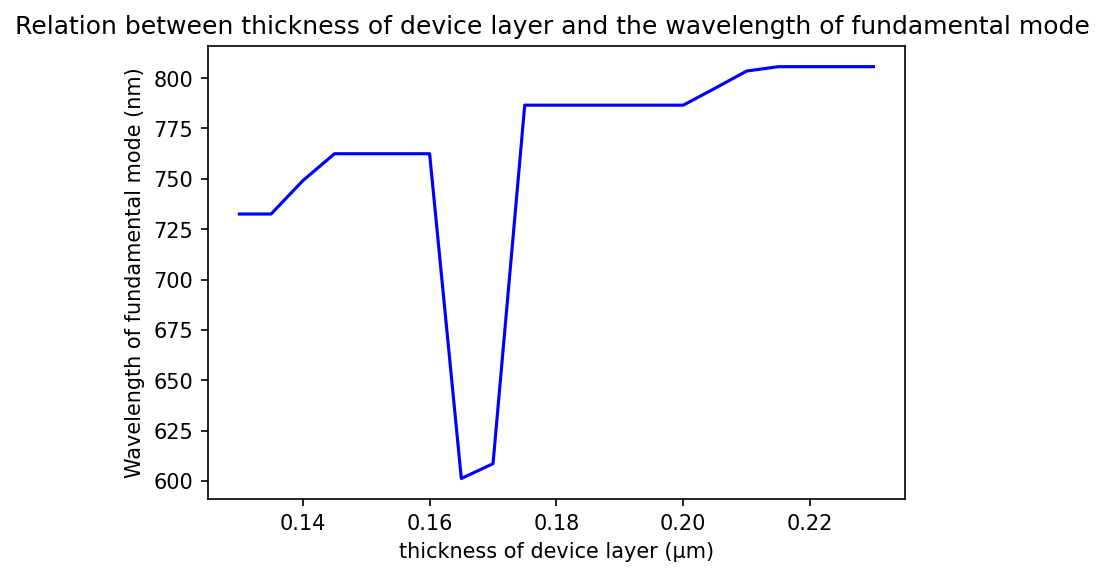

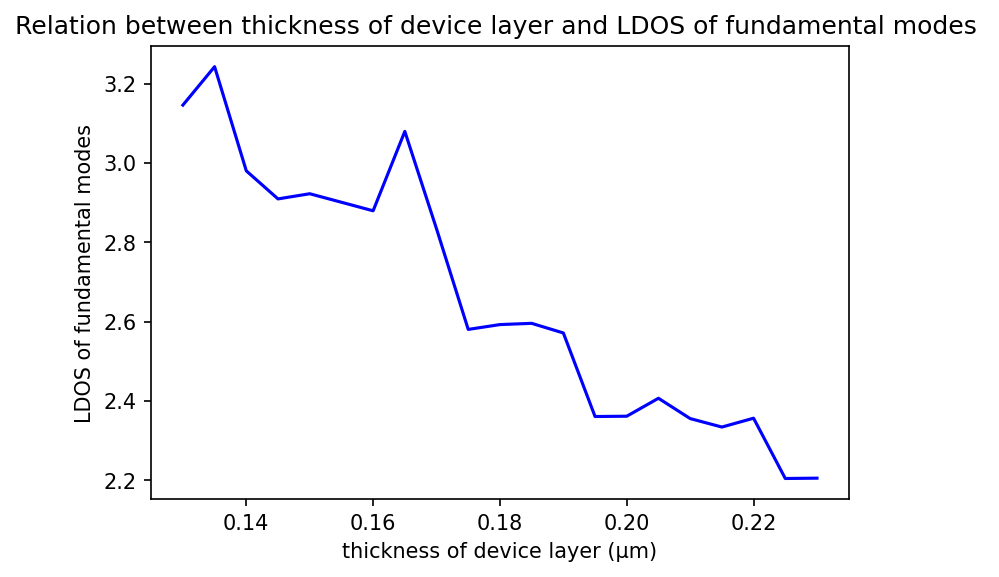

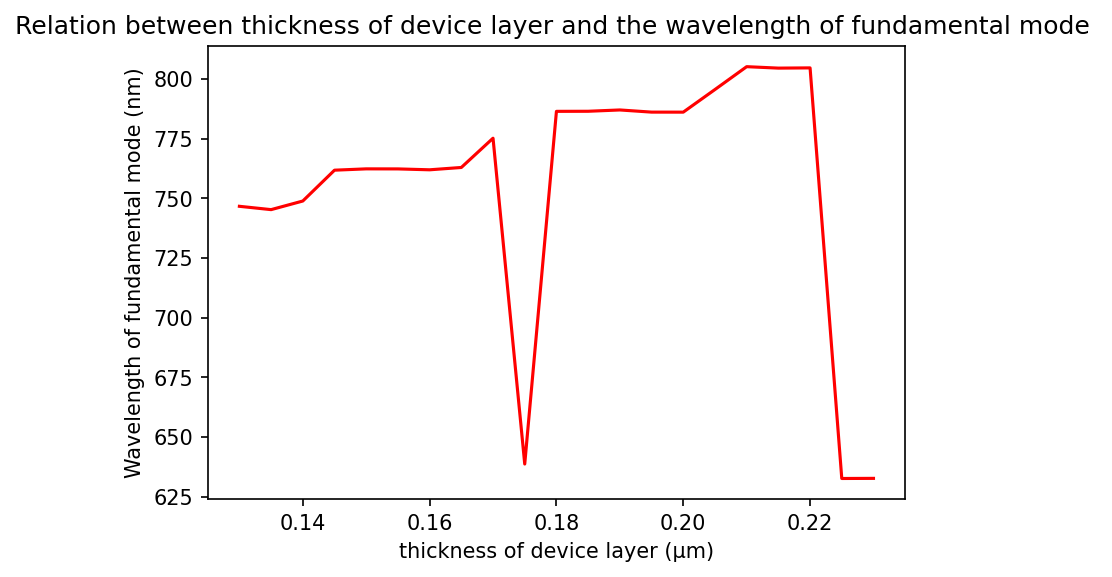

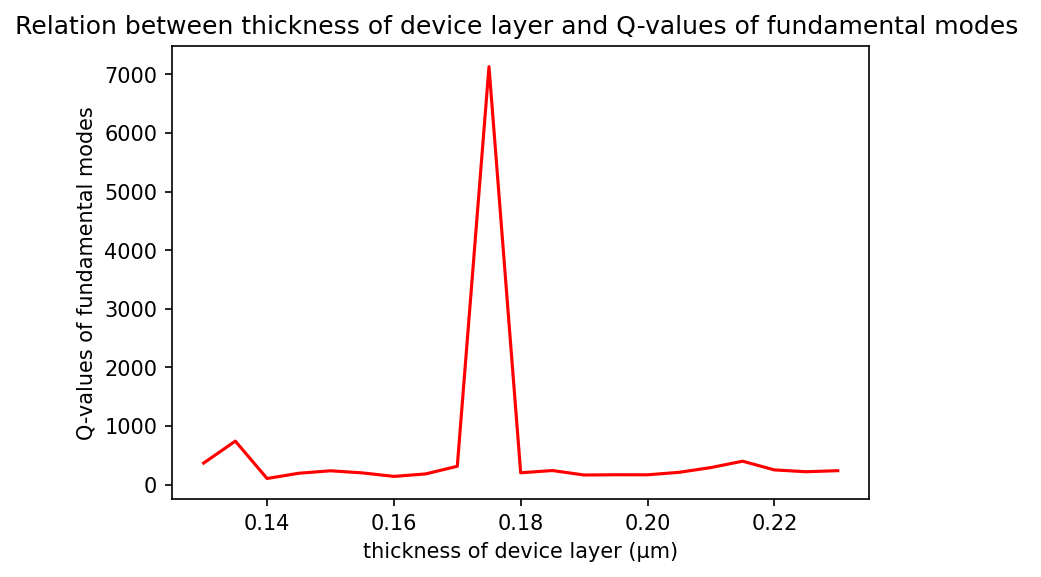

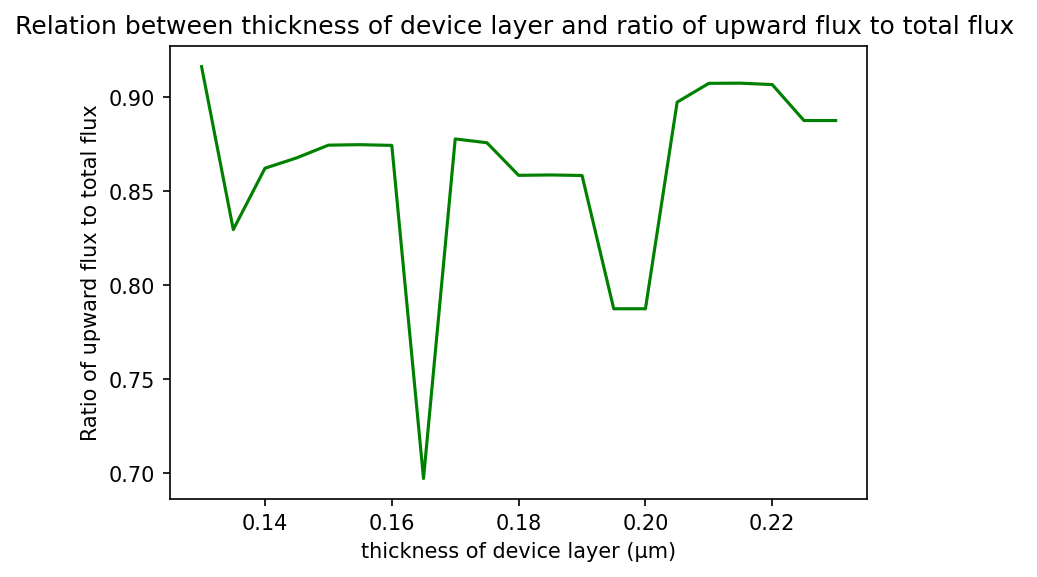

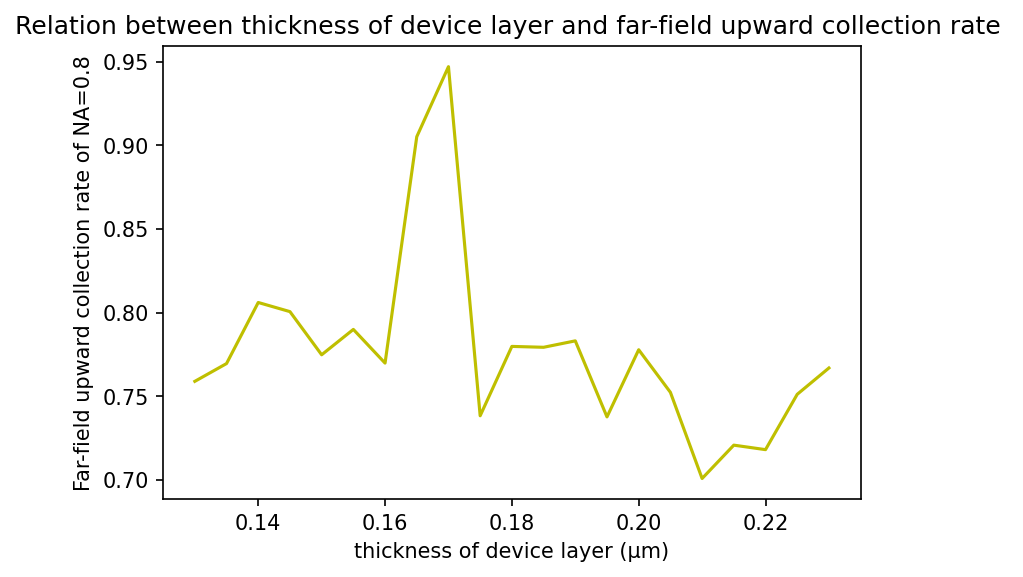

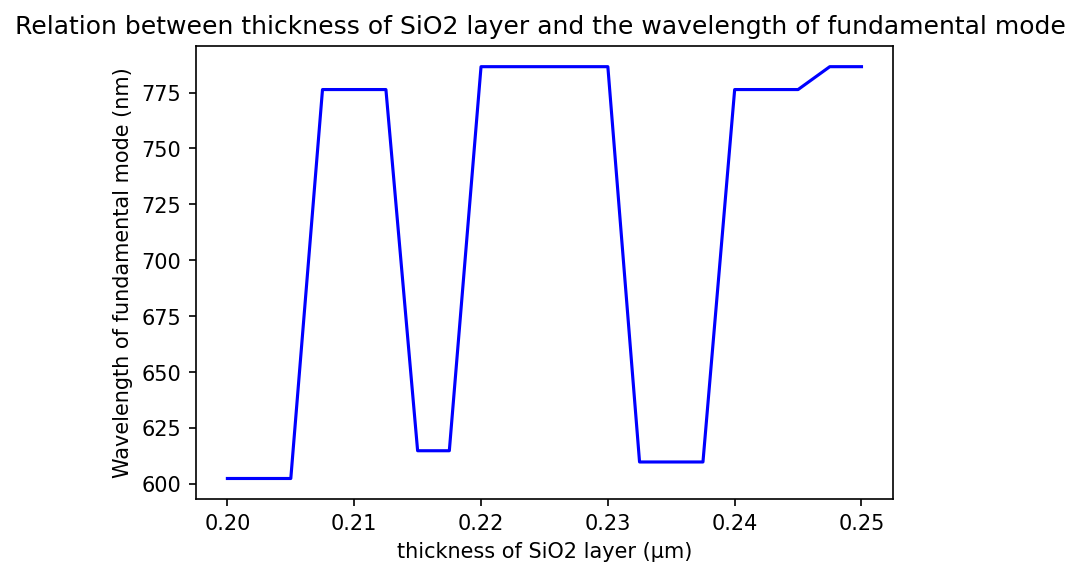

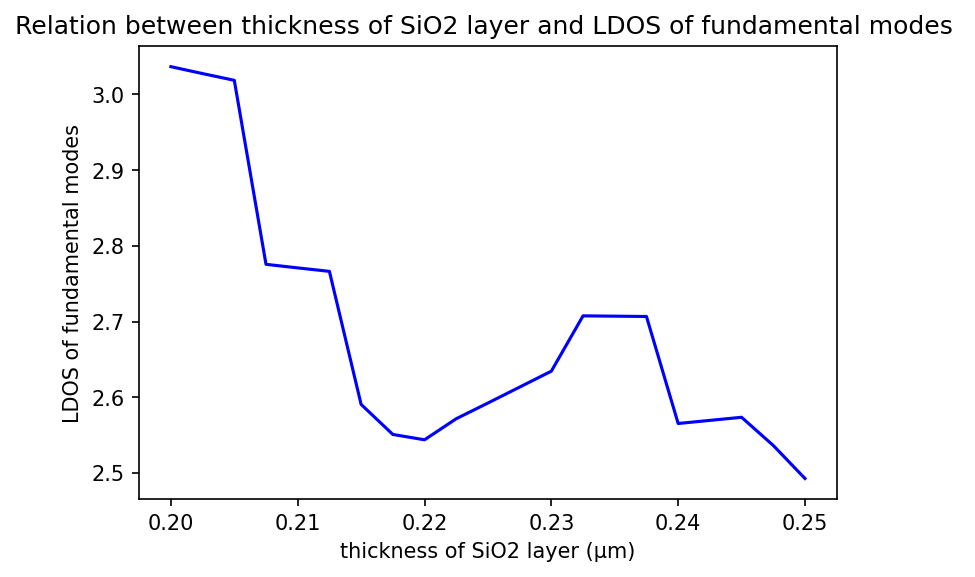

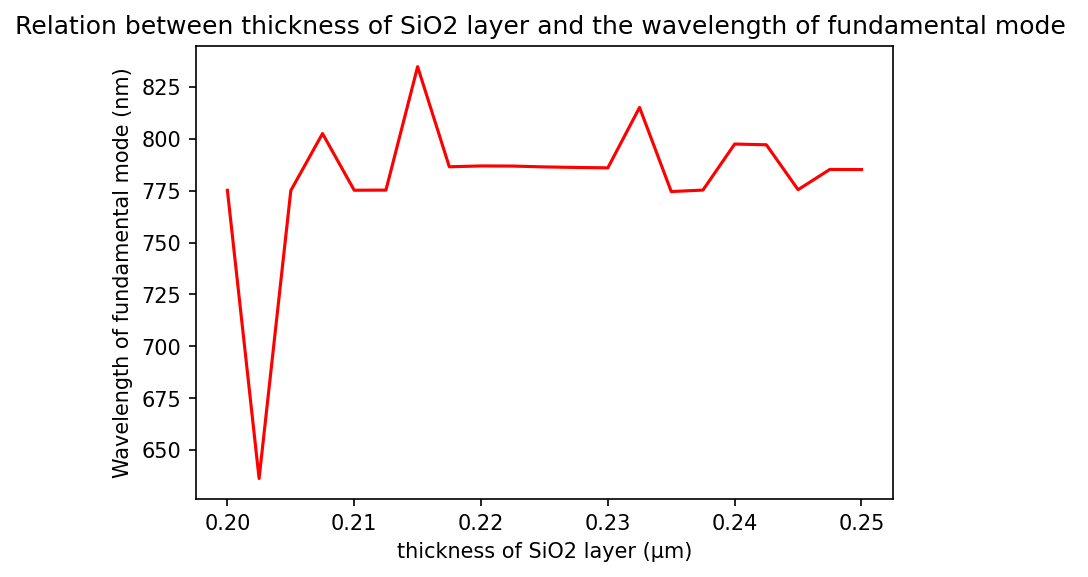

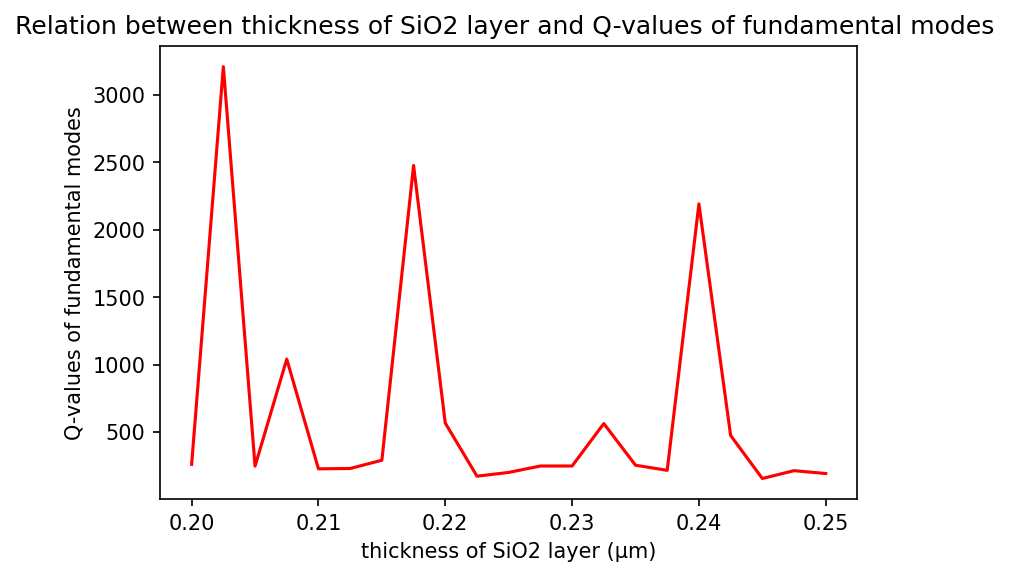

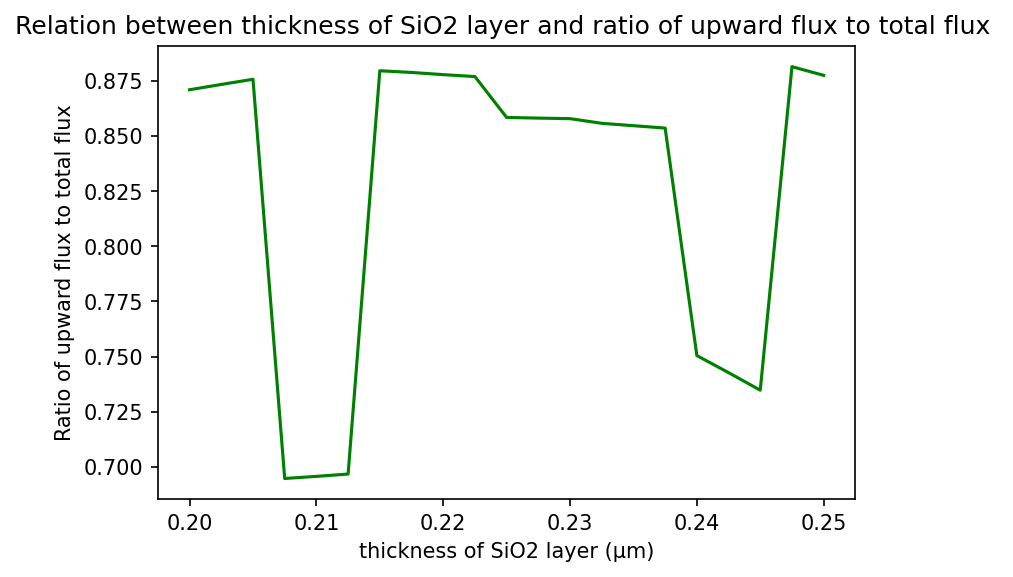

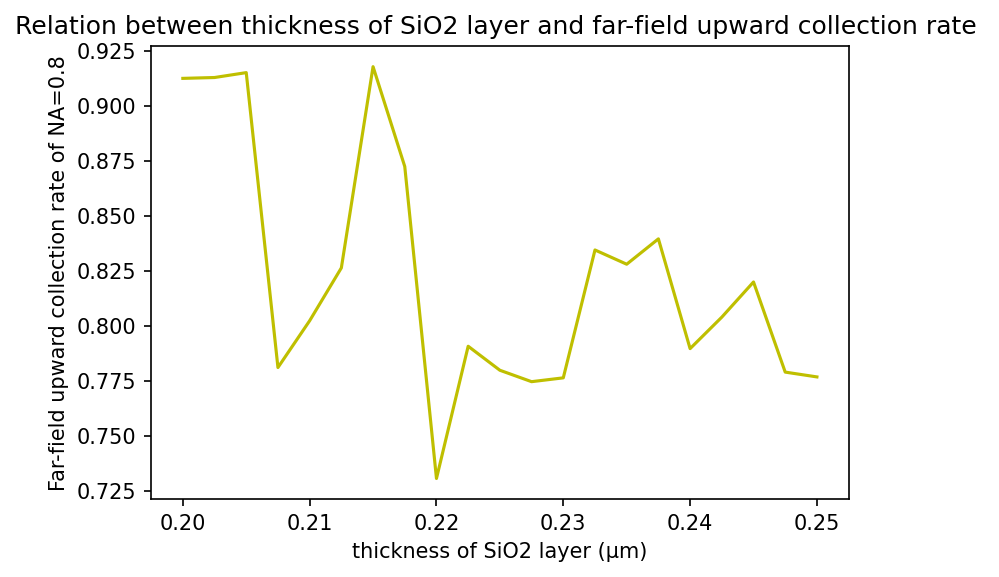

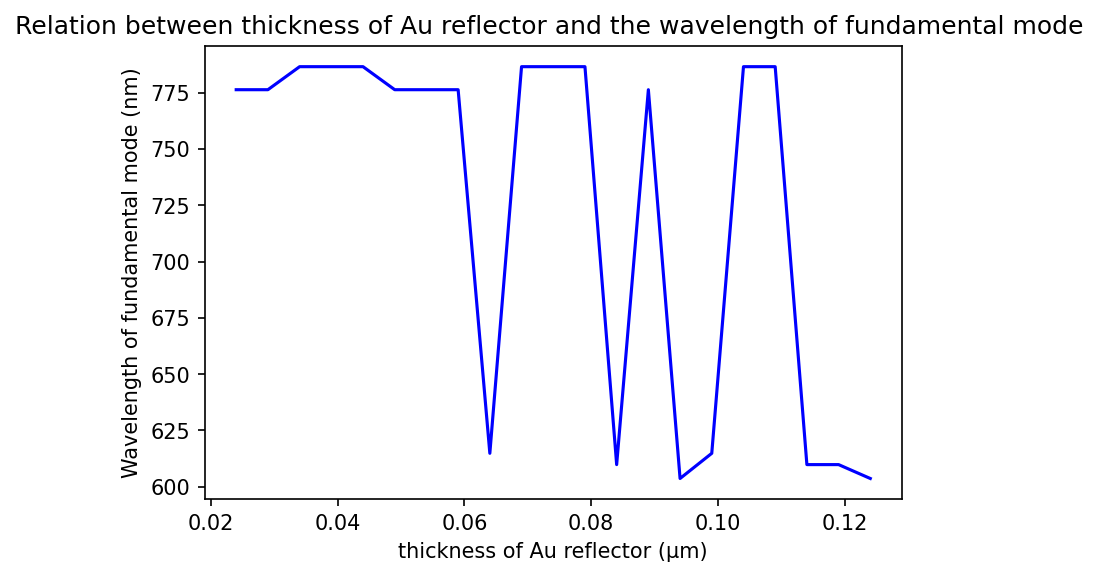

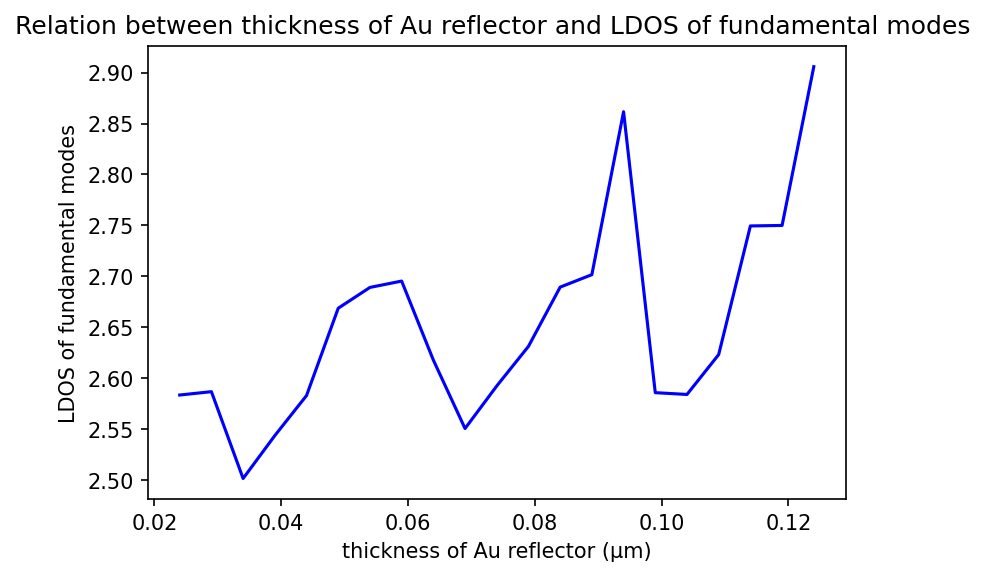

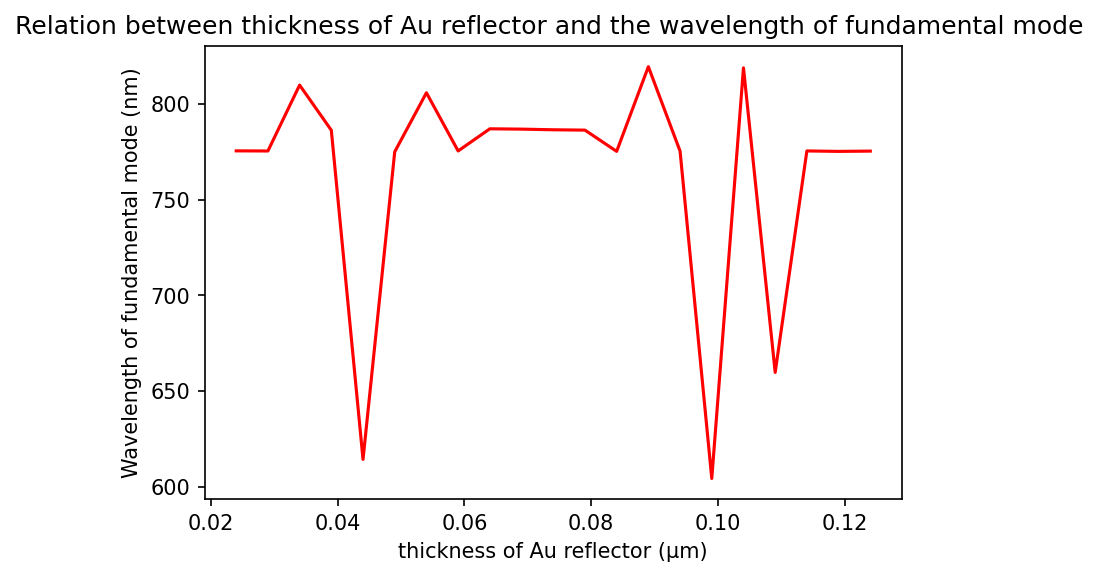

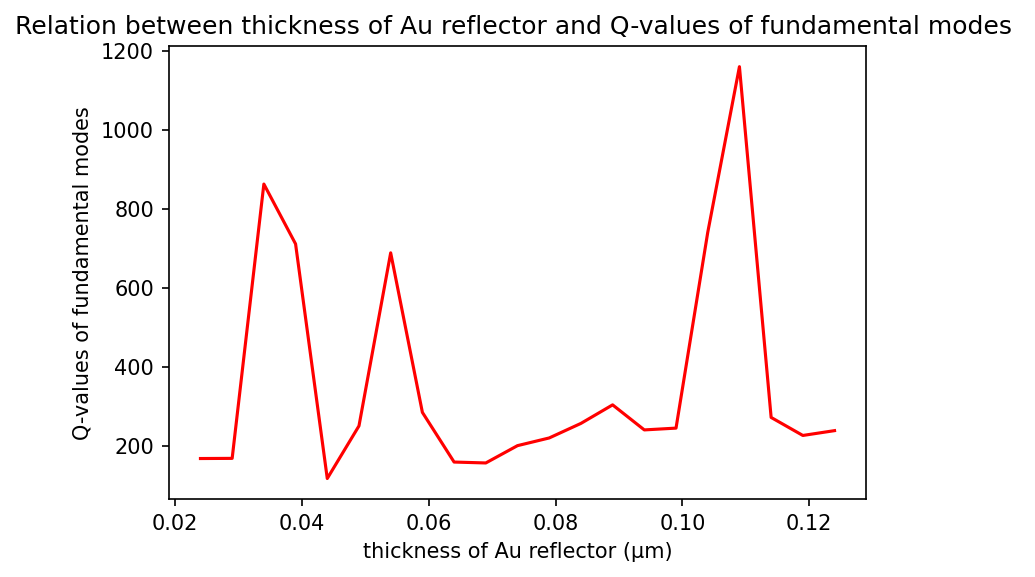

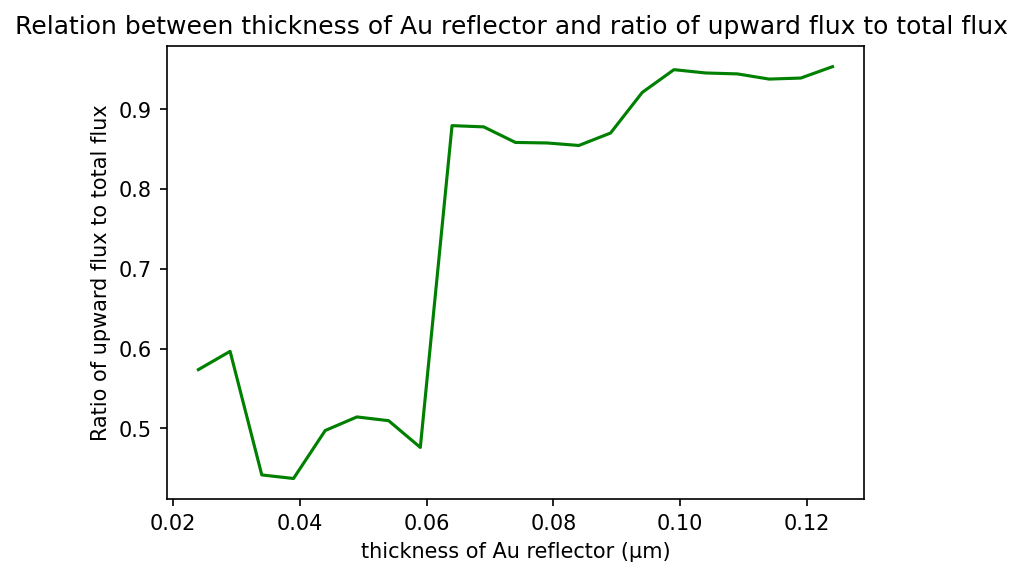

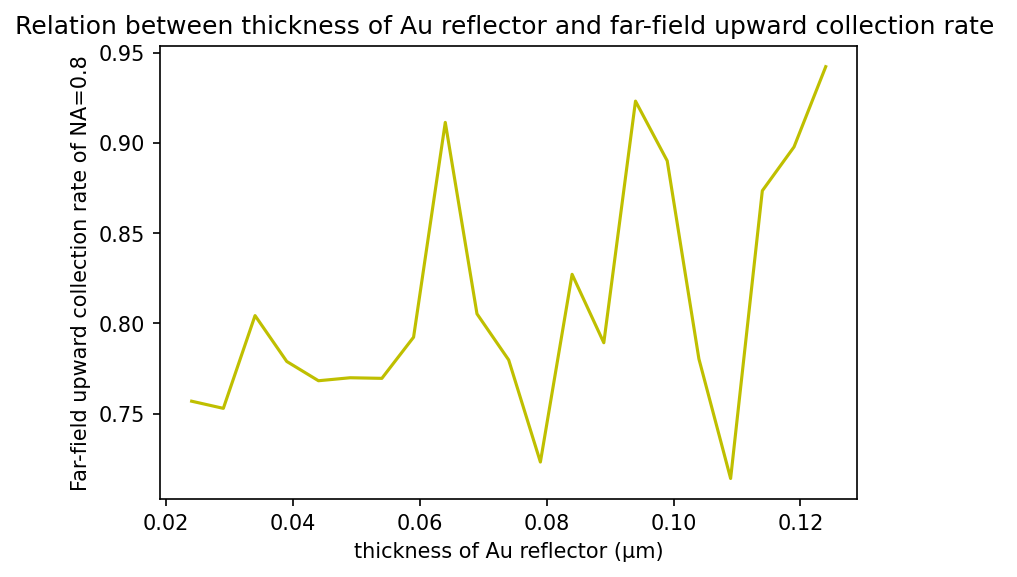

In [48]:
parameter(tdev=True,tsio2=True,tau=True)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000364065 s
Working in Cylindrical dimensions.
Computational cell is 8.53125 x 0 x 8.48438 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric c

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 72 (time=0.5625), 0.0562097 s/step
on time step 155 (time=1.21094), 0.0484717 s/step
on time step 235 (time=1.83594), 0.0500116 s/step
on time step 313 (time=2.44531), 0.0518815 s/step
on time step 395 (time=3.08594), 0.0491932 s/step
on time step 473 (time=3.69531), 0.0515504 s/step
on time step 543 (time=4.24219), 0.0579346 s/step
on time step 598 (time=4.67188), 0.0731665 s/step
on time step 650 (time=5.07812), 0.0775511 s/step
on time step 706 (time=5.51562), 0.072134 s/step
on time step 762 (time=5.95312), 0.0717237 s/step
on time step 818 (time=6.39062), 0.0720176 s/step
Meep progress: 6.5703125/65.0 = 10.1% done in 50.1s, 445.1s to go
on time step 874 (time=6.82812), 0.0722416 s/step
on time step 927 (time=7.24219), 0.0763813 s/step
on time step 976 (time=7.625), 0.0819602 s/step
on time step 1031 (time=8.05469), 0.0728657 s/step
on time step 1087 (time=8.49219), 0.072592 s/step
on time step 1143 (time=8.92969), 0.072484 s/step
on time step 1199 (time=9.36719), 0.07

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1085936234746037, 0.008633528352681207, -64.20281362314178, 2.9277574365247117e-05, -1.9009356915318742e-05-2.2267031916683433e-05i, 0.00032339426469373315+0.0i
harminv0:, 1.267894004087678, 0.009578241199299335, -66.18615973987096, 0.0007591536784122344, -0.000576876286501038-0.0004934856203777355i, 1.813694865092936e-05+0.0i
harminv0:, 1.271591130373059, -0.0031417693992276383, 202.36862875513117, 0.07153141847301797, 0.06960913267013152-0.01647156573231715i, 1.7481338466997915e-06+0.0i
harminv0:, 1.5399115316813572, 0.006124656778451502, -125.71410834801858, 6.747858205321003e-05, 4.783130604519525e-05-4.759753352772249e-05i, 1.2621465043294248e-05+0.0i
harminv0:, 1.629435285699236, -0.0054797448175519315, 148.67802607158484, 0.002592959605139256, -0.0005794188514771442+0.0025273925908803393i, 1.595947297059727e-06+0.0i
ldos0:, 1.0, -2.4038876808764416
ldos0:, 1.003350083752094, 0.5399952794664042
ldos0:, 1.0

Working in Cylindrical dimensions.
Computational cell is 8.53125 x 0 x 8.48438 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 53 (time=0.414062), 0.0762418 s/step
on time step 110 (time=0.859375), 0.0705875 s/step
on time step 165 (time=1.28906), 0.0729611 s/step
on time step 222 (time=1.73438), 0.0708358 s/step
on time step 279 (time=2.17969), 0.0710431 s/step
on time step 335 (time=2.61719), 0.072359 s/step
on time step 392 (time=3.0625), 0.0709664 s/step
on time step 449 (time=3.50781), 0.0711843 s/step
on time step 506 (time=3.95312), 0.070921 s/step
on time step 562 (time=4.39062), 0.0717596 s/step
on time step 612 (time=4.78125), 0.0804792 s/step
on time step 661 (time=5.16406), 0.081718 s/step
Meep progress: 5.3125/65.0 = 8.2% done in 50.0s, 561.9s to go
on time step 709 (time=5.53906), 0.083726 s/step
on time step 760 (time=5.9375), 0.0790833 s/step
on time step 811 (time=6.33594), 0.0786342 s/step
on time step 862 (time=6.73438), 0.0799088 s/step
on time step 914 (time=7.14062), 0.0770031 s/step
on time step 965 (time=7.53906), 0.0794454 s/step
on time step 1016 (time=7.9375), 0.0792846 

     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric c

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.078948 s/step
on time step 106 (time=0.828125), 0.0738071 s/step
on time step 160 (time=1.25), 0.0743122 s/step
on time step 215 (time=1.67969), 0.0735238 s/step
on time step 269 (time=2.10156), 0.0744941 s/step
on time step 321 (time=2.50781), 0.0776116 s/step
on time step 369 (time=2.88281), 0.0840621 s/step
on time step 423 (time=3.30469), 0.0751644 s/step
on time step 471 (time=3.67969), 0.0838472 s/step
on time step 523 (time=4.08594), 0.0781163 s/step
on time step 577 (time=4.50781), 0.0749391 s/step
on time step 631 (time=4.92969), 0.0755143 s/step
Meep progress: 5.0859375/65.0 = 7.8% done in 50.0s, 589.5s to go
on time step 684 (time=5.34375), 0.0758823 s/step
on time step 737 (time=5.75781), 0.0754724 s/step
on time step 791 (time=6.17969), 0.0749211 s/step
on time step 845 (time=6.60156), 0.0743076 s/step
on time step 899 (time=7.02344), 0.0749583 s/step
on time step 953 (time=7.44531), 0.0753873 s/step
on time step 1007 (time=7.86719), 0.07

Working in Cylindrical dimensions.
Computational cell is 8.73438 x 0 x 8.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.149

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 59 (time=0.460938), 0.0681264 s/step
on time step 109 (time=0.851562), 0.0808725 s/step
on time step 157 (time=1.22656), 0.0840257 s/step
on time step 205 (time=1.60156), 0.0839188 s/step
on time step 254 (time=1.98438), 0.083054 s/step
on time step 303 (time=2.36719), 0.0830526 s/step
on time step 352 (time=2.75), 0.0832812 s/step
on time step 402 (time=3.14062), 0.0814843 s/step
on time step 450 (time=3.51562), 0.0848848 s/step
on time step 499 (time=3.89844), 0.082337 s/step
on time step 548 (time=4.28125), 0.0818502 s/step
on time step 596 (time=4.65625), 0.0837229 s/step
Meep progress: 4.7890625/65.0 = 7.4% done in 50.0s, 628.7s to go
on time step 643 (time=5.02344), 0.08513 s/step
on time step 692 (time=5.40625), 0.0821433 s/step
on time step 741 (time=5.78906), 0.0828404 s/step
on time step 791 (time=6.17969), 0.0808438 s/step
on time step 842 (time=6.57812), 0.0791386 s/step
on time step 896 (time=7), 0.0750431 s/step
on time step 950 (time=7.42188), 0.0749879 s/st

Meep progress: 62.3828125/65.0 = 96.0% done in 600.5s, 25.2s to go
on time step 8006 (time=62.5469), 0.0749142 s/step
on time step 8060 (time=62.9688), 0.0745467 s/step
on time step 8115 (time=63.3984), 0.0738911 s/step
on time step 8169 (time=63.8203), 0.0741234 s/step
on time step 8223 (time=64.2422), 0.0741799 s/step
on time step 8278 (time=64.6719), 0.0735411 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000292063 s
Working in Cylindrical dimensions.
Computational cell is 8.9375 x 0 x 9.28125 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          a

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0834996 s/step
on time step 100 (time=0.78125), 0.0769987 s/step
on time step 153 (time=1.19531), 0.0764302 s/step
on time step 205 (time=1.60156), 0.0779605 s/step
on time step 257 (time=2.00781), 0.0770972 s/step
on time step 309 (time=2.41406), 0.0775961 s/step
on time step 358 (time=2.79688), 0.0828391 s/step
on time step 412 (time=3.21875), 0.0751922 s/step
on time step 466 (time=3.64062), 0.0743916 s/step
on time step 521 (time=4.07031), 0.0737429 s/step
on time step 575 (time=4.49219), 0.075105 s/step
on time step 629 (time=4.91406), 0.0743196 s/step
Meep progress: 5.078125/65.0 = 7.8% done in 50.0s, 590.2s to go
on time step 683 (time=5.33594), 0.0746087 s/step
on time step 737 (time=5.75781), 0.0749991 s/step
on time step 795 (time=6.21094), 0.0690243 s/step
on time step 873 (time=6.82031), 0.0516469 s/step
on time step 950 (time=7.42188), 0.0519732 s/step
on time step 1026 (time=8.01562), 0.0528345 s/step
on time step 1103 (time=8.61719), 0.052

Working in Cylindrical dimensions.
Computational cell is 8.9375 x 0 x 9.28125 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 74 (time=0.578125), 0.0543334 s/step
on time step 151 (time=1.17969), 0.0519561 s/step
on time step 228 (time=1.78125), 0.0523674 s/step
on time step 305 (time=2.38281), 0.0522376 s/step
on time step 383 (time=2.99219), 0.0519497 s/step
on time step 461 (time=3.60156), 0.0518947 s/step
on time step 539 (time=4.21094), 0.0517356 s/step
on time step 617 (time=4.82031), 0.0513842 s/step
on time step 694 (time=5.42188), 0.0523642 s/step
on time step 772 (time=6.03125), 0.0518468 s/step
on time step 851 (time=6.64844), 0.0510163 s/step
on time step 929 (time=7.25781), 0.0517374 s/step
Meep progress: 7.5078125/65.0 = 11.6% done in 50.0s, 383.0s to go
on time step 1012 (time=7.90625), 0.0484856 s/step
on time step 1098 (time=8.57812), 0.0466991 s/step
on time step 1185 (time=9.25781), 0.0462133 s/step
on time step 1273 (time=9.94531), 0.045821 s/step
on time step 1359 (time=10.6172), 0.0469704 s/step
on time step 1438 (time=11.2344), 0.0508665 s/step
on time step 1516 (time=11.84

     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 0.739635 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susceptibility: frequency=1e-10, gamma=0.0427474
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 64 (time=0.5), 0.0626777 s/step
on time step 135 (time=1.05469), 0.0570079 s/step
on time step 206 (time=1.60938), 0.0569958 s/step
on time step 267 (time=2.08594), 0.0662616 s/step
on time step 312 (time=2.4375), 0.0902527 s/step
on time step 357 (time=2.78906), 0.0900774 s/step
on time step 403 (time=3.14844), 0.088725 s/step
on time step 451 (time=3.52344), 0.0834494 s/step
on time step 499 (time=3.89844), 0.0837939 s/step
on time step 568 (time=4.4375), 0.0582399 s/step
on time step 639 (time=4.99219), 0.0569971 s/step
on time step 709 (time=5.53906), 0.057927 s/step
Meep progress: 5.7421875/65.0 = 8.8% done in 50.0s, 516.0s to go
on time step 779 (time=6.08594), 0.0576209 s/step
on time step 852 (time=6.65625), 0.0548912 s/step
on time step 925 (time=7.22656), 0.0552172 s/step
on time step 994 (time=7.76562), 0.058036 s/step
on time step 1063 (time=8.30469), 0.0587959 s/step
on time step 1132 (time=8.84375), 0.0581081 s/step
on time step 1200 (time=9.375), 0.0589433 s

Meep progress: 58.3828125/65.0 = 89.8% done in 600.5s, 68.1s to go
on time step 7491 (time=58.5234), 0.0837932 s/step
on time step 7539 (time=58.8984), 0.0840451 s/step
on time step 7587 (time=59.2734), 0.0840098 s/step
on time step 7635 (time=59.6484), 0.0835868 s/step
on time step 7683 (time=60.0234), 0.0837787 s/step
on time step 7727 (time=60.3672), 0.0929365 s/step
on time step 7766 (time=60.6719), 0.104561 s/step
on time step 7793 (time=60.8828), 0.149218 s/step
on time step 7835 (time=61.2109), 0.096239 s/step
on time step 7881 (time=61.5703), 0.0885349 s/step
on time step 7929 (time=61.9453), 0.0848725 s/step
on time step 7978 (time=62.3281), 0.0830575 s/step
Meep progress: 62.703125/65.0 = 96.5% done in 650.5s, 23.8s to go
on time step 8027 (time=62.7109), 0.0833046 s/step
on time step 8074 (time=63.0781), 0.0864179 s/step
on time step 8123 (time=63.4609), 0.0830758 s/step
on time step 8171 (time=63.8359), 0.0836934 s/step
on time step 8220 (time=64.2188), 0.0829987 s/step
on 

Working in Cylindrical dimensions.
Computational cell is 9.14062 x 0 x 9.67188 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.087957 s/step
on time step 95 (time=0.742188), 0.0832172 s/step
on time step 143 (time=1.11719), 0.0838128 s/step
on time step 193 (time=1.50781), 0.0809548 s/step
on time step 244 (time=1.90625), 0.0785985 s/step
on time step 294 (time=2.29688), 0.0801534 s/step
on time step 343 (time=2.67969), 0.0832014 s/step
on time step 392 (time=3.0625), 0.0819117 s/step
on time step 441 (time=3.44531), 0.0826711 s/step
on time step 490 (time=3.82812), 0.0833125 s/step
on time step 539 (time=4.21094), 0.0816771 s/step
on time step 588 (time=4.59375), 0.0817625 s/step
Meep progress: 4.7421875/65.0 = 7.3% done in 50.0s, 635.8s to go
on time step 636 (time=4.96875), 0.0836929 s/step
on time step 685 (time=5.35156), 0.0819206 s/step
on time step 734 (time=5.73438), 0.082579 s/step
on time step 783 (time=6.11719), 0.0821793 s/step
on time step 832 (time=6.5), 0.0832389 s/step
on time step 881 (time=6.88281), 0.0827712 s/step
on time step 930 (time=7.26562), 0.0820688

Meep progress: 56.671875/65.0 = 87.2% done in 600.7s, 88.3s to go
on time step 7270 (time=56.7969), 0.083408 s/step
on time step 7319 (time=57.1797), 0.082802 s/step
on time step 7368 (time=57.5625), 0.0824741 s/step
on time step 7417 (time=57.9453), 0.0826651 s/step
on time step 7466 (time=58.3281), 0.0820219 s/step
on time step 7515 (time=58.7109), 0.0826529 s/step
on time step 7563 (time=59.0859), 0.0836395 s/step
on time step 7612 (time=59.4688), 0.0821628 s/step
on time step 7661 (time=59.8516), 0.0831137 s/step
on time step 7710 (time=60.2344), 0.083057 s/step
on time step 7759 (time=60.6172), 0.0817852 s/step
on time step 7808 (time=61), 0.082656 s/step
on time step 7857 (time=61.3828), 0.0824911 s/step
Meep progress: 61.3984375/65.0 = 94.5% done in 650.7s, 38.2s to go
on time step 7906 (time=61.7656), 0.0826487 s/step
on time step 7955 (time=62.1484), 0.0818594 s/step
on time step 8004 (time=62.5312), 0.0824313 s/step
on time step 8053 (time=62.9141), 0.0829948 s/step
on time s

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 43 (time=0.335938), 0.0940407 s/step
on time step 90 (time=0.703125), 0.0862986 s/step
on time step 138 (time=1.07812), 0.0848412 s/step
on time step 186 (time=1.45312), 0.0846097 s/step
on time step 233 (time=1.82031), 0.0858871 s/step
on time step 280 (time=2.1875), 0.0857718 s/step
on time step 327 (time=2.55469), 0.0861336 s/step
on time step 375 (time=2.92969), 0.0846575 s/step
on time step 422 (time=3.29688), 0.0860925 s/step
on time step 468 (time=3.65625), 0.0870031 s/step
on time step 514 (time=4.01562), 0.087837 s/step
on time step 561 (time=4.38281), 0.0869594 s/step
Meep progress: 4.515625/65.0 = 6.9% done in 50.1s, 670.8s to go
on time step 607 (time=4.74219), 0.0879857 s/step
on time step 654 (time=5.10938), 0.0856908 s/step
on time step 701 (time=5.47656), 0.0855631 s/step
on time step 748 (time=5.84375), 0.0864139 s/step
on time step 794 (time=6.20312), 0.0888285 s/step
on time step 841 (time=6.57031), 0.086561 s/step
on time step 888 (time=6.9375), 0.08649

Meep progress: 53.8515625/65.0 = 82.8% done in 600.4s, 124.3s to go
on time step 6915 (time=54.0234), 0.0868027 s/step
on time step 6961 (time=54.3828), 0.0876242 s/step
on time step 7007 (time=54.7422), 0.0875942 s/step
on time step 7053 (time=55.1016), 0.0883529 s/step
on time step 7100 (time=55.4688), 0.0865791 s/step
on time step 7146 (time=55.8281), 0.0875997 s/step
on time step 7206 (time=56.2969), 0.0675473 s/step
on time step 7278 (time=56.8594), 0.0562317 s/step
on time step 7347 (time=57.3984), 0.0587116 s/step
on time step 7415 (time=57.9297), 0.0591986 s/step
on time step 7486 (time=58.4844), 0.0564023 s/step
on time step 7555 (time=59.0234), 0.0582479 s/step
Meep progress: 59.515625/65.0 = 91.6% done in 650.4s, 59.9s to go
on time step 7624 (time=59.5625), 0.0582225 s/step
on time step 7695 (time=60.1172), 0.0569825 s/step
on time step 7765 (time=60.6641), 0.0576862 s/step
on time step 7835 (time=61.2109), 0.0579807 s/step
on time step 7905 (time=61.7578), 0.0575317 s/step

Working in Cylindrical dimensions.
Computational cell is 9.34375 x 0 x 10.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 72 (time=0.5625), 0.0556637 s/step
on time step 143 (time=1.11719), 0.0566236 s/step
on time step 214 (time=1.67188), 0.0563557 s/step
on time step 285 (time=2.22656), 0.0566988 s/step
on time step 360 (time=2.8125), 0.0537807 s/step
on time step 430 (time=3.35938), 0.0572298 s/step
on time step 500 (time=3.90625), 0.0575222 s/step
on time step 571 (time=4.46094), 0.0564693 s/step
on time step 642 (time=5.01562), 0.0571011 s/step
on time step 714 (time=5.57812), 0.0560397 s/step
on time step 786 (time=6.14062), 0.0561304 s/step
on time step 857 (time=6.69531), 0.0567338 s/step
Meep progress: 6.9296875/65.0 = 10.7% done in 50.0s, 419.4s to go
on time step 928 (time=7.25), 0.0570387 s/step
on time step 998 (time=7.79688), 0.0576957 s/step
on time step 1067 (time=8.33594), 0.0581468 s/step
on time step 1136 (time=8.875), 0.0581032 s/step
on time step 1207 (time=9.42969), 0.057017 s/step
on time step 1277 (time=9.97656), 0.0572192 s/step
on time step 1352 (time=10.5625), 0.053

          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 0.790491 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susceptibility: frequency=1e-10, gamma=0.0427474
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 62 (time=0.484375), 0.0650118 s/step
on time step 130 (time=1.01562), 0.0590647 s/step
on time step 197 (time=1.53906), 0.0597616 s/step
on time step 265 (time=2.07031), 0.0593713 s/step
on time step 333 (time=2.60156), 0.0594123 s/step
on time step 401 (time=3.13281), 0.0596362 s/step
on time step 470 (time=3.67188), 0.0585272 s/step
on time step 538 (time=4.20312), 0.0591192 s/step
on time step 607 (time=4.74219), 0.0579964 s/step
on time step 674 (time=5.26562), 0.060025 s/step
on time step 741 (time=5.78906), 0.0600492 s/step
on time step 809 (time=6.32031), 0.0589316 s/step
Meep progress: 6.546875/65.0 = 10.1% done in 50.0s, 446.8s to go
on time step 876 (time=6.84375), 0.0603247 s/step
on time step 944 (time=7.375), 0.0596463 s/step
on time step 1011 (time=7.89844), 0.0602832 s/step
on time step 1079 (time=8.42969), 0.0590166 s/step
on time step 1146 (time=8.95312), 0.0600295 s/step
on time step 1213 (time=9.47656), 0.0604734 s/step
on time step 1281 (time=10.0078), 

Working in Cylindrical dimensions.
Computational cell is 9.53125 x 0 x 10.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 64 (time=0.5), 0.0626877 s/step
on time step 134 (time=1.04688), 0.0577564 s/step
on time step 202 (time=1.57812), 0.0591648 s/step
on time step 270 (time=2.10938), 0.0591523 s/step
on time step 339 (time=2.64844), 0.0583607 s/step
on time step 407 (time=3.17969), 0.0596454 s/step
on time step 475 (time=3.71094), 0.0595844 s/step
on time step 543 (time=4.24219), 0.0589107 s/step
on time step 616 (time=4.8125), 0.0548469 s/step
on time step 683 (time=5.33594), 0.0604206 s/step
on time step 749 (time=5.85156), 0.0606708 s/step
on time step 817 (time=6.38281), 0.0593744 s/step
Meep progress: 6.6015625/65.0 = 10.2% done in 50.0s, 442.5s to go
on time step 884 (time=6.90625), 0.0598402 s/step
on time step 951 (time=7.42969), 0.0597309 s/step
on time step 1019 (time=7.96094), 0.0593658 s/step
on time step 1088 (time=8.5), 0.0587908 s/step
on time step 1157 (time=9.03906), 0.0587539 s/step
on time step 1225 (time=9.57031), 0.0588315 s/step
on time step 1292 (time=10.0938), 0.0598

     block, center = (2.1595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.5345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 0.816939 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susceptibility:

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 60 (time=0.46875), 0.0668982 s/step
on time step 127 (time=0.992188), 0.0604024 s/step
on time step 192 (time=1.5), 0.0620957 s/step
on time step 257 (time=2.00781), 0.0621652 s/step
on time step 323 (time=2.52344), 0.0612288 s/step
on time step 388 (time=3.03125), 0.0622282 s/step
on time step 453 (time=3.53906), 0.0620529 s/step
on time step 518 (time=4.04688), 0.0621728 s/step
on time step 582 (time=4.54688), 0.0625186 s/step
on time step 647 (time=5.05469), 0.0618253 s/step
on time step 712 (time=5.5625), 0.0622808 s/step
on time step 778 (time=6.07812), 0.0612693 s/step
Meep progress: 6.28125/65.0 = 9.7% done in 50.1s, 467.9s to go
on time step 842 (time=6.57812), 0.062728 s/step
on time step 907 (time=7.08594), 0.0616012 s/step
on time step 971 (time=7.58594), 0.0628554 s/step
on time step 1036 (time=8.09375), 0.0623119 s/step
on time step 1100 (time=8.59375), 0.0626186 s/step
on time step 1165 (time=9.10156), 0.0624433 s/step
on time step 1230 (time=9.60938), 0.0617

ldos0:, 1.0603015075376885, 0.7457082901158143
ldos0:, 1.0636515912897824, 0.10556596866583469
ldos0:, 1.067001675041876, -0.46973689756148135
ldos0:, 1.07035175879397, -0.2924613134750715
ldos0:, 1.0737018425460636, 0.32912876546852415
ldos0:, 1.0770519262981575, 0.5883953374326705
ldos0:, 1.0804020100502514, 0.21989669492779002
ldos0:, 1.083752093802345, -0.24220960498977334
ldos0:, 1.087102177554439, -0.20758196865750372
ldos0:, 1.0904522613065326, 0.242590694418454
ldos0:, 1.0938023450586265, 0.5255887340370838
ldos0:, 1.0971524288107204, 0.3195754005044181
ldos0:, 1.100502512562814, -0.07227792198331044
ldos0:, 1.103852596314908, -0.1564284691925966
ldos0:, 1.1072026800670016, 0.13018887961934356
ldos0:, 1.1105527638190955, 0.38870792470135646
ldos0:, 1.1139028475711894, 0.29525099964077406
ldos0:, 1.117252931323283, -0.006108291689427732
ldos0:, 1.120603015075377, -0.12227631311060057
ldos0:, 1.1239530988274709, 0.08241866384086106
ldos0:, 1.1273031825795645, 0.33955290141926125


Working in Cylindrical dimensions.
Computational cell is 9.73438 x 0 x 10.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 60 (time=0.46875), 0.0668456 s/step
on time step 126 (time=0.984375), 0.0609116 s/step
on time step 192 (time=1.5), 0.060739 s/step
on time step 258 (time=2.01562), 0.0608766 s/step
on time step 324 (time=2.53125), 0.0614025 s/step
on time step 390 (time=3.04688), 0.0608459 s/step
on time step 456 (time=3.5625), 0.0612132 s/step
on time step 521 (time=4.07031), 0.0624379 s/step
on time step 587 (time=4.58594), 0.0610309 s/step
on time step 653 (time=5.10156), 0.0611095 s/step
on time step 719 (time=5.61719), 0.0611192 s/step
on time step 785 (time=6.13281), 0.0613898 s/step
Meep progress: 6.3359375/65.0 = 9.7% done in 50.0s, 463.1s to go
on time step 850 (time=6.64062), 0.0619891 s/step
on time step 916 (time=7.15625), 0.0610649 s/step
on time step 982 (time=7.67188), 0.0612398 s/step
on time step 1047 (time=8.17969), 0.0621027 s/step
on time step 1112 (time=8.6875), 0.0615468 s/step
on time step 1177 (time=9.19531), 0.0619594 s/step
on time step 1243 (time=9.71094), 0.061

          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.1595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.5345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 0.861105 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: f

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 57 (time=0.445312), 0.0703915 s/step
on time step 119 (time=0.929688), 0.0649955 s/step
on time step 182 (time=1.42188), 0.0637157 s/step
on time step 244 (time=1.90625), 0.0646762 s/step
on time step 307 (time=2.39844), 0.0639202 s/step
on time step 369 (time=2.88281), 0.064637 s/step
on time step 432 (time=3.375), 0.0644783 s/step
on time step 495 (time=3.86719), 0.0644298 s/step
on time step 558 (time=4.35938), 0.0646228 s/step
on time step 621 (time=4.85156), 0.0642594 s/step
on time step 684 (time=5.34375), 0.0643866 s/step
on time step 747 (time=5.83594), 0.0635572 s/step
Meep progress: 6.03125/65.0 = 9.3% done in 50.0s, 489.0s to go
on time step 809 (time=6.32031), 0.0646524 s/step
on time step 871 (time=6.80469), 0.0650866 s/step
on time step 933 (time=7.28906), 0.0645728 s/step
on time step 994 (time=7.76562), 0.065878 s/step
on time step 1057 (time=8.25781), 0.064349 s/step
on time step 1120 (time=8.75), 0.0640038 s/step
on time step 1183 (time=9.24219), 0.064118

Working in Cylindrical dimensions.
Computational cell is 9.9375 x 0 x 11.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 58 (time=0.453125), 0.0697137 s/step
on time step 121 (time=0.945312), 0.0640432 s/step
on time step 184 (time=1.4375), 0.0636516 s/step
on time step 248 (time=1.9375), 0.06329 s/step
on time step 311 (time=2.42969), 0.0636953 s/step
on time step 374 (time=2.92188), 0.0640098 s/step
on time step 437 (time=3.41406), 0.0639349 s/step
on time step 499 (time=3.89844), 0.0646499 s/step
on time step 561 (time=4.38281), 0.0651035 s/step
on time step 624 (time=4.875), 0.0641639 s/step
on time step 687 (time=5.36719), 0.0643606 s/step
on time step 749 (time=5.85156), 0.0645571 s/step
Meep progress: 6.0546875/65.0 = 9.3% done in 50.0s, 487.2s to go
on time step 811 (time=6.33594), 0.0649702 s/step
on time step 873 (time=6.82031), 0.0645557 s/step
on time step 936 (time=7.3125), 0.0638246 s/step
on time step 999 (time=7.80469), 0.063937 s/step
on time step 1061 (time=8.28906), 0.0653072 s/step
on time step 1124 (time=8.78125), 0.064088 s/step
on time step 1187 (time=9.27344), 0.06388

     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.1595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.5345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 55 (time=0.429688), 0.0731419 s/step
on time step 115 (time=0.898438), 0.0669568 s/step
on time step 174 (time=1.35938), 0.068188 s/step
on time step 234 (time=1.82812), 0.0671259 s/step
on time step 294 (time=2.29688), 0.067027 s/step
on time step 354 (time=2.76562), 0.0671422 s/step
on time step 414 (time=3.23438), 0.0667427 s/step
on time step 474 (time=3.70312), 0.066808 s/step
on time step 535 (time=4.17969), 0.0666284 s/step
on time step 596 (time=4.65625), 0.0667187 s/step
on time step 656 (time=5.125), 0.0672359 s/step
on time step 716 (time=5.59375), 0.0672067 s/step
Meep progress: 5.7890625/65.0 = 8.9% done in 50.0s, 511.5s to go
on time step 776 (time=6.0625), 0.0670136 s/step
on time step 836 (time=6.53125), 0.066846 s/step
on time step 896 (time=7), 0.0675237 s/step
on time step 955 (time=7.46094), 0.0684436 s/step
on time step 1014 (time=7.92188), 0.0687725 s/step
on time step 1073 (time=8.38281), 0.0687831 s/step
on time step 1133 (time=8.85156), 0.0672469 s

Working in Cylindrical dimensions.
Computational cell is 10.1406 x 0 x 11.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 55 (time=0.429688), 0.0731093 s/step
on time step 116 (time=0.90625), 0.0661095 s/step
on time step 175 (time=1.36719), 0.0685979 s/step
on time step 236 (time=1.84375), 0.0664011 s/step
on time step 295 (time=2.30469), 0.0684913 s/step
on time step 356 (time=2.78125), 0.0658853 s/step
on time step 417 (time=3.25781), 0.0666207 s/step
on time step 477 (time=3.72656), 0.0668919 s/step
on time step 537 (time=4.19531), 0.0669994 s/step
on time step 598 (time=4.67188), 0.0660991 s/step
on time step 658 (time=5.14062), 0.0669304 s/step
on time step 718 (time=5.60938), 0.0677536 s/step
Meep progress: 5.796875/65.0 = 8.9% done in 50.0s, 511.1s to go
on time step 778 (time=6.07812), 0.0678108 s/step
on time step 839 (time=6.55469), 0.0667088 s/step
on time step 899 (time=7.02344), 0.0669624 s/step
on time step 958 (time=7.48438), 0.068628 s/step
on time step 1018 (time=7.95312), 0.0673484 s/step
on time step 1077 (time=8.41406), 0.0680065 s/step
on time step 1136 (time=8.875), 0.0

          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.1595,0,0.1495)

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 51 (time=0.398438), 0.0791868 s/step
on time step 108 (time=0.84375), 0.0708814 s/step
on time step 166 (time=1.29688), 0.0698521 s/step
on time step 223 (time=1.74219), 0.0705027 s/step
on time step 281 (time=2.19531), 0.0701465 s/step
on time step 338 (time=2.64062), 0.0703597 s/step
on time step 395 (time=3.08594), 0.0706366 s/step
on time step 452 (time=3.53125), 0.0704101 s/step
on time step 510 (time=3.98438), 0.0697049 s/step
on time step 567 (time=4.42969), 0.0702177 s/step
on time step 625 (time=4.88281), 0.07018 s/step
on time step 682 (time=5.32812), 0.0707169 s/step
Meep progress: 5.53125/65.0 = 8.5% done in 50.1s, 538.1s to go
on time step 746 (time=5.82812), 0.0631808 s/step
on time step 810 (time=6.32812), 0.0626375 s/step
on time step 875 (time=6.83594), 0.0623437 s/step
on time step 939 (time=7.33594), 0.0625586 s/step
on time step 1003 (time=7.83594), 0.0634486 s/step
on time step 1067 (time=8.33594), 0.0629538 s/step
on time step 1124 (time=8.78125), 0.0

Working in Cylindrical dimensions.
Computational cell is 10.3438 x 0 x 12.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 53 (time=0.414062), 0.0766427 s/step
on time step 112 (time=0.875), 0.0689919 s/step
on time step 170 (time=1.32812), 0.069042 s/step
on time step 227 (time=1.77344), 0.0713354 s/step
on time step 285 (time=2.22656), 0.0693179 s/step
on time step 343 (time=2.67969), 0.06953 s/step
on time step 400 (time=3.125), 0.0703833 s/step
on time step 458 (time=3.57812), 0.0700051 s/step
on time step 516 (time=4.03125), 0.0702148 s/step
on time step 574 (time=4.48438), 0.0693724 s/step
on time step 631 (time=4.92969), 0.0710742 s/step
on time step 688 (time=5.375), 0.0705164 s/step
Meep progress: 5.546875/65.0 = 8.5% done in 50.1s, 536.6s to go
on time step 745 (time=5.82031), 0.0710798 s/step
on time step 802 (time=6.26562), 0.0704399 s/step
on time step 859 (time=6.71094), 0.0710804 s/step
on time step 916 (time=7.15625), 0.0710743 s/step
on time step 973 (time=7.60156), 0.0708541 s/step
on time step 1029 (time=8.03906), 0.0719459 s/step
on time step 1085 (time=8.47656), 0.0717456 

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0823358 s/step
on time step 104 (time=0.8125), 0.0732583 s/step
on time step 158 (time=1.23438), 0.0742114 s/step
on time step 214 (time=1.67188), 0.0722472 s/step
on time step 270 (time=2.10938), 0.0719691 s/step
on time step 325 (time=2.53906), 0.0728781 s/step
on time step 379 (time=2.96094), 0.074167 s/step
on time step 434 (time=3.39062), 0.0728271 s/step
on time step 490 (time=3.82812), 0.0724716 s/step
on time step 551 (time=4.30469), 0.0655903 s/step
on time step 605 (time=4.72656), 0.0742351 s/step
on time step 660 (time=5.15625), 0.0734328 s/step
Meep progress: 5.34375/65.0 = 8.2% done in 50.1s, 559.0s to go
on time step 714 (time=5.57812), 0.0752627 s/step
on time step 769 (time=6.00781), 0.0740708 s/step
on time step 823 (time=6.42969), 0.074199 s/step
on time step 878 (time=6.85938), 0.0739732 s/step
on time step 933 (time=7.28906), 0.0730989 s/step
on time step 988 (time=7.71875), 0.0730915 s/step
on time step 1050 (time=8.20312), 0.0654

Meep progress: 63.7578125/65.0 = 98.1% done in 600.4s, 11.7s to go
on time step 8175 (time=63.8672), 0.073986 s/step
on time step 8231 (time=64.3047), 0.072688 s/step
on time step 8285 (time=64.7266), 0.0744376 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1100138141143212, 0.0038443284073500644, -144.37031602087623, 4.34677072961646e-05, -3.053901730035551e-05-3.093234552880897e-05i, 0.0002811045618311445+0.0i
harminv0:, 1.2681352193128046, 0.008716296940707574, -72.74506754068084, 0.0010485685017726709, -0.0007571781009216707-0.0007253807458117675i, 1.645532044902968e-05+0.0i
harminv0:, 1.2715097109990623, -0.0031782139712207736, 200.0352591916061, 0.07179569054639971, 0.06990130090892409-0.01638381250730236i, 1.8165776579067372e-06+0.0i
harminv0:, 1.5400506451689795, 0.006788774415162256, -113.42626452054316, 6.323777092842471e-05, 4.460980228821458e-05-4.482166007414633e-05i, 1.67293807472685e-05+0.0i
harminv0:, 1.629432748309159, -0.005462624068

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0810525 s/step
on time step 105 (time=0.820312), 0.0727705 s/step
on time step 160 (time=1.25), 0.0734459 s/step
on time step 216 (time=1.6875), 0.0720183 s/step
on time step 275 (time=2.14844), 0.0688348 s/step
on time step 330 (time=2.57812), 0.0730179 s/step
on time step 386 (time=3.01562), 0.0726305 s/step
on time step 441 (time=3.44531), 0.0738771 s/step
on time step 496 (time=3.875), 0.0733611 s/step
on time step 551 (time=4.30469), 0.0730064 s/step
on time step 606 (time=4.73438), 0.0740024 s/step
on time step 661 (time=5.16406), 0.0732908 s/step
Meep progress: 5.328125/65.0 = 8.2% done in 50.0s, 560.3s to go
on time step 716 (time=5.59375), 0.0734626 s/step
on time step 771 (time=6.02344), 0.0734533 s/step
on time step 825 (time=6.44531), 0.0747357 s/step
on time step 880 (time=6.875), 0.07401 s/step
on time step 934 (time=7.29688), 0.0746175 s/step
on time step 989 (time=7.72656), 0.0735853 s/step
on time step 1044 (time=8.15625), 0.0732112 s

Meep progress: 63.8203125/65.0 = 98.2% done in 600.4s, 11.1s to go
on time step 8184 (time=63.9375), 0.0751714 s/step
on time step 8239 (time=64.3672), 0.0734775 s/step
on time step 8293 (time=64.7891), 0.0742061 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.00049305 s
Working in Cylindrical dimensions.
Computational cell is 10.7344 x 0 x 12.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          siz

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.084584 s/step
on time step 101 (time=0.789062), 0.0756929 s/step
on time step 155 (time=1.21094), 0.0748618 s/step
on time step 208 (time=1.625), 0.0767532 s/step
on time step 261 (time=2.03906), 0.076659 s/step
on time step 314 (time=2.45312), 0.0757365 s/step
on time step 367 (time=2.86719), 0.0761954 s/step
on time step 419 (time=3.27344), 0.0774571 s/step
on time step 475 (time=3.71094), 0.0720286 s/step
on time step 528 (time=4.125), 0.076532 s/step
on time step 581 (time=4.53906), 0.0757976 s/step
on time step 634 (time=4.95312), 0.0760118 s/step
Meep progress: 5.109375/65.0 = 7.9% done in 50.0s, 586.4s to go
on time step 686 (time=5.35938), 0.0776048 s/step
on time step 739 (time=5.77344), 0.0762159 s/step
on time step 792 (time=6.1875), 0.0768552 s/step
on time step 844 (time=6.59375), 0.0769563 s/step
on time step 897 (time=7.00781), 0.0765862 s/step
on time step 950 (time=7.42188), 0.0759745 s/step
on time step 1003 (time=7.83594), 0.0768803 s/

Meep progress: 61.0546875/65.0 = 93.9% done in 600.4s, 38.8s to go
on time step 7837 (time=61.2266), 0.0780596 s/step
on time step 7889 (time=61.6328), 0.0777049 s/step
on time step 7941 (time=62.0391), 0.0771081 s/step
on time step 7994 (time=62.4531), 0.076741 s/step
on time step 8047 (time=62.8672), 0.0759142 s/step
on time step 8099 (time=63.2734), 0.077181 s/step
on time step 8151 (time=63.6797), 0.0776429 s/step
on time step 8204 (time=64.0938), 0.0768253 s/step
on time step 8256 (time=64.5), 0.0775533 s/step
on time step 8309 (time=64.9141), 0.0762372 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1083778091164238, 0.006035054255970017, -91.82832184317073, 3.541167959169454e-05, -2.7488218779105186e-05-2.2324535378298123e-05i, 0.0002832589205787177+0.0i
harminv0:, 1.2681269099274, 0.008765435944846023, -72.33678495323694, 0.001028694746166877, -0.0007436565815114852-0.0007107656221047746i, 1.638215772028391e-05+0.0i
harminv0:, 1.271515541662325

Working in Cylindrical dimensions.
Computational cell is 10.7344 x 0 x 12.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0833777 s/step
on time step 102 (time=0.796875), 0.0751601 s/step
on time step 156 (time=1.21875), 0.0752496 s/step
on time step 209 (time=1.63281), 0.0760517 s/step
on time step 262 (time=2.04688), 0.076339 s/step
on time step 315 (time=2.46094), 0.0760736 s/step
on time step 368 (time=2.875), 0.0764788 s/step
on time step 421 (time=3.28906), 0.0769545 s/step
on time step 474 (time=3.70312), 0.0762185 s/step
on time step 527 (time=4.11719), 0.0766223 s/step
on time step 581 (time=4.53906), 0.0753047 s/step
on time step 634 (time=4.95312), 0.0766099 s/step
Meep progress: 5.09375/65.0 = 7.8% done in 50.0s, 588.4s to go
on time step 686 (time=5.35938), 0.077724 s/step
on time step 739 (time=5.77344), 0.0768953 s/step
on time step 792 (time=6.1875), 0.0757346 s/step
on time step 845 (time=6.60156), 0.0768321 s/step
on time step 898 (time=7.01562), 0.075631 s/step
on time step 951 (time=7.42969), 0.0758588 s/step
on time step 1011 (time=7.89844), 0.0676952 s

Meep progress: 62.1171875/65.0 = 95.6% done in 600.5s, 27.9s to go
on time step 7970 (time=62.2656), 0.0780448 s/step
on time step 8023 (time=62.6797), 0.0765887 s/step
on time step 8075 (time=63.0859), 0.0772937 s/step
on time step 8128 (time=63.5), 0.0762032 s/step
on time step 8181 (time=63.9141), 0.0761258 s/step
on time step 8233 (time=64.3203), 0.0773202 s/step
on time step 8285 (time=64.7266), 0.0771148 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000487804 s
Working in Cylindrical dimensions.
Computational cell is 10.9375 x 0 x 13.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0874425 s/step
on time step 98 (time=0.765625), 0.0779538 s/step
on time step 149 (time=1.16406), 0.0795184 s/step
on time step 200 (time=1.5625), 0.0787104 s/step
on time step 250 (time=1.95312), 0.0800043 s/step
on time step 300 (time=2.34375), 0.0802634 s/step
on time step 351 (time=2.74219), 0.0789337 s/step
on time step 402 (time=3.14062), 0.0793614 s/step
on time step 453 (time=3.53906), 0.0796011 s/step
on time step 504 (time=3.9375), 0.0796693 s/step
on time step 555 (time=4.33594), 0.0788322 s/step
on time step 606 (time=4.73438), 0.0794955 s/step
Meep progress: 4.890625/65.0 = 7.5% done in 50.0s, 615.1s to go
on time step 656 (time=5.125), 0.0805185 s/step
on time step 707 (time=5.52344), 0.0795555 s/step
on time step 758 (time=5.92188), 0.0788759 s/step
on time step 809 (time=6.32031), 0.079438 s/step
on time step 859 (time=6.71094), 0.0805956 s/step
on time step 910 (time=7.10938), 0.0796002 s/step
on time step 961 (time=7.50781), 0.079703

Meep progress: 59.2578125/65.0 = 91.2% done in 600.6s, 58.2s to go
on time step 7602 (time=59.3906), 0.0800919 s/step
on time step 7653 (time=59.7891), 0.0798372 s/step
on time step 7703 (time=60.1797), 0.0801286 s/step
on time step 7753 (time=60.5703), 0.0801497 s/step
on time step 7804 (time=60.9688), 0.0791909 s/step
on time step 7854 (time=61.3594), 0.080617 s/step
on time step 7904 (time=61.75), 0.080811 s/step
on time step 7954 (time=62.1406), 0.081094 s/step
on time step 8005 (time=62.5391), 0.0795909 s/step
on time step 8055 (time=62.9297), 0.080822 s/step
on time step 8106 (time=63.3281), 0.0799464 s/step
on time step 8157 (time=63.7266), 0.0798602 s/step
on time step 8207 (time=64.1172), 0.0814213 s/step
Meep progress: 64.125/65.0 = 98.7% done in 650.6s, 8.9s to go
on time step 8257 (time=64.5078), 0.0808463 s/step
on time step 8307 (time=64.8984), 0.0813107 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1081993956881915, 0.00626014023119569

Working in Cylindrical dimensions.
Computational cell is 10.9375 x 0 x 13.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 46 (time=0.359375), 0.0873831 s/step
on time step 98 (time=0.765625), 0.0784042 s/step
on time step 149 (time=1.16406), 0.07886 s/step
on time step 201 (time=1.57031), 0.0777552 s/step
on time step 252 (time=1.96875), 0.0790717 s/step
on time step 302 (time=2.35938), 0.0802541 s/step
on time step 353 (time=2.75781), 0.0792546 s/step
on time step 404 (time=3.15625), 0.0790572 s/step
on time step 455 (time=3.55469), 0.0788081 s/step
on time step 506 (time=3.95312), 0.0795165 s/step
on time step 557 (time=4.35156), 0.0794047 s/step
on time step 608 (time=4.75), 0.0787014 s/step
Meep progress: 4.90625/65.0 = 7.5% done in 50.0s, 612.8s to go
on time step 658 (time=5.14062), 0.0802715 s/step
on time step 709 (time=5.53906), 0.079211 s/step
on time step 760 (time=5.9375), 0.0786663 s/step
on time step 811 (time=6.33594), 0.0792018 s/step
on time step 867 (time=6.77344), 0.0721664 s/step
on time step 919 (time=7.17969), 0.0775038 s/step
on time step 970 (time=7.57812), 0.0791596 s

Meep progress: 59.484375/65.0 = 91.5% done in 600.5s, 55.7s to go
on time step 7630 (time=59.6094), 0.0796507 s/step
on time step 7681 (time=60.0078), 0.0790444 s/step
on time step 7731 (time=60.3984), 0.0805726 s/step
on time step 7781 (time=60.7891), 0.0814848 s/step
on time step 7832 (time=61.1875), 0.0791228 s/step
on time step 7882 (time=61.5781), 0.0813876 s/step
on time step 7932 (time=61.9688), 0.0803847 s/step
on time step 7983 (time=62.3672), 0.0795734 s/step
on time step 8033 (time=62.7578), 0.0803823 s/step
on time step 8084 (time=63.1562), 0.0791004 s/step
on time step 8135 (time=63.5547), 0.079286 s/step
on time step 8186 (time=63.9531), 0.079499 s/step
on time step 8237 (time=64.3516), 0.0793503 s/step
Meep progress: 64.375/65.0 = 99.0% done in 650.6s, 6.3s to go
on time step 8288 (time=64.75), 0.0798996 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000519037 s
Working in Cylindrical dimensions.

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 43 (time=0.335938), 0.0942279 s/step
on time step 92 (time=0.71875), 0.0826732 s/step
on time step 142 (time=1.10938), 0.0814191 s/step
on time step 192 (time=1.5), 0.0807647 s/step
on time step 241 (time=1.88281), 0.0828607 s/step
on time step 288 (time=2.25), 0.085285 s/step
on time step 342 (time=2.67188), 0.0753173 s/step
on time step 394 (time=3.07812), 0.0773507 s/step
on time step 449 (time=3.50781), 0.0730835 s/step
on time step 498 (time=3.89062), 0.0825841 s/step
on time step 547 (time=4.27344), 0.081795 s/step
on time step 596 (time=4.65625), 0.0824199 s/step
Meep progress: 4.8046875/65.0 = 7.4% done in 50.1s, 627.4s to go
on time step 644 (time=5.03125), 0.0842991 s/step
on time step 694 (time=5.42188), 0.0805399 s/step
on time step 743 (time=5.80469), 0.0822701 s/step
on time step 791 (time=6.17969), 0.0849794 s/step
on time step 839 (time=6.55469), 0.0836306 s/step
on time step 887 (time=6.92969), 0.0833873 s/step
on time step 935 (time=7.30469), 0.0835868 s/

Meep progress: 56.8515625/65.0 = 87.5% done in 600.6s, 86.1s to go
on time step 7295 (time=56.9922), 0.0842861 s/step
on time step 7343 (time=57.3672), 0.0835744 s/step
on time step 7391 (time=57.7422), 0.0848004 s/step
on time step 7440 (time=58.125), 0.0831035 s/step
on time step 7488 (time=58.5), 0.0835477 s/step
on time step 7537 (time=58.8828), 0.0828066 s/step
on time step 7586 (time=59.2656), 0.0818326 s/step
on time step 7634 (time=59.6406), 0.0837564 s/step
on time step 7683 (time=60.0234), 0.0832751 s/step
on time step 7732 (time=60.4062), 0.0828052 s/step
on time step 7780 (time=60.7812), 0.0838897 s/step
on time step 7829 (time=61.1641), 0.0825796 s/step
Meep progress: 61.5390625/65.0 = 94.7% done in 650.6s, 36.6s to go
on time step 7877 (time=61.5391), 0.0845657 s/step
on time step 7925 (time=61.9141), 0.083646 s/step
on time step 7974 (time=62.2969), 0.0830313 s/step
on time step 8023 (time=62.6797), 0.0826226 s/step
on time step 8071 (time=63.0547), 0.083713 s/step
on ti

Working in Cylindrical dimensions.
Computational cell is 11.1406 x 0 x 13.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 44 (time=0.34375), 0.0924755 s/step
on time step 93 (time=0.726562), 0.0824308 s/step
on time step 142 (time=1.10938), 0.0819549 s/step
on time step 191 (time=1.49219), 0.0822923 s/step
on time step 240 (time=1.875), 0.0824436 s/step
on time step 289 (time=2.25781), 0.0829691 s/step
on time step 338 (time=2.64062), 0.0818598 s/step
on time step 387 (time=3.02344), 0.0818369 s/step
on time step 436 (time=3.40625), 0.081857 s/step
on time step 488 (time=3.8125), 0.0773655 s/step
on time step 537 (time=4.19531), 0.0831122 s/step
on time step 586 (time=4.57812), 0.0820469 s/step
Meep progress: 4.7265625/65.0 = 7.3% done in 50.0s, 637.8s to go
on time step 634 (time=4.95312), 0.0835849 s/step
on time step 682 (time=5.32812), 0.0836866 s/step
on time step 731 (time=5.71094), 0.0827096 s/step
on time step 780 (time=6.09375), 0.082547 s/step
on time step 828 (time=6.46875), 0.083653 s/step
on time step 876 (time=6.84375), 0.0836138 s/step
on time step 925 (time=7.22656), 0.0817264

Meep progress: 56.3828125/65.0 = 86.7% done in 600.6s, 91.8s to go
on time step 7237 (time=56.5391), 0.0836952 s/step
on time step 7287 (time=56.9297), 0.0815208 s/step
on time step 7336 (time=57.3125), 0.0833716 s/step
on time step 7385 (time=57.6953), 0.0822234 s/step
on time step 7433 (time=58.0703), 0.0836364 s/step
on time step 7482 (time=58.4531), 0.0830014 s/step
on time step 7530 (time=58.8281), 0.0836386 s/step
on time step 7578 (time=59.2031), 0.0834033 s/step
on time step 7627 (time=59.5859), 0.0831334 s/step
on time step 7675 (time=59.9609), 0.0833845 s/step
on time step 7724 (time=60.3438), 0.0832582 s/step
on time step 7773 (time=60.7266), 0.0825003 s/step
Meep progress: 61.09375/65.0 = 94.0% done in 650.6s, 41.6s to go
on time step 7822 (time=61.1094), 0.0818888 s/step
on time step 7870 (time=61.4844), 0.0838579 s/step
on time step 7919 (time=61.8672), 0.0827324 s/step
on time step 7968 (time=62.25), 0.0831245 s/step
on time step 8017 (time=62.6328), 0.083057 s/step
on t

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 42 (time=0.328125), 0.0953829 s/step
on time step 89 (time=0.695312), 0.0861913 s/step
on time step 136 (time=1.0625), 0.0866291 s/step
on time step 183 (time=1.42969), 0.0856463 s/step
on time step 229 (time=1.78906), 0.087183 s/step
on time step 275 (time=2.14844), 0.0870589 s/step
on time step 321 (time=2.50781), 0.0870326 s/step
on time step 368 (time=2.875), 0.0854753 s/step
on time step 414 (time=3.23438), 0.0875235 s/step
on time step 462 (time=3.60938), 0.0842569 s/step
on time step 508 (time=3.96875), 0.0870324 s/step
on time step 555 (time=4.33594), 0.0861025 s/step
Meep progress: 4.484375/65.0 = 6.9% done in 50.0s, 674.9s to go
on time step 600 (time=4.6875), 0.0889358 s/step
on time step 646 (time=5.04688), 0.0876434 s/step
on time step 692 (time=5.40625), 0.0879396 s/step
on time step 738 (time=5.76562), 0.0880868 s/step
on time step 786 (time=6.14062), 0.0849474 s/step
on time step 839 (time=6.55469), 0.0766985 s/step
on time step 886 (time=6.92188), 0.085923

Meep progress: 53.8671875/65.0 = 82.9% done in 600.6s, 124.1s to go
on time step 6915 (time=54.0234), 0.0869875 s/step
on time step 6961 (time=54.3828), 0.0882184 s/step
on time step 7007 (time=54.7422), 0.0882766 s/step
on time step 7053 (time=55.1016), 0.0874891 s/step
on time step 7099 (time=55.4609), 0.0880154 s/step
on time step 7147 (time=55.8359), 0.0847562 s/step
on time step 7193 (time=56.1953), 0.0874216 s/step
on time step 7240 (time=56.5625), 0.0869072 s/step
on time step 7286 (time=56.9219), 0.0877501 s/step
on time step 7332 (time=57.2812), 0.0875318 s/step
on time step 7378 (time=57.6406), 0.0874799 s/step
on time step 7424 (time=58), 0.0869654 s/step
Meep progress: 58.34375/65.0 = 89.8% done in 650.6s, 74.2s to go
on time step 7470 (time=58.3594), 0.0879201 s/step
on time step 7516 (time=58.7188), 0.0878799 s/step
on time step 7563 (time=59.0859), 0.086805 s/step
on time step 7609 (time=59.4453), 0.0879045 s/step
on time step 7655 (time=59.8047), 0.086993 s/step
on time

Working in Cylindrical dimensions.
Computational cell is 11.3438 x 0 x 14.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 42 (time=0.328125), 0.0960479 s/step
on time step 89 (time=0.695312), 0.0855821 s/step
on time step 136 (time=1.0625), 0.0853044 s/step
on time step 183 (time=1.42969), 0.085391 s/step
on time step 230 (time=1.79688), 0.0863122 s/step
on time step 277 (time=2.16406), 0.0861996 s/step
on time step 324 (time=2.53125), 0.0863143 s/step
on time step 372 (time=2.90625), 0.0850211 s/step
on time step 419 (time=3.27344), 0.086521 s/step
on time step 466 (time=3.64062), 0.0857799 s/step
on time step 513 (time=4.00781), 0.0863087 s/step
on time step 560 (time=4.375), 0.0864195 s/step
Meep progress: 4.5078125/65.0 = 6.9% done in 50.0s, 671.5s to go
on time step 606 (time=4.73438), 0.0870122 s/step
on time step 653 (time=5.10156), 0.0859872 s/step
on time step 700 (time=5.46875), 0.0857603 s/step
on time step 746 (time=5.82812), 0.0878715 s/step
on time step 793 (time=6.19531), 0.0867247 s/step
on time step 840 (time=6.5625), 0.0863427 s/step
on time step 887 (time=6.92969), 0.085981

Meep progress: 54.4140625/65.0 = 83.7% done in 600.6s, 116.8s to go
on time step 6989 (time=54.6016), 0.087079 s/step
on time step 7035 (time=54.9609), 0.0884081 s/step
on time step 7083 (time=55.3359), 0.0849194 s/step
on time step 7130 (time=55.7031), 0.0863882 s/step
on time step 7176 (time=56.0625), 0.088391 s/step
on time step 7222 (time=56.4219), 0.0871863 s/step
on time step 7268 (time=56.7812), 0.0870212 s/step
on time step 7315 (time=57.1484), 0.0868442 s/step
on time step 7361 (time=57.5078), 0.0872632 s/step
on time step 7408 (time=57.875), 0.0867117 s/step
on time step 7455 (time=58.2422), 0.0861356 s/step
on time step 7501 (time=58.6016), 0.0876377 s/step
Meep progress: 58.90625/65.0 = 90.6% done in 650.6s, 67.3s to go
on time step 7548 (time=58.9688), 0.086356 s/step
on time step 7595 (time=59.3359), 0.0866736 s/step
on time step 7642 (time=59.7031), 0.085599 s/step
on time step 7688 (time=60.0625), 0.0871262 s/step
on time step 7735 (time=60.4297), 0.0855749 s/step
on ti

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 40 (time=0.3125), 0.101773 s/step
on time step 85 (time=0.664062), 0.0893133 s/step
on time step 130 (time=1.01562), 0.0893113 s/step
on time step 176 (time=1.375), 0.0881726 s/step
on time step 221 (time=1.72656), 0.0906185 s/step
on time step 266 (time=2.07812), 0.0897819 s/step
on time step 311 (time=2.42969), 0.0899447 s/step
on time step 356 (time=2.78125), 0.0895667 s/step
on time step 401 (time=3.13281), 0.0900634 s/step
on time step 446 (time=3.48438), 0.089574 s/step
on time step 491 (time=3.83594), 0.090316 s/step
on time step 535 (time=4.17969), 0.0913488 s/step
Meep progress: 4.3046875/65.0 = 6.6% done in 50.0s, 705.4s to go
on time step 579 (time=4.52344), 0.091468 s/step
on time step 624 (time=4.875), 0.0900989 s/step
on time step 669 (time=5.22656), 0.0888973 s/step
on time step 714 (time=5.57812), 0.0897184 s/step
on time step 759 (time=5.92969), 0.0890334 s/step
on time step 804 (time=6.28125), 0.0899866 s/step
on time step 850 (time=6.64062), 0.0882751 s/

Meep progress: 52.6640625/65.0 = 81.0% done in 600.6s, 140.7s to go
on time step 6763 (time=52.8359), 0.0914924 s/step
on time step 6807 (time=53.1797), 0.0916108 s/step
on time step 6852 (time=53.5312), 0.0908135 s/step
on time step 6897 (time=53.8828), 0.0896129 s/step
on time step 6941 (time=54.2266), 0.092064 s/step
on time step 6985 (time=54.5703), 0.0909148 s/step
on time step 7030 (time=54.9219), 0.0904874 s/step
on time step 7074 (time=55.2656), 0.0915489 s/step
on time step 7119 (time=55.6172), 0.0893449 s/step
on time step 7163 (time=55.9609), 0.0916367 s/step
on time step 7208 (time=56.3125), 0.0899826 s/step
on time step 7247 (time=56.6172), 0.104726 s/step
Meep progress: 56.9140625/65.0 = 87.6% done in 650.6s, 92.4s to go
on time step 7291 (time=56.9609), 0.0921236 s/step
on time step 7341 (time=57.3516), 0.0810629 s/step
on time step 7392 (time=57.75), 0.0797969 s/step
on time step 7443 (time=58.1484), 0.0797879 s/step
on time step 7493 (time=58.5391), 0.0814448 s/step
on

Working in Cylindrical dimensions.
Computational cell is 11.5312 x 0 x 14.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 40 (time=0.3125), 0.101703 s/step
on time step 86 (time=0.671875), 0.0879731 s/step
on time step 131 (time=1.02344), 0.090581 s/step
on time step 176 (time=1.375), 0.0891003 s/step
on time step 222 (time=1.73438), 0.0886095 s/step
on time step 267 (time=2.08594), 0.0892059 s/step
on time step 311 (time=2.42969), 0.0912428 s/step
on time step 356 (time=2.78125), 0.0894331 s/step
on time step 401 (time=3.13281), 0.0904121 s/step
on time step 446 (time=3.48438), 0.0894 s/step
on time step 491 (time=3.83594), 0.0896572 s/step
on time step 536 (time=4.1875), 0.0891167 s/step
Meep progress: 4.3203125/65.0 = 6.6% done in 50.0s, 702.3s to go
on time step 581 (time=4.53906), 0.0889931 s/step
on time step 626 (time=4.89062), 0.0903174 s/step
on time step 670 (time=5.23438), 0.0918982 s/step
on time step 714 (time=5.57812), 0.0920361 s/step
on time step 758 (time=5.92188), 0.090983 s/step
on time step 802 (time=6.26562), 0.0912816 s/step
on time step 848 (time=6.625), 0.0886761 s/ste

Meep progress: 52.265625/65.0 = 80.4% done in 600.5s, 146.3s to go
on time step 6712 (time=52.4375), 0.0906944 s/step
on time step 6757 (time=52.7891), 0.0899127 s/step
on time step 6803 (time=53.1484), 0.0873202 s/step
on time step 6853 (time=53.5391), 0.0805916 s/step
on time step 6903 (time=53.9297), 0.0808067 s/step
on time step 6948 (time=54.2812), 0.0897035 s/step
on time step 6992 (time=54.625), 0.0915717 s/step
on time step 7037 (time=54.9766), 0.0906752 s/step
on time step 7081 (time=55.3203), 0.090933 s/step
on time step 7126 (time=55.6719), 0.0906071 s/step
on time step 7170 (time=56.0156), 0.0910155 s/step
on time step 7215 (time=56.3672), 0.0905974 s/step
Meep progress: 56.6875/65.0 = 87.2% done in 650.6s, 95.4s to go
on time step 7260 (time=56.7188), 0.0892588 s/step
on time step 7304 (time=57.0625), 0.0909295 s/step
on time step 7348 (time=57.4062), 0.0919192 s/step
on time step 7393 (time=57.7578), 0.0893712 s/step
on time step 7438 (time=58.1094), 0.0907673 s/step
on t

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 39 (time=0.304688), 0.104852 s/step
on time step 83 (time=0.648438), 0.0922057 s/step
on time step 127 (time=0.992188), 0.0914219 s/step
on time step 170 (time=1.32812), 0.0934624 s/step
on time step 214 (time=1.67188), 0.0915575 s/step
on time step 257 (time=2.00781), 0.0930792 s/step
on time step 301 (time=2.35156), 0.0924793 s/step
on time step 344 (time=2.6875), 0.0934663 s/step
on time step 387 (time=3.02344), 0.0932003 s/step
on time step 431 (time=3.36719), 0.0929423 s/step
on time step 474 (time=3.70312), 0.0935512 s/step
on time step 517 (time=4.03906), 0.093347 s/step
Meep progress: 4.171875/65.0 = 6.4% done in 50.1s, 729.8s to go
on time step 560 (time=4.375), 0.093588 s/step
on time step 604 (time=4.71875), 0.0926797 s/step
on time step 647 (time=5.05469), 0.0941152 s/step
on time step 691 (time=5.39844), 0.0930586 s/step
on time step 734 (time=5.73438), 0.0931462 s/step
on time step 777 (time=6.07031), 0.0932411 s/step
on time step 820 (time=6.40625), 0.093346

Meep progress: 50.3359375/65.0 = 77.4% done in 600.5s, 174.9s to go
on time step 6460 (time=50.4688), 0.0950997 s/step
on time step 6504 (time=50.8125), 0.092751 s/step
on time step 6547 (time=51.1484), 0.0938022 s/step
on time step 6590 (time=51.4844), 0.0936875 s/step
on time step 6633 (time=51.8203), 0.0944312 s/step
on time step 6676 (time=52.1562), 0.0939334 s/step
on time step 6719 (time=52.4922), 0.0943411 s/step
on time step 6762 (time=52.8281), 0.0945335 s/step
on time step 6805 (time=53.1641), 0.093535 s/step
on time step 6848 (time=53.5), 0.0945949 s/step
on time step 6891 (time=53.8359), 0.0936354 s/step
on time step 6933 (time=54.1641), 0.0957625 s/step
Meep progress: 54.4921875/65.0 = 83.8% done in 650.5s, 125.4s to go
on time step 6976 (time=54.5), 0.0934553 s/step
on time step 7019 (time=54.8359), 0.094206 s/step
on time step 7062 (time=55.1719), 0.0948082 s/step
on time step 7105 (time=55.5078), 0.0945799 s/step
on time step 7148 (time=55.8438), 0.0940214 s/step
on tim

Working in Cylindrical dimensions.
Computational cell is 11.7344 x 0 x 14.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 38 (time=0.296875), 0.105446 s/step
on time step 82 (time=0.640625), 0.0922912 s/step
on time step 126 (time=0.984375), 0.0922825 s/step
on time step 170 (time=1.32812), 0.0915769 s/step
on time step 214 (time=1.67188), 0.0923612 s/step
on time step 258 (time=2.01562), 0.0912407 s/step
on time step 302 (time=2.35938), 0.0921328 s/step
on time step 345 (time=2.69531), 0.0945878 s/step
on time step 389 (time=3.03906), 0.0915499 s/step
on time step 433 (time=3.38281), 0.0926753 s/step
on time step 477 (time=3.72656), 0.0921795 s/step
on time step 520 (time=4.0625), 0.0930494 s/step
Meep progress: 4.1875/65.0 = 6.4% done in 50.0s, 726.6s to go
on time step 563 (time=4.39844), 0.0933607 s/step
on time step 607 (time=4.74219), 0.0928254 s/step
on time step 650 (time=5.07812), 0.0938955 s/step
on time step 694 (time=5.42188), 0.0926539 s/step
on time step 738 (time=5.76562), 0.0925954 s/step
on time step 782 (time=6.10938), 0.0928361 s/step
on time step 825 (time=6.44531), 0.0933

Meep progress: 50.46875/65.0 = 77.6% done in 600.5s, 172.9s to go
on time step 6481 (time=50.6328), 0.0948308 s/step
on time step 6524 (time=50.9688), 0.0943322 s/step
on time step 6567 (time=51.3047), 0.0938781 s/step
on time step 6610 (time=51.6406), 0.0931445 s/step
on time step 6653 (time=51.9766), 0.0937091 s/step
on time step 6696 (time=52.3125), 0.0939843 s/step
on time step 6739 (time=52.6484), 0.0932851 s/step
on time step 6782 (time=52.9844), 0.0936146 s/step
on time step 6825 (time=53.3203), 0.0936028 s/step
on time step 6868 (time=53.6562), 0.0939675 s/step
on time step 6911 (time=53.9922), 0.0951016 s/step
on time step 6954 (time=54.3281), 0.0939427 s/step
Meep progress: 54.6328125/65.0 = 84.1% done in 650.6s, 123.5s to go
on time step 6997 (time=54.6641), 0.094723 s/step
on time step 7041 (time=55.0078), 0.0928908 s/step
on time step 7084 (time=55.3438), 0.095003 s/step
on time step 7127 (time=55.6797), 0.094207 s/step
on time step 7170 (time=56.0156), 0.0947683 s/step
on

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 36 (time=0.28125), 0.111531 s/step
on time step 78 (time=0.609375), 0.0960462 s/step
on time step 121 (time=0.945312), 0.0932341 s/step
on time step 163 (time=1.27344), 0.0957311 s/step
on time step 207 (time=1.61719), 0.0912655 s/step
on time step 252 (time=1.96875), 0.0903545 s/step
on time step 295 (time=2.30469), 0.0944822 s/step
on time step 337 (time=2.63281), 0.0954808 s/step
on time step 379 (time=2.96094), 0.0973091 s/step
on time step 421 (time=3.28906), 0.0962908 s/step
on time step 465 (time=3.63281), 0.0913124 s/step
on time step 507 (time=3.96094), 0.0965591 s/step
Meep progress: 4.09375/65.0 = 6.3% done in 50.1s, 745.3s to go
on time step 549 (time=4.28906), 0.0967656 s/step
on time step 591 (time=4.61719), 0.0968215 s/step
on time step 633 (time=4.94531), 0.095806 s/step
on time step 675 (time=5.27344), 0.0962963 s/step
on time step 717 (time=5.60156), 0.097396 s/step
on time step 758 (time=5.92188), 0.0977099 s/step
on time step 800 (time=6.25), 0.095807 s

Meep progress: 48.578125/65.0 = 74.7% done in 600.6s, 203.0s to go
on time step 6247 (time=48.8047), 0.0990008 s/step
on time step 6289 (time=49.1328), 0.0975884 s/step
on time step 6330 (time=49.4531), 0.0983783 s/step
on time step 6371 (time=49.7734), 0.0985334 s/step
on time step 6413 (time=50.1016), 0.0973719 s/step
on time step 6454 (time=50.4219), 0.097631 s/step
on time step 6495 (time=50.7422), 0.0979127 s/step
on time step 6536 (time=51.0625), 0.0979516 s/step
on time step 6578 (time=51.3906), 0.0973007 s/step
on time step 6623 (time=51.7422), 0.0898347 s/step
on time step 6669 (time=52.1016), 0.0878375 s/step
on time step 6710 (time=52.4219), 0.097821 s/step
Meep progress: 52.6328125/65.0 = 81.0% done in 650.7s, 152.9s to go
on time step 6751 (time=52.7422), 0.0994321 s/step
on time step 6794 (time=53.0781), 0.0946599 s/step
on time step 6840 (time=53.4375), 0.0872806 s/step
on time step 6882 (time=53.7656), 0.0960162 s/step
on time step 6924 (time=54.0938), 0.0969005 s/step


Working in Cylindrical dimensions.
Computational cell is 11.9375 x 0 x 15.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 36 (time=0.28125), 0.111114 s/step
on time step 78 (time=0.609375), 0.0956331 s/step
on time step 121 (time=0.945312), 0.094658 s/step
on time step 163 (time=1.27344), 0.0967242 s/step
on time step 205 (time=1.60156), 0.0962376 s/step
on time step 247 (time=1.92969), 0.0968636 s/step
on time step 289 (time=2.25781), 0.0963748 s/step
on time step 331 (time=2.58594), 0.0959138 s/step
on time step 373 (time=2.91406), 0.0965276 s/step
on time step 415 (time=3.24219), 0.0971292 s/step
on time step 457 (time=3.57031), 0.0974224 s/step
on time step 499 (time=3.89844), 0.0961735 s/step
Meep progress: 4.015625/65.0 = 6.2% done in 50.1s, 760.5s to go
on time step 541 (time=4.22656), 0.0974842 s/step
on time step 583 (time=4.55469), 0.0974233 s/step
on time step 624 (time=4.875), 0.0975827 s/step
on time step 666 (time=5.20312), 0.0968467 s/step
on time step 708 (time=5.53125), 0.0962584 s/step
on time step 750 (time=5.85938), 0.0959119 s/step
on time step 792 (time=6.1875), 0.096516

Meep progress: 48.6484375/65.0 = 74.8% done in 600.6s, 201.9s to go
on time step 6253 (time=48.8516), 0.0975613 s/step
on time step 6295 (time=49.1797), 0.0962441 s/step
on time step 6336 (time=49.5), 0.0977431 s/step
on time step 6377 (time=49.8203), 0.0976185 s/step
on time step 6418 (time=50.1406), 0.0979279 s/step
on time step 6460 (time=50.4688), 0.096595 s/step
on time step 6501 (time=50.7891), 0.0978516 s/step
on time step 6542 (time=51.1094), 0.0981059 s/step
on time step 6583 (time=51.4297), 0.0983676 s/step
on time step 6624 (time=51.75), 0.0981106 s/step
on time step 6665 (time=52.0703), 0.098164 s/step
on time step 6707 (time=52.3984), 0.0964294 s/step
Meep progress: 52.65625/65.0 = 81.0% done in 650.7s, 152.5s to go
on time step 6748 (time=52.7188), 0.0982298 s/step
on time step 6790 (time=53.0469), 0.0966479 s/step
on time step 6831 (time=53.3672), 0.0986959 s/step
on time step 6873 (time=53.6953), 0.0971 s/step
on time step 6915 (time=54.0234), 0.0967512 s/step
on time s

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 35 (time=0.273438), 0.114936 s/step
on time step 76 (time=0.59375), 0.0978519 s/step
on time step 117 (time=0.914062), 0.099578 s/step
on time step 157 (time=1.22656), 0.101241 s/step
on time step 197 (time=1.53906), 0.100931 s/step
on time step 238 (time=1.85938), 0.0995919 s/step
on time step 279 (time=2.17969), 0.0985097 s/step
on time step 319 (time=2.49219), 0.100641 s/step
on time step 360 (time=2.8125), 0.0999897 s/step
on time step 400 (time=3.125), 0.100584 s/step
on time step 441 (time=3.44531), 0.0998027 s/step
on time step 481 (time=3.75781), 0.100657 s/step
Meep progress: 3.8671875/65.0 = 5.9% done in 50.0s, 791.0s to go
on time step 521 (time=4.07031), 0.101441 s/step
on time step 561 (time=4.38281), 0.100745 s/step
on time step 601 (time=4.69531), 0.100782 s/step
on time step 642 (time=5.01562), 0.0983069 s/step
on time step 686 (time=5.35938), 0.0912873 s/step
on time step 725 (time=5.66406), 0.103849 s/step
on time step 768 (time=6), 0.0947179 s/step
on ti

on time step 6006 (time=46.9219), 0.101773 s/step
on time step 6047 (time=47.2422), 0.100014 s/step
on time step 6087 (time=47.5547), 0.100727 s/step
on time step 6127 (time=47.8672), 0.101699 s/step
on time step 6167 (time=48.1797), 0.100728 s/step
on time step 6208 (time=48.5), 0.0999007 s/step
on time step 6248 (time=48.8125), 0.101267 s/step
on time step 6288 (time=49.125), 0.101967 s/step
on time step 6328 (time=49.4375), 0.101518 s/step
on time step 6368 (time=49.75), 0.100165 s/step
on time step 6407 (time=50.0547), 0.102643 s/step
Meep progress: 50.2578125/65.0 = 77.3% done in 650.7s, 190.9s to go
on time step 6446 (time=50.3594), 0.102829 s/step
on time step 6485 (time=50.6641), 0.1039 s/step
on time step 6525 (time=50.9766), 0.100504 s/step
on time step 6564 (time=51.2812), 0.102782 s/step
on time step 6604 (time=51.5938), 0.102046 s/step
on time step 6644 (time=51.9062), 0.101303 s/step
on time step 6684 (time=52.2188), 0.102088 s/step
on time step 6723 (time=52.5234), 0.103

Working in Cylindrical dimensions.
Computational cell is 12.1406 x 0 x 15.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 35 (time=0.273438), 0.115185 s/step
on time step 76 (time=0.59375), 0.0994777 s/step
on time step 116 (time=0.90625), 0.100645 s/step
on time step 156 (time=1.21875), 0.100672 s/step
on time step 197 (time=1.53906), 0.0993179 s/step
on time step 238 (time=1.85938), 0.0995703 s/step
on time step 278 (time=2.17188), 0.100603 s/step
on time step 319 (time=2.49219), 0.0997799 s/step
on time step 359 (time=2.80469), 0.100199 s/step
on time step 399 (time=3.11719), 0.100171 s/step
on time step 439 (time=3.42969), 0.101575 s/step
on time step 480 (time=3.75), 0.0999048 s/step
Meep progress: 3.859375/65.0 = 5.9% done in 50.0s, 792.5s to go
on time step 521 (time=4.07031), 0.0997496 s/step
on time step 562 (time=4.39062), 0.0998049 s/step
on time step 606 (time=4.73438), 0.0911361 s/step
on time step 651 (time=5.08594), 0.0895893 s/step
on time step 693 (time=5.41406), 0.0954426 s/step
on time step 734 (time=5.73438), 0.0990416 s/step
on time step 779 (time=6.08594), 0.0893167 s/st

on time step 6065 (time=47.3828), 0.100421 s/step
on time step 6105 (time=47.6953), 0.10216 s/step
on time step 6145 (time=48.0078), 0.102693 s/step
on time step 6185 (time=48.3203), 0.10242 s/step
on time step 6225 (time=48.6328), 0.102056 s/step
on time step 6265 (time=48.9453), 0.101921 s/step
on time step 6305 (time=49.2578), 0.101764 s/step
on time step 6345 (time=49.5703), 0.101175 s/step
on time step 6385 (time=49.8828), 0.100865 s/step
on time step 6425 (time=50.1953), 0.101085 s/step
on time step 6464 (time=50.5), 0.102839 s/step
Meep progress: 50.703125/65.0 = 78.0% done in 650.7s, 183.5s to go
on time step 6504 (time=50.8125), 0.100696 s/step
on time step 6544 (time=51.125), 0.102051 s/step
on time step 6588 (time=51.4688), 0.0924629 s/step
on time step 6632 (time=51.8125), 0.090911 s/step
on time step 6678 (time=52.1719), 0.0887894 s/step
on time step 6723 (time=52.5234), 0.090501 s/step
on time step 6762 (time=52.8281), 0.102772 s/step
on time step 6801 (time=53.1328), 0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 34 (time=0.265625), 0.119576 s/step
on time step 73 (time=0.570312), 0.103683 s/step
on time step 112 (time=0.875), 0.102574 s/step
on time step 152 (time=1.1875), 0.102461 s/step
on time step 191 (time=1.49219), 0.104403 s/step
on time step 231 (time=1.80469), 0.100448 s/step
on time step 270 (time=2.10938), 0.104206 s/step
on time step 309 (time=2.41406), 0.104182 s/step
on time step 348 (time=2.71875), 0.104956 s/step
on time step 387 (time=3.02344), 0.10299 s/step
on time step 426 (time=3.32812), 0.104371 s/step
on time step 464 (time=3.625), 0.105404 s/step
Meep progress: 3.734375/65.0 = 5.7% done in 50.1s, 822.3s to go
on time step 502 (time=3.92188), 0.10554 s/step
on time step 541 (time=4.22656), 0.102678 s/step
on time step 580 (time=4.53125), 0.104417 s/step
on time step 619 (time=4.83594), 0.104472 s/step
on time step 658 (time=5.14062), 0.104229 s/step
on time step 697 (time=5.44531), 0.103905 s/step
on time step 736 (time=5.75), 0.105285 s/step
on time step 77

on time step 5823 (time=45.4922), 0.105091 s/step
on time step 5862 (time=45.7969), 0.105024 s/step
on time step 5901 (time=46.1016), 0.10428 s/step
on time step 5939 (time=46.3984), 0.106397 s/step
on time step 5977 (time=46.6953), 0.1054 s/step
on time step 6015 (time=46.9922), 0.105299 s/step
on time step 6053 (time=47.2891), 0.106244 s/step
on time step 6091 (time=47.5859), 0.106314 s/step
on time step 6130 (time=47.8906), 0.105076 s/step
on time step 6168 (time=48.1875), 0.106317 s/step
Meep progress: 48.3984375/65.0 = 74.5% done in 650.7s, 223.2s to go
on time step 6207 (time=48.4922), 0.104439 s/step
on time step 6250 (time=48.8281), 0.093403 s/step
on time step 6293 (time=49.1641), 0.0941349 s/step
on time step 6336 (time=49.5), 0.0947747 s/step
on time step 6376 (time=49.8125), 0.100043 s/step
on time step 6414 (time=50.1094), 0.106028 s/step
on time step 6452 (time=50.4062), 0.106515 s/step
on time step 6490 (time=50.7031), 0.105266 s/step
on time step 6528 (time=51), 0.10722

Working in Cylindrical dimensions.
Computational cell is 12.3438 x 0 x 16.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 33 (time=0.257812), 0.121803 s/step
on time step 72 (time=0.5625), 0.103402 s/step
on time step 111 (time=0.867188), 0.103836 s/step
on time step 150 (time=1.17188), 0.10388 s/step
on time step 190 (time=1.48438), 0.100191 s/step
on time step 229 (time=1.78906), 0.103948 s/step
on time step 268 (time=2.09375), 0.103404 s/step
on time step 307 (time=2.39844), 0.103604 s/step
on time step 346 (time=2.70312), 0.102594 s/step
on time step 385 (time=3.00781), 0.10347 s/step
on time step 429 (time=3.35156), 0.0920088 s/step
on time step 469 (time=3.66406), 0.101413 s/step
Meep progress: 3.78125/65.0 = 5.8% done in 50.0s, 809.9s to go
on time step 508 (time=3.96875), 0.104591 s/step
on time step 547 (time=4.27344), 0.10263 s/step
on time step 586 (time=4.57812), 0.104461 s/step
on time step 625 (time=4.88281), 0.10451 s/step
on time step 664 (time=5.1875), 0.104064 s/step
on time step 703 (time=5.49219), 0.104724 s/step
on time step 742 (time=5.79688), 0.105154 s/step
on time ste

on time step 5821 (time=45.4766), 0.105423 s/step
on time step 5859 (time=45.7734), 0.105987 s/step
on time step 5898 (time=46.0781), 0.104312 s/step
on time step 5940 (time=46.4062), 0.0969153 s/step
on time step 5978 (time=46.7031), 0.105664 s/step
on time step 6017 (time=47.0078), 0.104895 s/step
on time step 6055 (time=47.3047), 0.10726 s/step
on time step 6094 (time=47.6094), 0.105072 s/step
on time step 6133 (time=47.9141), 0.10468 s/step
on time step 6172 (time=48.2188), 0.103947 s/step
on time step 6210 (time=48.5156), 0.10703 s/step
Meep progress: 48.6640625/65.0 = 74.9% done in 650.5s, 218.4s to go
on time step 6248 (time=48.8125), 0.105886 s/step
on time step 6287 (time=49.1172), 0.104561 s/step
on time step 6326 (time=49.4219), 0.105055 s/step
on time step 6364 (time=49.7188), 0.106226 s/step
on time step 6403 (time=50.0234), 0.10434 s/step
on time step 6442 (time=50.3281), 0.10531 s/step
on time step 6479 (time=50.6172), 0.108134 s/step
on time step 6518 (time=50.9219), 0.

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 32 (time=0.25), 0.127363 s/step
on time step 69 (time=0.539062), 0.108391 s/step
on time step 106 (time=0.828125), 0.109346 s/step
on time step 143 (time=1.11719), 0.109343 s/step
on time step 181 (time=1.41406), 0.105844 s/step
on time step 218 (time=1.70312), 0.10868 s/step
on time step 252 (time=1.96875), 0.120043 s/step
on time step 289 (time=2.25781), 0.110881 s/step
on time step 326 (time=2.54688), 0.109721 s/step
on time step 364 (time=2.84375), 0.107435 s/step
on time step 401 (time=3.13281), 0.108702 s/step
on time step 438 (time=3.42188), 0.108739 s/step
Meep progress: 3.5234375/65.0 = 5.4% done in 50.0s, 872.9s to go
on time step 475 (time=3.71094), 0.109796 s/step
on time step 513 (time=4.00781), 0.107911 s/step
on time step 550 (time=4.29688), 0.108931 s/step
on time step 587 (time=4.58594), 0.109362 s/step
on time step 624 (time=4.875), 0.108528 s/step
on time step 661 (time=5.16406), 0.109239 s/step
on time step 698 (time=5.45312), 0.110384 s/step
on time st

on time step 5576 (time=43.5625), 0.10979 s/step
on time step 5613 (time=43.8516), 0.110314 s/step
on time step 5651 (time=44.1484), 0.106621 s/step
on time step 5689 (time=44.4453), 0.107729 s/step
on time step 5726 (time=44.7344), 0.108298 s/step
on time step 5763 (time=45.0234), 0.109538 s/step
on time step 5800 (time=45.3125), 0.109555 s/step
on time step 5837 (time=45.6016), 0.109778 s/step
on time step 5874 (time=45.8906), 0.110215 s/step
on time step 5912 (time=46.1875), 0.107251 s/step
on time step 5949 (time=46.4766), 0.110625 s/step
Meep progress: 46.5078125/65.0 = 71.6% done in 650.6s, 258.7s to go
on time step 5985 (time=46.7578), 0.11138 s/step
on time step 6022 (time=47.0469), 0.110165 s/step
on time step 6058 (time=47.3281), 0.11195 s/step
on time step 6095 (time=47.6172), 0.108251 s/step
on time step 6131 (time=47.8984), 0.111253 s/step
on time step 6167 (time=48.1797), 0.111909 s/step
on time step 6204 (time=48.4688), 0.110036 s/step
on time step 6241 (time=48.7578), 0

Working in Cylindrical dimensions.
Computational cell is 12.5312 x 0 x 16.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 34 (time=0.265625), 0.119201 s/step
on time step 72 (time=0.5625), 0.106602 s/step
on time step 110 (time=0.859375), 0.106942 s/step
on time step 148 (time=1.15625), 0.107972 s/step
on time step 186 (time=1.45312), 0.107233 s/step
on time step 224 (time=1.75), 0.107954 s/step
on time step 262 (time=2.04688), 0.107967 s/step
on time step 299 (time=2.33594), 0.108353 s/step
on time step 337 (time=2.63281), 0.106802 s/step
on time step 375 (time=2.92969), 0.107975 s/step
on time step 413 (time=3.22656), 0.106707 s/step
on time step 451 (time=3.52344), 0.107502 s/step
Meep progress: 3.609375/65.0 = 5.6% done in 50.1s, 851.6s to go
on time step 488 (time=3.8125), 0.108688 s/step
on time step 525 (time=4.10156), 0.11018 s/step
on time step 562 (time=4.39062), 0.109389 s/step
on time step 599 (time=4.67969), 0.10958 s/step
on time step 637 (time=4.97656), 0.10758 s/step
on time step 674 (time=5.26562), 0.108976 s/step
on time step 711 (time=5.55469), 0.109305 s/step
on time step 

on time step 5614 (time=43.8594), 0.109101 s/step
on time step 5651 (time=44.1484), 0.110655 s/step
on time step 5688 (time=44.4375), 0.108989 s/step
on time step 5725 (time=44.7266), 0.109534 s/step
on time step 5762 (time=45.0156), 0.10929 s/step
on time step 5800 (time=45.3125), 0.107991 s/step
on time step 5837 (time=45.6016), 0.10865 s/step
on time step 5874 (time=45.8906), 0.109352 s/step
on time step 5911 (time=46.1797), 0.109197 s/step
on time step 5947 (time=46.4609), 0.111608 s/step
Meep progress: 46.5390625/65.0 = 71.6% done in 650.6s, 258.1s to go
on time step 5983 (time=46.7422), 0.111356 s/step
on time step 6020 (time=47.0312), 0.109914 s/step
on time step 6057 (time=47.3203), 0.110539 s/step
on time step 6094 (time=47.6094), 0.108429 s/step
on time step 6131 (time=47.8984), 0.108619 s/step
on time step 6168 (time=48.1875), 0.109056 s/step
on time step 6205 (time=48.4766), 0.109199 s/step
on time step 6242 (time=48.7656), 0.108519 s/step
on time step 6279 (time=49.0547), 

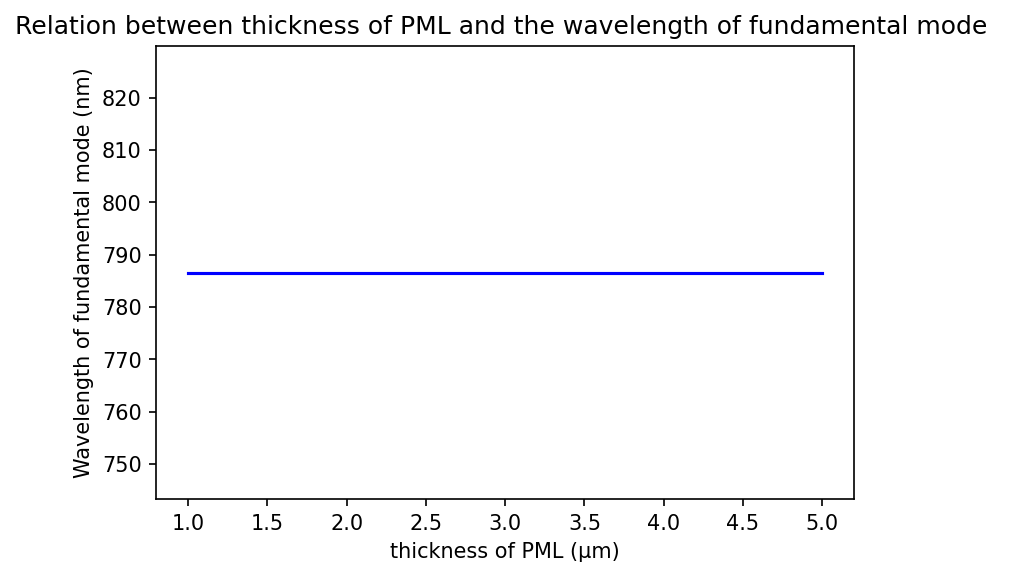

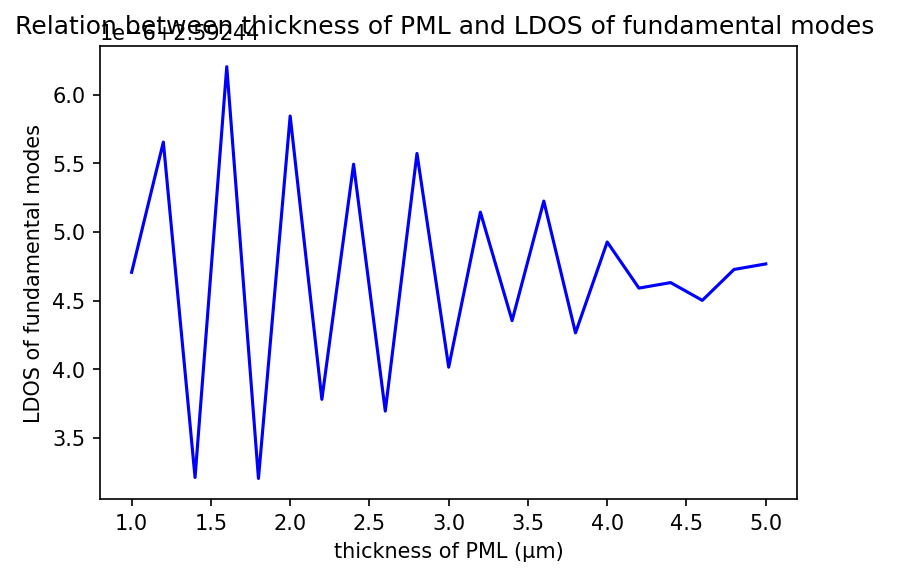

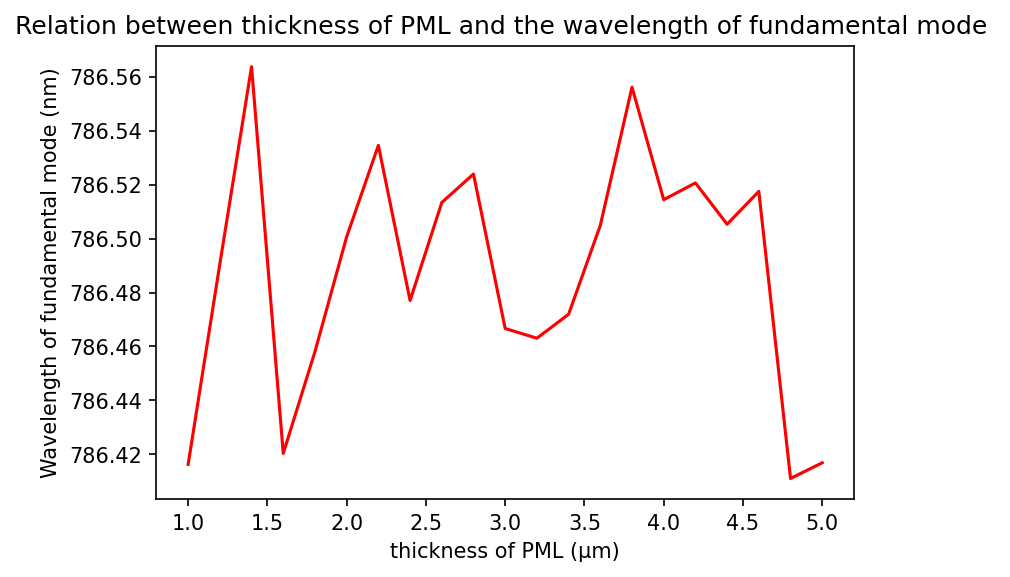

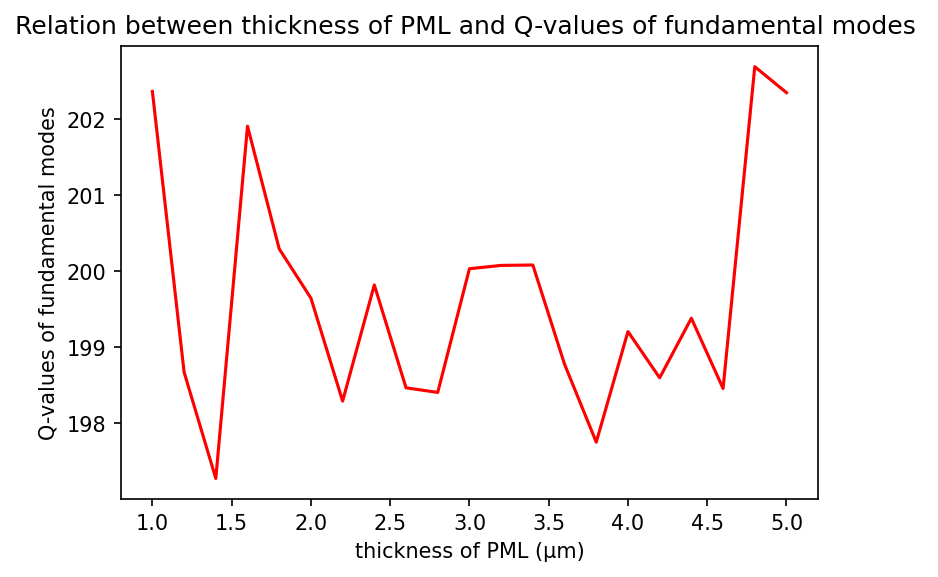

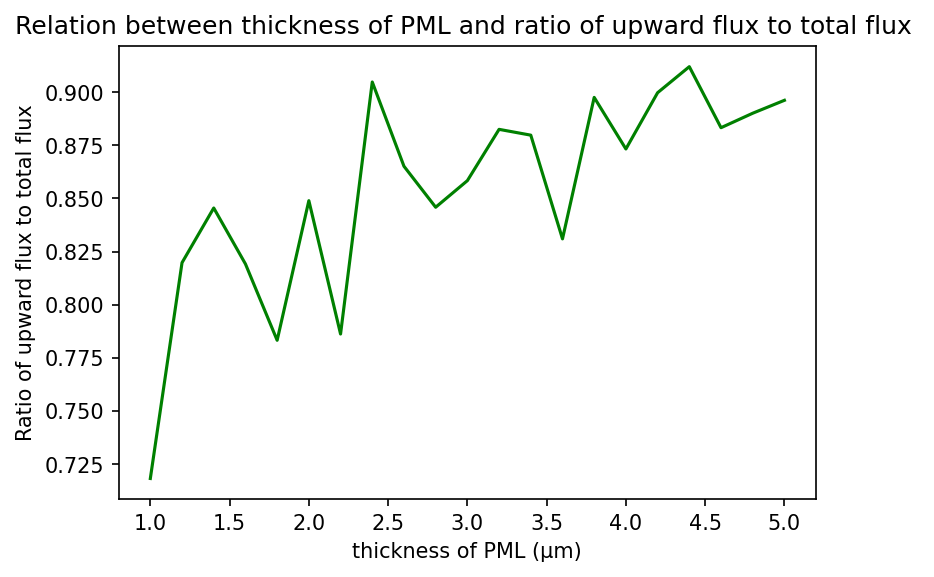

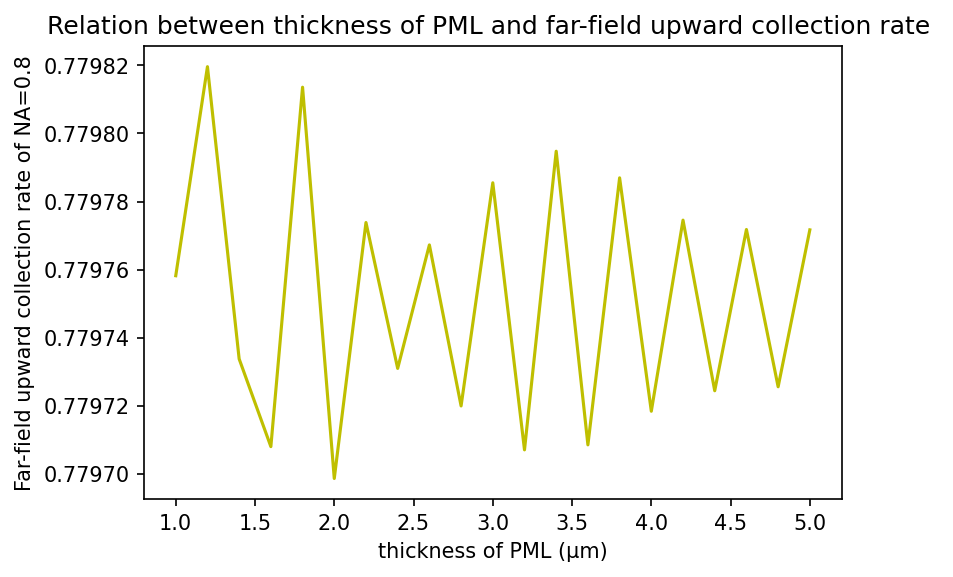

In [51]:
parameter(dpml=True)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000574827 s
Working in Cylindrical dimensions.
Computational cell is 8.53125 x 0 x 8.48438 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric c

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 61 (time=0.476562), 0.0656399 s/step
on time step 134 (time=1.04688), 0.0550826 s/step
on time step 208 (time=1.625), 0.0547948 s/step
on time step 282 (time=2.20312), 0.0543973 s/step
on time step 356 (time=2.78125), 0.0544758 s/step
on time step 429 (time=3.35156), 0.0551539 s/step
on time step 500 (time=3.90625), 0.056557 s/step
on time step 572 (time=4.46875), 0.0559377 s/step
on time step 645 (time=5.03906), 0.0549213 s/step
on time step 718 (time=5.60938), 0.0551929 s/step
on time step 789 (time=6.16406), 0.0569782 s/step
on time step 862 (time=6.73438), 0.0550341 s/step
Meep progress: 6.9765625/65.0 = 10.7% done in 50.0s, 416.0s to go
on time step 935 (time=7.30469), 0.0552978 s/step
on time step 1006 (time=7.85938), 0.05647 s/step
on time step 1079 (time=8.42969), 0.0548162 s/step
on time step 1152 (time=9), 0.0550767 s/step
on time step 1224 (time=9.5625), 0.0560064 s/step
on time step 1291 (time=10.0859), 0.0597056 s/step
on time step 1367 (time=10.6797), 0.05309

Working in Cylindrical dimensions.
Computational cell is 8.53125 x 0 x 8.48438 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 69 (time=0.539062), 0.0585799 s/step
on time step 144 (time=1.125), 0.0539084 s/step
on time step 219 (time=1.71094), 0.0536789 s/step
on time step 292 (time=2.28125), 0.0549245 s/step
on time step 366 (time=2.85938), 0.0544929 s/step
on time step 440 (time=3.4375), 0.0546886 s/step
on time step 514 (time=4.01562), 0.0547422 s/step
on time step 587 (time=4.58594), 0.0547954 s/step
on time step 661 (time=5.16406), 0.0545532 s/step
on time step 735 (time=5.74219), 0.0545649 s/step
on time step 808 (time=6.3125), 0.0550334 s/step
on time step 882 (time=6.89062), 0.0547371 s/step
Meep progress: 7.1171875/65.0 = 10.9% done in 50.0s, 406.7s to go
on time step 955 (time=7.46094), 0.0549221 s/step
on time step 1029 (time=8.03906), 0.0542359 s/step
on time step 1102 (time=8.60938), 0.0548338 s/step
on time step 1176 (time=9.1875), 0.0544132 s/step
on time step 1250 (time=9.76562), 0.0543591 s/step
on time step 1325 (time=10.3516), 0.0540517 s/step
on time step 1398 (time=10.9219), 

          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 0.665845 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susceptibility: frequency=1e-10, gamma=0.0427474
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 64 (time=0.5), 0.063389 s/step
on time step 133 (time=1.03906), 0.0583983 s/step
on time step 201 (time=1.57031), 0.059396 s/step
on time step 269 (time=2.10156), 0.0590797 s/step
on time step 337 (time=2.63281), 0.0588445 s/step
on time step 405 (time=3.16406), 0.0589218 s/step
on time step 473 (time=3.69531), 0.0591461 s/step
on time step 541 (time=4.22656), 0.0591546 s/step
on time step 610 (time=4.76562), 0.0586912 s/step
on time step 677 (time=5.28906), 0.0599945 s/step
on time step 749 (time=5.85156), 0.0562268 s/step
on time step 822 (time=6.42188), 0.0555125 s/step
Meep progress: 6.65625/65.0 = 10.2% done in 50.0s, 438.7s to go
on time step 894 (time=6.98438), 0.0555827 s/step
on time step 966 (time=7.54688), 0.0564727 s/step
on time step 1038 (time=8.10938), 0.0556372 s/step
on time step 1112 (time=8.6875), 0.0546529 s/step
on time step 1184 (time=9.25), 0.0557105 s/step
on time step 1256 (time=9.8125), 0.05577 s/step
on time step 1328 (time=10.375), 0.0556949 s/s

Working in Cylindrical dimensions.
Computational cell is 8.73438 x 0 x 8.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.149

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 64 (time=0.5), 0.0630123 s/step
on time step 133 (time=1.03906), 0.0583152 s/step
on time step 201 (time=1.57031), 0.0595245 s/step
on time step 269 (time=2.10156), 0.0591009 s/step
on time step 338 (time=2.64062), 0.0583232 s/step
on time step 406 (time=3.17188), 0.0588694 s/step
on time step 474 (time=3.70312), 0.0588592 s/step
on time step 543 (time=4.24219), 0.0587789 s/step
on time step 612 (time=4.78125), 0.0580974 s/step
on time step 681 (time=5.32031), 0.0583989 s/step
on time step 748 (time=5.84375), 0.0600517 s/step
on time step 816 (time=6.375), 0.0589547 s/step
Meep progress: 6.6015625/65.0 = 10.2% done in 50.0s, 442.5s to go
on time step 884 (time=6.90625), 0.0592896 s/step
on time step 953 (time=7.44531), 0.0586978 s/step
on time step 1022 (time=7.98438), 0.0586075 s/step
on time step 1091 (time=8.52344), 0.0588001 s/step
on time step 1160 (time=9.0625), 0.0585049 s/step
on time step 1228 (time=9.59375), 0.0588926 s/step
on time step 1297 (time=10.1328), 0.05

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 88 (time=0.6875), 0.0458775 s/step
on time step 180 (time=1.40625), 0.043652 s/step
on time step 273 (time=2.13281), 0.0430604 s/step
on time step 366 (time=2.85938), 0.0433999 s/step
on time step 458 (time=3.57812), 0.0436943 s/step
on time step 551 (time=4.30469), 0.0430138 s/step
on time step 654 (time=5.10938), 0.0391708 s/step
on time step 748 (time=5.84375), 0.0428005 s/step
on time step 841 (time=6.57031), 0.0434355 s/step
on time step 946 (time=7.39062), 0.0381236 s/step
on time step 1040 (time=8.125), 0.042954 s/step
on time step 1133 (time=8.85156), 0.0431098 s/step
Meep progress: 9.171875/65.0 = 14.1% done in 50.0s, 304.6s to go
on time step 1226 (time=9.57812), 0.0430865 s/step
on time step 1319 (time=10.3047), 0.0430551 s/step
on time step 1411 (time=11.0234), 0.0435419 s/step
on time step 1503 (time=11.7422), 0.0435012 s/step
on time step 1595 (time=12.4609), 0.0435217 s/step
on time step 1689 (time=13.1953), 0.0428218 s/step
on time step 1784 (time=13.9375),

Working in Cylindrical dimensions.
Computational cell is 8.9375 x 0 x 9.28125 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 87 (time=0.679688), 0.0462079 s/step
on time step 180 (time=1.40625), 0.0430165 s/step
on time step 278 (time=2.17188), 0.0408532 s/step
on time step 375 (time=2.92969), 0.0414921 s/step
on time step 470 (time=3.67188), 0.0424256 s/step
on time step 564 (time=4.40625), 0.0428423 s/step
on time step 667 (time=5.21094), 0.0389171 s/step
on time step 773 (time=6.03906), 0.0380325 s/step
on time step 880 (time=6.875), 0.037566 s/step
on time step 974 (time=7.60938), 0.042732 s/step
on time step 1069 (time=8.35156), 0.042216 s/step
on time step 1164 (time=9.09375), 0.0425488 s/step
Meep progress: 9.421875/65.0 = 14.5% done in 50.0s, 295.2s to go
on time step 1258 (time=9.82812), 0.0425983 s/step
on time step 1353 (time=10.5703), 0.0425185 s/step
on time step 1450 (time=11.3281), 0.0415968 s/step
on time step 1554 (time=12.1406), 0.0388056 s/step
on time step 1649 (time=12.8828), 0.0424399 s/step
on time step 1756 (time=13.7188), 0.0376281 s/step
on time step 1851 (time=14.4609)

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 81 (time=0.632812), 0.0495968 s/step
on time step 170 (time=1.32812), 0.0452408 s/step
on time step 265 (time=2.07031), 0.0423387 s/step
on time step 358 (time=2.79688), 0.043096 s/step
on time step 446 (time=3.48438), 0.0457951 s/step
on time step 533 (time=4.16406), 0.0463783 s/step
on time step 619 (time=4.83594), 0.0465162 s/step
on time step 707 (time=5.52344), 0.0457749 s/step
on time step 794 (time=6.20312), 0.0460786 s/step
on time step 880 (time=6.875), 0.046552 s/step
on time step 967 (time=7.55469), 0.0460792 s/step
on time step 1056 (time=8.25), 0.0454135 s/step
Meep progress: 8.546875/65.0 = 13.1% done in 50.0s, 330.3s to go
on time step 1142 (time=8.92188), 0.0465925 s/step
on time step 1229 (time=9.60156), 0.0461883 s/step
on time step 1316 (time=10.2812), 0.0463399 s/step
on time step 1404 (time=10.9688), 0.0456997 s/step
on time step 1491 (time=11.6484), 0.0463076 s/step
on time step 1578 (time=12.3281), 0.0461862 s/step
on time step 1665 (time=13.0078), 0

Working in Cylindrical dimensions.
Computational cell is 9.14062 x 0 x 9.67188 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 54 (time=0.421875), 0.0749751 s/step
on time step 112 (time=0.875), 0.0701647 s/step
on time step 170 (time=1.32812), 0.0692033 s/step
on time step 227 (time=1.77344), 0.0711821 s/step
on time step 285 (time=2.22656), 0.0697271 s/step
on time step 344 (time=2.6875), 0.0684719 s/step
on time step 405 (time=3.16406), 0.0659 s/step
on time step 466 (time=3.64062), 0.0662347 s/step
on time step 524 (time=4.09375), 0.0698089 s/step
on time step 585 (time=4.57031), 0.0665917 s/step
on time step 645 (time=5.03906), 0.0671033 s/step
on time step 705 (time=5.50781), 0.06698 s/step
Meep progress: 5.6875/65.0 = 8.8% done in 50.0s, 521.7s to go
on time step 766 (time=5.98438), 0.0662236 s/step
on time step 827 (time=6.46094), 0.0664276 s/step
on time step 888 (time=6.9375), 0.0657261 s/step
on time step 949 (time=7.41406), 0.0662161 s/step
on time step 1011 (time=7.89844), 0.0651835 s/step
on time step 1073 (time=8.38281), 0.0655109 s/step
on time step 1134 (time=8.85938), 0.0660475 s

          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, cent

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 48 (time=0.375), 0.0841095 s/step
on time step 101 (time=0.789062), 0.0761335 s/step
on time step 155 (time=1.21094), 0.0749454 s/step
on time step 209 (time=1.63281), 0.0754088 s/step
on time step 264 (time=2.0625), 0.0740703 s/step
on time step 318 (time=2.48438), 0.0752258 s/step
on time step 371 (time=2.89844), 0.0755676 s/step
on time step 425 (time=3.32031), 0.0745314 s/step
on time step 479 (time=3.74219), 0.0752214 s/step
on time step 533 (time=4.16406), 0.0746149 s/step
on time step 586 (time=4.57812), 0.0760198 s/step
on time step 640 (time=5), 0.0750889 s/step
Meep progress: 5.15625/65.0 = 7.9% done in 50.1s, 581.0s to go
on time step 694 (time=5.42188), 0.0753615 s/step
on time step 748 (time=5.84375), 0.0752161 s/step
on time step 801 (time=6.25781), 0.0758718 s/step
on time step 855 (time=6.67969), 0.0753615 s/step
on time step 909 (time=7.10156), 0.0749909 s/step
on time step 962 (time=7.51562), 0.0764928 s/step
on time step 1016 (time=7.9375), 0.0750977 s/s

Meep progress: 61.5078125/65.0 = 94.6% done in 600.5s, 34.1s to go
on time step 7891 (time=61.6484), 0.0780862 s/step
on time step 7946 (time=62.0781), 0.0728872 s/step
on time step 7996 (time=62.4688), 0.0800144 s/step
on time step 8048 (time=62.875), 0.0775132 s/step
on time step 8104 (time=63.3125), 0.0718182 s/step
on time step 8160 (time=63.75), 0.0722126 s/step
on time step 8217 (time=64.1953), 0.0710903 s/step
on time step 8272 (time=64.625), 0.074015 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 1.1102143231827888, 0.0013725377295019548, -404.43854450021064, 5.346817174498164e-05, -4.1306450031922915e-05-3.395029566161551e-05i, 0.0002354741590658418+0.0i
harminv0:, 1.268256604057065, 0.007911127718816269, -80.15649911962441, 0.0014177465364096271, -0.001005926263051492-0.0009990583540538337i, 1.4835712126264293e-05+0.0i
harminv0:, 1.271419990965189, -0.0032063508742454076, 198.26588555508744, 0.07210389588153444, 0.07024691333359684-0.016258627

Working in Cylindrical dimensions.
Computational cell is 9.34375 x 0 x 10.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 50 (time=0.390625), 0.0808744 s/step
on time step 103 (time=0.804688), 0.0756077 s/step
on time step 157 (time=1.22656), 0.0744295 s/step
on time step 212 (time=1.65625), 0.0741039 s/step
on time step 267 (time=2.08594), 0.0740028 s/step
on time step 318 (time=2.48438), 0.0791384 s/step
on time step 371 (time=2.89844), 0.0759133 s/step
on time step 425 (time=3.32031), 0.0742214 s/step
on time step 481 (time=3.75781), 0.0723793 s/step
on time step 538 (time=4.20312), 0.071294 s/step
on time step 595 (time=4.64844), 0.0704124 s/step
on time step 652 (time=5.09375), 0.0707272 s/step
Meep progress: 5.265625/65.0 = 8.1% done in 50.0s, 567.4s to go
on time step 709 (time=5.53906), 0.0713178 s/step
on time step 766 (time=5.98438), 0.0708258 s/step
on time step 823 (time=6.42969), 0.0702672 s/step
on time step 881 (time=6.88281), 0.0701184 s/step
on time step 938 (time=7.32812), 0.0714068 s/step
on time step 995 (time=7.77344), 0.0709124 s/step
on time step 1052 (time=8.21875), 0.

Meep progress: 62.890625/65.0 = 96.8% done in 600.4s, 20.1s to go
on time step 8069 (time=63.0391), 0.0744355 s/step
on time step 8119 (time=63.4297), 0.0807723 s/step
on time step 8164 (time=63.7812), 0.0908944 s/step
on time step 8211 (time=64.1484), 0.0873582 s/step
on time step 8255 (time=64.4922), 0.0912541 s/step
on time step 8296 (time=64.8125), 0.099218 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0006001 s
Working in Cylindrical dimensions.
Computational cell is 9.53125 x 0 x 10.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 40 (time=0.3125), 0.101349 s/step
on time step 83 (time=0.648438), 0.0930922 s/step
on time step 126 (time=0.984375), 0.093212 s/step
on time step 170 (time=1.32812), 0.0924926 s/step
on time step 214 (time=1.67188), 0.0915167 s/step
on time step 258 (time=2.01562), 0.0921751 s/step
on time step 302 (time=2.35938), 0.0922991 s/step
on time step 346 (time=2.70312), 0.0923082 s/step
on time step 389 (time=3.03906), 0.0932144 s/step
on time step 428 (time=3.34375), 0.104583 s/step
on time step 473 (time=3.69531), 0.0894714 s/step
on time step 520 (time=4.0625), 0.0851439 s/step
Meep progress: 4.2109375/65.0 = 6.5% done in 50.1s, 723.1s to go
on time step 568 (time=4.4375), 0.0843857 s/step
on time step 617 (time=4.82031), 0.0823583 s/step
on time step 662 (time=5.17188), 0.0892171 s/step
on time step 708 (time=5.53125), 0.0873498 s/step
on time step 755 (time=5.89844), 0.0860755 s/step
on time step 804 (time=6.28125), 0.0820184 s/step
on time step 851 (time=6.64844), 0.086232

on time step 6125 (time=47.8516), 0.100707 s/step
on time step 6165 (time=48.1641), 0.1011 s/step
on time step 6206 (time=48.4844), 0.0996937 s/step
on time step 6247 (time=48.8047), 0.0997313 s/step
on time step 6288 (time=49.125), 0.098057 s/step
on time step 6328 (time=49.4375), 0.100586 s/step
on time step 6369 (time=49.7578), 0.0997602 s/step
on time step 6410 (time=50.0781), 0.099429 s/step
on time step 6450 (time=50.3906), 0.100387 s/step
on time step 6491 (time=50.7109), 0.0998402 s/step
on time step 6532 (time=51.0312), 0.0989814 s/step
on time step 6574 (time=51.3594), 0.097084 s/step
Meep progress: 51.5390625/65.0 = 79.3% done in 650.6s, 169.9s to go
on time step 6616 (time=51.6875), 0.0959231 s/step
on time step 6657 (time=52.0078), 0.0991401 s/step
on time step 6699 (time=52.3359), 0.0976452 s/step
on time step 6740 (time=52.6562), 0.0993865 s/step
on time step 6782 (time=52.9844), 0.097131 s/step
on time step 6823 (time=53.3047), 0.0995078 s/step
on time step 6864 (time=5

Working in Cylindrical dimensions.
Computational cell is 9.53125 x 0 x 10.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 44 (time=0.34375), 0.0919762 s/step
on time step 93 (time=0.726562), 0.0819011 s/step
on time step 142 (time=1.10938), 0.0818282 s/step
on time step 191 (time=1.49219), 0.0821382 s/step
on time step 240 (time=1.875), 0.0831643 s/step
on time step 289 (time=2.25781), 0.0819963 s/step
on time step 338 (time=2.64062), 0.0823891 s/step
on time step 387 (time=3.02344), 0.0824001 s/step
on time step 435 (time=3.39844), 0.084115 s/step
on time step 484 (time=3.78125), 0.082585 s/step
on time step 533 (time=4.16406), 0.0825175 s/step
on time step 582 (time=4.54688), 0.0825716 s/step
Meep progress: 4.6953125/65.0 = 7.2% done in 50.1s, 643.1s to go
on time step 630 (time=4.92188), 0.0841103 s/step
on time step 679 (time=5.30469), 0.0831514 s/step
on time step 728 (time=5.6875), 0.0825717 s/step
on time step 776 (time=6.0625), 0.0845796 s/step
on time step 825 (time=6.44531), 0.0823908 s/step
on time step 874 (time=6.82812), 0.0832982 s/step
on time step 922 (time=7.20312), 0.0847496

Meep progress: 57.3046875/65.0 = 88.2% done in 600.5s, 80.6s to go
on time step 7371 (time=57.5859), 0.0536903 s/step
on time step 7444 (time=58.1562), 0.0550432 s/step
on time step 7515 (time=58.7109), 0.0566988 s/step
on time step 7586 (time=59.2656), 0.0564904 s/step
on time step 7660 (time=59.8438), 0.0546453 s/step
on time step 7732 (time=60.4062), 0.0560697 s/step
on time step 7803 (time=60.9609), 0.05678 s/step
on time step 7874 (time=61.5156), 0.0568387 s/step
on time step 7945 (time=62.0703), 0.0567463 s/step
on time step 8016 (time=62.625), 0.0564145 s/step
on time step 8086 (time=63.1719), 0.0577383 s/step
on time step 8156 (time=63.7188), 0.0574058 s/step
Meep progress: 64.234375/65.0 = 98.8% done in 650.5s, 7.8s to go
on time step 8227 (time=64.2734), 0.0567636 s/step
on time step 8298 (time=64.8281), 0.0570596 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000463009 s
Working in Cylindrical dimens

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 61 (time=0.476562), 0.0655795 s/step
on time step 126 (time=0.984375), 0.0621031 s/step
on time step 192 (time=1.5), 0.0614843 s/step
on time step 255 (time=1.99219), 0.0637186 s/step
on time step 320 (time=2.5), 0.0622998 s/step
on time step 385 (time=3.00781), 0.0617543 s/step
on time step 448 (time=3.5), 0.0638037 s/step
on time step 512 (time=4), 0.0629547 s/step
on time step 577 (time=4.50781), 0.0624491 s/step
on time step 643 (time=5.02344), 0.0609788 s/step
on time step 710 (time=5.54688), 0.0601166 s/step
on time step 779 (time=6.08594), 0.0584935 s/step
Meep progress: 6.265625/65.0 = 9.6% done in 50.1s, 469.5s to go
on time step 829 (time=6.47656), 0.0809591 s/step
on time step 876 (time=6.84375), 0.0861406 s/step
on time step 923 (time=7.21094), 0.0863668 s/step
on time step 970 (time=7.57812), 0.0867213 s/step
on time step 1017 (time=7.94531), 0.0868964 s/step
on time step 1064 (time=8.3125), 0.08605 s/step
on time step 1111 (time=8.67969), 0.0860382 s/step
on 

Meep progress: 55.421875/65.0 = 85.3% done in 600.7s, 103.8s to go
on time step 7114 (time=55.5781), 0.0873057 s/step
on time step 7160 (time=55.9375), 0.0878791 s/step
on time step 7206 (time=56.2969), 0.0877741 s/step
on time step 7252 (time=56.6562), 0.0874958 s/step
on time step 7298 (time=57.0156), 0.0875407 s/step
on time step 7343 (time=57.3672), 0.0897581 s/step
on time step 7389 (time=57.7266), 0.0878575 s/step
on time step 7435 (time=58.0859), 0.0873474 s/step
on time step 7481 (time=58.4453), 0.088042 s/step
on time step 7527 (time=58.8047), 0.0879955 s/step
on time step 7573 (time=59.1641), 0.087773 s/step
on time step 7619 (time=59.5234), 0.0878214 s/step
Meep progress: 59.8671875/65.0 = 92.1% done in 650.8s, 55.8s to go
on time step 7665 (time=59.8828), 0.0884964 s/step
on time step 7712 (time=60.25), 0.0867813 s/step
on time step 7758 (time=60.6094), 0.0878645 s/step
on time step 7804 (time=60.9688), 0.0885547 s/step
on time step 7849 (time=61.3203), 0.0893366 s/step
on 

Working in Cylindrical dimensions.
Computational cell is 9.73438 x 0 x 10.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 42 (time=0.328125), 0.0958689 s/step
on time step 89 (time=0.695312), 0.0859639 s/step
on time step 135 (time=1.05469), 0.086957 s/step
on time step 181 (time=1.41406), 0.0878644 s/step
on time step 228 (time=1.78125), 0.0867897 s/step
on time step 275 (time=2.14844), 0.0861588 s/step
on time step 322 (time=2.51562), 0.0865019 s/step
on time step 368 (time=2.875), 0.0872586 s/step
on time step 414 (time=3.23438), 0.0872184 s/step
on time step 460 (time=3.59375), 0.087253 s/step
on time step 506 (time=3.95312), 0.0888037 s/step
on time step 552 (time=4.3125), 0.0873773 s/step
Meep progress: 4.453125/65.0 = 6.9% done in 50.0s, 680.2s to go
on time step 598 (time=4.67188), 0.0873575 s/step
on time step 644 (time=5.03125), 0.0876307 s/step
on time step 690 (time=5.39062), 0.0876832 s/step
on time step 736 (time=5.75), 0.0870727 s/step
on time step 782 (time=6.10938), 0.0870085 s/step
on time step 828 (time=6.46875), 0.0871033 s/step
on time step 874 (time=6.82812), 0.0883542 s

Meep progress: 54.2578125/65.0 = 83.5% done in 600.5s, 118.9s to go
on time step 6964 (time=54.4062), 0.0829865 s/step
on time step 7013 (time=54.7891), 0.0819683 s/step
on time step 7062 (time=55.1719), 0.0821871 s/step
on time step 7111 (time=55.5547), 0.0829223 s/step
on time step 7160 (time=55.9375), 0.0828086 s/step
on time step 7209 (time=56.3203), 0.0822492 s/step
on time step 7258 (time=56.7031), 0.0820383 s/step
on time step 7307 (time=57.0859), 0.0823029 s/step
on time step 7355 (time=57.4609), 0.0838471 s/step
on time step 7404 (time=57.8438), 0.0829346 s/step
on time step 7453 (time=58.2266), 0.0820966 s/step
on time step 7502 (time=58.6094), 0.0832742 s/step
Meep progress: 58.9921875/65.0 = 90.8% done in 650.5s, 66.2s to go
on time step 7551 (time=58.9922), 0.0821239 s/step
on time step 7600 (time=59.375), 0.0819306 s/step
on time step 7649 (time=59.7578), 0.0818184 s/step
on time step 7697 (time=60.1328), 0.0848765 s/step
on time step 7743 (time=60.4922), 0.0884823 s/step

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 38 (time=0.296875), 0.105604 s/step
on time step 82 (time=0.640625), 0.0920321 s/step
on time step 127 (time=0.992188), 0.0904829 s/step
on time step 171 (time=1.33594), 0.092156 s/step
on time step 215 (time=1.67969), 0.0922302 s/step
on time step 259 (time=2.02344), 0.091108 s/step
on time step 303 (time=2.36719), 0.0918774 s/step
on time step 347 (time=2.71094), 0.0920494 s/step
on time step 391 (time=3.05469), 0.0913971 s/step
on time step 435 (time=3.39844), 0.0915225 s/step
on time step 479 (time=3.74219), 0.0920621 s/step
on time step 523 (time=4.08594), 0.0928454 s/step
Meep progress: 4.2109375/65.0 = 6.5% done in 50.0s, 721.9s to go
on time step 567 (time=4.42969), 0.091687 s/step
on time step 610 (time=4.76562), 0.093174 s/step
on time step 654 (time=5.10938), 0.0928241 s/step
on time step 696 (time=5.4375), 0.095267 s/step
on time step 740 (time=5.78125), 0.0917759 s/step
on time step 784 (time=6.125), 0.0921147 s/step
on time step 827 (time=6.46094), 0.093555 s

Meep progress: 55.109375/65.0 = 84.8% done in 600.5s, 107.8s to go
on time step 7089 (time=55.3828), 0.0686022 s/step
on time step 7150 (time=55.8594), 0.0660328 s/step
on time step 7212 (time=56.3438), 0.065463 s/step
on time step 7274 (time=56.8281), 0.0654711 s/step
on time step 7339 (time=57.3359), 0.0621872 s/step
on time step 7402 (time=57.8281), 0.0641144 s/step
on time step 7466 (time=58.3281), 0.0632285 s/step
on time step 7528 (time=58.8125), 0.0654963 s/step
on time step 7588 (time=59.2812), 0.0668575 s/step
on time step 7647 (time=59.7422), 0.0682509 s/step
on time step 7709 (time=60.2266), 0.06506 s/step
on time step 7768 (time=60.6875), 0.0679799 s/step
Meep progress: 61.0625/65.0 = 93.9% done in 650.5s, 41.9s to go
on time step 7830 (time=61.1719), 0.0649943 s/step
on time step 7894 (time=61.6719), 0.0631297 s/step
on time step 7960 (time=62.1875), 0.0614726 s/step
on time step 8027 (time=62.7109), 0.0601867 s/step
on time step 8093 (time=63.2266), 0.0608333 s/step
on ti

Working in Cylindrical dimensions.
Computational cell is 9.9375 x 0 x 11.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 57 (time=0.445312), 0.070949 s/step
on time step 118 (time=0.921875), 0.0666191 s/step
on time step 181 (time=1.41406), 0.0640041 s/step
on time step 241 (time=1.88281), 0.0672495 s/step
on time step 305 (time=2.38281), 0.0631125 s/step
on time step 366 (time=2.85938), 0.0661634 s/step
on time step 433 (time=3.38281), 0.0599036 s/step
on time step 500 (time=3.90625), 0.0598242 s/step
on time step 570 (time=4.45312), 0.0572913 s/step
on time step 634 (time=4.95312), 0.0636231 s/step
on time step 696 (time=5.4375), 0.0650201 s/step
on time step 759 (time=5.92969), 0.0644598 s/step
Meep progress: 6.1171875/65.0 = 9.4% done in 50.0s, 481.6s to go
on time step 821 (time=6.41406), 0.0653401 s/step
on time step 882 (time=6.89062), 0.0664051 s/step
on time step 952 (time=7.4375), 0.0577724 s/step
on time step 1023 (time=7.99219), 0.0567789 s/step
on time step 1086 (time=8.48438), 0.0644502 s/step
on time step 1148 (time=8.96875), 0.0646547 s/step
on time step 1209 (time=9.44531), 

Meep progress: 60.328125/65.0 = 92.8% done in 600.6s, 46.5s to go
on time step 7740 (time=60.4688), 0.0942652 s/step
on time step 7783 (time=60.8047), 0.0934337 s/step
on time step 7826 (time=61.1406), 0.0931918 s/step
on time step 7869 (time=61.4766), 0.0932678 s/step
on time step 7915 (time=61.8359), 0.0880958 s/step
on time step 7961 (time=62.1953), 0.0887655 s/step
on time step 8006 (time=62.5469), 0.0899833 s/step
on time step 8052 (time=62.9062), 0.0882465 s/step
on time step 8098 (time=63.2656), 0.088076 s/step
on time step 8144 (time=63.625), 0.0886495 s/step
on time step 8190 (time=63.9844), 0.0885925 s/step
on time step 8236 (time=64.3438), 0.0880916 s/step
Meep progress: 64.6796875/65.0 = 99.5% done in 650.6s, 3.2s to go
on time step 8282 (time=64.7031), 0.0880711 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000466824 s
Working in Cylindrical dimensions.
Computational cell is 10.1406 x 0 x 11.6719 

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 39 (time=0.304688), 0.103621 s/step
on time step 82 (time=0.640625), 0.0940685 s/step
on time step 125 (time=0.976562), 0.094074 s/step
on time step 168 (time=1.3125), 0.0950985 s/step
on time step 211 (time=1.64844), 0.0941871 s/step
on time step 254 (time=1.98438), 0.0940739 s/step
on time step 297 (time=2.32031), 0.0944687 s/step
on time step 339 (time=2.64844), 0.0958647 s/step
on time step 381 (time=2.97656), 0.0953281 s/step
on time step 424 (time=3.3125), 0.0948185 s/step
on time step 466 (time=3.64062), 0.0954347 s/step
on time step 509 (time=3.97656), 0.0947778 s/step
Meep progress: 4.09375/65.0 = 6.3% done in 50.0s, 744.1s to go
on time step 552 (time=4.3125), 0.094832 s/step
on time step 595 (time=4.64844), 0.0943779 s/step
on time step 638 (time=4.98438), 0.0952597 s/step
on time step 680 (time=5.3125), 0.095713 s/step
on time step 719 (time=5.61719), 0.102638 s/step
on time step 759 (time=5.92969), 0.10268 s/step
on time step 799 (time=6.24219), 0.101677 s/ste

on time step 6155 (time=48.0859), 0.0996329 s/step
on time step 6195 (time=48.3984), 0.100768 s/step
on time step 6235 (time=48.7109), 0.100017 s/step
on time step 6275 (time=49.0234), 0.100919 s/step
on time step 6315 (time=49.3359), 0.100561 s/step
on time step 6355 (time=49.6484), 0.101557 s/step
on time step 6394 (time=49.9531), 0.102905 s/step
on time step 6434 (time=50.2656), 0.100321 s/step
on time step 6474 (time=50.5781), 0.101263 s/step
on time step 6514 (time=50.8906), 0.100953 s/step
on time step 6554 (time=51.2031), 0.100433 s/step
Meep progress: 51.4453125/65.0 = 79.1% done in 650.5s, 171.4s to go
on time step 6594 (time=51.5156), 0.100294 s/step
on time step 6635 (time=51.8359), 0.0998504 s/step
on time step 6675 (time=52.1484), 0.100621 s/step
on time step 6715 (time=52.4609), 0.101017 s/step
on time step 6756 (time=52.7812), 0.0997036 s/step
on time step 6796 (time=53.0938), 0.101024 s/step
on time step 6836 (time=53.4062), 0.100362 s/step
on time step 6876 (time=53.71

Working in Cylindrical dimensions.
Computational cell is 10.1406 x 0 x 11.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 37 (time=0.289062), 0.110033 s/step
on time step 78 (time=0.609375), 0.0982711 s/step
on time step 119 (time=0.929688), 0.0984176 s/step
on time step 160 (time=1.25), 0.098186 s/step
on time step 201 (time=1.57031), 0.0985447 s/step
on time step 242 (time=1.89062), 0.0989927 s/step
on time step 283 (time=2.21094), 0.0990002 s/step
on time step 324 (time=2.53125), 0.0980226 s/step
on time step 365 (time=2.85156), 0.0985776 s/step
on time step 406 (time=3.17188), 0.0989801 s/step
on time step 446 (time=3.48438), 0.100627 s/step
on time step 487 (time=3.80469), 0.098634 s/step
Meep progress: 3.921875/65.0 = 6.0% done in 50.0s, 778.8s to go
on time step 528 (time=4.125), 0.0991307 s/step
on time step 569 (time=4.44531), 0.0993388 s/step
on time step 610 (time=4.76562), 0.0995769 s/step
on time step 651 (time=5.08594), 0.0992747 s/step
on time step 692 (time=5.40625), 0.0988951 s/step
on time step 733 (time=5.72656), 0.0996221 s/step
on time step 774 (time=6.04688), 0.098948 s/

on time step 6112 (time=47.75), 0.0998348 s/step
on time step 6152 (time=48.0625), 0.100545 s/step
on time step 6192 (time=48.375), 0.100181 s/step
on time step 6233 (time=48.6953), 0.0998112 s/step
on time step 6274 (time=49.0156), 0.0997852 s/step
on time step 6314 (time=49.3281), 0.100447 s/step
on time step 6354 (time=49.6406), 0.100329 s/step
on time step 6394 (time=49.9531), 0.100381 s/step
on time step 6435 (time=50.2734), 0.0996338 s/step
on time step 6476 (time=50.5938), 0.0992397 s/step
on time step 6516 (time=50.9062), 0.100743 s/step
on time step 6557 (time=51.2266), 0.0999413 s/step
Meep progress: 51.40625/65.0 = 79.1% done in 650.7s, 172.1s to go
on time step 6598 (time=51.5469), 0.0993369 s/step
on time step 6639 (time=51.8672), 0.0997166 s/step
on time step 6679 (time=52.1797), 0.100661 s/step
on time step 6720 (time=52.5), 0.0998591 s/step
on time step 6761 (time=52.8203), 0.0992596 s/step
on time step 6802 (time=53.1406), 0.0999188 s/step
on time step 6842 (time=53.45

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 34 (time=0.265625), 0.117788 s/step
on time step 73 (time=0.570312), 0.104737 s/step
on time step 111 (time=0.867188), 0.105487 s/step
on time step 149 (time=1.16406), 0.106111 s/step
on time step 188 (time=1.46875), 0.105012 s/step
on time step 227 (time=1.77344), 0.10476 s/step
on time step 265 (time=2.07031), 0.106775 s/step
on time step 304 (time=2.375), 0.105274 s/step
on time step 342 (time=2.67188), 0.10579 s/step
on time step 380 (time=2.96875), 0.1061 s/step
on time step 418 (time=3.26562), 0.106058 s/step
on time step 457 (time=3.57031), 0.105118 s/step
Meep progress: 3.671875/65.0 = 5.6% done in 50.1s, 836.1s to go
on time step 495 (time=3.86719), 0.107014 s/step
on time step 532 (time=4.15625), 0.108225 s/step
on time step 570 (time=4.45312), 0.105924 s/step
on time step 608 (time=4.75), 0.105866 s/step
on time step 647 (time=5.05469), 0.104992 s/step
on time step 685 (time=5.35156), 0.106485 s/step
on time step 723 (time=5.64844), 0.105718 s/step
on time step 

on time step 5227 (time=40.8359), 0.115504 s/step
on time step 5262 (time=41.1094), 0.115726 s/step
on time step 5299 (time=41.3984), 0.110886 s/step
on time step 5334 (time=41.6719), 0.114461 s/step
on time step 5368 (time=41.9375), 0.118547 s/step
on time step 5402 (time=42.2031), 0.118178 s/step
on time step 5437 (time=42.4766), 0.114857 s/step
on time step 5465 (time=42.6953), 0.143316 s/step
on time step 5500 (time=42.9688), 0.114719 s/step
on time step 5536 (time=43.25), 0.113335 s/step
Meep progress: 43.328125/65.0 = 66.7% done in 650.7s, 325.5s to go
on time step 5571 (time=43.5234), 0.117407 s/step
on time step 5605 (time=43.7891), 0.120514 s/step
on time step 5641 (time=44.0703), 0.11252 s/step
on time step 5677 (time=44.3516), 0.111963 s/step
on time step 5712 (time=44.625), 0.115981 s/step
on time step 5747 (time=44.8984), 0.115553 s/step
on time step 5781 (time=45.1641), 0.117968 s/step
on time step 5817 (time=45.4453), 0.114386 s/step
on time step 5852 (time=45.7188), 0.1

Working in Cylindrical dimensions.
Computational cell is 10.3438 x 0 x 12.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 49 (time=0.382812), 0.0817551 s/step
on time step 105 (time=0.820312), 0.0723429 s/step
on time step 161 (time=1.25781), 0.0714574 s/step
on time step 217 (time=1.69531), 0.0715222 s/step
on time step 274 (time=2.14062), 0.0706197 s/step
on time step 329 (time=2.57031), 0.0735779 s/step
on time step 383 (time=2.99219), 0.0751022 s/step
on time step 436 (time=3.40625), 0.0755049 s/step
on time step 489 (time=3.82031), 0.0762768 s/step
on time step 540 (time=4.21875), 0.0798249 s/step
on time step 591 (time=4.61719), 0.0800867 s/step
on time step 641 (time=5.00781), 0.0803689 s/step
Meep progress: 5.15625/65.0 = 7.9% done in 50.0s, 580.3s to go
on time step 691 (time=5.39844), 0.0804619 s/step
on time step 744 (time=5.8125), 0.0756799 s/step
on time step 795 (time=6.21094), 0.0799467 s/step
on time step 846 (time=6.60938), 0.0799629 s/step
on time step 897 (time=7.00781), 0.0789813 s/step
on time step 957 (time=7.47656), 0.0668225 s/step
on time step 1011 (time=7.89844), 0.0

on time step 6382 (time=49.8594), 0.105126 s/step
on time step 6421 (time=50.1641), 0.10267 s/step
on time step 6460 (time=50.4688), 0.104459 s/step
on time step 6498 (time=50.7656), 0.106537 s/step
on time step 6535 (time=51.0547), 0.108342 s/step
on time step 6573 (time=51.3516), 0.107058 s/step
on time step 6611 (time=51.6484), 0.106895 s/step
on time step 6649 (time=51.9453), 0.107678 s/step
on time step 6687 (time=52.2422), 0.107696 s/step
on time step 6725 (time=52.5391), 0.106303 s/step
on time step 6763 (time=52.8359), 0.106665 s/step
on time step 6800 (time=53.125), 0.109003 s/step
Meep progress: 53.2734375/65.0 = 82.0% done in 650.4s, 143.2s to go
on time step 6837 (time=53.4141), 0.108469 s/step
on time step 6875 (time=53.7109), 0.10613 s/step
on time step 6913 (time=54.0078), 0.107221 s/step
on time step 6951 (time=54.3047), 0.106773 s/step
on time step 6989 (time=54.6016), 0.106374 s/step
on time step 7026 (time=54.8906), 0.108155 s/step
on time step 7064 (time=55.1875), 0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 31 (time=0.242188), 0.132231 s/step
on time step 67 (time=0.523438), 0.112547 s/step
on time step 103 (time=0.804688), 0.111647 s/step
on time step 140 (time=1.09375), 0.111079 s/step
on time step 176 (time=1.375), 0.112452 s/step
on time step 212 (time=1.65625), 0.113597 s/step
on time step 248 (time=1.9375), 0.111359 s/step
on time step 284 (time=2.21875), 0.111906 s/step
on time step 320 (time=2.5), 0.111344 s/step
on time step 356 (time=2.78125), 0.113838 s/step
on time step 392 (time=3.0625), 0.112247 s/step
on time step 428 (time=3.34375), 0.111909 s/step
Meep progress: 3.4453125/65.0 = 5.3% done in 50.1s, 895.3s to go
on time step 464 (time=3.625), 0.114141 s/step
on time step 500 (time=3.90625), 0.113659 s/step
on time step 536 (time=4.1875), 0.113657 s/step
on time step 572 (time=4.46875), 0.112096 s/step
on time step 608 (time=4.75), 0.112944 s/step
on time step 644 (time=5.03125), 0.112299 s/step
on time step 680 (time=5.3125), 0.112584 s/step
on time step 716 (

on time step 5391 (time=42.1172), 0.112916 s/step
on time step 5427 (time=42.3984), 0.112839 s/step
on time step 5462 (time=42.6719), 0.11429 s/step
on time step 5497 (time=42.9453), 0.114699 s/step
on time step 5533 (time=43.2266), 0.113182 s/step
on time step 5569 (time=43.5078), 0.113972 s/step
on time step 5605 (time=43.7891), 0.114234 s/step
on time step 5640 (time=44.0625), 0.114764 s/step
on time step 5676 (time=44.3438), 0.112823 s/step
on time step 5712 (time=44.625), 0.113466 s/step
Meep progress: 44.6796875/65.0 = 68.7% done in 650.8s, 296.0s to go
on time step 5747 (time=44.8984), 0.115161 s/step
on time step 5783 (time=45.1797), 0.113402 s/step
on time step 5819 (time=45.4609), 0.114301 s/step
on time step 5855 (time=45.7422), 0.114038 s/step
on time step 5891 (time=46.0234), 0.113496 s/step
on time step 5921 (time=46.2578), 0.133908 s/step
on time step 5952 (time=46.5), 0.129645 s/step
on time step 5986 (time=46.7656), 0.120823 s/step
on time step 6021 (time=47.0391), 0.1

Working in Cylindrical dimensions.
Computational cell is 10.5312 x 0 x 12.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0858101 s/step
on time step 85 (time=0.664062), 0.107427 s/step
on time step 118 (time=0.921875), 0.123906 s/step
on time step 152 (time=1.1875), 0.119909 s/step
on time step 186 (time=1.45312), 0.12103 s/step
on time step 219 (time=1.71094), 0.121455 s/step
on time step 255 (time=1.99219), 0.111587 s/step
on time step 292 (time=2.28125), 0.109932 s/step
on time step 329 (time=2.57031), 0.109815 s/step
on time step 366 (time=2.85938), 0.10908 s/step
on time step 403 (time=3.14844), 0.111223 s/step
on time step 439 (time=3.42969), 0.111901 s/step
Meep progress: 3.5234375/65.0 = 5.4% done in 50.1s, 873.7s to go
on time step 476 (time=3.71875), 0.110941 s/step
on time step 513 (time=4.00781), 0.110649 s/step
on time step 549 (time=4.28906), 0.112142 s/step
on time step 585 (time=4.57031), 0.111137 s/step
on time step 621 (time=4.85156), 0.111555 s/step
on time step 658 (time=5.14062), 0.111198 s/step
on time step 694 (time=5.42188), 0.111623 s/step
on ti

on time step 5297 (time=41.3828), 0.129308 s/step
on time step 5326 (time=41.6094), 0.139978 s/step
on time step 5356 (time=41.8438), 0.136754 s/step
on time step 5386 (time=42.0781), 0.136928 s/step
on time step 5417 (time=42.3203), 0.129516 s/step
on time step 5446 (time=42.5469), 0.14118 s/step
on time step 5473 (time=42.7578), 0.151172 s/step
on time step 5501 (time=42.9766), 0.146037 s/step
on time step 5528 (time=43.1875), 0.151416 s/step
on time step 5554 (time=43.3906), 0.15694 s/step
Meep progress: 43.484375/65.0 = 66.9% done in 650.8s, 322.0s to go
on time step 5579 (time=43.5859), 0.163097 s/step
on time step 5604 (time=43.7812), 0.163076 s/step
on time step 5629 (time=43.9766), 0.165083 s/step
on time step 5658 (time=44.2031), 0.139541 s/step
on time step 5689 (time=44.4453), 0.13129 s/step
on time step 5720 (time=44.6875), 0.130479 s/step
on time step 5751 (time=44.9297), 0.131328 s/step
on time step 5782 (time=45.1719), 0.131493 s/step
on time step 5809 (time=45.3828), 0.

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 22 (time=0.171875), 0.185239 s/step
on time step 48 (time=0.375), 0.153998 s/step
on time step 75 (time=0.585938), 0.153255 s/step
on time step 101 (time=0.789062), 0.156456 s/step
on time step 130 (time=1.01562), 0.137999 s/step
on time step 159 (time=1.24219), 0.140068 s/step
on time step 187 (time=1.46094), 0.14378 s/step
on time step 215 (time=1.67969), 0.146118 s/step
on time step 246 (time=1.92188), 0.130482 s/step
on time step 278 (time=2.17188), 0.127762 s/step
on time step 313 (time=2.44531), 0.117497 s/step
on time step 347 (time=2.71094), 0.119613 s/step
Meep progress: 2.7890625/65.0 = 4.3% done in 50.0s, 1115.3s to go
on time step 381 (time=2.97656), 0.118467 s/step
on time step 415 (time=3.24219), 0.118359 s/step
on time step 449 (time=3.50781), 0.118174 s/step
on time step 483 (time=3.77344), 0.119009 s/step
on time step 516 (time=4.03125), 0.124354 s/step
on time step 549 (time=4.28906), 0.121774 s/step
on time step 583 (time=4.55469), 0.119457 s/step
on tim

Meep progress: 57.015625/65.0 = 87.7% done in 600.4s, 84.1s to go
on time step 7313 (time=57.1328), 0.0882177 s/step
on time step 7361 (time=57.5078), 0.0844972 s/step
on time step 7412 (time=57.9062), 0.079651 s/step
on time step 7464 (time=58.3125), 0.0780057 s/step
on time step 7520 (time=58.75), 0.0719306 s/step
on time step 7572 (time=59.1562), 0.0776128 s/step
on time step 7628 (time=59.5938), 0.0720151 s/step
on time step 7679 (time=59.9922), 0.0788829 s/step
on time step 7731 (time=60.3984), 0.0775239 s/step
on time step 7783 (time=60.8047), 0.0776095 s/step
on time step 7835 (time=61.2109), 0.0778455 s/step
on time step 7887 (time=61.6172), 0.078137 s/step
Meep progress: 62.015625/65.0 = 95.4% done in 650.5s, 31.3s to go
on time step 7939 (time=62.0234), 0.0773276 s/step
on time step 7990 (time=62.4219), 0.078498 s/step
on time step 8042 (time=62.8281), 0.0777051 s/step
on time step 8094 (time=63.2344), 0.0776606 s/step
on time step 8146 (time=63.6406), 0.0774444 s/step
on tim

Working in Cylindrical dimensions.
Computational cell is 10.7344 x 0 x 12.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.14

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 47 (time=0.367188), 0.0859511 s/step
on time step 98 (time=0.765625), 0.078484 s/step
on time step 150 (time=1.17188), 0.0772321 s/step
on time step 201 (time=1.57031), 0.0789465 s/step
on time step 251 (time=1.96094), 0.0807621 s/step
on time step 303 (time=2.36719), 0.0779777 s/step
on time step 354 (time=2.76562), 0.0791794 s/step
on time step 406 (time=3.17188), 0.0782065 s/step
on time step 458 (time=3.57812), 0.0783712 s/step
on time step 510 (time=3.98438), 0.0782291 s/step
on time step 562 (time=4.39062), 0.0780396 s/step
on time step 615 (time=4.80469), 0.0758925 s/step
Meep progress: 4.9609375/65.0 = 7.6% done in 50.0s, 605.3s to go
on time step 667 (time=5.21094), 0.0773644 s/step
on time step 719 (time=5.61719), 0.0780624 s/step
on time step 771 (time=6.02344), 0.077495 s/step
on time step 827 (time=6.46094), 0.0724964 s/step
on time step 885 (time=6.91406), 0.0694993 s/step
on time step 943 (time=7.36719), 0.0693675 s/step
on time step 997 (time=7.78906), 0.07

Meep progress: 60.34375/65.0 = 92.8% done in 600.4s, 46.3s to go
on time step 7745 (time=60.5078), 0.0792716 s/step
on time step 7797 (time=60.9141), 0.0778487 s/step
on time step 7848 (time=61.3125), 0.0784919 s/step
on time step 7900 (time=61.7188), 0.077921 s/step
on time step 7951 (time=62.1172), 0.0792801 s/step
on time step 8004 (time=62.5312), 0.0767847 s/step
on time step 8056 (time=62.9375), 0.0780204 s/step
on time step 8108 (time=63.3438), 0.0771974 s/step
on time step 8160 (time=63.75), 0.0780164 s/step
on time step 8217 (time=64.1953), 0.0712863 s/step
on time step 8269 (time=64.6016), 0.0784524 s/step
run 0 finished at t = 65.0 (8320 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000504017 s
Working in Cylindrical dimensions.
Computational cell is 10.9375 x 0 x 13.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagon

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 43 (time=0.335938), 0.0931778 s/step
on time step 93 (time=0.726562), 0.0812055 s/step
on time step 142 (time=1.10938), 0.0817797 s/step
on time step 191 (time=1.49219), 0.0821864 s/step
on time step 242 (time=1.89062), 0.0792221 s/step
on time step 292 (time=2.28125), 0.0803987 s/step
on time step 342 (time=2.67188), 0.0808252 s/step
on time step 391 (time=3.05469), 0.0816639 s/step
on time step 441 (time=3.44531), 0.0805542 s/step
on time step 491 (time=3.83594), 0.0806748 s/step
on time step 540 (time=4.21875), 0.0818432 s/step
on time step 590 (time=4.60938), 0.0812465 s/step
Meep progress: 4.765625/65.0 = 7.3% done in 50.0s, 632.0s to go
on time step 639 (time=4.99219), 0.0826538 s/step
on time step 688 (time=5.375), 0.0818911 s/step
on time step 737 (time=5.75781), 0.0828529 s/step
on time step 786 (time=6.14062), 0.0820582 s/step
on time step 835 (time=6.52344), 0.0816371 s/step
on time step 884 (time=6.90625), 0.0829958 s/step
on time step 933 (time=7.28906), 0.082

on time step 5861 (time=45.7891), 0.119969 s/step
on time step 5895 (time=46.0547), 0.118184 s/step
on time step 5929 (time=46.3203), 0.119779 s/step
on time step 5963 (time=46.5859), 0.119061 s/step
on time step 5997 (time=46.8516), 0.120319 s/step
on time step 6031 (time=47.1172), 0.118483 s/step
on time step 6065 (time=47.3828), 0.118861 s/step
on time step 6099 (time=47.6484), 0.119668 s/step
on time step 6133 (time=47.9141), 0.119371 s/step
on time step 6167 (time=48.1797), 0.120037 s/step
on time step 6201 (time=48.4453), 0.119449 s/step
on time step 6235 (time=48.7109), 0.119388 s/step
Meep progress: 48.8984375/65.0 = 75.2% done in 650.4s, 214.2s to go
on time step 6269 (time=48.9766), 0.120108 s/step
on time step 6304 (time=49.25), 0.117401 s/step
on time step 6338 (time=49.5156), 0.119751 s/step
on time step 6372 (time=49.7812), 0.119557 s/step
on time step 6406 (time=50.0469), 0.119094 s/step
on time step 6440 (time=50.3125), 0.119645 s/step
on time step 6473 (time=50.5703), 

Working in Cylindrical dimensions.
Computational cell is 10.9375 x 0 x 13.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 31 (time=0.242188), 0.131873 s/step
on time step 66 (time=0.515625), 0.117605 s/step
on time step 100 (time=0.78125), 0.118928 s/step
on time step 135 (time=1.05469), 0.117195 s/step
on time step 168 (time=1.3125), 0.121421 s/step
on time step 202 (time=1.57812), 0.120005 s/step
on time step 236 (time=1.84375), 0.118578 s/step
on time step 271 (time=2.11719), 0.117298 s/step
on time step 305 (time=2.38281), 0.118338 s/step
on time step 339 (time=2.64844), 0.118948 s/step
on time step 374 (time=2.92188), 0.117433 s/step
on time step 408 (time=3.1875), 0.118898 s/step
Meep progress: 3.2734375/65.0 = 5.0% done in 50.1s, 944.7s to go
on time step 442 (time=3.45312), 0.118239 s/step
on time step 476 (time=3.71875), 0.120481 s/step
on time step 510 (time=3.98438), 0.118647 s/step
on time step 545 (time=4.25781), 0.117538 s/step
on time step 579 (time=4.52344), 0.118431 s/step
on time step 613 (time=4.78906), 0.119327 s/step
on time step 647 (time=5.05469), 0.119181 s/step
on tim

on time step 5651 (time=44.1484), 0.0827245 s/step
on time step 5701 (time=44.5391), 0.0804337 s/step
on time step 5749 (time=44.9141), 0.085273 s/step
on time step 5797 (time=45.2891), 0.0847883 s/step
on time step 5846 (time=45.6719), 0.0819245 s/step
on time step 5895 (time=46.0547), 0.082697 s/step
on time step 5942 (time=46.4219), 0.0854021 s/step
on time step 5988 (time=46.7812), 0.0876895 s/step
on time step 6031 (time=47.1172), 0.0936794 s/step
on time step 6075 (time=47.4609), 0.0913033 s/step
on time step 6120 (time=47.8125), 0.0895956 s/step
Meep progress: 47.9921875/65.0 = 73.8% done in 650.6s, 230.6s to go
on time step 6165 (time=48.1641), 0.0901572 s/step
on time step 6209 (time=48.5078), 0.0915018 s/step
on time step 6253 (time=48.8516), 0.0911658 s/step
on time step 6297 (time=49.1953), 0.0915587 s/step
on time step 6342 (time=49.5469), 0.0903882 s/step
on time step 6390 (time=49.9219), 0.0848104 s/step
on time step 6437 (time=50.2891), 0.0857349 s/step
on time step 648

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 28 (time=0.21875), 0.147198 s/step
on time step 59 (time=0.460938), 0.131867 s/step
on time step 89 (time=0.695312), 0.133627 s/step
on time step 120 (time=0.9375), 0.130857 s/step
on time step 151 (time=1.17969), 0.13168 s/step
on time step 182 (time=1.42188), 0.131636 s/step
on time step 212 (time=1.65625), 0.133501 s/step
on time step 243 (time=1.89844), 0.13201 s/step
on time step 275 (time=2.14844), 0.126587 s/step
on time step 307 (time=2.39844), 0.127263 s/step
on time step 339 (time=2.64844), 0.128447 s/step
on time step 371 (time=2.89844), 0.126622 s/step
Meep progress: 2.9765625/65.0 = 4.6% done in 50.1s, 1044.2s to go
on time step 403 (time=3.14844), 0.127349 s/step
on time step 435 (time=3.39844), 0.127814 s/step
on time step 467 (time=3.64844), 0.126945 s/step
on time step 498 (time=3.89062), 0.132102 s/step
on time step 529 (time=4.13281), 0.131445 s/step
on time step 559 (time=4.36719), 0.133747 s/step
on time step 589 (time=4.60156), 0.13351 s/step
on time 

on time step 4699 (time=36.7109), 0.135873 s/step
on time step 4729 (time=36.9453), 0.134313 s/step
on time step 4759 (time=37.1797), 0.134577 s/step
on time step 4789 (time=37.4141), 0.137112 s/step
on time step 4819 (time=37.6484), 0.135902 s/step
on time step 4850 (time=37.8906), 0.133253 s/step
on time step 4881 (time=38.1328), 0.132484 s/step
on time step 4911 (time=38.3672), 0.134288 s/step
on time step 4941 (time=38.6016), 0.134534 s/step
Meep progress: 38.8125/65.0 = 59.7% done in 651.1s, 439.3s to go
on time step 4971 (time=38.8359), 0.133476 s/step
on time step 5002 (time=39.0781), 0.13328 s/step
on time step 5032 (time=39.3125), 0.134319 s/step
on time step 5063 (time=39.5547), 0.132545 s/step
on time step 5093 (time=39.7891), 0.133734 s/step
on time step 5123 (time=40.0234), 0.135763 s/step
on time step 5153 (time=40.2578), 0.134527 s/step
on time step 5184 (time=40.5), 0.133241 s/step
on time step 5215 (time=40.7422), 0.133198 s/step
on time step 5245 (time=40.9766), 0.134

Working in Cylindrical dimensions.
Computational cell is 11.1406 x 0 x 13.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 41 (time=0.320312), 0.0976503 s/step
on time step 88 (time=0.6875), 0.0864924 s/step
on time step 134 (time=1.04688), 0.0874022 s/step
on time step 181 (time=1.41406), 0.0865314 s/step
on time step 228 (time=1.78125), 0.0868409 s/step
on time step 273 (time=2.13281), 0.0891973 s/step
on time step 316 (time=2.46875), 0.0941953 s/step
on time step 362 (time=2.82812), 0.087196 s/step
on time step 408 (time=3.1875), 0.0883855 s/step
on time step 452 (time=3.53125), 0.0917122 s/step
on time step 496 (time=3.875), 0.0913904 s/step
on time step 541 (time=4.22656), 0.0907799 s/step
Meep progress: 4.359375/65.0 = 6.7% done in 50.1s, 696.5s to go
on time step 584 (time=4.5625), 0.0931367 s/step
on time step 629 (time=4.91406), 0.0896632 s/step
on time step 674 (time=5.26562), 0.0906864 s/step
on time step 720 (time=5.625), 0.0876268 s/step
on time step 769 (time=6.00781), 0.0827685 s/step
on time step 811 (time=6.33594), 0.0965667 s/step
on time step 856 (time=6.6875), 0.0894532 s/s

on time step 4978 (time=38.8906), 0.133163 s/step
on time step 5009 (time=39.1328), 0.132519 s/step
on time step 5039 (time=39.3672), 0.134139 s/step
on time step 5069 (time=39.6016), 0.133865 s/step
on time step 5099 (time=39.8359), 0.133467 s/step
on time step 5130 (time=40.0781), 0.132308 s/step
on time step 5160 (time=40.3125), 0.13456 s/step
on time step 5191 (time=40.5547), 0.132725 s/step
on time step 5222 (time=40.7969), 0.133281 s/step
Meep progress: 41.0234375/65.0 = 63.1% done in 650.9s, 380.4s to go
on time step 5253 (time=41.0391), 0.132702 s/step
on time step 5283 (time=41.2734), 0.134413 s/step
on time step 5314 (time=41.5156), 0.132595 s/step
on time step 5345 (time=41.7578), 0.13223 s/step
on time step 5376 (time=42), 0.12957 s/step
on time step 5408 (time=42.25), 0.128506 s/step
on time step 5440 (time=42.5), 0.127149 s/step
on time step 5472 (time=42.75), 0.128742 s/step
on time step 5503 (time=42.9922), 0.130462 s/step
on time step 5535 (time=43.2422), 0.127952 s/st

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 27 (time=0.210938), 0.151275 s/step
on time step 57 (time=0.445312), 0.134323 s/step
on time step 88 (time=0.6875), 0.132155 s/step
on time step 121 (time=0.945312), 0.121918 s/step
on time step 164 (time=1.28125), 0.0942613 s/step
on time step 208 (time=1.625), 0.0923593 s/step
on time step 254 (time=1.98438), 0.0880082 s/step
on time step 298 (time=2.32812), 0.0915776 s/step
on time step 342 (time=2.67188), 0.0923945 s/step
on time step 386 (time=3.01562), 0.092067 s/step
on time step 430 (time=3.35938), 0.0914231 s/step
on time step 473 (time=3.69531), 0.0934487 s/step
Meep progress: 3.8125/65.0 = 5.9% done in 50.0s, 802.5s to go
on time step 516 (time=4.03125), 0.0933719 s/step
on time step 560 (time=4.375), 0.0915314 s/step
on time step 603 (time=4.71094), 0.0930533 s/step
on time step 646 (time=5.04688), 0.0946289 s/step
on time step 689 (time=5.38281), 0.0931188 s/step
on time step 733 (time=5.72656), 0.0923523 s/step
on time step 776 (time=6.0625), 0.0934409 s/step

on time step 5135 (time=40.1172), 0.14105 s/step
on time step 5164 (time=40.3438), 0.142039 s/step
on time step 5192 (time=40.5625), 0.143151 s/step
on time step 5221 (time=40.7891), 0.142487 s/step
on time step 5250 (time=41.0156), 0.141751 s/step
on time step 5279 (time=41.2422), 0.142046 s/step
on time step 5307 (time=41.4609), 0.145146 s/step
on time step 5336 (time=41.6875), 0.141814 s/step
on time step 5365 (time=41.9141), 0.142009 s/step
on time step 5394 (time=42.1406), 0.14162 s/step
Meep progress: 42.3359375/65.0 = 65.1% done in 650.8s, 348.4s to go
on time step 5423 (time=42.3672), 0.14151 s/step
on time step 5452 (time=42.5938), 0.141557 s/step
on time step 5481 (time=42.8203), 0.140515 s/step
on time step 5510 (time=43.0469), 0.142166 s/step
on time step 5538 (time=43.2656), 0.144885 s/step
on time step 5566 (time=43.4844), 0.14606 s/step
on time step 5593 (time=43.6953), 0.150758 s/step
on time step 5619 (time=43.8984), 0.154473 s/step
on time step 5647 (time=44.1172), 0.

Working in Cylindrical dimensions.
Computational cell is 11.3438 x 0 x 14.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 25 (time=0.195312), 0.164947 s/step
on time step 54 (time=0.421875), 0.14245 s/step
on time step 83 (time=0.648438), 0.142661 s/step
on time step 112 (time=0.875), 0.141889 s/step
on time step 140 (time=1.09375), 0.14381 s/step
on time step 168 (time=1.3125), 0.145671 s/step
on time step 197 (time=1.53906), 0.142843 s/step
on time step 226 (time=1.76562), 0.14239 s/step
on time step 254 (time=1.98438), 0.147157 s/step
on time step 280 (time=2.1875), 0.15817 s/step
on time step 306 (time=2.39062), 0.156726 s/step
on time step 333 (time=2.60156), 0.151238 s/step
Meep progress: 2.640625/65.0 = 4.1% done in 50.0s, 1181.8s to go
on time step 359 (time=2.80469), 0.154231 s/step
on time step 386 (time=3.01562), 0.149977 s/step
on time step 414 (time=3.23438), 0.143204 s/step
on time step 441 (time=3.44531), 0.155306 s/step
on time step 468 (time=3.65625), 0.153113 s/step
on time step 495 (time=3.86719), 0.149277 s/step
on time step 523 (time=4.08594), 0.144158 s/step
on time step

on time step 4944 (time=38.625), 0.169847 s/step
on time step 4966 (time=38.7969), 0.184064 s/step
on time step 4990 (time=38.9844), 0.168587 s/step
on time step 5012 (time=39.1562), 0.183982 s/step
on time step 5038 (time=39.3594), 0.158265 s/step
on time step 5065 (time=39.5703), 0.151485 s/step
on time step 5089 (time=39.7578), 0.172797 s/step
on time step 5111 (time=39.9297), 0.189535 s/step
on time step 5135 (time=40.1172), 0.167641 s/step
on time step 5160 (time=40.3125), 0.166735 s/step
on time step 5183 (time=40.4922), 0.174049 s/step
Meep progress: 40.5/65.0 = 62.3% done in 651.0s, 393.8s to go
on time step 5206 (time=40.6719), 0.179286 s/step
on time step 5229 (time=40.8516), 0.17582 s/step
on time step 5252 (time=41.0312), 0.174808 s/step
on time step 5275 (time=41.2109), 0.176954 s/step
on time step 5297 (time=41.3828), 0.184127 s/step
on time step 5322 (time=41.5781), 0.164559 s/step
on time step 5348 (time=41.7812), 0.156131 s/step
on time step 5373 (time=41.9766), 0.1628

     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.1595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 20 (time=0.15625), 0.208308 s/step
on time step 45 (time=0.351562), 0.166292 s/step
on time step 69 (time=0.539062), 0.168719 s/step
on time step 92 (time=0.71875), 0.175138 s/step
on time step 113 (time=0.882812), 0.190939 s/step
on time step 136 (time=1.0625), 0.178786 s/step
on time step 160 (time=1.25), 0.169857 s/step
on time step 184 (time=1.4375), 0.173757 s/step
on time step 207 (time=1.61719), 0.17669 s/step
on time step 230 (time=1.79688), 0.177291 s/step
on time step 254 (time=1.98438), 0.173392 s/step
on time step 277 (time=2.16406), 0.177583 s/step
Meep progress: 2.203125/65.0 = 3.4% done in 50.1s, 1426.8s to go
on time step 301 (time=2.35156), 0.168264 s/step
on time step 337 (time=2.63281), 0.112584 s/step
on time step 372 (time=2.90625), 0.114977 s/step
on time step 407 (time=3.17969), 0.114624 s/step
on time step 442 (time=3.45312), 0.114483 s/step
on time step 477 (time=3.72656), 0.114548 s/step
on time step 513 (time=4.00781), 0.113328 s/step
on time ste

on time step 3541 (time=27.6641), 0.180239 s/step
on time step 3564 (time=27.8438), 0.18065 s/step
on time step 3587 (time=28.0234), 0.179721 s/step
on time step 3610 (time=28.2031), 0.180002 s/step
on time step 3633 (time=28.3828), 0.17993 s/step
on time step 3656 (time=28.5625), 0.181364 s/step
on time step 3679 (time=28.7422), 0.178805 s/step
on time step 3702 (time=28.9219), 0.179354 s/step
on time step 3725 (time=29.1016), 0.177381 s/step
Meep progress: 29.109375/65.0 = 44.8% done in 651.0s, 802.6s to go
on time step 3748 (time=29.2812), 0.177616 s/step
on time step 3771 (time=29.4609), 0.179425 s/step
on time step 3794 (time=29.6406), 0.1797 s/step
on time step 3817 (time=29.8203), 0.178234 s/step
on time step 3840 (time=30), 0.179146 s/step
on time step 3863 (time=30.1797), 0.180877 s/step
on time step 3886 (time=30.3594), 0.179937 s/step
on time step 3909 (time=30.5391), 0.181857 s/step
on time step 3930 (time=30.7031), 0.19214 s/step
on time step 3951 (time=30.8672), 0.196327 

on time step 7113 (time=55.5703), 0.178668 s/step
on time step 7135 (time=55.7422), 0.183651 s/step
on time step 7157 (time=55.9141), 0.183309 s/step
on time step 7179 (time=56.0859), 0.181911 s/step
on time step 7202 (time=56.2656), 0.180523 s/step
on time step 7228 (time=56.4688), 0.15954 s/step
Meep progress: 56.6484375/65.0 = 87.2% done in 1251.5s, 184.5s to go
on time step 7254 (time=56.6719), 0.157244 s/step
on time step 7280 (time=56.875), 0.158279 s/step
on time step 7305 (time=57.0703), 0.160459 s/step
on time step 7331 (time=57.2734), 0.158849 s/step
on time step 7357 (time=57.4766), 0.160676 s/step
on time step 7380 (time=57.6562), 0.175964 s/step
on time step 7403 (time=57.8359), 0.181435 s/step
on time step 7425 (time=58.0078), 0.184702 s/step
on time step 7447 (time=58.1797), 0.182154 s/step
on time step 7469 (time=58.3516), 0.182912 s/step
on time step 7491 (time=58.5234), 0.185291 s/step
on time step 7514 (time=58.7031), 0.181053 s/step
on time step 7538 (time=58.8906),

-----------
Initializing structure...
time for choose_chunkdivision = 0.00104403 s
Working in Cylindrical dimensions.
Computational cell is 11.5312 x 0 x 14.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric co

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 19 (time=0.148438), 0.21507 s/step
on time step 44 (time=0.34375), 0.165491 s/step
on time step 68 (time=0.53125), 0.167592 s/step
on time step 93 (time=0.726562), 0.163337 s/step
on time step 118 (time=0.921875), 0.165312 s/step
on time step 144 (time=1.125), 0.157831 s/step
on time step 169 (time=1.32031), 0.162716 s/step
on time step 194 (time=1.51562), 0.163304 s/step
on time step 220 (time=1.71875), 0.159396 s/step
on time step 246 (time=1.92188), 0.157806 s/step
on time step 272 (time=2.125), 0.158215 s/step
on time step 298 (time=2.32812), 0.158404 s/step
Meep progress: 2.3671875/65.0 = 3.6% done in 50.1s, 1324.8s to go
on time step 323 (time=2.52344), 0.162609 s/step
on time step 348 (time=2.71875), 0.161041 s/step
on time step 373 (time=2.91406), 0.161331 s/step
on time step 400 (time=3.125), 0.150462 s/step
on time step 427 (time=3.33594), 0.149928 s/step
on time step 454 (time=3.54688), 0.153025 s/step
on time step 481 (time=3.75781), 0.150733 s/step
on time ste

on time step 4249 (time=33.1953), 0.148621 s/step
on time step 4276 (time=33.4062), 0.150303 s/step
on time step 4303 (time=33.6172), 0.148172 s/step
on time step 4330 (time=33.8281), 0.151812 s/step
on time step 4357 (time=34.0391), 0.150044 s/step
on time step 4384 (time=34.25), 0.150049 s/step
on time step 4411 (time=34.4609), 0.149645 s/step
on time step 4438 (time=34.6719), 0.150789 s/step
on time step 4466 (time=34.8906), 0.14745 s/step
on time step 4493 (time=35.1016), 0.148619 s/step
Meep progress: 35.1640625/65.0 = 54.1% done in 650.8s, 552.2s to go
on time step 4521 (time=35.3203), 0.148085 s/step
on time step 4548 (time=35.5312), 0.149891 s/step
on time step 4575 (time=35.7422), 0.150865 s/step
on time step 4602 (time=35.9531), 0.149281 s/step
on time step 4629 (time=36.1641), 0.15094 s/step
on time step 4656 (time=36.375), 0.152616 s/step
on time step 4683 (time=36.5859), 0.150178 s/step
on time step 4710 (time=36.7969), 0.150301 s/step
on time step 4737 (time=37.0078), 0.1

     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.7845,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.1595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.5345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 22 (time=0.171875), 0.187363 s/step
on time step 49 (time=0.382812), 0.152025 s/step
on time step 76 (time=0.59375), 0.152069 s/step
on time step 103 (time=0.804688), 0.152794 s/step
on time step 130 (time=1.01562), 0.15178 s/step
on time step 156 (time=1.21875), 0.154497 s/step
on time step 183 (time=1.42969), 0.153381 s/step
on time step 209 (time=1.63281), 0.154872 s/step
on time step 236 (time=1.84375), 0.15315 s/step
on time step 263 (time=2.05469), 0.153644 s/step
on time step 290 (time=2.26562), 0.152924 s/step
on time step 317 (time=2.47656), 0.152196 s/step
Meep progress: 2.515625/65.0 = 3.9% done in 50.0s, 1243.2s to go
on time step 344 (time=2.6875), 0.15363 s/step
on time step 367 (time=2.86719), 0.180268 s/step
on time step 389 (time=3.03906), 0.190038 s/step
on time step 410 (time=3.20312), 0.19343 s/step
on time step 431 (time=3.36719), 0.190856 s/step
on time step 453 (time=3.53906), 0.184733 s/step
on time step 475 (time=3.71094), 0.183129 s/step
on time s

on time step 3366 (time=26.2969), 0.191219 s/step
on time step 3388 (time=26.4688), 0.189189 s/step
on time step 3408 (time=26.625), 0.203753 s/step
on time step 3429 (time=26.7891), 0.195251 s/step
on time step 3450 (time=26.9531), 0.196723 s/step
on time step 3471 (time=27.1172), 0.19203 s/step
on time step 3492 (time=27.2812), 0.190859 s/step
on time step 3514 (time=27.4531), 0.184355 s/step
on time step 3535 (time=27.6172), 0.194248 s/step
Meep progress: 27.6484375/65.0 = 42.5% done in 651.2s, 879.7s to go
on time step 3557 (time=27.7891), 0.187706 s/step
on time step 3578 (time=27.9531), 0.195715 s/step
on time step 3600 (time=28.125), 0.186898 s/step
on time step 3629 (time=28.3516), 0.141777 s/step
on time step 3663 (time=28.6172), 0.119897 s/step
on time step 3697 (time=28.8828), 0.120225 s/step
on time step 3731 (time=29.1484), 0.119274 s/step
on time step 3766 (time=29.4219), 0.115921 s/step
on time step 3801 (time=29.6953), 0.114934 s/step
on time step 3835 (time=29.9609), 0

on time step 7302 (time=57.0469), 0.156223 s/step
on time step 7328 (time=57.25), 0.159223 s/step
on time step 7354 (time=57.4531), 0.156147 s/step
on time step 7380 (time=57.6562), 0.157091 s/step
on time step 7406 (time=57.8594), 0.160296 s/step
on time step 7431 (time=58.0547), 0.162034 s/step
on time step 7457 (time=58.2578), 0.158287 s/step
Meep progress: 58.28125/65.0 = 89.7% done in 1252.3s, 144.4s to go
on time step 7483 (time=58.4609), 0.158427 s/step
on time step 7509 (time=58.6641), 0.160018 s/step
on time step 7535 (time=58.8672), 0.157203 s/step
on time step 7561 (time=59.0703), 0.157463 s/step
on time step 7587 (time=59.2734), 0.156833 s/step
on time step 7613 (time=59.4766), 0.158446 s/step
on time step 7639 (time=59.6797), 0.157166 s/step
on time step 7665 (time=59.8828), 0.155849 s/step
on time step 7691 (time=60.0859), 0.156999 s/step
on time step 7717 (time=60.2891), 0.158566 s/step
on time step 7743 (time=60.4922), 0.156931 s/step
on time step 7769 (time=60.6953), 0

-----------
Initializing structure...
time for choose_chunkdivision = 0.00128007 s
Working in Cylindrical dimensions.
Computational cell is 11.7344 x 0 x 14.875 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric con

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 20 (time=0.15625), 0.201126 s/step
on time step 44 (time=0.34375), 0.170878 s/step
on time step 66 (time=0.515625), 0.188357 s/step
on time step 90 (time=0.703125), 0.170616 s/step
on time step 116 (time=0.90625), 0.155215 s/step
on time step 142 (time=1.10938), 0.155584 s/step
on time step 168 (time=1.3125), 0.154227 s/step
on time step 194 (time=1.51562), 0.157435 s/step
on time step 220 (time=1.71875), 0.15468 s/step
on time step 247 (time=1.92969), 0.150005 s/step
on time step 272 (time=2.125), 0.162144 s/step
on time step 298 (time=2.32812), 0.154585 s/step
Meep progress: 2.3984375/65.0 = 3.7% done in 50.1s, 1307.1s to go
on time step 325 (time=2.53906), 0.150975 s/step
on time step 352 (time=2.75), 0.149995 s/step
on time step 379 (time=2.96094), 0.150502 s/step
on time step 406 (time=3.17188), 0.149456 s/step
on time step 434 (time=3.39062), 0.148199 s/step
on time step 461 (time=3.60156), 0.148945 s/step
on time step 488 (time=3.8125), 0.151662 s/step
on time step 

on time step 3809 (time=29.7578), 0.155637 s/step
on time step 3834 (time=29.9531), 0.161847 s/step
on time step 3860 (time=30.1562), 0.157039 s/step
on time step 3886 (time=30.3594), 0.157369 s/step
on time step 3913 (time=30.5703), 0.152427 s/step
on time step 3940 (time=30.7812), 0.15138 s/step
on time step 3967 (time=30.9922), 0.150908 s/step
on time step 3993 (time=31.1953), 0.154351 s/step
on time step 4019 (time=31.3984), 0.154191 s/step
Meep progress: 31.46875/65.0 = 48.4% done in 650.9s, 693.5s to go
on time step 4046 (time=31.6094), 0.152724 s/step
on time step 4073 (time=31.8203), 0.151008 s/step
on time step 4099 (time=32.0234), 0.155703 s/step
on time step 4126 (time=32.2344), 0.15017 s/step
on time step 4153 (time=32.4453), 0.150506 s/step
on time step 4180 (time=32.6562), 0.151403 s/step
on time step 4207 (time=32.8672), 0.153318 s/step
on time step 4234 (time=33.0781), 0.149715 s/step
on time step 4261 (time=33.2891), 0.150627 s/step
on time step 4286 (time=33.4844), 0.

on time step 7414 (time=57.9219), 0.15757 s/step
on time step 7438 (time=58.1094), 0.170053 s/step
on time step 7462 (time=58.2969), 0.170151 s/step
on time step 7486 (time=58.4844), 0.170449 s/step
on time step 7511 (time=58.6797), 0.160849 s/step
on time step 7536 (time=58.875), 0.160201 s/step
on time step 7562 (time=59.0781), 0.158866 s/step
Meep progress: 59.0859375/65.0 = 90.9% done in 1251.7s, 125.3s to go
on time step 7586 (time=59.2656), 0.169184 s/step
on time step 7611 (time=59.4609), 0.16299 s/step
on time step 7637 (time=59.6641), 0.159102 s/step
on time step 7663 (time=59.8672), 0.15828 s/step
on time step 7688 (time=60.0625), 0.162779 s/step
on time step 7711 (time=60.2422), 0.174494 s/step
on time step 7734 (time=60.4219), 0.181052 s/step
on time step 7757 (time=60.6016), 0.175016 s/step
on time step 7779 (time=60.7734), 0.185347 s/step
on time step 7803 (time=60.9609), 0.171673 s/step
on time step 7825 (time=61.1328), 0.189192 s/step
on time step 7848 (time=61.3125), 0

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 20 (time=0.15625), 0.207193 s/step
on time step 44 (time=0.34375), 0.17333 s/step
on time step 68 (time=0.53125), 0.173468 s/step
on time step 91 (time=0.710938), 0.175957 s/step
on time step 114 (time=0.890625), 0.176334 s/step
on time step 137 (time=1.07031), 0.175111 s/step
on time step 159 (time=1.24219), 0.185317 s/step
on time step 181 (time=1.41406), 0.190262 s/step
on time step 203 (time=1.58594), 0.185498 s/step
on time step 226 (time=1.76562), 0.176108 s/step
on time step 250 (time=1.95312), 0.174113 s/step
on time step 274 (time=2.14062), 0.173276 s/step
Meep progress: 2.171875/65.0 = 3.3% done in 50.1s, 1448.1s to go
on time step 298 (time=2.32812), 0.172972 s/step
on time step 322 (time=2.51562), 0.171484 s/step
on time step 346 (time=2.70312), 0.172908 s/step
on time step 369 (time=2.88281), 0.180139 s/step
on time step 392 (time=3.0625), 0.177477 s/step
on time step 415 (time=3.24219), 0.181214 s/step
on time step 438 (time=3.42188), 0.180638 s/step
on time 

on time step 3386 (time=26.4531), 0.177181 s/step
on time step 3407 (time=26.6172), 0.195139 s/step
on time step 3429 (time=26.7891), 0.186288 s/step
on time step 3451 (time=26.9609), 0.186127 s/step
on time step 3473 (time=27.1328), 0.183528 s/step
on time step 3495 (time=27.3047), 0.184221 s/step
on time step 3517 (time=27.4766), 0.184652 s/step
on time step 3540 (time=27.6562), 0.179306 s/step
on time step 3562 (time=27.8281), 0.188817 s/step
Meep progress: 27.859375/65.0 = 42.9% done in 651.2s, 868.2s to go
on time step 3584 (time=28), 0.182253 s/step
on time step 3607 (time=28.1797), 0.178446 s/step
on time step 3630 (time=28.3594), 0.180914 s/step
on time step 3652 (time=28.5312), 0.18568 s/step
on time step 3674 (time=28.7031), 0.186283 s/step
on time step 3696 (time=28.875), 0.190172 s/step
on time step 3719 (time=29.0547), 0.176032 s/step
on time step 3742 (time=29.2344), 0.1786 s/step
on time step 3763 (time=29.3984), 0.191177 s/step
on time step 3786 (time=29.5781), 0.180221

on time step 6717 (time=52.4766), 0.173081 s/step
on time step 6740 (time=52.6562), 0.174969 s/step
on time step 6763 (time=52.8359), 0.178058 s/step
on time step 6787 (time=53.0234), 0.172015 s/step
on time step 6811 (time=53.2109), 0.173124 s/step
on time step 6835 (time=53.3984), 0.172668 s/step
Meep progress: 53.5546875/65.0 = 82.4% done in 1252.3s, 267.6s to go
on time step 6859 (time=53.5859), 0.173796 s/step
on time step 6882 (time=53.7656), 0.174041 s/step
on time step 6906 (time=53.9531), 0.173442 s/step
on time step 6929 (time=54.1328), 0.174704 s/step
on time step 6953 (time=54.3203), 0.173247 s/step
on time step 6977 (time=54.5078), 0.17236 s/step
on time step 7001 (time=54.6953), 0.173195 s/step
on time step 7024 (time=54.875), 0.175026 s/step
on time step 7048 (time=55.0625), 0.173325 s/step
on time step 7072 (time=55.25), 0.172054 s/step
on time step 7095 (time=55.4297), 0.17503 s/step
on time step 7119 (time=55.6172), 0.173448 s/step
on time step 7143 (time=55.8047), 0.

Working in Cylindrical dimensions.
Computational cell is 11.9375 x 0 x 15.2812 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 20 (time=0.15625), 0.204236 s/step
on time step 43 (time=0.335938), 0.180676 s/step
on time step 64 (time=0.5), 0.192398 s/step
on time step 87 (time=0.679688), 0.179895 s/step
on time step 109 (time=0.851562), 0.181971 s/step
on time step 131 (time=1.02344), 0.181918 s/step
on time step 153 (time=1.19531), 0.187864 s/step
on time step 174 (time=1.35938), 0.199718 s/step
on time step 196 (time=1.53125), 0.186451 s/step
on time step 220 (time=1.71875), 0.172837 s/step
on time step 242 (time=1.89062), 0.184311 s/step
on time step 262 (time=2.04688), 0.202485 s/step
Meep progress: 2.0859375/65.0 = 3.2% done in 50.0s, 1509.5s to go
on time step 284 (time=2.21875), 0.182516 s/step
on time step 306 (time=2.39062), 0.185163 s/step
on time step 328 (time=2.5625), 0.183538 s/step
on time step 352 (time=2.75), 0.170535 s/step
on time step 376 (time=2.9375), 0.169527 s/step
on time step 400 (time=3.125), 0.168675 s/step
on time step 424 (time=3.3125), 0.168665 s/step
on time step 447

on time step 3383 (time=26.4297), 0.174583 s/step
on time step 3406 (time=26.6094), 0.173956 s/step
on time step 3429 (time=26.7891), 0.176938 s/step
on time step 3452 (time=26.9688), 0.176865 s/step
on time step 3474 (time=27.1406), 0.186946 s/step
on time step 3496 (time=27.3125), 0.182704 s/step
on time step 3518 (time=27.4844), 0.185686 s/step
on time step 3540 (time=27.6562), 0.183373 s/step
Meep progress: 27.828125/65.0 = 42.8% done in 651.0s, 869.6s to go
on time step 3562 (time=27.8281), 0.187809 s/step
on time step 3584 (time=28), 0.18544 s/step
on time step 3605 (time=28.1641), 0.198347 s/step
on time step 3623 (time=28.3047), 0.222292 s/step
on time step 3641 (time=28.4453), 0.224125 s/step
on time step 3661 (time=28.6016), 0.20788 s/step
on time step 3681 (time=28.7578), 0.201289 s/step
on time step 3701 (time=28.9141), 0.200011 s/step
on time step 3723 (time=29.0859), 0.185651 s/step
on time step 3744 (time=29.25), 0.195289 s/step
on time step 3767 (time=29.4297), 0.18157 

on time step 7413 (time=57.9141), 0.185898 s/step
on time step 7435 (time=58.0859), 0.187862 s/step
on time step 7457 (time=58.2578), 0.189109 s/step
on time step 7479 (time=58.4297), 0.188913 s/step
on time step 7501 (time=58.6016), 0.189061 s/step
on time step 7523 (time=58.7734), 0.186323 s/step
on time step 7544 (time=58.9375), 0.190655 s/step
Meep progress: 58.9609375/65.0 = 90.7% done in 1251.8s, 128.2s to go
on time step 7565 (time=59.1016), 0.193145 s/step
on time step 7587 (time=59.2734), 0.187685 s/step
on time step 7609 (time=59.4453), 0.186934 s/step
on time step 7632 (time=59.625), 0.180577 s/step
on time step 7655 (time=59.8047), 0.179166 s/step
on time step 7678 (time=59.9844), 0.179167 s/step
on time step 7700 (time=60.1562), 0.181915 s/step
on time step 7723 (time=60.3359), 0.178677 s/step
on time step 7746 (time=60.5156), 0.178686 s/step
on time step 7769 (time=60.6953), 0.178734 s/step
on time step 7792 (time=60.875), 0.180905 s/step
on time step 7815 (time=61.0547),

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 16 (time=0.125), 0.252543 s/step
on time step 37 (time=0.289062), 0.196578 s/step
on time step 58 (time=0.453125), 0.196761 s/step
on time step 79 (time=0.617188), 0.198525 s/step
on time step 99 (time=0.773438), 0.206011 s/step
on time step 119 (time=0.929688), 0.201073 s/step
on time step 139 (time=1.08594), 0.201169 s/step
on time step 160 (time=1.25), 0.198668 s/step
on time step 181 (time=1.41406), 0.196752 s/step
on time step 202 (time=1.57812), 0.196593 s/step
on time step 223 (time=1.74219), 0.192636 s/step
on time step 245 (time=1.91406), 0.184154 s/step
Meep progress: 1.953125/65.0 = 3.0% done in 50.1s, 1617.4s to go
on time step 267 (time=2.08594), 0.183923 s/step
on time step 289 (time=2.25781), 0.184297 s/step
on time step 311 (time=2.42969), 0.186482 s/step
on time step 333 (time=2.60156), 0.185533 s/step
on time step 355 (time=2.77344), 0.19004 s/step
on time step 377 (time=2.94531), 0.187981 s/step
on time step 399 (time=3.11719), 0.189368 s/step
on time st

on time step 3267 (time=25.5234), 0.205376 s/step
on time step 3287 (time=25.6797), 0.206113 s/step
on time step 3308 (time=25.8438), 0.197313 s/step
on time step 3330 (time=26.0156), 0.188545 s/step
on time step 3352 (time=26.1875), 0.189314 s/step
on time step 3373 (time=26.3516), 0.194401 s/step
on time step 3393 (time=26.5078), 0.20008 s/step
on time step 3415 (time=26.6797), 0.18772 s/step
Meep progress: 26.796875/65.0 = 41.2% done in 651.4s, 928.7s to go
on time step 3437 (time=26.8516), 0.184365 s/step
on time step 3459 (time=27.0234), 0.188003 s/step
on time step 3481 (time=27.1953), 0.189325 s/step
on time step 3503 (time=27.3672), 0.185464 s/step
on time step 3524 (time=27.5312), 0.193964 s/step
on time step 3545 (time=27.6953), 0.193984 s/step
on time step 3565 (time=27.8516), 0.208962 s/step
on time step 3584 (time=28), 0.212485 s/step
on time step 3604 (time=28.1562), 0.207904 s/step
on time step 3624 (time=28.3125), 0.201485 s/step
on time step 3645 (time=28.4766), 0.1989

on time step 6673 (time=52.1328), 0.119171 s/step
on time step 6707 (time=52.3984), 0.119491 s/step
on time step 6740 (time=52.6562), 0.121295 s/step
on time step 6775 (time=52.9297), 0.117166 s/step
on time step 6808 (time=53.1875), 0.12379 s/step
on time step 6841 (time=53.4453), 0.123293 s/step
Meep progress: 53.53125/65.0 = 82.4% done in 1252.4s, 268.3s to go
on time step 6873 (time=53.6953), 0.12578 s/step
on time step 6905 (time=53.9453), 0.125211 s/step
on time step 6938 (time=54.2031), 0.124542 s/step
on time step 6972 (time=54.4688), 0.118537 s/step
on time step 7008 (time=54.75), 0.11379 s/step
on time step 7042 (time=55.0156), 0.117994 s/step
on time step 7077 (time=55.2891), 0.116397 s/step
on time step 7114 (time=55.5781), 0.109208 s/step
on time step 7149 (time=55.8516), 0.116945 s/step
on time step 7184 (time=56.125), 0.116762 s/step
on time step 7218 (time=56.3906), 0.118442 s/step
on time step 7253 (time=56.6641), 0.117204 s/step
Meep progress: 56.859375/65.0 = 87.5% d

Working in Cylindrical dimensions.
Computational cell is 12.1406 x 0 x 15.6719 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 26 (time=0.203125), 0.154169 s/step
on time step 59 (time=0.460938), 0.12253 s/step
on time step 95 (time=0.742188), 0.112736 s/step
on time step 130 (time=1.01562), 0.114581 s/step
on time step 159 (time=1.24219), 0.140566 s/step
on time step 193 (time=1.50781), 0.120463 s/step
on time step 226 (time=1.76562), 0.123654 s/step
on time step 258 (time=2.01562), 0.128179 s/step
on time step 286 (time=2.23438), 0.150163 s/step
on time step 309 (time=2.41406), 0.174502 s/step
on time step 332 (time=2.59375), 0.176915 s/step
on time step 353 (time=2.75781), 0.198077 s/step
Meep progress: 2.8125/65.0 = 4.3% done in 50.1s, 1107.9s to go
on time step 377 (time=2.94531), 0.168679 s/step
on time step 397 (time=3.10156), 0.202537 s/step
on time step 417 (time=3.25781), 0.202682 s/step
on time step 441 (time=3.44531), 0.169156 s/step
on time step 465 (time=3.63281), 0.171183 s/step
on time step 489 (time=3.82031), 0.168668 s/step
on time step 513 (time=4.00781), 0.169141 s/step
on time

on time step 3503 (time=27.3672), 0.164137 s/step
on time step 3527 (time=27.5547), 0.172106 s/step
on time step 3551 (time=27.7422), 0.172741 s/step
on time step 3575 (time=27.9297), 0.173376 s/step
on time step 3599 (time=28.1172), 0.172973 s/step
on time step 3623 (time=28.3047), 0.173085 s/step
on time step 3647 (time=28.4922), 0.171935 s/step
on time step 3671 (time=28.6797), 0.172764 s/step
Meep progress: 28.8046875/65.0 = 44.3% done in 651.0s, 818.0s to go
on time step 3694 (time=28.8594), 0.178087 s/step
on time step 3718 (time=29.0469), 0.173054 s/step
on time step 3742 (time=29.2344), 0.172728 s/step
on time step 3763 (time=29.3984), 0.197433 s/step
on time step 3782 (time=29.5469), 0.21076 s/step
on time step 3800 (time=29.6875), 0.228774 s/step
on time step 3822 (time=29.8594), 0.187151 s/step
on time step 3842 (time=30.0156), 0.205213 s/step
on time step 3860 (time=30.1562), 0.23598 s/step
on time step 3879 (time=30.3047), 0.214443 s/step
on time step 3899 (time=30.4609), 

on time step 6698 (time=52.3281), 0.179002 s/step
on time step 6721 (time=52.5078), 0.180382 s/step
on time step 6743 (time=52.6797), 0.18303 s/step
on time step 6766 (time=52.8594), 0.180418 s/step
on time step 6789 (time=53.0391), 0.178675 s/step
on time step 6812 (time=53.2188), 0.181126 s/step
Meep progress: 53.2734375/65.0 = 82.0% done in 1252.0s, 275.6s to go
on time step 6834 (time=53.3906), 0.183113 s/step
on time step 6856 (time=53.5625), 0.183921 s/step
on time step 6877 (time=53.7266), 0.1927 s/step
on time step 6898 (time=53.8906), 0.192948 s/step
on time step 6920 (time=54.0625), 0.189711 s/step
on time step 6941 (time=54.2266), 0.193509 s/step
on time step 6962 (time=54.3906), 0.194512 s/step
on time step 6983 (time=54.5547), 0.194274 s/step
on time step 7004 (time=54.7188), 0.193484 s/step
on time step 7022 (time=54.8594), 0.233598 s/step
on time step 7039 (time=54.9922), 0.244442 s/step
on time step 7058 (time=55.1406), 0.211544 s/step
Meep progress: 55.21875/65.0 = 85.

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 19 (time=0.148438), 0.210722 s/step
on time step 42 (time=0.328125), 0.174814 s/step
on time step 65 (time=0.507812), 0.176527 s/step
on time step 88 (time=0.6875), 0.18078 s/step
on time step 105 (time=0.820312), 0.241985 s/step
on time step 126 (time=0.984375), 0.193448 s/step
on time step 147 (time=1.14844), 0.195579 s/step
on time step 166 (time=1.29688), 0.211845 s/step
on time step 187 (time=1.46094), 0.191987 s/step
on time step 207 (time=1.61719), 0.200645 s/step
on time step 228 (time=1.78125), 0.19996 s/step
on time step 256 (time=2), 0.143208 s/step
Meep progress: 2.078125/65.0 = 3.2% done in 50.1s, 1516.6s to go
on time step 288 (time=2.25), 0.128774 s/step
on time step 318 (time=2.48438), 0.1371 s/step
on time step 349 (time=2.72656), 0.131165 s/step
on time step 380 (time=2.96875), 0.131099 s/step
on time step 409 (time=3.19531), 0.139404 s/step
on time step 437 (time=3.41406), 0.14316 s/step
on time step 469 (time=3.66406), 0.127888 s/step
on time step 502 (

on time step 3509 (time=27.4141), 0.198442 s/step
on time step 3531 (time=27.5859), 0.189894 s/step
on time step 3551 (time=27.7422), 0.202558 s/step
on time step 3571 (time=27.8984), 0.209646 s/step
on time step 3591 (time=28.0547), 0.205683 s/step
on time step 3611 (time=28.2109), 0.200969 s/step
on time step 3631 (time=28.3672), 0.203756 s/step
on time step 3651 (time=28.5234), 0.205378 s/step
Meep progress: 28.671875/65.0 = 44.1% done in 651.3s, 825.2s to go
on time step 3671 (time=28.6797), 0.20691 s/step
on time step 3691 (time=28.8359), 0.200373 s/step
on time step 3712 (time=29), 0.193384 s/step
on time step 3733 (time=29.1641), 0.19403 s/step
on time step 3754 (time=29.3281), 0.192277 s/step
on time step 3775 (time=29.4922), 0.191083 s/step
on time step 3795 (time=29.6484), 0.20459 s/step
on time step 3812 (time=29.7812), 0.240019 s/step
on time step 3831 (time=29.9297), 0.218927 s/step
on time step 3850 (time=30.0781), 0.219606 s/step
on time step 3869 (time=30.2266), 0.21493

on time step 6619 (time=51.7109), 0.208538 s/step
on time step 6638 (time=51.8594), 0.213609 s/step
on time step 6656 (time=52), 0.2255 s/step
on time step 6674 (time=52.1406), 0.222581 s/step
on time step 6692 (time=52.2812), 0.223504 s/step
on time step 6709 (time=52.4141), 0.240424 s/step
Meep progress: 52.5625/65.0 = 80.9% done in 1252.4s, 296.3s to go
on time step 6728 (time=52.5625), 0.211226 s/step
on time step 6746 (time=52.7031), 0.224348 s/step
on time step 6766 (time=52.8594), 0.206215 s/step
on time step 6786 (time=53.0156), 0.202226 s/step
on time step 6806 (time=53.1719), 0.202928 s/step
on time step 6825 (time=53.3203), 0.211709 s/step
on time step 6845 (time=53.4766), 0.203942 s/step
on time step 6865 (time=53.6328), 0.202085 s/step
on time step 6883 (time=53.7734), 0.224579 s/step
on time step 6904 (time=53.9375), 0.197465 s/step
on time step 6924 (time=54.0938), 0.204145 s/step
on time step 6945 (time=54.2578), 0.19731 s/step
on time step 6965 (time=54.4141), 0.20616 

Working in Cylindrical dimensions.
Computational cell is 12.3438 x 0 x 16.0781 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 19 (time=0.148438), 0.217528 s/step
on time step 40 (time=0.3125), 0.197545 s/step
on time step 60 (time=0.46875), 0.202585 s/step
on time step 81 (time=0.632812), 0.194751 s/step
on time step 101 (time=0.789062), 0.200905 s/step
on time step 121 (time=0.945312), 0.205794 s/step
on time step 140 (time=1.09375), 0.218149 s/step
on time step 159 (time=1.24219), 0.215002 s/step
on time step 178 (time=1.39062), 0.218723 s/step
on time step 197 (time=1.53906), 0.216624 s/step
on time step 217 (time=1.69531), 0.207045 s/step
on time step 238 (time=1.85938), 0.199808 s/step
Meep progress: 1.890625/65.0 = 2.9% done in 50.2s, 1674.5s to go
on time step 257 (time=2.00781), 0.21708 s/step
on time step 274 (time=2.14062), 0.245085 s/step
on time step 293 (time=2.28906), 0.216277 s/step
on time step 311 (time=2.42969), 0.225225 s/step
on time step 330 (time=2.57812), 0.220592 s/step
on time step 350 (time=2.73438), 0.201716 s/step
on time step 366 (time=2.85938), 0.260223 s/step
on tim

on time step 2888 (time=22.5625), 0.195607 s/step
on time step 2908 (time=22.7188), 0.203031 s/step
on time step 2928 (time=22.875), 0.202998 s/step
on time step 2949 (time=23.0391), 0.196029 s/step
on time step 2969 (time=23.1953), 0.200615 s/step
on time step 2988 (time=23.3438), 0.212339 s/step
on time step 3008 (time=23.5), 0.205227 s/step
on time step 3025 (time=23.6328), 0.247016 s/step
Meep progress: 23.6875/65.0 = 36.4% done in 651.9s, 1136.9s to go
on time step 3045 (time=23.7891), 0.209454 s/step
on time step 3064 (time=23.9375), 0.219903 s/step
on time step 3082 (time=24.0781), 0.226286 s/step
on time step 3101 (time=24.2266), 0.218668 s/step
on time step 3119 (time=24.3672), 0.229655 s/step
on time step 3139 (time=24.5234), 0.209691 s/step
on time step 3161 (time=24.6953), 0.184974 s/step
on time step 3183 (time=24.8672), 0.183789 s/step
on time step 3204 (time=25.0312), 0.197263 s/step
on time step 3226 (time=25.2031), 0.18485 s/step
on time step 3248 (time=25.375), 0.1818

on time step 6179 (time=48.2734), 0.242797 s/step
on time step 6199 (time=48.4297), 0.209229 s/step
on time step 6218 (time=48.5781), 0.21159 s/step
on time step 6238 (time=48.7344), 0.209368 s/step
on time step 6258 (time=48.8906), 0.209898 s/step
Meep progress: 49.03125/65.0 = 75.4% done in 1252.7s, 408.0s to go
on time step 6276 (time=49.0312), 0.23235 s/step
on time step 6295 (time=49.1797), 0.218562 s/step
on time step 6313 (time=49.3203), 0.225214 s/step
on time step 6332 (time=49.4688), 0.217928 s/step
on time step 6350 (time=49.6094), 0.233596 s/step
on time step 6368 (time=49.75), 0.224876 s/step
on time step 6387 (time=49.8984), 0.220437 s/step
on time step 6405 (time=50.0391), 0.22481 s/step
on time step 6423 (time=50.1797), 0.231408 s/step
on time step 6442 (time=50.3281), 0.218655 s/step
on time step 6460 (time=50.4688), 0.22533 s/step
on time step 6478 (time=50.6094), 0.228014 s/step
on time step 6498 (time=50.7656), 0.204076 s/step
Meep progress: 50.7890625/65.0 = 78.1% 

          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (2.9095,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     ...(+ 4 objects not shown)...
time for set_epsilon = 1.95923 s
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susceptibility: frequency=1e-10, gamma=0.0427474
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 14 (time=0.109375), 0.286294 s/step
on time step 32 (time=0.25), 0.222978 s/step
on time step 50 (time=0.390625), 0.224341 s/step
on time step 69 (time=0.539062), 0.216928 s/step
on time step 88 (time=0.6875), 0.214444 s/step
on time step 106 (time=0.828125), 0.225599 s/step
on time step 124 (time=0.96875), 0.22263 s/step
on time step 142 (time=1.10938), 0.226245 s/step
on time step 161 (time=1.25781), 0.219114 s/step
on time step 178 (time=1.39062), 0.241468 s/step
on time step 195 (time=1.52344), 0.246553 s/step
on time step 210 (time=1.64062), 0.279298 s/step
Meep progress: 1.6796875/65.0 = 2.6% done in 50.2s, 1890.9s to go
on time step 228 (time=1.78125), 0.233252 s/step
on time step 245 (time=1.91406), 0.242537 s/step
on time step 262 (time=2.04688), 0.236527 s/step
on time step 279 (time=2.17969), 0.245966 s/step
on time step 297 (time=2.32031), 0.230399 s/step
on time step 314 (time=2.45312), 0.244486 s/step
on time step 332 (time=2.59375), 0.229741 s/step
on time s

on time step 2639 (time=20.6172), 0.237961 s/step
on time step 2657 (time=20.7578), 0.232161 s/step
on time step 2675 (time=20.8984), 0.226405 s/step
on time step 2692 (time=21.0312), 0.253151 s/step
on time step 2707 (time=21.1484), 0.270433 s/step
on time step 2722 (time=21.2656), 0.269014 s/step
on time step 2737 (time=21.3828), 0.275928 s/step
Meep progress: 21.453125/65.0 = 33.0% done in 652.0s, 1323.4s to go
on time step 2752 (time=21.5), 0.278354 s/step
on time step 2766 (time=21.6094), 0.290652 s/step
on time step 2785 (time=21.7578), 0.218655 s/step
on time step 2802 (time=21.8906), 0.239091 s/step
on time step 2820 (time=22.0312), 0.22914 s/step
on time step 2838 (time=22.1719), 0.229651 s/step
on time step 2855 (time=22.3047), 0.240894 s/step
on time step 2870 (time=22.4219), 0.270572 s/step
on time step 2887 (time=22.5547), 0.236458 s/step
on time step 2901 (time=22.6641), 0.290681 s/step
on time step 2919 (time=22.8047), 0.234352 s/step
on time step 2937 (time=22.9453), 0.

on time step 5736 (time=44.8125), 0.189116 s/step
on time step 5758 (time=44.9844), 0.188813 s/step
on time step 5780 (time=45.1562), 0.188802 s/step
on time step 5802 (time=45.3281), 0.189057 s/step
Meep progress: 45.4375/65.0 = 69.9% done in 1253.1s, 539.5s to go
on time step 5823 (time=45.4922), 0.196507 s/step
on time step 5844 (time=45.6562), 0.190811 s/step
on time step 5865 (time=45.8203), 0.190553 s/step
on time step 5887 (time=45.9922), 0.189528 s/step
on time step 5908 (time=46.1562), 0.192326 s/step
on time step 5929 (time=46.3203), 0.191479 s/step
on time step 5951 (time=46.4922), 0.189611 s/step
on time step 5972 (time=46.6562), 0.191113 s/step
on time step 5993 (time=46.8203), 0.192154 s/step
on time step 6015 (time=46.9922), 0.188792 s/step
on time step 6037 (time=47.1641), 0.189038 s/step
on time step 6059 (time=47.3359), 0.190006 s/step
Meep progress: 47.4921875/65.0 = 73.1% done in 1303.2s, 480.4s to go
on time step 6081 (time=47.5078), 0.187916 s/step
on time step 61

Working in Cylindrical dimensions.
Computational cell is 12.5312 x 0 x 16.4844 with resolution 64
     block, center = (0,0,-0.2025)
          size (4.537,0,0.074)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.053)
          size (4.537,0,0.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.1495)
          size (0.824,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (0.6595,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.0345,0,0.1495)
          size (0.255,0,0.18)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.1289,7.1289,7.1289)
     block, center = (1.4095,0,0.1

FloatProgress(value=0.0, description='0% done ', max=65.0)

on time step 18 (time=0.140625), 0.226768 s/step
on time step 40 (time=0.3125), 0.186195 s/step
on time step 62 (time=0.484375), 0.184335 s/step
on time step 84 (time=0.65625), 0.188255 s/step
on time step 106 (time=0.828125), 0.189877 s/step
on time step 127 (time=0.992188), 0.190982 s/step
on time step 149 (time=1.16406), 0.184537 s/step
on time step 171 (time=1.33594), 0.188143 s/step
on time step 193 (time=1.50781), 0.184082 s/step
on time step 215 (time=1.67969), 0.186245 s/step
on time step 237 (time=1.85156), 0.184957 s/step
on time step 259 (time=2.02344), 0.185707 s/step
Meep progress: 2.0625/65.0 = 3.2% done in 50.0s, 1525.8s to go
on time step 281 (time=2.19531), 0.185329 s/step
on time step 303 (time=2.36719), 0.185187 s/step
on time step 324 (time=2.53125), 0.190935 s/step
on time step 346 (time=2.70312), 0.186592 s/step
on time step 368 (time=2.875), 0.185215 s/step
on time step 390 (time=3.04688), 0.183861 s/step
on time step 412 (time=3.21875), 0.184917 s/step
on time s

on time step 4488 (time=35.0625), 0.124458 s/step
on time step 4521 (time=35.3203), 0.123223 s/step
on time step 4554 (time=35.5781), 0.12366 s/step
on time step 4587 (time=35.8359), 0.123848 s/step
on time step 4619 (time=36.0859), 0.125309 s/step
on time step 4652 (time=36.3438), 0.123599 s/step
on time step 4685 (time=36.6016), 0.123079 s/step
on time step 4718 (time=36.8594), 0.122454 s/step
on time step 4751 (time=37.1172), 0.125064 s/step
Meep progress: 37.328125/65.0 = 57.4% done in 650.7s, 482.3s to go
on time step 4784 (time=37.375), 0.123104 s/step
on time step 4817 (time=37.6328), 0.123763 s/step
on time step 4850 (time=37.8906), 0.124794 s/step
on time step 4883 (time=38.1484), 0.12476 s/step
on time step 4915 (time=38.3984), 0.126135 s/step
on time step 4948 (time=38.6562), 0.122653 s/step
on time step 4981 (time=38.9141), 0.12401 s/step
on time step 5014 (time=39.1719), 0.122758 s/step
on time step 5047 (time=39.4297), 0.12333 s/step
on time step 5080 (time=39.6875), 0.12

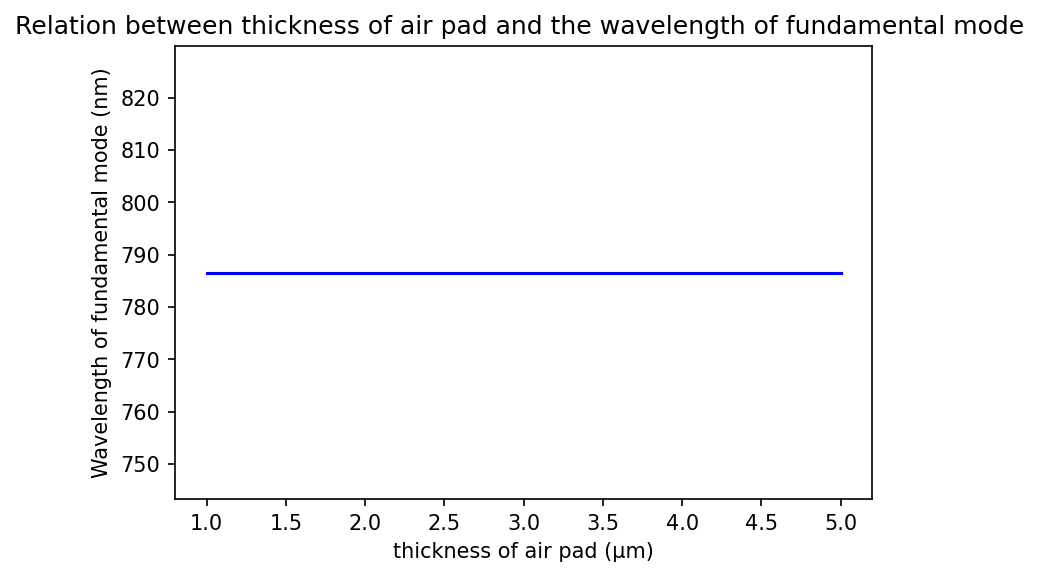

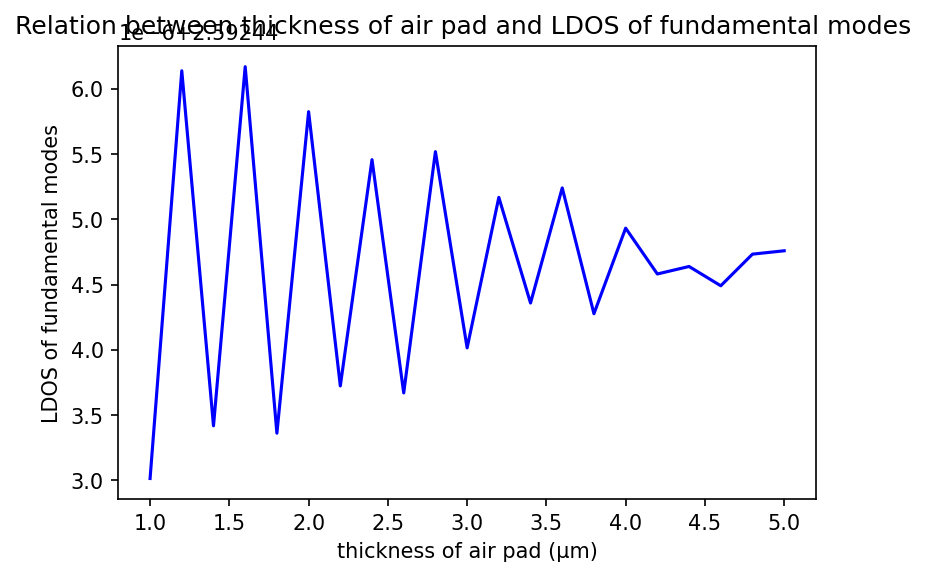

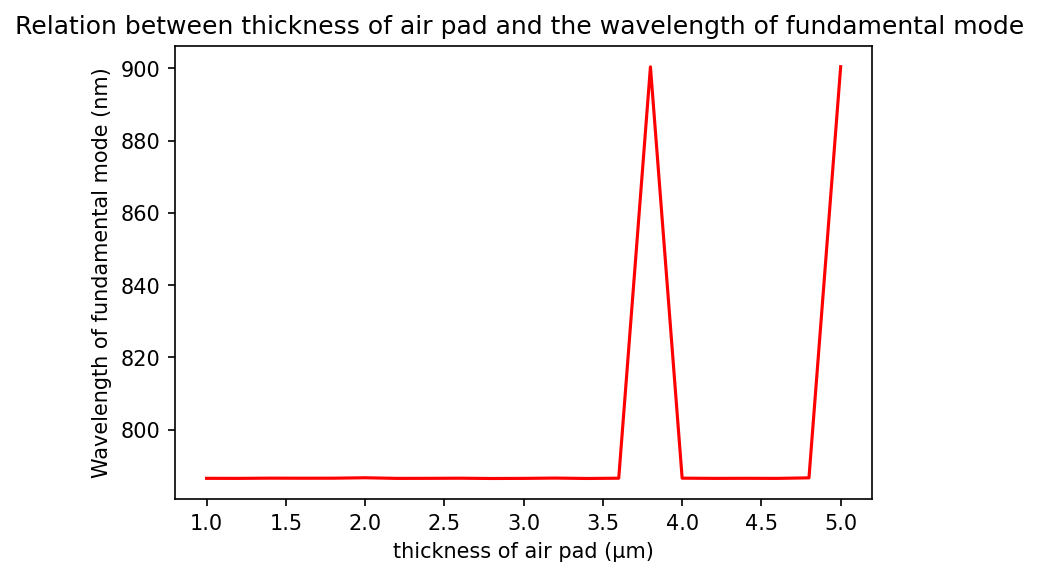

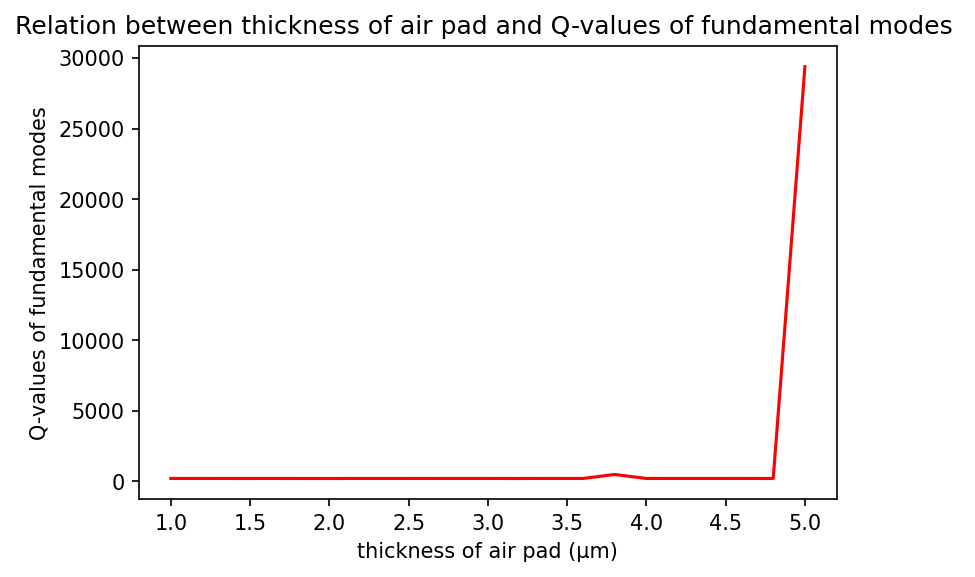

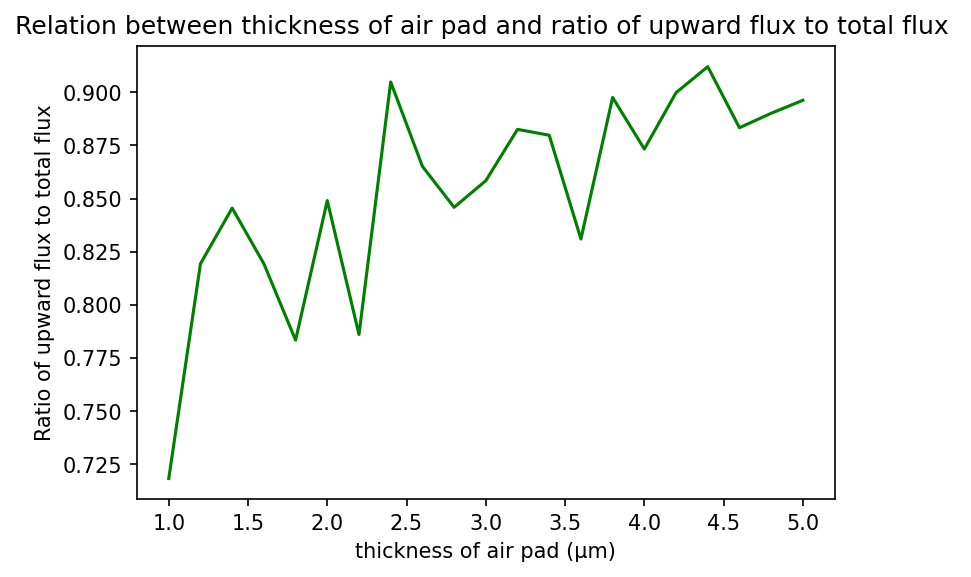

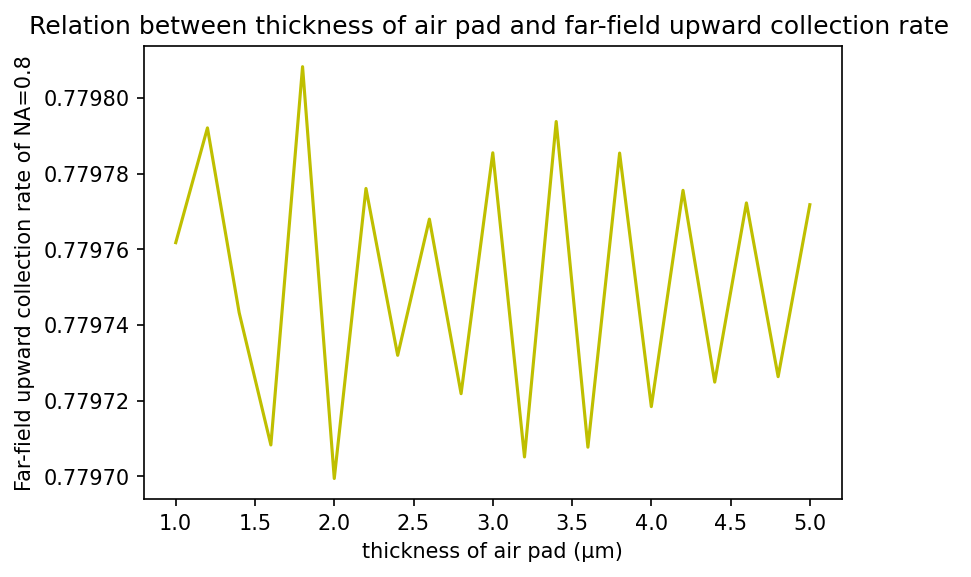

In [54]:
parameter(pad=True)